In [2]:
import pandas as pd
import os
import random
import csv
from collections import Counter
from datetime import datetime,timezone
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from decimal import Decimal, getcontext
import copy





In [3]:

ID=0
USER=1
CURRENT_TRIAL=2
IMG=3
GOODANSWER=4
ANSWER=5
ANSWER_HISTORY=6
IS_GOOD_ANSWER=7
CERTAINTY=8
CERTAINTY_HISTORY=9
TIMESTAMP=10
TIME=11
IS_GOOD_ANSWER_STRICT=12

Taxonomy=['Mésange charbonnière','Mésange à tête noire','Pigeon biset','Corneille noire','Mésange nonnette','Corbeau freux','Choucas des tours','Rouge-gorge','Pigeon ramier','Grand Corbeau']
Types=[['Mésange charbonnière','Mésange à tête noire','Mésange nonnette'],['Pigeon biset','Pigeon ramier'],['Choucas des tours','Corneille noire','Corbeau freux','Grand Corbeau'],['Rouge-gorge']]
Certainty_possibility=['1','2','3','4','5','6','7']
Time_range=[30000,50000,100000,500000,1000000]





def convert_timestamp_ms(timestamp_ms):
    """
    Convert a timestamp (millisec) to date/time readable format.
    
    :param timestamp_ms: Timestamp (millisec) (int ou str)
    :return: formated date/time  (ex: '2025-06-25 14:33:12')
    """
    timestamp_s = int(timestamp_ms) / 1000  # convert ms en secondes
    dt = datetime.fromtimestamp(timestamp_s,tz=timezone.utc)
    return dt.strftime('%Y-%m-%d %H:%M:%S')




def convert_to_list(chaine):
    """
    Convert a string representation of a list into an actual Python list.

    :param chaine: String representation of a list (ex: '["item1", "item2", "item3"]')
    :return: List of items (ex: ['item1', 'item2', 'item3'])
    """
    # Delete useless characters
    chaine = chaine.strip('"[]"')
    # Split the string by commas
    elements = chaine.split(",")
    # Delete spaces and return the list
    return [e.strip() for e in elements if e.strip()]




# List to store the data
data = []

# Open the CSV file and read its content
with open('DATA.csv', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    
    # Ignore the header row
    next(reader)
    
    # Add each row to the data list
    for row in reader:
        data.append(row)


# Uncomment the following line to print the data read from the CSV file
#print(data)


N=0 # Number of experts
list_experts=[] # List of experts
list_opinions=[] # List of opinions for each expert
# Go through each row in the data
# and create a list of experts and their opinions
for row in data:
    list_temp=[]
    if row[USER] not in list_experts:
        list_experts.append(row[USER])
        N+=1
        for row1 in data:
            if row1[USER] == row[USER]:
                strict_good_answer=int(row1[IS_GOOD_ANSWER])/len(convert_to_list(row1[ANSWER]))
                list_temp.append([row1[ID],row1[USER],row1[CURRENT_TRIAL],row1[IMG],convert_to_list(row1[GOODANSWER]),convert_to_list(row1[ANSWER]),row1[ANSWER_HISTORY],row1[IS_GOOD_ANSWER],row1[CERTAINTY],row1[CERTAINTY_HISTORY],convert_timestamp_ms(row1[TIMESTAMP]),int(row1[TIME]),strict_good_answer])
        list_opinions.append(list_temp)



# Print the list of experts and their opinions
print("Number of experts:", N)
print("\n")

#Uncomment the following line to print the opinions of each expert
#print(list_opinions)

print("Example of opinions for the first expert:")
for opinion in list_opinions[0]:
    print("Opinion ID:", opinion[ID])   
    print("User:", opinion[USER])
    print("Image:", opinion[IMG])
    print("Good Answer:", opinion[GOODANSWER])
    print("Answer:", opinion[ANSWER])
    print("Is Good Answer:", opinion[IS_GOOD_ANSWER])
    print("Certainty:", opinion[CERTAINTY])
    print("Strict Good Answer:", opinion[IS_GOOD_ANSWER_STRICT])
    print("\n")


Number of experts: 55


Example of opinions for the first expert:
Opinion ID: 1
User: 968224478
Image: 142
Good Answer: ['Choucas des tours']
Answer: ['Pigeon biset']
Is Good Answer: 0
Certainty: 1
Strict Good Answer: 0.0


Opinion ID: 3
User: 968224478
Image: 117
Good Answer: ['Rouge-gorge']
Answer: ['Rouge-gorge']
Is Good Answer: 1
Certainty: 7
Strict Good Answer: 1.0


Opinion ID: 4
User: 968224478
Image: 166
Good Answer: ['Mésange nonnette']
Answer: ['Mésange charbonnière']
Is Good Answer: 0
Certainty: 1
Strict Good Answer: 0.0


Opinion ID: 5
User: 968224478
Image: 151
Good Answer: ['Corbeau freux']
Answer: ['Choucas des tours']
Is Good Answer: 0
Certainty: 1
Strict Good Answer: 0.0


Opinion ID: 6
User: 968224478
Image: 135
Good Answer: ['Pigeon ramier']
Answer: ['Pigeon biset']
Is Good Answer: 0
Certainty: 7
Strict Good Answer: 0.0


Opinion ID: 8
User: 968224478
Image: 146
Good Answer: ['Corneille noire']
Answer: ['Mésange charbonnière']
Is Good Answer: 0
Certainty: 1
Strict Go

In [4]:

def consistency_calculation():
    """
    Compute the consistency of each expert according to its opinions.

    :return: List of consistency scores for each expert
    """
    consistency = []
    
    for expert in range(N):
        temp = 0
        
        for element in Taxonomy:
            # Reset the count for each species
            count = [0] * len(Taxonomy)

            for opinion in list_opinions[expert]:
                # Check if the element is in the good answer of the opinion
                if element in opinion[GOODANSWER]:
                    for i in range(len(Taxonomy)):
                        if Taxonomy[i] in opinion[ANSWER]:
                            count[i] += 1

            # Compute the coherence rate for this species
            total_opinions = len(list_opinions[expert])
            if total_opinions > 0:
                coherence_rate = max(count) / total_opinions
            else:
                coherence_rate = 0

            temp += coherence_rate

        # Average consistency for this expert
        consistency.append(temp / len(Taxonomy))

    return consistency


consistency = consistency_calculation()
print("Consistency maximum value:", max(consistency))
print("Consistency minimum value:", min(consistency))
print("\n")
print("Consistency of each expert :")
for expert, score in zip(list_experts, consistency):
    print(f"Expert: {expert}, Consistency: {score:.2f}")



Consistency maximum value: 0.1
Consistency minimum value: 0.06000000000000001


Consistency of each expert :
Expert: 968224478, Consistency: 0.07
Expert: 1804246030, Consistency: 0.10
Expert: 750890005, Consistency: 0.10
Expert: 605704454, Consistency: 0.08
Expert: 531627195, Consistency: 0.07
Expert: 1000834801, Consistency: 0.10
Expert: 941738530, Consistency: 0.10
Expert: 1277943570, Consistency: 0.07
Expert: 1326664301, Consistency: 0.10
Expert: 1454291315, Consistency: 0.10
Expert: 1862690650, Consistency: 0.09
Expert: 2143205128, Consistency: 0.08
Expert: 530161058, Consistency: 0.09
Expert: 1622133560, Consistency: 0.09
Expert: 1114034773, Consistency: 0.08
Expert: 1111297823, Consistency: 0.06
Expert: 197543131, Consistency: 0.10
Expert: 1392172381, Consistency: 0.09
Expert: 1682835250, Consistency: 0.10
Expert: 105660181, Consistency: 0.10
Expert: 258979210, Consistency: 0.10
Expert: 1002605327, Consistency: 0.10
Expert: 262008714, Consistency: 0.10
Expert: 88622946, Consisten

In [5]:

def type_accuracy_calculation(mode='easy'or'strict' or'very_strict'):
    """
    Compute the type accuracy of each expert according to its opinions.

    :param mode: 'easy' for mode where if the good answer is included in the answer it's considered good or 'strict' for mode where if the good answer is included in the answer it's considered good but proportional to the length of the answer or 'very_strict' for mode where if the good answer match exactly the answer it's considered good 
    :return: List of type accuracy scores for each expert
    """

    type_accuracy=[]

    for expert in range(N):
        temp=[0]*len(Types)
        count=[0]*len(Types)
        for opinion in list_opinions[expert]:
            for element in range(len(Types)):

                if opinion[GOODANSWER][0] in Types[element] :
                    count[element]+=1
                    match mode:
                        case 'easy':
                            temp[element]+=int(opinion[IS_GOOD_ANSWER])
                        case 'strict':    
                            temp[element]+=float(opinion[IS_GOOD_ANSWER_STRICT])
                        case 'very_strict':
                            if opinion[IS_GOOD_ANSWER_STRICT] == 1:
                                temp[element]+=1
        accuracy=[]
        for i in range(len(Types)):
            if count[i] ==0:
                accuracy.append('ND')
            else :
                accuracy.append(temp[i]/count[i])
        type_accuracy.append(accuracy)
    return type_accuracy



type_accu_easy = type_accuracy_calculation(mode='easy')
print("\n")
print('------------------------------------------------')
print("Type accuracy maximum value in EASY mode :", max( v for sublist in type_accu_easy for v in sublist if isinstance(v, (int, float))))

print("Type accuracy minimum value in EASY mode :", min( v for sublist in type_accu_easy for v in sublist if isinstance(v, (int, float))))
print("\n")
print("Type accuracy of each expert in EASY mode :")
for expert, score in zip(list_experts, type_accu_easy):
    print(f"Expert: {expert}, Type accuracy: {score}")

type_accu_strict = type_accuracy_calculation(mode='strict')
print("\n")
print('------------------------------------------------')
print("Type accuracy maximum value in STRICT mode :", max( v for sublist in type_accu_strict for v in sublist if isinstance(v, (int, float))))
print("Type accuracy minimum value in STRICT mode :", min( v for sublist in type_accu_strict for v in sublist if isinstance(v, (int, float))))
print("\n")
print("Type accuracy of each expert in STRICT mode :")
for expert, score in zip(list_experts, type_accu_strict):
    print(f"Expert: {expert}, Type accuracy: {score}")

type_accu_very_strict = type_accuracy_calculation(mode='very_strict')
print("\n")
print('------------------------------------------------')
print("Type accuracy maximum value in VERY_STRICT mode :", max( v for sublist in type_accu_very_strict for v in sublist if isinstance(v, (int, float))))
print("Type accuracy minimum value in VERY_STRICT mode :", min( v for sublist in type_accu_very_strict for v in sublist if isinstance(v, (int, float))))
print("\n")
print("Type accuracy of each expert in VERY_STRICT mode :")
for expert, score in zip(list_experts, type_accu_very_strict):
    print(f"Expert: {expert}, Type accuracy: {score}") 
  





------------------------------------------------
Type accuracy maximum value in EASY mode : 1.0
Type accuracy minimum value in EASY mode : 0.0


Type accuracy of each expert in EASY mode :
Expert: 968224478, Type accuracy: [0.4666666666666667, 0.7, 0.4, 1.0]
Expert: 1804246030, Type accuracy: [1.0, 1.0, 0.55, 1.0]
Expert: 750890005, Type accuracy: [0.7333333333333333, 0.7, 0.65, 1.0]
Expert: 605704454, Type accuracy: [0.6, 0.7, 0.2, 1.0]
Expert: 531627195, Type accuracy: [0.3333333333333333, 0.6, 0.4, 0.0]
Expert: 1000834801, Type accuracy: [0.8, 1.0, 0.7, 0.8]
Expert: 941738530, Type accuracy: [1.0, 1.0, 0.8, 1.0]
Expert: 1277943570, Type accuracy: [0.4666666666666667, 0.7, 0.45, 0.8]
Expert: 1326664301, Type accuracy: [1.0, 1.0, 0.95, 1.0]
Expert: 1454291315, Type accuracy: [1.0, 1.0, 0.95, 1.0]
Expert: 1862690650, Type accuracy: [0.6666666666666666, 0.9, 0.45, 1.0]
Expert: 2143205128, Type accuracy: [0.8, 0.9, 0.55, 0.8]
Expert: 530161058, Type accuracy: [1.0, 0.9, 0.7, 1.0]
Exper

In [6]:

def answer_accuracy_calculation(mode='easy'or'strict' or'very_strict'):
    """
    Compute the answer accuracy of each expert according to its opinions.

    :param mode: 'easy' for mode where if the good answer is included in the answer it's considered good or 'strict' for mode where if the good answer is included in the answer it's considered good but proportional to the length of the answer or 'very_strict' for mode where if the good answer match exactly the answer it's considered good
    :return: List of answer accuracy scores for each expert
    """
    answer_accuracy=[]
    for expert in range(N):
        temp=[0]*len(Taxonomy)
        count=[0]*len(Taxonomy)
        for opinion in list_opinions[expert]:
            for element in range(len(Taxonomy)):
                if opinion[GOODANSWER][0]==Taxonomy[element]:
                    count[element]+=1
                    match mode:
                        case 'easy':
                            temp[element]+=int(opinion[IS_GOOD_ANSWER])
                        case 'strict':    
                            temp[element]+=float(opinion[IS_GOOD_ANSWER_STRICT])
                        case 'very_strict':
                            if opinion[IS_GOOD_ANSWER_STRICT] == 1:
                                temp[element]+=1
        accuracy=[]
        for i in range(len(Taxonomy)):
            if count[i] ==0:
                accuracy.append('ND')
            else :
                accuracy.append(temp[i]/count[i])
        answer_accuracy.append(accuracy)

    return answer_accuracy



answer_accu_easy = answer_accuracy_calculation(mode='easy')
print("\n")
print('------------------------------------------------')
print("Answer accuracy maximum value in EASY mode :", max( v for sublist in answer_accu_easy for v in sublist if isinstance(v, (int, float))))
print("Answer accuracy minimum value in EASY mode :", min( v for sublist in answer_accu_easy for v in sublist if isinstance(v, (int, float))))
print("\n")
print("Answer accuracy of experts in EASY mode :")
for expert, score in zip(list_experts, answer_accu_easy):
    print(f"Expert: {expert}, Answer accuracy: {score}")

answer_accu_strict = answer_accuracy_calculation(mode='strict')
print("\n")
print('------------------------------------------------')
print("Answer accuracy maximum value in STRICT mode :", max( v for sublist in answer_accu_strict for v in sublist if isinstance(v, (int, float))))
print("Answer accuracy minimum value in STRICT mode :", min( v for sublist in answer_accu_strict for v in sublist if isinstance(v, (int, float))))
print("\n")
print("Answer accuracy of experts in STRICT mode :")
for expert, score in zip(list_experts, answer_accu_strict):
    print(f"Expert: {expert}, Answer accuracy: {score}")

answer_accu_very_strict = answer_accuracy_calculation(mode='very_strict')
print("\n")
print('------------------------------------------------')
print("Answer accuracy maximum value in VERY_STRICT mode :", max( v for sublist in answer_accu_very_strict for v in sublist if isinstance(v, (int, float))))
print("Answer accuracy minimum value in VERY_STRICT mode :", min( v for sublist in answer_accu_very_strict for v in sublist if isinstance(v, (int, float))))
print("\n")
print("Answer accuracy of experts in VERY_STRICT mode :")
for expert, score in zip(list_experts, answer_accu_very_strict):
    print(f"Expert: {expert}, Answer accuracy: {score}")
  



------------------------------------------------
Answer accuracy maximum value in EASY mode : 1.0
Answer accuracy minimum value in EASY mode : 0.0


Answer accuracy of experts in EASY mode :
Expert: 968224478, Answer accuracy: [0.8, 0.0, 0.8, 0.8, 0.6, 0.4, 0.0, 1.0, 0.6, 0.4]
Expert: 1804246030, Answer accuracy: [1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0]
Expert: 750890005, Answer accuracy: [0.8, 1.0, 0.4, 1.0, 0.4, 0.4, 0.2, 1.0, 1.0, 1.0]
Expert: 605704454, Answer accuracy: [0.8, 1.0, 0.8, 0.6, 0.0, 0.2, 0.0, 1.0, 0.6, 0.0]
Expert: 531627195, Answer accuracy: [0.0, 1.0, 0.8, 1.0, 0.0, 0.2, 0.4, 0.0, 0.4, 0.0]
Expert: 1000834801, Answer accuracy: [1.0, 1.0, 1.0, 0.4, 0.4, 1.0, 0.4, 0.8, 1.0, 1.0]
Expert: 941738530, Answer accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2]
Expert: 1277943570, Answer accuracy: [0.8, 0.2, 0.4, 0.6, 0.4, 0.0, 1.0, 0.8, 1.0, 0.2]
Expert: 1326664301, Answer accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0]
Expert: 1454291315, 

In [7]:


def certainty_accuracy_calculation(mode='easy'or'strict' or'very_strict'):
    """"
    Compute the certainty accuracy of each expert according to its opinions.

    :param mode: 'easy' for mode where if the good answer is included in the answer it's considered good or 'strict' for mode where if the good answer is included in the answer it's considered good but proportional to the length of the answer or 'very_strict' for mode where if the good answer match exactly the answer it's considered good
    :return: List of certainty accuracy scores for each expert
    """

    certainty_accuracy=[]
    for expert in range(N):
        temp=[0]*len(Certainty_possibility)
        count=[0]*len(Certainty_possibility)
        for opinion in list_opinions[expert]:
            for element in range(len(Certainty_possibility)):

                if opinion[CERTAINTY]==Certainty_possibility[element]:
                    count[element]+=1
                    match mode:
                        case 'easy':
                            temp[element]+=int(opinion[IS_GOOD_ANSWER])
                        case 'strict':    
                            temp[element]+=float(opinion[IS_GOOD_ANSWER_STRICT])
                        case 'very_strict':
                            if opinion[IS_GOOD_ANSWER_STRICT] == 1:
                                temp[element]+=1
        accuracy=[]
        for i in range(len(Certainty_possibility)):
            if count[i] ==0:
                accuracy.append('ND')
            else :
                accuracy.append(temp[i]/count[i])
        certainty_accuracy.append(accuracy)

    return certainty_accuracy



certainty_accu_easy = certainty_accuracy_calculation(mode='easy')
print("\n")
print('------------------------------------------------')
print("Certainty accuracy maximum value in EASY mode :", max( v for sublist in certainty_accu_easy for v in sublist if isinstance(v, (int, float))))
print("Certainty accuracy minimum value in EASY mode :", min( v for sublist in certainty_accu_easy for v in sublist if isinstance(v, (int, float))))
print("\n")
print("Certainty accuracy of experts in EASY mode :")
for expert, score in zip(list_experts, certainty_accu_easy):
    print(f"Expert: {expert}, Certainty accuracy: {score}")

certainty_accu_strict = certainty_accuracy_calculation(mode='strict')
print("\n")
print('------------------------------------------------')
print("Certainty accuracy maximum value in STRICT mode :", max( v for sublist in certainty_accu_strict for v in sublist if isinstance(v, (int, float))))
print("Certainty accuracy minimum value in STRICT mode :", min( v for sublist in certainty_accu_strict for v in sublist if isinstance(v, (int, float))))
print("\n")
print("Certainty accuracy of experts in STRICT mode :")
for expert, score in zip(list_experts, certainty_accu_strict):
    print(f"Expert: {expert}, Certainty accuracy: {score}")

certainty_accu_very_strict = certainty_accuracy_calculation(mode='very_strict')
print("\n")
print('------------------------------------------------')
print("Certainty accuracy maximum value in VERY_STRICT mode :", max( v for sublist in certainty_accu_very_strict for v in sublist if isinstance(v, (int, float))))
print("Certainty accuracy minimum value in VERY_STRICT mode :", min( v for sublist in certainty_accu_very_strict for v in sublist if isinstance(v, (int, float))))
print("\n")
print("Certainty accuracy of experts in VERY_STRICT mode :")
for expert, score in zip(list_experts, certainty_accu_very_strict):
    print(f"Expert: {expert}, Certainty accuracy: {score}")



------------------------------------------------
Certainty accuracy maximum value in EASY mode : 1.0
Certainty accuracy minimum value in EASY mode : 0.0


Certainty accuracy of experts in EASY mode :
Expert: 968224478, Certainty accuracy: [0.25, 0.4, 0.5, 'ND', 0.5, 0.8823529411764706, 0.5]
Expert: 1804246030, Certainty accuracy: ['ND', 'ND', 0.3333333333333333, 1.0, 0.8529411764705882, 0.8, 1.0]
Expert: 750890005, Certainty accuracy: ['ND', 'ND', 1.0, 1.0, 0.6666666666666666, 0.75, 0.5]
Expert: 605704454, Certainty accuracy: ['ND', 'ND', 'ND', 'ND', 0.358974358974359, 1.0, 'ND']
Expert: 531627195, Certainty accuracy: ['ND', 'ND', 'ND', 'ND', 0.0, 0.3953488372093023, 0.3333333333333333]
Expert: 1000834801, Certainty accuracy: ['ND', 'ND', 'ND', 0.75, 0.7777777777777778, 0.8333333333333334, 'ND']
Expert: 941738530, Certainty accuracy: ['ND', 'ND', 'ND', 'ND', 'ND', 'ND', 0.92]
Expert: 1277943570, Certainty accuracy: ['ND', 'ND', 'ND', 'ND', 0.4642857142857143, 0.5882352941176471, 0.8]

In [8]:

def time_accuracy_calculation(mode='easy'or'strict' or'very_strict'):
    """
    Compute the time accuracy of each expert according to its opinions.

    :param mode: 'easy' for mode where if the good answer is included in the answer it's considered good or 'strict' for mode where if the good answer is included in the answer it's considered good but proportional to the length of the answer or 'very_strict' for mode where if the good answer match exactly the answer it's considered good
    :return: List of time accuracy scores for each expert
    """
    time_accuracy=[]
    for expert in range(N):
        temp=[0]*(len(Time_range)+1)
        count=[0]*(len(Time_range)+1)
        for opinion in list_opinions[expert]:
            for element in range(len(Time_range)+1):

                if element==0:
                    quest=opinion[TIME]<Time_range[element]

                else:
                    if element<(len(Time_range)):
                        quest=opinion[TIME]<Time_range[element] and opinion[TIME]>Time_range[element-1]
                    else:
                        quest=opinion[TIME]>Time_range[element-1]
       
                if quest:
                    count[element]+=1
                    match mode:
                        case 'easy':
                            temp[element]+=int(opinion[IS_GOOD_ANSWER])
                        case 'strict':    
                            temp[element]+=float(opinion[IS_GOOD_ANSWER_STRICT])
                        case 'very_strict':
                            if opinion[IS_GOOD_ANSWER_STRICT] == 1:
                                temp[element]+=1
        accuracy=[]
        for i in range(len(Time_range)+1):
            if count[i] ==0:
                accuracy.append('ND')
            else :
                accuracy.append(temp[i]/count[i])
        time_accuracy.append(accuracy)

    return time_accuracy



time_accu_easy = time_accuracy_calculation(mode='easy')
print("\n")
print('------------------------------------------------')
print("Time accuracy maximum value in EASY mode :", max( v for sublist in time_accu_easy for v in sublist if isinstance(v, (int, float))))
print("Time accuracy minimum value in EASY mode :", min( v for sublist in time_accu_easy for v in sublist if isinstance(v, (int, float))))
print("\n")
print("Time accuracy of experts in EASY mode:")
for expert, score in zip(list_experts, time_accu_easy):
    print(f"Expert: {expert}, Time accuracy: {score}")

time_accu_strict = time_accuracy_calculation(mode='strict')
print("\n")
print('------------------------------------------------')
print("Time accuracy maximum value in STRICT mode :", max( v for sublist in time_accu_strict for v in sublist if isinstance(v, (int, float))))
print("Time accuracy minimum value in STRICT mode :", min( v for sublist in time_accu_strict for v in sublist if isinstance(v, (int, float))))
print("\n")
print("Time accuracy of experts in STRICT mode:")
for expert, score in zip(list_experts, time_accu_strict):
    print(f"Expert: {expert}, Time accuracy: {score}")

time_accu_very_strict = time_accuracy_calculation(mode='very_strict')
print("\n")
print('------------------------------------------------')
print("Time accuracy maximum value in VERY_STRICT mode :", max( v for sublist in time_accu_very_strict for v in sublist if isinstance(v, (int, float))))
print("Time accuracy minimum value in VERY_STRICT mode :", min( v for sublist in time_accu_very_strict for v in sublist if isinstance(v, (int, float))))
print("\n")
print("Time accuracy of experts in VERY_STRICT mode:")
for expert, score in zip(list_experts, time_accu_very_strict):
    print(f"Expert: {expert}, Time accuracy: {score}")



------------------------------------------------
Time accuracy maximum value in EASY mode : 1.0
Time accuracy minimum value in EASY mode : 0.0


Time accuracy of experts in EASY mode:
Expert: 968224478, Time accuracy: [0.5, 0.0, 0.42857142857142855, 0.6388888888888888, 'ND', 'ND']
Expert: 1804246030, Time accuracy: [1.0, 1.0, 1.0, 0.7954545454545454, 'ND', 'ND']
Expert: 750890005, Time accuracy: [0.0, 1.0, 1.0, 0.8571428571428571, 0.5652173913043478, 'ND']
Expert: 605704454, Time accuracy: [0.0, 1.0, 1.0, 0.45454545454545453, 'ND', 'ND']
Expert: 531627195, Time accuracy: [0.5, 0.0, 0.8, 0.3333333333333333, 'ND', 'ND']
Expert: 1000834801, Time accuracy: [1.0, 1.0, 1.0, 0.7674418604651163, 'ND', 'ND']
Expert: 941738530, Time accuracy: ['ND', 1.0, 1.0, 0.9629629629629629, 0.85, 'ND']
Expert: 1277943570, Time accuracy: ['ND', 1.0, 0.0, 0.2857142857142857, 0.35714285714285715, 0.7307692307692307]
Expert: 1326664301, Time accuracy: [0.0, 1.0, 1.0, 1.0, 1.0, 'ND']
Expert: 1454291315, Time a

In [9]:
def lasting_accuracy_calculation():
    """
    Compute the lasting accuracy of each expert according to its opinions. THIS FUNCTION IS NOT YET IMPLEMENTED.

    :return: List of lasting accuracy scores for each expert
    """
    lasting_accuracy=[]

    return lasting_accuracy



lasting_accu = lasting_accuracy_calculation()
print("Lasting accuracy of experts : NO DATA TO COMPUTE YET")


Lasting accuracy of experts : NO DATA TO COMPUTE YET


In [10]:

def average_crit(accu):
    """
    Compute the average of one critaria for one expert

    :param accu: list of criteria values for one criteria and one expert (ex: [ 'ND' , 0.2 , 0.3 , 0.4 , 0.1 ])
    :return: float average of the values (different from 'ND') from the list in parameter
    """
    count=0
    number=0
    result=0
    for i in range(len(accu)):
        if accu[i]!='ND':
            count+=1
            number+=accu[i]
    if count !=0:
        result=number/count

    return result


def random_crit(accu):
    """
    Get one random value out of one criteria for one expert

    :param accu: list of criteria values for one criteria and one expert (ex: [ 'ND' , 0.2 , 0.3 , 0.4 , 0.1 ])
    :return: float random value (different from 'ND') from the list in parameter
    """
    nb = np.random.randint(0, len(accu))
    while accu[nb] == 'ND':
        nb+=1
        if nb >= len(accu):
            nb = 0
    return accu[nb]





# Data
data_average_easy = []
data_average_strict=[]
data_average_very_strict=[]
data_random_easy = []
data_random_strict=[]
data_random_very_strict=[]


for expert in range(N):

    time_easy=average_crit(time_accu_easy[expert])
    time_strict=average_crit(time_accu_strict[expert])
    time_very_strict=average_crit(time_accu_very_strict[expert])

    time_random_easy=random_crit(time_accu_easy[expert])
    time_random_strict=random_crit(time_accu_strict[expert])
    time_random_very_strict=random_crit(time_accu_very_strict[expert])


    certainty_easy=average_crit(certainty_accu_easy[expert])
    certainty_strict=average_crit(certainty_accu_strict[expert])
    certainty_very_strict=average_crit(certainty_accu_very_strict[expert])

    certainty_random_easy=random_crit(certainty_accu_easy[expert])
    certainty_random_strict=random_crit(certainty_accu_strict[expert])
    certainty_random_very_strict=random_crit(certainty_accu_very_strict[expert])


    answer_easy=average_crit(answer_accu_easy[expert])
    answer_strict=average_crit(answer_accu_strict[expert])
    answer_very_strict=average_crit(answer_accu_very_strict[expert])

    answer_random_easy=random_crit(answer_accu_easy[expert])
    answer_random_strict=random_crit(answer_accu_strict[expert])
    answer_random_very_strict=random_crit(answer_accu_very_strict[expert])


    type_easy=average_crit(type_accu_easy[expert])
    type_strict=average_crit(type_accu_strict[expert])
    type_very_strict=average_crit(type_accu_very_strict[expert])

    type_random_easy=random_crit(type_accu_easy[expert])
    type_random_strict=random_crit(type_accu_strict[expert])
    type_random_very_strict=random_crit(type_accu_very_strict[expert])


    data_average_easy.append([consistency[expert],type_easy,answer_easy,certainty_easy,time_easy])
    data_average_strict.append([consistency[expert],type_strict,answer_strict,certainty_strict,time_strict])
    data_average_very_strict.append([consistency[expert],type_very_strict,answer_very_strict,certainty_very_strict,time_very_strict])

    data_random_easy.append([consistency[expert],type_random_easy,answer_random_easy,certainty_random_easy,time_random_easy])
    data_random_strict.append([consistency[expert],type_random_strict,answer_random_strict,certainty_random_strict,time_random_strict])
    data_random_very_strict.append([consistency[expert],type_random_very_strict,answer_random_very_strict,certainty_random_very_strict,time_random_very_strict])



feature_names = ['Consistency', 'Type accuracy', 'Answer accuracy', 'Certainty accuracy','Time accuracy']
individual_names = []
for i in range(N):
    individual_names.append('expert_'+str(i))




                       PCA FOR AVERAGED CRITERIAS EASY MODE




✅ Principal components (individual scores) :
                PC1       PC2       PC3       PC4
expert_0 -2.227956 -0.535146 -0.543514  0.127340
expert_1  1.949689 -0.091122  0.595130 -0.249471
expert_2  0.665774  0.261190  0.071226  0.465614
expert_3 -1.174443 -0.198580  0.525299  0.682677
expert_4 -4.054667  0.150138  0.781100 -0.067679

📊 Variance explained by each component :
  PC1 : 82.52%
  PC2 : 7.89%
  PC3 : 4.93%
  PC4 : 4.16%

🔍 Contributions of variables (loadings) :
                          PC1       PC2       PC3       PC4
Consistency         0.404048  0.902069  0.107299  0.107221
Type accuracy       0.466129 -0.109166 -0.513414 -0.340572
Answer accuracy     0.477471 -0.144619 -0.298159 -0.264215
Certainty accuracy  0.445084 -0.296455 -0.027352  0.842882
Time accuracy       0.439761 -0.256035  0.797023 -0.303734

📝 Interpretation of components:
  PC1 (explains 82.5%) : this component is mostly linked to Answ

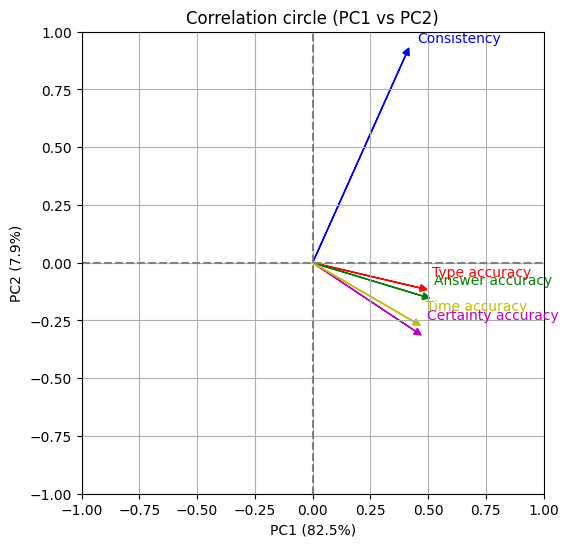



                       PCA FOR AVERAGED CRITERIAS STRICT MODE




✅ Principal components (individual scores) :
                PC1       PC2       PC3       PC4
expert_0 -1.296538 -1.406234 -0.200820 -0.021776
expert_1 -0.531945  0.706846 -0.073562  0.401362
expert_2 -0.440092  0.606462  0.078832 -0.066190
expert_3  1.226681 -0.256081 -0.139651 -1.186908
expert_4 -1.496256 -1.354272  0.776794 -0.660272

📊 Variance explained by each component :
  PC1 : 64.50%
  PC2 : 20.73%
  PC3 : 7.51%
  PC4 : 5.74%

🔍 Contributions of variables (loadings) :
                          PC1       PC2       PC3       PC4
Consistency         0.008619  0.976863 -0.015985  0.186557
Type accuracy       0.514961 -0.065311 -0.004972  0.634119
Answer accuracy     0.531588 -0.139727 -0.027610  0.268258
Certainty accuracy  0.477051  0.099601 -0.685821 -0.518990
Time accuracy       0.473895  0.109677  0.727054 -0.470932

📝 Interpretation of components:
  PC1 (explains 64.5%) : this component is mostly linked to A

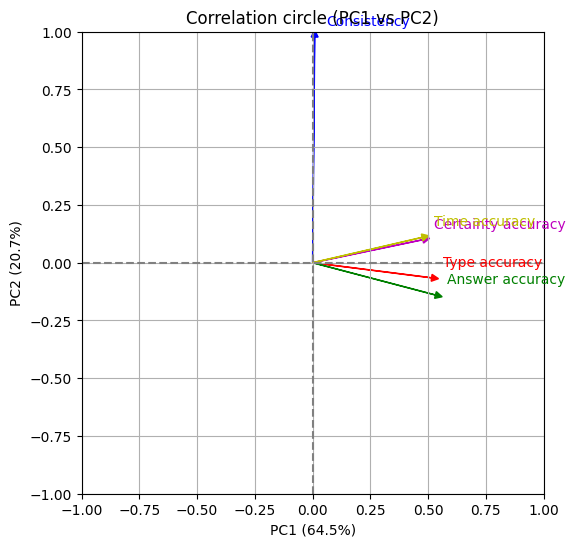



                       PCA FOR AVERAGED CRITERIAS VERY STRICT MODE




✅ Principal components (individual scores) :
                PC1       PC2       PC3       PC4
expert_0 -0.165040 -1.498176  0.172308 -0.226663
expert_1 -1.786347  0.125311 -0.044247  0.675907
expert_2 -0.915932  0.337963  0.213747 -0.050188
expert_3  2.087914  0.292861 -0.014380 -0.931173
expert_4  1.209825 -1.109700  0.598737 -0.377227

📊 Variance explained by each component :
  PC1 : 73.03%
  PC2 : 15.75%
  PC3 : 6.65%
  PC4 : 3.35%

🔍 Contributions of variables (loadings) :
                          PC1       PC2       PC3       PC4
Consistency        -0.288826  0.935691 -0.013398  0.179494
Type accuracy       0.498196  0.094681  0.035730  0.620436
Answer accuracy     0.507293  0.010415 -0.085639  0.349589
Certainty accuracy  0.455500  0.242415 -0.676085 -0.505093
Time accuracy       0.451170  0.238000  0.730835 -0.453332

📝 Interpretation of components:
  PC1 (explains 73.0%) : this component is mostly linked

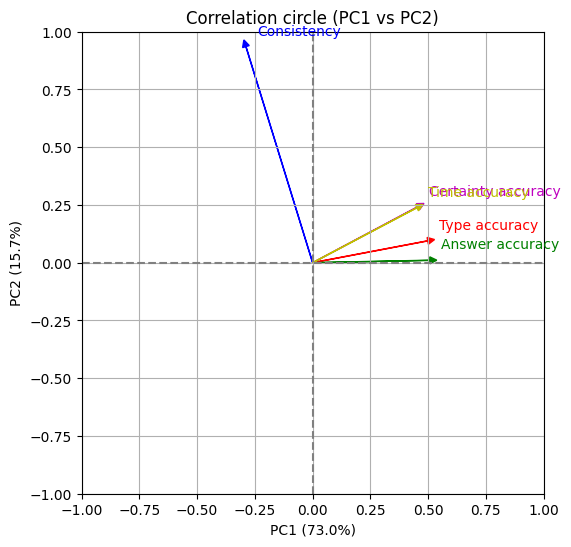



                       PCA FOR RANDOM CRITERIAS EASY MODE




✅ Principal components (individual scores) :
                PC1       PC2       PC3       PC4
expert_0 -1.192122  1.021245 -0.011395 -0.243409
expert_1  1.140953 -1.542259  0.743680  0.845498
expert_2 -0.214468 -0.900941 -1.271605  1.681049
expert_3 -0.964797  0.357912 -1.836268 -0.617505
expert_4 -2.816368  1.311366 -0.160808 -0.328695

📊 Variance explained by each component :
  PC1 : 51.18%
  PC2 : 18.44%
  PC3 : 14.17%
  PC4 : 10.82%

🔍 Contributions of variables (loadings) :
                          PC1       PC2       PC3       PC4
Consistency         0.499264 -0.432702 -0.223741  0.240717
Type accuracy       0.468323 -0.466482 -0.159253 -0.526306
Answer accuracy     0.345829  0.713770 -0.443918 -0.372460
Certainty accuracy  0.496477  0.234848 -0.014001  0.692073
Time accuracy       0.406598  0.174761  0.852830 -0.217639

📝 Interpretation of components:
  PC1 (explains 51.2%) : this component is mostly linked to Con

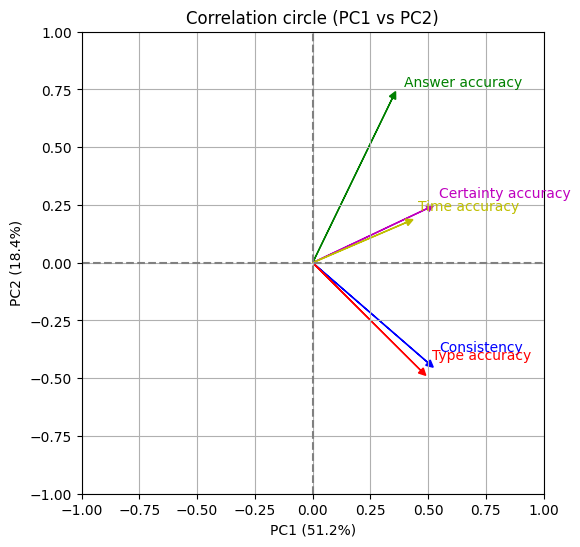



                       PCA FOR RANDOM CRITERIAS STRICT MODE




✅ Principal components (individual scores) :
                PC1       PC2       PC3       PC4
expert_0 -0.723234  0.003026 -2.010063  0.359359
expert_1  0.356731 -0.672838  1.191803 -1.448152
expert_2  0.846170  0.547533  0.426130  0.273968
expert_3 -0.529130  0.263562 -0.796770 -0.007804
expert_4 -0.824890 -1.331539 -0.583745 -0.551098

📊 Variance explained by each component :
  PC1 : 35.78%
  PC2 : 21.76%
  PC3 : 18.79%
  PC4 : 12.94%

🔍 Contributions of variables (loadings) :
                          PC1       PC2       PC3       PC4
Consistency         0.080239  0.688492  0.687547 -0.177558
Type accuracy       0.512369 -0.430244  0.150741 -0.460653
Answer accuracy     0.487431  0.337289 -0.436572 -0.488569
Certainty accuracy  0.509127  0.329158 -0.294965  0.631239
Time accuracy       0.483984 -0.344615  0.476399  0.345124

📝 Interpretation of components:
  PC1 (explains 35.8%) : this component is mostly linked to T

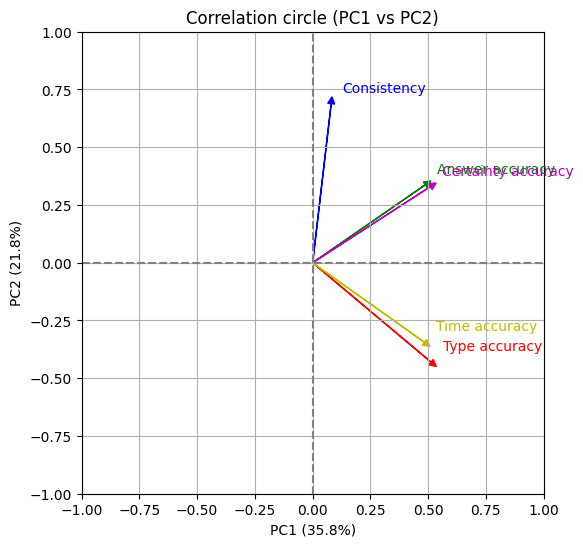



                       PCA FOR RANDOM CRITERIAS VERY STRICT MODE




✅ Principal components (individual scores) :
                PC1       PC2       PC3       PC4
expert_0 -0.664175 -1.229485 -1.192333 -0.436217
expert_1 -1.704934  0.261554 -0.044699  0.113132
expert_2 -0.248885  0.350856  0.965894 -0.948868
expert_3  2.529675 -0.247119  0.859858 -0.714502
expert_4 -0.586189 -1.486772 -1.169673 -0.065674

📊 Variance explained by each component :
  PC1 : 41.38%
  PC2 : 19.08%
  PC3 : 17.73%
  PC4 : 12.16%

🔍 Contributions of variables (loadings) :
                          PC1       PC2       PC3       PC4
Consistency        -0.328647  0.568434  0.668296  0.325172
Type accuracy       0.486276 -0.000074  0.546058 -0.417402
Answer accuracy     0.517746  0.403841 -0.054184 -0.337117
Certainty accuracy  0.451498  0.466913 -0.365987  0.544304
Time accuracy       0.428504 -0.543862  0.343976  0.556888

📝 Interpretation of components:
  PC1 (explains 41.4%) : this component is mostly linked

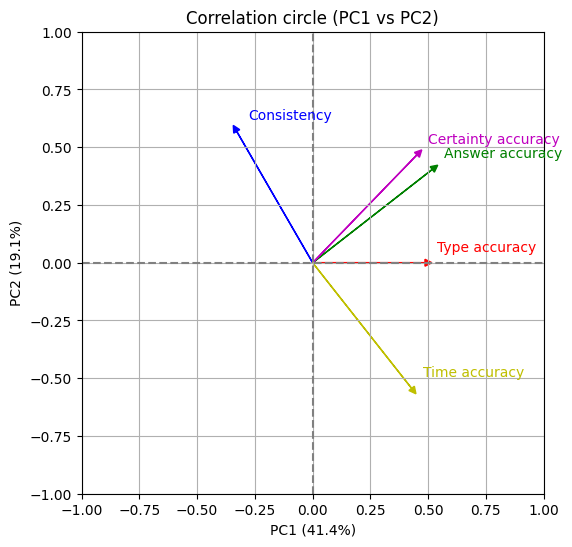

In [11]:

individual_projection=0

def pca_analysis(data_array, feature_names, individual_names=None, n_components=4, plan=(1,2), top_n=3):
    """
    PCA analysis and visualization of results.

    :param data_array: 2D array-like structure containing the data to analyze
    :param feature_names: List of feature names corresponding to the columns of data_array
    :param individual_names: List of individual names corresponding to the rows of data_array (optional)
    :param n_components: Number of principal components to compute
    :param plan: Tuple indicating the two principal components to plot (e.g., (1, 2) for PC1 vs PC2)
    :param top_n: Number of top contributing variables to display for each principal component
    :return: None, prints results and plots
    """
    # Creation DataFrame
    df = pd.DataFrame(data_array, columns=feature_names)
    if individual_names is not None:
        df.index = individual_names

    # Standardisation
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)

    # PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Results
    pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)], index=df.index)
    explained_var = pca.explained_variance_ratio_ * 100
    
    print("✅ Principal components (individual scores) :\n", pca_df.head())
    print("\n📊 Variance explained by each component :")
    for i, var in enumerate(explained_var):
        print(f"  PC{i+1} : {var:.2f}%")

    # Variables contributions
    loadings = pd.DataFrame(pca.components_.T, index=feature_names, 
                            columns=[f'PC{i+1}' for i in range(n_components)])
    print("\n🔍 Contributions of variables (loadings) :\n", loadings)

    # Interpretation of components
    print("\n📝 Interpretation of components:")
    for i in range(n_components):
        comp = loadings.iloc[:, i]
        # Selection of biggest contributions (absolute value)
        top_vars = comp.abs().sort_values(ascending=False).head(top_n).index
        pos_vars = [var for var in top_vars if comp[var] > 0]
        neg_vars = [var for var in top_vars if comp[var] < 0]

        text = f"  PC{i+1} (explains {explained_var[i]:.1f}%) : "
        if pos_vars and neg_vars:
            text += f"this component oppose {' + '.join(neg_vars)} (negative values) to {' + '.join(pos_vars)} (positive values)."
        elif pos_vars:
            text += f"this component is mostly linked to {' + '.join(pos_vars)} (positives values)."
        elif neg_vars:
            text += f"this component is mostly linked to {' + '.join(neg_vars)} (negative values)."
        else:
            text += "no major components detected."
        
        print(text)

    colors=['b','r','g','m','y']
    # Correlations cirle
    def plot_correlation_circle(pca, features, plan):
        pcs = pca.components_
        pc_x, pc_y = plan[0]-1, plan[1]-1
        plt.figure(figsize=(6,6))
        for i in range(len(features)):
            plt.arrow(0, 0, pcs[pc_x, i], pcs[pc_y, i], head_width=0.03, head_length=0.03, color=colors[i])
            plt.text(pcs[pc_x, i] + 0.05, pcs[pc_y, i] + 0.05, features[i], color=colors[i])
        plt.xlabel(f'PC{plan[0]} ({explained_var[pc_x]:.1f}%)')
        plt.ylabel(f'PC{plan[1]} ({explained_var[pc_y]:.1f}%)')
        plt.title(f'Correlation circle (PC{plan[0]} vs PC{plan[1]})')
        plt.grid()
        plt.axhline(0, color='grey', linestyle='--')
        plt.axvline(0, color='grey', linestyle='--')
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()

    plot_correlation_circle(pca, feature_names, plan)

    # Individuals projections
    if individual_projection:
        pc_x, pc_y = f'PC{plan[0]}', f'PC{plan[1]}'
        plt.figure(figsize=(8,6))
        sns.scatterplot(data=pca_df, x=pc_x, y=pc_y)
        if individual_names is not None:
            for i in pca_df.index:
                plt.text(pca_df.loc[i, pc_x] + 0.1, pca_df.loc[i, pc_y] + 0.1, i, fontsize=8)
        plt.xlabel(f'{pc_x} ({explained_var[plan[0]-1]:.1f}%)')
        plt.ylabel(f'{pc_y} ({explained_var[plan[1]-1]:.1f}%)')
        plt.title(f'Projection of individuals (PC{plan[0]} vs PC{plan[1]})')
        plt.grid()
        plt.axhline(0, color='grey', linestyle='--')
        plt.axvline(0, color='grey', linestyle='--')
        plt.show()

# Execution of pca analysis
print("=============================================================================================================")
print('\n')
print('                       PCA FOR AVERAGED CRITERIAS EASY MODE')
print('\n')
print("=============================================================================================================")
print('\n')

pca_analysis(data_average_easy, feature_names, individual_names, 4, (1,2), top_n=3)

# Execution of pca analysis
print("=============================================================================================================")
print('\n')
print('                       PCA FOR AVERAGED CRITERIAS STRICT MODE')
print('\n')
print("=============================================================================================================")
print('\n')
pca_analysis(data_average_strict, feature_names, individual_names, 4, (1,2), top_n=3)

# Execution of pca analysis
print("=============================================================================================================")
print('\n')
print('                       PCA FOR AVERAGED CRITERIAS VERY STRICT MODE')
print('\n')
print("=============================================================================================================")
print('\n')
pca_analysis(data_average_very_strict, feature_names, individual_names, 4, (1,2), top_n=3)

# Execution of pca analysis
print("=============================================================================================================")
print('\n')
print('                       PCA FOR RANDOM CRITERIAS EASY MODE')
print('\n')
print("=============================================================================================================")
print('\n')
pca_analysis(data_random_easy, feature_names, individual_names, 4, (1,2), top_n=3)

# Execution of pca analysis
print("=============================================================================================================")
print('\n')
print('                       PCA FOR RANDOM CRITERIAS STRICT MODE')
print('\n')
print("=============================================================================================================")
print('\n')
pca_analysis(data_random_strict, feature_names, individual_names, 4, (1,2), top_n=3)

# Execution of pca analysis
print("=============================================================================================================")
print('\n')
print('                       PCA FOR RANDOM CRITERIAS VERY STRICT MODE')
print('\n')
print("=============================================================================================================")
print('\n')
pca_analysis(data_random_very_strict, feature_names, individual_names, 4, (1,2), top_n=3)

In [12]:
OPINIONS_REF=[[['1', '968224478', '0', '142', ['Choucas des tours'], ['Pigeon biset'], '[Pigeon biset]', '0', '1', '[1]', '2021-06-28 12:54:09', 12195, 0.0], ['3', '968224478', '1', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 12:54:09', 24296, 1.0], ['4', '968224478', '2', '166', ['Mésange nonnette'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '1', '[1]', '2021-06-28 12:54:09', 31549, 0.0], ['5', '968224478', '3', '151', ['Corbeau freux'], ['Choucas des tours'], '[Choucas des tours]', '0', '1', '[1]', '2021-06-28 12:54:09', 35845, 0.0], ['6', '968224478', '4', '135', ['Pigeon ramier'], ['Pigeon biset'], '[Pigeon biset]', '0', '7', '[7]', '2021-06-28 12:54:09', 39752, 0.0], ['8', '968224478', '5', '146', ['Corneille noire'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '1', '[1]', '2021-06-28 12:54:09', 44993, 0.0], ['9', '968224478', '6', '133', ['Pigeon ramier'], ['Choucas des tours'], '[Choucas des tours]', '0', '1', '[1]', '2021-06-28 12:54:09', 48689, 0.0], ['11', '968224478', '7', '153', ['Corbeau freux'], ['Choucas des tours'], '[Choucas des tours]', '0', '1', '[1]', '2021-06-28 12:54:09', 54057, 0.0], ['13', '968224478', '8', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 12:54:09', 60257, 1.0], ['14', '968224478', '9', '75', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '5', '[5]', '2021-06-28 12:54:09', 66185, 0.0], ['16', '968224478', '10', '167', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '3', '[3]', '2021-06-28 12:54:09', 72833, 0.5], ['17', '968224478', '11', '150', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 12:54:09', 81790, 0.5], ['18', '968224478', '12', '158', ['Corbeau freux'], ['Choucas des tours'], '[Mésange charbonnière,Choucas des tours]', '0', '1', '[1]', '2021-06-28 12:54:09', 88306, 0.0], ['19', '968224478', '13', '162', ['Mésange à tête noire'], ['Mésange charbonnière', 'Choucas des tours'], '[Mésange charbonnière,Choucas des tours]', '0', '1', '[1]', '2021-06-28 12:54:09', 95233, 0.0], ['22', '968224478', '14', '168', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '1', '[1]', '2021-06-28 12:54:09', 108127, 1.0], ['23', '968224478', '15', '125', ['Mésange charbonnière'], ['Choucas des tours'], '[Choucas des tours]', '0', '1', '[1]', '2021-06-28 12:54:09', 111622, 0.0], ['25', '968224478', '16', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 12:54:09', 116405, 1.0], ['27', '968224478', '17', '130', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 12:54:09', 120438, 0.5], ['29', '968224478', '18', '129', ['Pigeon biset'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange nonnette]', '0', '1', '[1]', '2021-06-28 12:54:09', 125511, 0.0], ['33', '968224478', '19', '143', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '3', '[3]', '2021-06-28 12:54:09', 135301, 0.0], ['34', '968224478', '20', '169', ['Mésange nonnette'], ['Mésange charbonnière', 'Choucas des tours'], '[Choucas des tours,Mésange charbonnière]', '0', '1', '[1]', '2021-06-28 12:54:09', 139608, 0.0], ['37', '968224478', '21', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 12:54:09', 143086, 1.0], ['39', '968224478', '22', '147', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '5', '[5]', '2021-06-28 12:54:09', 147654, 1.0], ['40', '968224478', '23', '157', ['Grand Corbeau'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '0', '5', '[5]', '2021-06-28 12:54:09', 152588, 0.0], ['44', '968224478', '24', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 12:54:09', 157927, 1.0], ['47', '968224478', '25', '154', ['Grand Corbeau'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Corbeau freux,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 12:54:09', 168776, 0.3333333333333333], ['48', '968224478', '26', '136', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 12:54:09', 174326, 0.5], ['52', '968224478', '27', '164', ['Mésange à tête noire'], ['Corneille noire', 'Pigeon biset'], '[Corneille noire,Pigeon biset]', '0', '2', '[2]', '2021-06-28 12:54:09', 185276, 0.0], ['56', '968224478', '28', '134', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 12:54:09', 189564, 0.5], ['58', '968224478', '29', '8', ['Mésange charbonnière'], ['Mésange charbonnière', 'Choucas des tours'], '[Choucas des tours,Mésange charbonnière]', '1', '2', '[6,3,2]', '2021-06-28 12:54:09', 196549, 0.5], ['64', '968224478', '30', '160', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière', 'Choucas des tours'], '[Mésange charbonnière,Choucas des tours,Mésange nonnette]', '0', '1', '[1]', '2021-06-28 12:54:09', 204219, 0.0], ['67', '968224478', '31', '149', ['Corneille noire'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Corbeau freux,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 12:54:09', 212295, 0.3333333333333333], ['70', '968224478', '32', '165', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange nonnette]', '1', '1', '[1]', '2021-06-28 12:54:09', 217795, 0.5], ['74', '968224478', '33', '126', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière', 'Choucas des tours'], '[Mésange nonnette,Mésange charbonnière,Choucas des tours]', '1', '1', '[1]', '2021-06-28 12:54:09', 224973, 0.3333333333333333], ['78', '968224478', '34', '128', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '1', '[1]', '2021-06-28 12:54:09', 229917, 0.5], ['82', '968224478', '35', '131', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 12:54:09', 236124, 0.5], ['88', '968224478', '36', '31', ['Choucas des tours'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Corbeau freux,Grand Corbeau]', '0', '6', '[6]', '2021-06-28 12:54:09', 243540, 0.0], ['91', '968224478', '37', '127', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange nonnette]', '1', '2', '[3,2]', '2021-06-28 12:54:09', 248417, 0.5], ['96', '968224478', '38', '144', ['Choucas des tours'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Corbeau freux,Grand Corbeau]', '0', '5', '[5]', '2021-06-28 12:54:09', 256922, 0.0], ['101', '968224478', '39', '163', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange nonnette]', '0', '2', '[2]', '2021-06-28 12:54:09', 262030, 0.0], ['108', '968224478', '40', '155', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '6', '[6]', '2021-06-28 12:54:09', 271810, 1.0], ['112', '968224478', '41', '83', ['Corneille noire'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 12:54:09', 276651, 0.5], ['115', '968224478', '42', '161', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange nonnette]', '0', '2', '[2]', '2021-06-28 12:54:09', 281932, 0.0], ['122', '968224478', '43', '84', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 12:54:09', 288119, 0.5], ['127', '968224478', '44', '63', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 12:54:09', 292569, 0.5], ['131', '968224478', '45', '132', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 12:54:09', 298918, 0.5], ['136', '968224478', '46', '145', ['Choucas des tours'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '0', '5', '[5]', '2021-06-28 12:54:09', 304044, 0.0], ['140', '968224478', '47', '156', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 12:54:09', 308338, 0.0], ['142', '968224478', '48', '159', ['Corbeau freux'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 12:54:09', 312791, 0.5], ['147', '968224478', '49', '148', ['Corneille noire'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 12:54:09', 319247, 0.5]], [['2', '1804246030', '0', '167', ['Mésange nonnette'], ['Mésange à tête noire', 'Corneille noire', 'Mésange charbonnière', 'Mésange nonnette'], '[Mésange nonnette,Mésange charbonnière,Corneille noire,Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 12:54:15', 16397, 0.25], ['7', '1804246030', '1', '164', ['Mésange à tête noire'], ['Mésange à tête noire', 'Corneille noire', 'Mésange charbonnière', 'Mésange nonnette', 'Rouge-gorge'], '[Mésange à tête noire,Corneille noire,Mésange charbonnière,Mésange nonnette,Rouge-gorge]', '1', '5', '[5]', '2021-06-28 12:54:15', 33485, 0.2], ['10', '1804246030', '2', '135', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 12:54:15', 44308, 0.5], ['12', '1804246030', '3', '133', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 12:54:15', 50829, 0.5], ['15', '1804246030', '4', '151', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '5', '[5]', '2021-06-28 12:54:15', 62117, 0.5], ['20', '1804246030', '5', '147', ['Corneille noire'], ['Corneille noire', 'Corbeau freux', 'Choucas des tours'], '[Corbeau freux,Corneille noire,Choucas des tours]', '1', '3', '[3]', '2021-06-28 12:54:15', 94604, 0.3333333333333333], ['21', '1804246030', '6', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 12:54:15', 100328, 1.0], ['26', '1804246030', '7', '160', ['Mésange à tête noire'], ['Mésange à tête noire', 'Corneille noire', 'Mésange charbonnière', 'Mésange nonnette'], '[Mésange à tête noire,Corneille noire,Mésange charbonnière,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 12:54:15', 111092, 0.25], ['28', '1804246030', '8', '158', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '4', '[4]', '2021-06-28 12:54:15', 118762, 0.5], ['32', '1804246030', '9', '153', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '5', '[5]', '2021-06-28 12:54:15', 128701, 0.3333333333333333], ['35', '1804246030', '10', '84', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 12:54:15', 135700, 0.5], ['41', '1804246030', '11', '161', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange charbonnière', 'Mésange nonnette'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette,Corneille noire]', '1', '5', '[5]', '2021-06-28 12:54:15', 146430, 0.3333333333333333], ['43', '1804246030', '12', '146', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '5', '[5]', '2021-06-28 12:54:15', 151153, 0.0], ['46', '1804246030', '13', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 12:54:15', 157230, 1.0], ['51', '1804246030', '14', '144', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '3', '[4,3]', '2021-06-28 12:54:15', 176247, 0.0], ['54', '1804246030', '15', '130', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6,5,6]', '2021-06-28 12:54:15', 181112, 0.5], ['57', '1804246030', '16', '132', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 12:54:15', 186821, 0.5], ['60', '1804246030', '17', '127', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange charbonnière', 'Mésange nonnette'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 12:54:15', 194469, 0.3333333333333333], ['65', '1804246030', '18', '63', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 12:54:15', 199268, 0.5], ['68', '1804246030', '19', '145', ['Choucas des tours'], ['Mésange à tête noire', 'Mésange charbonnière', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '0', '5', '[5]', '2021-06-28 12:54:15', 206544, 0.0], ['71', '1804246030', '20', '148', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '6', '[6]', '2021-06-28 12:54:15', 215006, 0.0], ['76', '1804246030', '21', '136', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[6,5]', '2021-06-28 12:54:15', 220514, 0.5], ['83', '1804246030', '22', '168', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '4', '[5,3,4]', '2021-06-28 12:54:15', 230091, 0.3333333333333333], ['87', '1804246030', '23', '166', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière', 'Mésange nonnette'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 12:54:15', 237116, 0.3333333333333333], ['92', '1804246030', '24', '31', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '5', '[5]', '2021-06-28 12:54:15', 245153, 0.0], ['97', '1804246030', '25', '165', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière', 'Mésange nonnette'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 12:54:15', 251180, 0.3333333333333333], ['100', '1804246030', '26', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 12:54:15', 254856, 1.0], ['106', '1804246030', '27', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 12:54:15', 262539, 1.0], ['111', '1804246030', '28', '169', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière', 'Mésange nonnette'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 12:54:15', 269207, 0.3333333333333333], ['113', '1804246030', '29', '131', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 12:54:15', 273441, 0.5], ['118', '1804246030', '30', '163', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange charbonnière', 'Mésange nonnette'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 12:54:15', 278003, 0.3333333333333333], ['123', '1804246030', '31', '128', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange charbonnière', 'Mésange nonnette'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 12:54:15', 283283, 0.3333333333333333], ['133', '1804246030', '32', '143', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux,Grand Corbeau]', '0', '3', '[5,3]', '2021-06-28 12:54:15', 294930, 0.0], ['139', '1804246030', '33', '159', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '5', '[3,5]', '2021-06-28 12:54:15', 301698, 0.3333333333333333], ['145', '1804246030', '34', '150', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '5', '[5]', '2021-06-28 12:54:15', 307796, 0.3333333333333333], ['148', '1804246030', '35', '125', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange charbonnière', 'Mésange nonnette'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 12:54:15', 313023, 0.3333333333333333], ['153', '1804246030', '36', '149', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '5', '[5]', '2021-06-28 12:54:15', 318346, 0.0], ['158', '1804246030', '37', '75', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '5', '[5]', '2021-06-28 12:54:15', 322497, 0.3333333333333333], ['165', '1804246030', '38', '162', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange charbonnière', 'Mésange nonnette'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '5', '[5,6,6,5]', '2021-06-28 12:54:15', 329162, 0.3333333333333333], ['169', '1804246030', '39', '8', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange charbonnière', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 12:54:15', 332914, 0.3333333333333333], ['177', '1804246030', '40', '134', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[5,6]', '2021-06-28 12:54:15', 342918, 0.5], ['179', '1804246030', '41', '155', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '5', '[5]', '2021-06-28 12:54:15', 346852, 0.5], ['182', '1804246030', '42', '156', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Corbeau freux,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 12:54:15', 350037, 0.5], ['187', '1804246030', '43', '126', ['Mésange charbonnière'], ['Mésange à tête noire', 'Corneille noire', 'Mésange charbonnière', 'Mésange nonnette'], '[Mésange à tête noire,Corneille noire,Mésange nonnette,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 12:54:15', 355385, 0.25], ['191', '1804246030', '44', '129', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 12:54:15', 359064, 0.5], ['195', '1804246030', '45', '83', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '6', '[6]', '2021-06-28 12:54:15', 363688, 0.0], ['200', '1804246030', '46', '154', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '6', '[6]', '2021-06-28 12:54:15', 368007, 0.5], ['203', '1804246030', '47', '157', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '5', '[5]', '2021-06-28 12:54:15', 372860, 0.5], ['209', '1804246030', '48', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 12:54:15', 375942, 1.0], ['213', '1804246030', '49', '142', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '5', '[5]', '2021-06-28 12:54:15', 381097, 0.0]], [['24', '750890005', '0', '142', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '5', '[5]', '2021-06-28 12:55:34', 29877, 0.0], ['30', '750890005', '1', '131', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 12:55:34', 41610, 0.5], ['31', '750890005', '2', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 12:55:34', 49176, 1.0], ['36', '750890005', '3', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 12:55:34', 57869, 1.0], ['45', '750890005', '4', '146', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '1', '3', '[3]', '2021-06-28 12:55:34', 73653, 0.3333333333333333], ['50', '750890005', '5', '167', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '3', '[3]', '2021-06-28 12:55:34', 94178, 0.3333333333333333], ['61', '750890005', '6', '31', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '5', '[5]', '2021-06-28 12:55:34', 117661, 0.0], ['72', '750890005', '7', '128', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 12:55:34', 136413, 0.3333333333333333], ['79', '750890005', '8', '162', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 12:55:34', 145340, 1.0], ['90', '750890005', '9', '8', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange à tête noire,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 12:55:34', 160926, 0.3333333333333333], ['95', '750890005', '10', '63', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 12:55:34', 170019, 0.5], ['104', '750890005', '11', '148', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 12:55:34', 182901, 0.3333333333333333], ['124', '750890005', '12', '144', ['Choucas des tours'], ['Grand Corbeau', 'Choucas des tours', 'Corbeau freux'], '[Grand Corbeau,Choucas des tours,Corbeau freux]', '1', '4', '[4]', '2021-06-28 12:55:34', 204745, 0.3333333333333333], ['132', '750890005', '13', '132', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 12:55:34', 214076, 0.5], ['154', '750890005', '14', '150', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '6', '[6]', '2021-06-28 12:55:34', 240033, 0.5], ['161', '750890005', '15', '168', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 12:55:34', 247617, 0.0], ['186', '750890005', '16', '159', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '5', '[5]', '2021-06-28 12:55:34', 275696, 0.5], ['215', '750890005', '17', '10', ['Rouge-gorge'], ['Rouge-gorge', 'Choucas des tours'], '[Rouge-gorge,Choucas des tours]', '1', '6', '[6]', '2021-06-28 12:55:34', 305018, 0.5], ['229', '750890005', '18', '163', ['Mésange à tête noire'], ['Mésange à tête noire', 'Corneille noire'], '[Corneille noire,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:55:34', 316840, 0.5], ['261', '750890005', '19', '166', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '0', '5', '[5]', '2021-06-28 12:55:34', 348147, 0.0], ['268', '750890005', '20', '136', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[5,6]', '2021-06-28 12:55:34', 356584, 0.5], ['280', '750890005', '21', '127', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 12:55:34', 366648, 0.3333333333333333], ['326', '750890005', '22', '154', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '6', '[6]', '2021-06-28 12:55:34', 414012, 0.5], ['346', '750890005', '23', '134', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 12:55:34', 428408, 0.5], ['370', '750890005', '24', '161', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 12:55:34', 456634, 0.3333333333333333], ['381', '750890005', '25', '135', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 12:55:34', 467999, 0.5], ['394', '750890005', '26', '156', ['Grand Corbeau'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '6', '[6]', '2021-06-28 12:55:34', 479263, 0.3333333333333333], ['412', '750890005', '27', '75', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '6', '[6]', '2021-06-28 12:55:34', 501440, 0.5], ['421', '750890005', '28', '155', ['Grand Corbeau'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '1', '5', '[5]', '2021-06-28 12:55:34', 508985, 0.3333333333333333], ['448', '750890005', '29', '133', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 12:55:34', 531418, 0.5], ['481', '750890005', '30', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 12:55:34', 560701, 1.0], ['540', '750890005', '31', '130', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '7', '[7]', '2021-06-28 12:55:34', 616561, 0.0], ['555', '750890005', '32', '83', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '5', '[5]', '2021-06-28 12:55:34', 627999, 0.3333333333333333], ['575', '750890005', '33', '147', ['Corneille noire'], ['Corneille noire', 'Mésange charbonnière', 'Corbeau freux'], '[Mésange à tête noire,Corneille noire,Mésange charbonnière,Corbeau freux]', '1', '5', '[5]', '2021-06-28 12:55:34', 646168, 0.3333333333333333], ['613', '750890005', '34', '165', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 12:55:34', 674109, 0.3333333333333333], ['628', '750890005', '35', '149', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '5', '[5]', '2021-06-28 12:55:34', 691667, 0.3333333333333333], ['638', '750890005', '36', '145', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '0', '5', '[5]', '2021-06-28 12:55:34', 703742, 0.0], ['675', '750890005', '37', '164', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 12:55:34', 734366, 0.5], ['681', '750890005', '38', '157', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '5', '[5]', '2021-06-28 12:55:34', 739450, 1.0], ['691', '750890005', '39', '126', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 12:55:34', 746183, 0.0], ['717', '750890005', '40', '160', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 12:55:34', 771388, 0.5], ['722', '750890005', '41', '158', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '5', '[5]', '2021-06-28 12:55:34', 776694, 0.0], ['729', '750890005', '42', '125', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 12:55:34', 783445, 1.0], ['738', '750890005', '43', '143', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '6', '[6]', '2021-06-28 12:55:34', 791759, 0.0], ['750', '750890005', '44', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 12:55:34', 802104, 1.0], ['756', '750890005', '45', '129', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '6', '[6]', '2021-06-28 12:55:34', 808540, 0.0], ['767', '750890005', '46', '169', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 12:55:34', 817126, 0.0], ['777', '750890005', '47', '153', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 12:55:34', 824259, 0.0], ['783', '750890005', '48', '84', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '6', '[6]', '2021-06-28 12:55:34', 830295, 0.0], ['790', '750890005', '49', '151', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '6', '[6]', '2021-06-28 12:55:34', 837887, 0.0]], [['38', '605704454', '0', '142', ['Choucas des tours'], ['Corbeau freux'], '[Corbeau freux]', '0', '5', '[5]', '2021-06-28 12:56:09', 24964, 0.0], ['42', '605704454', '1', '160', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:56:09', 37489, 1.0], ['49', '605704454', '2', '146', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '5', '[5]', '2021-06-28 12:56:09', 57485, 1.0], ['55', '605704454', '3', '134', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 12:56:09', 69215, 0.5], ['59', '605704454', '4', '149', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '5', '[5]', '2021-06-28 12:56:09', 80172, 1.0], ['66', '605704454', '5', '127', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 12:56:09', 87917, 1.0], ['77', '605704454', '6', '148', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '5', '[5]', '2021-06-28 12:56:09', 107539, 1.0], ['89', '605704454', '7', '161', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 12:56:09', 124421, 0.5], ['94', '605704454', '8', '156', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '5', '[5]', '2021-06-28 12:56:09', 133977, 0.0], ['103', '605704454', '9', '168', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 12:56:09', 146090, 0.0], ['110', '605704454', '10', '84', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 12:56:09', 154667, 0.5], ['116', '605704454', '11', '144', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 12:56:09', 162257, 0.0], ['125', '605704454', '12', '166', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 12:56:09', 170287, 0.0], ['130', '605704454', '13', '155', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '5', '[5]', '2021-06-28 12:56:09', 176483, 0.0], ['151', '605704454', '14', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 12:56:09', 201476, 1.0], ['157', '605704454', '15', '143', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 12:56:09', 208032, 0.0], ['163', '605704454', '16', '125', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 12:56:09', 214599, 1.0], ['172', '605704454', '17', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 12:56:09', 220976, 1.0], ['174', '605704454', '18', '151', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '5', '[5]', '2021-06-28 12:56:09', 227154, 1.0], ['180', '605704454', '19', '150', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 12:56:09', 233962, 0.0], ['189', '605704454', '20', '126', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '0', '5', '[5]', '2021-06-28 12:56:09', 245253, 0.0], ['199', '605704454', '21', '163', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 12:56:09', 254456, 1.0], ['208', '605704454', '22', '165', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 12:56:09', 262421, 0.0], ['219', '605704454', '23', '164', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 12:56:09', 272828, 0.5], ['228', '605704454', '24', '8', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 12:56:09', 282017, 1.0], ['235', '605704454', '25', '154', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '5', '[5]', '2021-06-28 12:56:09', 287460, 0.0], ['240', '605704454', '26', '131', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '5', '[5]', '2021-06-28 12:56:09', 293985, 1.0], ['254', '605704454', '27', '136', ['Pigeon ramier'], ['Pigeon biset'], '[Pigeon biset]', '0', '5', '[5]', '2021-06-28 12:56:09', 306166, 0.0], ['259', '605704454', '28', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 12:56:09', 311845, 1.0], ['264', '605704454', '29', '158', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 12:56:09', 318303, 0.0], ['274', '605704454', '30', '167', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 12:56:09', 325312, 0.0], ['284', '605704454', '31', '169', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 12:56:09', 337979, 0.0], ['289', '605704454', '32', '145', ['Choucas des tours'], ['Corbeau freux'], '[Corbeau freux]', '0', '5', '[5]', '2021-06-28 12:56:09', 343979, 0.0], ['297', '605704454', '33', '157', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '5', '[5]', '2021-06-28 12:56:09', 349294, 0.0], ['304', '605704454', '34', '133', ['Pigeon ramier'], ['Pigeon biset'], '[Pigeon biset]', '0', '5', '[5]', '2021-06-28 12:56:09', 356723, 0.0], ['309', '605704454', '35', '128', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 12:56:09', 362738, 1.0], ['316', '605704454', '36', '75', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '5', '[5]', '2021-06-28 12:56:09', 368048, 0.0], ['320', '605704454', '37', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 12:56:09', 373745, 1.0], ['333', '605704454', '38', '135', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 12:56:09', 382773, 0.5], ['342', '605704454', '39', '162', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 12:56:09', 391555, 0.5], ['356', '605704454', '40', '130', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '5', '[5]', '2021-06-28 12:56:09', 409233, 0.0], ['362', '605704454', '41', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 12:56:09', 415434, 1.0], ['368', '605704454', '42', '83', ['Corneille noire'], ['Corbeau freux'], '[Corbeau freux]', '0', '5', '[5]', '2021-06-28 12:56:09', 421300, 0.0], ['379', '605704454', '43', '129', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 12:56:09', 429303, 0.5], ['385', '605704454', '44', '63', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-28 12:56:09', 438736, 1.0], ['393', '605704454', '45', '153', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 12:56:09', 444436, 0.0], ['397', '605704454', '46', '159', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 12:56:09', 451364, 0.0], ['406', '605704454', '47', '132', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 12:56:09', 459774, 0.5], ['414', '605704454', '48', '147', ['Corneille noire'], ['Corbeau freux'], '[Corbeau freux]', '0', '5', '[5]', '2021-06-28 12:56:09', 467903, 0.0], ['420', '605704454', '49', '31', ['Choucas des tours'], ['Corbeau freux'], '[Corbeau freux]', '0', '5', '[5]', '2021-06-28 12:56:09', 473747, 0.0]], [['53', '531627195', '0', '133', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '7', '[7]', '2021-06-28 12:57:03', 12254, 1.0], ['63', '531627195', '1', '126', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '0', '6', '[7,6]', '2021-06-28 12:57:03', 29649, 0.0], ['73', '531627195', '2', '10', ['Rouge-gorge'], ['Mésange nonnette'], '[Mésange nonnette,Mésange charbonnière]', '0', '5', '[5]', '2021-06-28 12:57:03', 47893, 0.0], ['80', '531627195', '3', '161', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:57:03', 56260, 1.0], ['85', '531627195', '4', '147', ['Corneille noire'], ['Corneille noire'], '[Grand Corbeau,Corneille noire]', '1', '7', '[7]', '2021-06-28 12:57:03', 63853, 1.0], ['93', '531627195', '5', '162', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:57:03', 79007, 1.0], ['102', '531627195', '6', '129', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '6', '[6]', '2021-06-28 12:57:03', 89858, 1.0], ['107', '531627195', '7', '158', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '7', '[7]', '2021-06-28 12:57:03', 95538, 0.0], ['114', '531627195', '8', '136', ['Pigeon ramier'], ['Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '0', '6', '[7,6]', '2021-06-28 12:57:03', 107291, 0.0], ['120', '531627195', '9', '151', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '7', '[7]', '2021-06-28 12:57:03', 112291, 0.0], ['129', '531627195', '10', '159', ['Corbeau freux'], ['Corbeau freux'], '[Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 12:57:03', 121833, 1.0], ['135', '531627195', '11', '125', ['Mésange charbonnière'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '6', '[6]', '2021-06-28 12:57:03', 128509, 0.0], ['141', '531627195', '12', '167', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 12:57:03', 134398, 0.0], ['143', '531627195', '13', '150', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '7', '[7]', '2021-06-28 12:57:03', 138900, 0.0], ['160', '531627195', '14', '169', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '7', '[7]', '2021-06-28 12:57:03', 157763, 0.0], ['170', '531627195', '15', '145', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 12:57:03', 165218, 0.0], ['175', '531627195', '16', '130', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '6', '[6]', '2021-06-28 12:57:03', 173925, 0.0], ['181', '531627195', '17', '118', ['Rouge-gorge'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '6', '[6]', '2021-06-28 12:57:03', 181101, 0.0], ['185', '531627195', '18', '134', ['Pigeon ramier'], ['Pigeon biset'], '[Pigeon biset]', '0', '6', '[6]', '2021-06-28 12:57:03', 186269, 0.0], ['190', '531627195', '19', '84', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '6', '[6]', '2021-06-28 12:57:03', 191088, 1.0], ['196', '531627195', '20', '128', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 12:57:03', 196018, 0.0], ['201', '531627195', '21', '149', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '6', '[6]', '2021-06-28 12:57:03', 200706, 1.0], ['207', '531627195', '22', '120', ['Rouge-gorge'], ['Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '0', '6', '[6]', '2021-06-28 12:57:03', 207874, 0.0], ['214', '531627195', '23', '131', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '6', '[6]', '2021-06-28 12:57:03', 213395, 1.0], ['221', '531627195', '24', '132', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 12:57:03', 221692, 1.0], ['227', '531627195', '25', '119', ['Rouge-gorge'], ['Mésange charbonnière'], '[Pigeon ramier,Mésange charbonnière]', '0', '6', '[6]', '2021-06-28 12:57:03', 227187, 0.0], ['234', '531627195', '26', '146', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '6', '[6]', '2021-06-28 12:57:03', 231713, 1.0], ['243', '531627195', '27', '142', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 12:57:03', 240393, 0.0], ['248', '531627195', '28', '135', ['Pigeon ramier'], ['Pigeon biset'], '[Pigeon biset]', '0', '6', '[6]', '2021-06-28 12:57:03', 244769, 0.0], ['257', '531627195', '29', '144', ['Choucas des tours'], ['Choucas des tours'], '[Corneille noire,Choucas des tours]', '1', '6', '[6]', '2021-06-28 12:57:03', 255313, 1.0], ['262', '531627195', '30', '156', ['Grand Corbeau'], ['Choucas des tours'], '[Choucas des tours]', '0', '6', '[6]', '2021-06-28 12:57:03', 260128, 0.0], ['267', '531627195', '31', '31', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '6', '[6]', '2021-06-28 12:57:03', 264785, 1.0], ['271', '531627195', '32', '8', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 12:57:03', 269226, 0.0], ['278', '531627195', '33', '154', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 12:57:03', 276000, 0.0], ['282', '531627195', '34', '157', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 12:57:03', 279824, 0.0], ['285', '531627195', '35', '117', ['Rouge-gorge'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '6', '[6]', '2021-06-28 12:57:03', 285086, 0.0], ['290', '531627195', '36', '168', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 12:57:03', 290137, 0.0], ['299', '531627195', '37', '153', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 12:57:03', 295096, 0.0], ['300', '531627195', '38', '165', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 12:57:03', 297848, 0.0], ['303', '531627195', '39', '127', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 12:57:03', 300648, 0.0], ['310', '531627195', '40', '143', ['Choucas des tours'], ['Corbeau freux'], '[Corbeau freux]', '0', '6', '[6]', '2021-06-28 12:57:03', 309162, 0.0], ['315', '531627195', '41', '164', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:57:03', 312633, 1.0], ['318', '531627195', '42', '155', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '6', '[6]', '2021-06-28 12:57:03', 318030, 0.0], ['324', '531627195', '43', '63', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-28 12:57:03', 323020, 1.0], ['331', '531627195', '44', '163', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:57:03', 326704, 1.0], ['335', '531627195', '45', '83', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '6', '[6]', '2021-06-28 12:57:03', 331047, 1.0], ['341', '531627195', '46', '166', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 12:57:03', 334456, 0.0], ['344', '531627195', '47', '75', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 12:57:03', 338999, 0.0], ['348', '531627195', '48', '160', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:57:03', 343281, 1.0], ['353', '531627195', '49', '148', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '6', '[6]', '2021-06-28 12:57:03', 347859, 1.0]], [['62', '1000834801', '0', '10', ['Rouge-gorge'], ['Mésange nonnette', 'Rouge-gorge'], '[Rouge-gorge,Mésange nonnette]', '1', '5', '[2,5]', '2021-06-28 12:57:07', 24469, 0.5], ['69', '1000834801', '1', '126', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:57:07', 37833, 0.5], ['75', '1000834801', '2', '136', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[5,6]', '2021-06-28 12:57:07', 47937, 0.5], ['81', '1000834801', '3', '151', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 12:57:07', 56404, 0.5], ['86', '1000834801', '4', '131', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 12:57:07', 64633, 0.5], ['98', '1000834801', '5', '120', ['Rouge-gorge'], ['Mésange nonnette', 'Mésange charbonnière', 'Rouge-gorge'], '[Rouge-gorge,Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 12:57:07', 81723, 0.3333333333333333], ['109', '1000834801', '6', '75', ['Grand Corbeau'], ['Corbeau freux', 'Corneille noire', 'Choucas des tours', 'Pigeon ramier', 'Grand Corbeau'], '[Corneille noire,Pigeon ramier,Choucas des tours,Grand Corbeau,Corbeau freux]', '1', '4', '[4]', '2021-06-28 12:57:07', 93730, 0.2], ['119', '1000834801', '7', '132', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Grand Corbeau,Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 12:57:07', 106397, 0.5], ['128', '1000834801', '8', '31', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 12:57:07', 115244, 0.0], ['134', '1000834801', '9', '63', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 12:57:07', 123714, 0.5], ['144', '1000834801', '10', '159', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '5', '[5]', '2021-06-28 12:57:07', 135037, 0.3333333333333333], ['150', '1000834801', '11', '127', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 12:57:07', 141601, 0.3333333333333333], ['162', '1000834801', '12', '156', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '1', '5', '[5]', '2021-06-28 12:57:07', 155034, 0.5], ['171', '1000834801', '13', '162', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 12:57:07', 162126, 0.3333333333333333], ['193', '1000834801', '14', '146', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '5', '[4,5]', '2021-06-28 12:57:07', 187483, 0.3333333333333333], ['198', '1000834801', '15', '130', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 12:57:07', 195135, 0.5], ['206', '1000834801', '16', '149', ['Corneille noire'], ['Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Grand Corbeau,Corbeau freux]', '0', '6', '[6]', '2021-06-28 12:57:07', 202961, 0.0], ['217', '1000834801', '17', '119', ['Rouge-gorge'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 12:57:07', 213708, 0.0], ['223', '1000834801', '18', '168', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[5,6]', '2021-06-28 12:57:07', 220277, 0.0], ['231', '1000834801', '19', '163', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:57:07', 223722, 1.0], ['238', '1000834801', '20', '143', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '4', '[4]', '2021-06-28 12:57:07', 232438, 0.0], ['242', '1000834801', '21', '160', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:57:07', 235996, 1.0], ['249', '1000834801', '22', '148', ['Corneille noire'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '0', '5', '[5]', '2021-06-28 12:57:07', 244243, 0.0], ['255', '1000834801', '23', '145', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[4,5]', '2021-06-28 12:57:07', 248617, 0.0], ['273', '1000834801', '24', '144', ['Choucas des tours'], ['Corneille noire', 'Choucas des tours'], '[Corbeau freux,Corneille noire,Choucas des tours]', '1', '4', '[4]', '2021-06-28 12:57:07', 266272, 0.5], ['281', '1000834801', '25', '142', ['Choucas des tours'], ['Corneille noire', 'Choucas des tours'], '[Corneille noire,Choucas des tours]', '1', '4', '[4]', '2021-06-28 12:57:07', 274951, 0.5], ['288', '1000834801', '26', '83', ['Corneille noire'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '0', '4', '[4]', '2021-06-28 12:57:07', 283573, 0.0], ['301', '1000834801', '27', '158', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '1', '4', '[4]', '2021-06-28 12:57:07', 295085, 0.5], ['308', '1000834801', '28', '150', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '1', '4', '[4]', '2021-06-28 12:57:07', 301967, 0.5], ['317', '1000834801', '29', '133', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 12:57:07', 309736, 0.5], ['322', '1000834801', '30', '155', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '1', '5', '[5]', '2021-06-28 12:57:07', 317157, 0.5], ['328', '1000834801', '31', '161', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:57:07', 321174, 1.0], ['340', '1000834801', '32', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 12:57:07', 329384, 1.0], ['345', '1000834801', '33', '8', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 12:57:07', 334834, 0.5], ['349', '1000834801', '34', '154', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '1', '5', '[5]', '2021-06-28 12:57:07', 340161, 0.5], ['352', '1000834801', '35', '165', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 12:57:07', 343517, 0.0], ['355', '1000834801', '36', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 12:57:07', 347599, 1.0], ['359', '1000834801', '37', '169', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire,Mésange charbonnière,Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 12:57:07', 352218, 0.0], ['363', '1000834801', '38', '157', ['Grand Corbeau'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corneille noire,Corbeau freux,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 12:57:07', 358720, 0.3333333333333333], ['372', '1000834801', '39', '125', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 12:57:07', 365680, 0.5], ['388', '1000834801', '40', '147', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '4', '[4]', '2021-06-28 12:57:07', 382935, 0.3333333333333333], ['395', '1000834801', '41', '128', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 12:57:07', 389381, 0.3333333333333333], ['400', '1000834801', '42', '167', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 12:57:07', 394095, 0.5], ['405', '1000834801', '43', '135', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 12:57:07', 400277, 0.5], ['410', '1000834801', '44', '134', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 12:57:07', 404470, 0.5], ['416', '1000834801', '45', '166', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 12:57:07', 412268, 0.5], ['422', '1000834801', '46', '164', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 12:57:07', 416173, 0.5], ['432', '1000834801', '47', '153', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Pigeon biset,Corneille noire,Corbeau freux,Grand Corbeau]', '1', '6', '[5,6]', '2021-06-28 12:57:07', 424065, 0.3333333333333333], ['446', '1000834801', '48', '129', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 12:57:07', 436139, 0.5], ['453', '1000834801', '49', '84', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 12:57:07', 440632, 0.5]], [['84', '941738530', '0', '136', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '7', '[7]', '2021-06-28 12:57:17', 49666, 1.0], ['99', '941738530', '1', '83', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '7', '[7]', '2021-06-28 12:57:17', 72465, 1.0], ['117', '941738530', '2', '144', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '7', '[7]', '2021-06-28 12:57:17', 96078, 1.0], ['138', '941738530', '3', '162', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 12:57:17', 118905, 1.0], ['159', '941738530', '4', '75', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '7', '[7]', '2021-06-28 12:57:17', 141517, 1.0], ['173', '941738530', '5', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 12:57:17', 154455, 1.0], ['188', '941738530', '6', '166', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '7', '[7]', '2021-06-28 12:57:17', 176333, 1.0], ['222', '941738530', '7', '143', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '7', '[7]', '2021-06-28 12:57:17', 209318, 1.0], ['233', '941738530', '8', '159', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '7', '[7]', '2021-06-28 12:57:17', 217805, 1.0], ['241', '941738530', '9', '163', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 12:57:17', 225857, 1.0], ['246', '941738530', '10', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 12:57:17', 230400, 1.0], ['256', '941738530', '11', '129', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '7', '[7]', '2021-06-28 12:57:17', 239319, 1.0], ['260', '941738530', '12', '130', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '7', '[7]', '2021-06-28 12:57:17', 244495, 1.0], ['272', '941738530', '13', '153', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '7', '[7]', '2021-06-28 12:57:17', 255953, 1.0], ['327', '941738530', '14', '142', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '7', '[7]', '2021-06-28 12:57:17', 311450, 1.0], ['334', '941738530', '15', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 12:57:17', 316530, 1.0], ['369', '941738530', '16', '160', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 12:57:17', 353375, 1.0], ['376', '941738530', '17', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 12:57:17', 357056, 1.0], ['392', '941738530', '18', '156', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '7', '[7]', '2021-06-28 12:57:17', 376035, 0.0], ['423', '941738530', '19', '164', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 12:57:17', 407534, 1.0], ['431', '941738530', '20', '84', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '7', '[7]', '2021-06-28 12:57:17', 413705, 1.0], ['438', '941738530', '21', '133', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '7', '[7]', '2021-06-28 12:57:17', 418724, 1.0], ['447', '941738530', '22', '165', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '7', '[7]', '2021-06-28 12:57:17', 427165, 1.0], ['469', '941738530', '23', '151', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '7', '[7]', '2021-06-28 12:57:17', 447370, 1.0], ['478', '941738530', '24', '132', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '7', '[7]', '2021-06-28 12:57:17', 455034, 1.0], ['486', '941738530', '25', '127', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 12:57:17', 460085, 1.0], ['497', '941738530', '26', '161', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 12:57:17', 471905, 1.0], ['506', '941738530', '27', '128', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 12:57:17', 481704, 1.0], ['511', '941738530', '28', '63', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '7', '[7]', '2021-06-28 12:57:17', 486832, 1.0], ['522', '941738530', '29', '8', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 12:57:17', 498050, 1.0], ['528', '941738530', '30', '135', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '7', '[7]', '2021-06-28 12:57:17', 502759, 1.0], ['550', '941738530', '31', '154', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '7', '[7]', '2021-06-28 12:57:17', 520955, 0.0], ['557', '941738530', '32', '126', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 12:57:17', 525572, 1.0], ['567', '941738530', '33', '158', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '7', '[7]', '2021-06-28 12:57:17', 533875, 1.0], ['578', '941738530', '34', '147', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '7', '[7]', '2021-06-28 12:57:17', 544610, 1.0], ['588', '941738530', '35', '131', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '7', '[7]', '2021-06-28 12:57:17', 551034, 1.0], ['603', '941738530', '36', '145', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '7', '[7]', '2021-06-28 12:57:17', 561202, 1.0], ['615', '941738530', '37', '31', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '7', '[7]', '2021-06-28 12:57:17', 571775, 1.0], ['622', '941738530', '38', '146', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '7', '[7]', '2021-06-28 12:57:17', 580822, 1.0], ['627', '941738530', '39', '149', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '7', '[7]', '2021-06-28 12:57:17', 586798, 1.0], ['634', '941738530', '40', '125', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 12:57:17', 595618, 1.0], ['640', '941738530', '41', '157', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '7', '[7]', '2021-06-28 12:57:17', 601464, 0.0], ['648', '941738530', '42', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 12:57:17', 606623, 1.0], ['661', '941738530', '43', '169', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '7', '[7]', '2021-06-28 12:57:17', 621543, 1.0], ['669', '941738530', '44', '168', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '7', '[7]', '2021-06-28 12:57:17', 628368, 1.0], ['677', '941738530', '45', '134', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '7', '[7]', '2021-06-28 12:57:17', 633149, 1.0], ['686', '941738530', '46', '167', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '7', '[7]', '2021-06-28 12:57:17', 639575, 1.0], ['695', '941738530', '47', '155', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '7', '[7]', '2021-06-28 12:57:17', 646299, 0.0], ['698', '941738530', '48', '150', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '7', '[7]', '2021-06-28 12:57:17', 651373, 1.0], ['707', '941738530', '49', '148', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '7', '[7]', '2021-06-28 12:57:17', 661265, 1.0]], [['105', '1277943570', '0', '31', ['Choucas des tours'], ['Corneille noire', 'Choucas des tours'], '[Corneille noire,Choucas des tours]', '1', '5', '[5]', '2021-06-28 12:58:00', 37323, 0.5], ['121', '1277943570', '1', '120', ['Rouge-gorge'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '5', '[5]', '2021-06-28 12:58:00', 56266, 0.0], ['152', '1277943570', '2', '158', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '5', '[5]', '2021-06-28 12:58:00', 91946, 0.0], ['232', '1277943570', '3', '132', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '5', '[5]', '2021-06-28 12:58:00', 173578, 0.0], ['270', '1277943570', '4', '126', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 12:58:00', 211044, 0.0], ['351', '1277943570', '5', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 12:58:00', 288814, 1.0], ['390', '1277943570', '6', '146', ['Corneille noire'], ['Corbeau freux'], '[Corbeau freux]', '0', '6', '[6]', '2021-06-28 12:58:00', 331419, 0.0], ['428', '1277943570', '7', '148', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '6', '[6]', '2021-06-28 12:58:00', 367947, 1.0], ['463', '1277943570', '8', '168', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '7', '[7]', '2021-06-28 12:58:00', 401260, 0.0], ['554', '1277943570', '9', '150', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 12:58:00', 482066, 0.0], ['642', '1277943570', '10', '153', ['Corbeau freux'], ['Corneille noire'], '[Choucas des tours,Corneille noire]', '0', '6', '[6]', '2021-06-28 12:58:00', 558693, 0.0], ['673', '1277943570', '11', '155', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '6', '[6]', '2021-06-28 12:58:00', 588354, 1.0], ['713', '1277943570', '12', '129', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '6', '[6]', '2021-06-28 12:58:00', 622189, 0.0], ['720', '1277943570', '13', '83', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '6', '[6]', '2021-06-28 12:58:00', 629457, 1.0], ['800', '1277943570', '14', '157', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 12:58:00', 701551, 0.0], ['831', '1277943570', '15', '130', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '6', '[6]', '2021-06-28 12:58:00', 736746, 0.0], ['848', '1277943570', '16', '154', ['Grand Corbeau'], ['Choucas des tours'], '[Choucas des tours]', '0', '5', '[5]', '2021-06-28 12:58:00', 753901, 0.0], ['884', '1277943570', '17', '164', ['Mésange à tête noire'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '5', '[5]', '2021-06-28 12:58:00', 798251, 0.0], ['923', '1277943570', '18', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 12:58:00', 837233, 1.0], ['951', '1277943570', '19', '165', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 12:58:00', 859856, 0.0], ['989', '1277943570', '20', '131', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '5', '[5]', '2021-06-28 12:58:00', 902153, 1.0], ['1015', '1277943570', '21', '75', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 12:58:00', 920873, 0.0], ['1032', '1277943570', '22', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 12:58:00', 934585, 1.0], ['1080', '1277943570', '23', '149', ['Corneille noire'], ['Choucas des tours'], '[Choucas des tours]', '0', '5', '[5]', '2021-06-28 12:58:00', 976713, 0.0], ['1139', '1277943570', '24', '159', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 12:58:00', 1027435, 0.0], ['1186', '1277943570', '25', '133', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-28 12:58:00', 1080128, 1.0], ['1207', '1277943570', '26', '162', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:58:00', 1098601, 1.0], ['1241', '1277943570', '27', '127', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 12:58:00', 1138497, 1.0], ['1259', '1277943570', '28', '163', ['Mésange à tête noire'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '5', '[5]', '2021-06-28 12:58:00', 1157411, 0.0], ['1281', '1277943570', '29', '167', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '5', '[5]', '2021-06-28 12:58:00', 1180208, 1.0], ['1307', '1277943570', '30', '151', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 12:58:00', 1210001, 0.0], ['1326', '1277943570', '31', '63', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '7', '[7]', '2021-06-28 12:58:00', 1244952, 1.0], ['1365', '1277943570', '32', '145', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '5', '[5]', '2021-06-28 12:58:00', 1289433, 1.0], ['1378', '1277943570', '33', '156', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 12:58:00', 1302829, 0.0], ['1397', '1277943570', '34', '160', ['Mésange à tête noire'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '5', '[5]', '2021-06-28 12:58:00', 1340309, 0.0], ['1407', '1277943570', '35', '161', ['Mésange à tête noire'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '5', '[5]', '2021-06-28 12:58:00', 1352473, 0.0], ['1456', '1277943570', '36', '84', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '5', '[5]', '2021-06-28 12:58:00', 1399570, 1.0], ['1461', '1277943570', '37', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 12:58:00', 1406160, 1.0], ['1467', '1277943570', '38', '147', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '5', '[5]', '2021-06-28 12:58:00', 1415486, 1.0], ['1477', '1277943570', '39', '142', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '5', '[5]', '2021-06-28 12:58:00', 1428420, 1.0], ['1501', '1277943570', '40', '169', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '5', '[5]', '2021-06-28 12:58:00', 1459186, 1.0], ['1507', '1277943570', '41', '143', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '5', '[5]', '2021-06-28 12:58:00', 1470867, 1.0], ['1516', '1277943570', '42', '134', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '5', '[5]', '2021-06-28 12:58:00', 1489865, 1.0], ['1524', '1277943570', '43', '125', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 12:58:00', 1509938, 1.0], ['1528', '1277943570', '44', '128', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 12:58:00', 1518461, 1.0], ['1541', '1277943570', '45', '136', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-28 12:58:00', 1547994, 1.0], ['1543', '1277943570', '46', '135', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-28 12:58:00', 1555177, 1.0], ['1549', '1277943570', '47', '144', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '5', '[5]', '2021-06-28 12:58:00', 1583169, 1.0], ['1552', '1277943570', '48', '8', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 12:58:00', 1604423, 1.0], ['1554', '1277943570', '49', '166', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 12:58:00', 1617297, 0.0]], [['126', '1326664301', '0', '144', ['Choucas des tours'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau,Corneille noire]', '0', '5', '[5]', '2021-06-28 12:58:38', 22053, 0.0], ['137', '1326664301', '1', '133', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 12:58:38', 36196, 0.5], ['166', '1326664301', '2', '165', ['Mésange nonnette'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 12:58:38', 66991, 0.3333333333333333], ['183', '1326664301', '3', '8', ['Mésange charbonnière'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 12:58:38', 87998, 0.3333333333333333], ['210', '1326664301', '4', '158', ['Corbeau freux'], ['Corneille noire', 'Choucas des tours', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Corbeau freux,Grand Corbeau,Choucas des tours]', '1', '5', '[5]', '2021-06-28 12:58:38', 114129, 0.25], ['216', '1326664301', '5', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 12:58:38', 123033, 1.0], ['236', '1326664301', '6', '135', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 12:58:38', 138920, 0.5], ['251', '1326664301', '7', '147', ['Corneille noire'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Corbeau freux,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 12:58:38', 155314, 0.3333333333333333], ['266', '1326664301', '8', '167', ['Mésange nonnette'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 12:58:38', 169620, 0.3333333333333333], ['275', '1326664301', '9', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 12:58:38', 178078, 1.0], ['293', '1326664301', '10', '149', ['Corneille noire'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Mésange à tête noire,Corbeau freux,Grand Corbeau,Corneille noire]', '1', '6', '[6]', '2021-06-28 12:58:38', 196272, 0.3333333333333333], ['307', '1326664301', '11', '157', ['Grand Corbeau'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Mésange charbonnière,Corbeau freux,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 12:58:38', 210990, 0.3333333333333333], ['330', '1326664301', '12', '160', ['Mésange à tête noire'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 12:58:38', 231584, 0.3333333333333333], ['339', '1326664301', '13', '130', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 12:58:38', 238370, 0.5], ['357', '1326664301', '14', '127', ['Mésange charbonnière'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:58:38', 261479, 0.3333333333333333], ['374', '1326664301', '15', '154', ['Grand Corbeau'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Mésange charbonnière,Corbeau freux,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 12:58:38', 275491, 0.3333333333333333], ['391', '1326664301', '16', '159', ['Corbeau freux'], ['Corneille noire', 'Choucas des tours', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Corbeau freux,Grand Corbeau,Choucas des tours]', '1', '6', '[6]', '2021-06-28 12:58:38', 294025, 0.25], ['399', '1326664301', '17', '128', ['Mésange charbonnière'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:58:38', 303388, 0.3333333333333333], ['411', '1326664301', '18', '146', ['Corneille noire'], ['Corneille noire', 'Choucas des tours', 'Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux,Choucas des tours,Mésange charbonnière,Corneille noire]', '1', '7', '[7]', '2021-06-28 12:58:38', 315155, 0.25], ['427', '1326664301', '19', '155', ['Grand Corbeau'], ['Corneille noire', 'Choucas des tours', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Choucas des tours,Corbeau freux,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 12:58:38', 328122, 0.25], ['445', '1326664301', '20', '75', ['Grand Corbeau'], ['Corneille noire', 'Choucas des tours', 'Corbeau freux', 'Grand Corbeau'], '[Mésange à tête noire,Grand Corbeau,Mésange nonnette,Corbeau freux,Mésange charbonnière,Corneille noire,Choucas des tours]', '1', '7', '[7]', '2021-06-28 12:58:38', 344973, 0.25], ['459', '1326664301', '21', '153', ['Corbeau freux'], ['Corneille noire', 'Choucas des tours', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Choucas des tours,Corbeau freux,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 12:58:38', 356721, 0.25], ['464', '1326664301', '22', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 12:58:38', 363307, 1.0], ['475', '1326664301', '23', '166', ['Mésange nonnette'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 12:58:38', 371976, 0.3333333333333333], ['483', '1326664301', '24', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 12:58:38', 377496, 1.0], ['494', '1326664301', '25', '169', ['Mésange nonnette'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 12:58:38', 385314, 0.3333333333333333], ['505', '1326664301', '26', '164', ['Mésange à tête noire'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 12:58:38', 397994, 0.3333333333333333], ['526', '1326664301', '27', '142', ['Choucas des tours'], ['Corneille noire', 'Choucas des tours', 'Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux,Corneille noire,Choucas des tours]', '1', '7', '[7]', '2021-06-28 12:58:38', 418745, 0.25], ['534', '1326664301', '28', '150', ['Corbeau freux'], ['Corneille noire', 'Choucas des tours', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Choucas des tours,Corbeau freux,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 12:58:38', 428285, 0.25], ['551', '1326664301', '29', '143', ['Choucas des tours'], ['Corneille noire', 'Choucas des tours', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Choucas des tours,Corbeau freux,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 12:58:38', 440498, 0.25], ['564', '1326664301', '30', '163', ['Mésange à tête noire'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 12:58:38', 449888, 0.3333333333333333], ['570', '1326664301', '31', '168', ['Mésange nonnette'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 12:58:38', 457146, 0.3333333333333333], ['577', '1326664301', '32', '63', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 12:58:38', 462972, 0.5], ['586', '1326664301', '33', '84', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 12:58:38', 468700, 0.5], ['601', '1326664301', '34', '148', ['Corneille noire'], ['Corneille noire', 'Choucas des tours', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Choucas des tours,Corbeau freux,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 12:58:38', 479520, 0.25], ['610', '1326664301', '35', '83', ['Corneille noire'], ['Corneille noire', 'Choucas des tours', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Choucas des tours,Corbeau freux,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 12:58:38', 488767, 0.25], ['617', '1326664301', '36', '136', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 12:58:38', 493793, 0.5], ['632', '1326664301', '37', '125', ['Mésange charbonnière'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 12:58:38', 512241, 0.3333333333333333], ['637', '1326664301', '38', '126', ['Mésange charbonnière'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 12:58:38', 519315, 0.3333333333333333], ['646', '1326664301', '39', '129', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 12:58:38', 524373, 0.5], ['656', '1326664301', '40', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 12:58:38', 535234, 1.0], ['666', '1326664301', '41', '145', ['Choucas des tours'], ['Corneille noire', 'Choucas des tours', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Choucas des tours,Corbeau freux,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 12:58:38', 544658, 0.25], ['672', '1326664301', '42', '131', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 12:58:38', 550005, 0.5], ['680', '1326664301', '43', '134', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 12:58:38', 555302, 0.5], ['687', '1326664301', '44', '132', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 12:58:38', 560377, 0.5], ['700', '1326664301', '45', '162', ['Mésange à tête noire'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Pigeon biset,Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 12:58:38', 571936, 0.3333333333333333], ['705', '1326664301', '46', '161', ['Mésange à tête noire'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 12:58:38', 578336, 0.3333333333333333], ['716', '1326664301', '47', '31', ['Choucas des tours'], ['Corneille noire', 'Choucas des tours', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Choucas des tours,Corbeau freux,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 12:58:38', 586160, 0.25], ['726', '1326664301', '48', '151', ['Corbeau freux'], ['Corneille noire', 'Choucas des tours', 'Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux,Choucas des tours,Corneille noire,Corneille noire]', '1', '7', '[7]', '2021-06-28 12:58:38', 598003, 0.25], ['736', '1326664301', '49', '156', ['Grand Corbeau'], ['Corneille noire', 'Choucas des tours', 'Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau,Corneille noire,Choucas des tours]', '1', '7', '[7]', '2021-06-28 12:58:38', 606013, 0.25]], [['146', '1454291315', '0', '135', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7,7]', '2021-06-28 12:59:01', 22527, 0.5], ['156', '1454291315', '1', '131', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 12:59:01', 33470, 0.5], ['167', '1454291315', '2', '117', ['Rouge-gorge'], ['Mésange charbonnière', 'Rouge-gorge', 'Mésange nonnette'], '[Mésange charbonnière,Rouge-gorge,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 12:59:01', 46450, 0.3333333333333333], ['176', '1454291315', '3', '126', ['Mésange charbonnière'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 12:59:01', 56278, 0.3333333333333333], ['184', '1454291315', '4', '151', ['Corbeau freux'], ['Grand Corbeau', 'Choucas des tours', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '1', '7', '[7]', '2021-06-28 12:59:01', 66154, 0.25], ['194', '1454291315', '5', '132', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 12:59:01', 74843, 0.5], ['202', '1454291315', '6', '128', ['Mésange charbonnière'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 12:59:01', 84579, 0.3333333333333333], ['211', '1454291315', '7', '130', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 12:59:01', 91645, 0.5], ['220', '1454291315', '8', '144', ['Choucas des tours'], ['Grand Corbeau', 'Choucas des tours', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '1', '7', '[7]', '2021-06-28 12:59:01', 101195, 0.25], ['230', '1454291315', '9', '164', ['Mésange à tête noire'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 12:59:01', 109519, 0.3333333333333333], ['239', '1454291315', '10', '147', ['Corneille noire'], ['Grand Corbeau', 'Choucas des tours', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '1', '7', '[7]', '2021-06-28 12:59:01', 119055, 0.25], ['247', '1454291315', '11', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 12:59:01', 126073, 1.0], ['265', '1454291315', '12', '162', ['Mésange à tête noire'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:59:01', 145953, 0.3333333333333333], ['276', '1454291315', '13', '150', ['Corbeau freux'], ['Grand Corbeau', 'Choucas des tours', 'Corneille noire'], '[Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '0', '6', '[6]', '2021-06-28 12:59:01', 155259, 0.0], ['295', '1454291315', '14', '157', ['Grand Corbeau'], ['Grand Corbeau', 'Choucas des tours', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '1', '7', '[7]', '2021-06-28 12:59:01', 174269, 0.25], ['305', '1454291315', '15', '160', ['Mésange à tête noire'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Rouge-gorge,Choucas des tours,Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:59:01', 183917, 0.3333333333333333], ['313', '1454291315', '16', '75', ['Grand Corbeau'], ['Grand Corbeau', 'Choucas des tours', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 12:59:01', 192636, 0.25], ['319', '1454291315', '17', '8', ['Mésange charbonnière'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:59:01', 200051, 0.3333333333333333], ['325', '1454291315', '18', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 12:59:01', 205099, 1.0], ['337', '1454291315', '19', '166', ['Mésange nonnette'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:59:01', 213672, 0.3333333333333333], ['347', '1454291315', '20', '63', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 12:59:01', 221599, 0.5], ['350', '1454291315', '21', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 12:59:01', 226750, 1.0], ['354', '1454291315', '22', '129', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 12:59:01', 232898, 0.5], ['360', '1454291315', '23', '136', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 12:59:01', 238962, 0.5], ['365', '1454291315', '24', '31', ['Choucas des tours'], ['Grand Corbeau', 'Choucas des tours', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 12:59:01', 246383, 0.25], ['375', '1454291315', '25', '84', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 12:59:01', 252163, 0.5], ['383', '1454291315', '26', '145', ['Choucas des tours'], ['Grand Corbeau', 'Choucas des tours', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '1', '4', '[4]', '2021-06-28 12:59:01', 264741, 0.25], ['402', '1454291315', '27', '156', ['Grand Corbeau'], ['Grand Corbeau', 'Choucas des tours', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 12:59:01', 281359, 0.25], ['409', '1454291315', '28', '142', ['Choucas des tours'], ['Grand Corbeau', 'Choucas des tours', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 12:59:01', 289999, 0.25], ['418', '1454291315', '29', '146', ['Corneille noire'], ['Grand Corbeau', 'Choucas des tours', 'Corneille noire', 'Corbeau freux'], '[Pigeon ramier,Grand Corbeau,Choucas des tours,Pigeon biset,Corbeau freux,Corneille noire]', '1', '6', '[6]', '2021-06-28 12:59:01', 300232, 0.25], ['429', '1454291315', '30', '148', ['Corneille noire'], ['Grand Corbeau', 'Choucas des tours', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 12:59:01', 308048, 0.25], ['439', '1454291315', '31', '161', ['Mésange à tête noire'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:59:01', 314266, 0.3333333333333333], ['442', '1454291315', '32', '169', ['Mésange nonnette'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:59:01', 319849, 0.3333333333333333], ['454', '1454291315', '33', '163', ['Mésange à tête noire'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange à tête noire,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 12:59:01', 327873, 0.3333333333333333], ['460', '1454291315', '34', '159', ['Corbeau freux'], ['Grand Corbeau', 'Choucas des tours', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 12:59:01', 334345, 0.25], ['468', '1454291315', '35', '127', ['Mésange charbonnière'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:59:01', 342066, 0.3333333333333333], ['473', '1454291315', '36', '168', ['Mésange nonnette'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:59:01', 347111, 0.3333333333333333], ['485', '1454291315', '37', '153', ['Corbeau freux'], ['Grand Corbeau', 'Choucas des tours', 'Corneille noire', 'Corbeau freux'], '[Pigeon ramier,Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 12:59:01', 355548, 0.25], ['491', '1454291315', '38', '133', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 12:59:01', 361170, 0.5], ['501', '1454291315', '39', '83', ['Corneille noire'], ['Grand Corbeau', 'Choucas des tours', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 12:59:01', 370257, 0.25], ['516', '1454291315', '40', '149', ['Corneille noire'], ['Grand Corbeau', 'Choucas des tours', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 12:59:01', 387176, 0.25], ['518', '1454291315', '41', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 12:59:01', 392000, 1.0], ['531', '1454291315', '42', '167', ['Mésange nonnette'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:59:01', 400123, 0.3333333333333333], ['538', '1454291315', '43', '158', ['Corbeau freux'], ['Grand Corbeau', 'Choucas des tours', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 12:59:01', 408021, 0.25], ['546', '1454291315', '44', '134', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 12:59:01', 414332, 0.5], ['558', '1454291315', '45', '154', ['Grand Corbeau'], ['Grand Corbeau', 'Choucas des tours', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 12:59:01', 421713, 0.25], ['565', '1454291315', '46', '125', ['Mésange charbonnière'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 12:59:01', 427711, 0.3333333333333333], ['574', '1454291315', '47', '143', ['Choucas des tours'], ['Grand Corbeau', 'Choucas des tours', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 12:59:01', 436062, 0.25], ['585', '1454291315', '48', '155', ['Grand Corbeau'], ['Grand Corbeau', 'Choucas des tours', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 12:59:01', 444371, 0.25], ['593', '1454291315', '49', '165', ['Mésange nonnette'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 12:59:01', 450496, 0.3333333333333333]], [['149', '1862690650', '0', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[7,6]', '2021-06-28 12:58:46', 42802, 1.0], ['155', '1862690650', '1', '169', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '6', '[6]', '2021-06-28 12:58:46', 48867, 1.0], ['164', '1862690650', '2', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 12:58:46', 58187, 1.0], ['168', '1862690650', '3', '134', ['Pigeon ramier'], ['Pigeon biset'], '[Pigeon biset]', '0', '7', '[7]', '2021-06-28 12:58:46', 62363, 0.0], ['178', '1862690650', '4', '129', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 12:58:46', 75022, 0.5], ['192', '1862690650', '5', '148', ['Corneille noire'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux,Corneille noire]', '1', '5', '[5]', '2021-06-28 12:58:46', 88534, 0.5], ['197', '1862690650', '6', '156', ['Grand Corbeau'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '0', '5', '[5]', '2021-06-28 12:58:46', 94408, 0.0], ['204', '1862690650', '7', '132', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 12:58:46', 103557, 0.5], ['212', '1862690650', '8', '162', ['Mésange à tête noire'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '7', '[7]', '2021-06-28 12:58:46', 109332, 0.0], ['225', '1862690650', '9', '159', ['Corbeau freux'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau,Corneille noire]', '1', '5', '[5]', '2021-06-28 12:58:46', 123922, 0.3333333333333333], ['237', '1862690650', '10', '145', ['Choucas des tours'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Mésange nonnette,Corbeau freux,Grand Corbeau]', '0', '5', '[5]', '2021-06-28 12:58:46', 132372, 0.0], ['245', '1862690650', '11', '131', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Mésange charbonnière,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 12:58:46', 141538, 0.5], ['253', '1862690650', '12', '157', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '6', '[6]', '2021-06-28 12:58:46', 147996, 0.0], ['258', '1862690650', '13', '63', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 12:58:46', 154143, 0.5], ['279', '1862690650', '14', '161', ['Mésange à tête noire'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '5', '[5]', '2021-06-28 12:58:46', 174670, 0.0], ['283', '1862690650', '15', '167', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '5', '[5]', '2021-06-28 12:58:46', 178683, 1.0], ['287', '1862690650', '16', '154', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 12:58:46', 184848, 0.0], ['291', '1862690650', '17', '160', ['Mésange à tête noire'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '7', '[7]', '2021-06-28 12:58:46', 188371, 0.0], ['296', '1862690650', '18', '163', ['Mésange à tête noire'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '6', '[6]', '2021-06-28 12:58:46', 191612, 0.0], ['302', '1862690650', '19', '135', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 12:58:46', 197294, 0.5], ['314', '1862690650', '20', '150', ['Corbeau freux'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '3', '[4,3]', '2021-06-28 12:58:46', 209687, 0.3333333333333333], ['323', '1862690650', '21', '149', ['Corneille noire'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Mésange nonnette,Pigeon ramier,Corbeau freux,Grand Corbeau]', '1', '3', '[3]', '2021-06-28 12:58:46', 219771, 0.3333333333333333], ['332', '1862690650', '22', '142', ['Choucas des tours'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Corbeau freux,Grand Corbeau]', '0', '3', '[3]', '2021-06-28 12:58:46', 225376, 0.0], ['338', '1862690650', '23', '130', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 12:58:46', 230495, 0.5], ['361', '1862690650', '24', '168', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '3', '[3]', '2021-06-28 12:58:46', 256151, 0.5], ['373', '1862690650', '25', '31', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '5', '[5]', '2021-06-28 12:58:46', 267611, 1.0], ['380', '1862690650', '26', '143', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '6', '[6]', '2021-06-28 12:58:46', 272216, 1.0], ['386', '1862690650', '27', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 12:58:46', 282252, 1.0], ['419', '1862690650', '28', '144', ['Choucas des tours'], ['Corneille noire', 'Corbeau freux', 'Choucas des tours', 'Mésange charbonnière'], '[Corneille noire,Corbeau freux,Mésange charbonnière,Choucas des tours]', '1', '5', '[6,5]', '2021-06-28 12:58:46', 316038, 0.25], ['425', '1862690650', '29', '83', ['Corneille noire'], ['Choucas des tours'], '[Choucas des tours]', '0', '7', '[7]', '2021-06-28 12:58:46', 319695, 0.0], ['430', '1862690650', '30', '133', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 12:58:46', 324443, 0.5], ['437', '1862690650', '31', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[6,7]', '2021-06-28 12:58:46', 328983, 1.0], ['444', '1862690650', '32', '166', ['Mésange nonnette'], ['Mésange nonnette'], '[Pigeon ramier,Mésange nonnette]', '1', '7', '[7]', '2021-06-28 12:58:46', 336839, 1.0], ['456', '1862690650', '33', '127', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange nonnette]', '1', '5', '[6,5]', '2021-06-28 12:58:46', 344875, 0.5], ['458', '1862690650', '34', '84', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 12:58:46', 348831, 0.5], ['461', '1862690650', '35', '153', ['Corbeau freux'], ['Choucas des tours'], '[Choucas des tours]', '0', '7', '[7]', '2021-06-28 12:58:46', 352131, 0.0], ['467', '1862690650', '36', '155', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 12:58:46', 357046, 0.0], ['471', '1862690650', '37', '126', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 12:58:46', 360944, 1.0], ['477', '1862690650', '38', '125', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '5', '[6,5]', '2021-06-28 12:58:46', 365802, 0.5], ['484', '1862690650', '39', '165', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange nonnette]', '1', '3', '[3]', '2021-06-28 12:58:46', 370895, 0.5], ['495', '1862690650', '40', '147', ['Corneille noire'], ['Choucas des tours'], '[Choucas des tours]', '0', '6', '[6]', '2021-06-28 12:58:46', 381460, 0.0], ['500', '1862690650', '41', '151', ['Corbeau freux'], ['Choucas des tours'], '[Choucas des tours]', '0', '7', '[7]', '2021-06-28 12:58:46', 385854, 0.0], ['510', '1862690650', '42', '128', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 12:58:46', 396206, 0.5], ['517', '1862690650', '43', '75', ['Grand Corbeau'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Corbeau freux,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 12:58:46', 403608, 0.3333333333333333], ['523', '1862690650', '44', '136', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Rouge-gorge,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 12:58:46', 409623, 0.5], ['529', '1862690650', '45', '164', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '0', '5', '[5]', '2021-06-28 12:58:46', 415060, 0.0], ['545', '1862690650', '46', '158', ['Corbeau freux'], ['Choucas des tours'], '[Choucas des tours]', '0', '5', '[5]', '2021-06-28 12:58:46', 429382, 0.0], ['553', '1862690650', '47', '8', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 12:58:46', 434599, 0.5], ['562', '1862690650', '48', '146', ['Corneille noire'], ['Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Corneille noire,Grand Corbeau,Choucas des tours]', '1', '2', '[2]', '2021-06-28 12:58:46', 440764, 0.3333333333333333], ['566', '1862690650', '49', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 12:58:46', 444304, 1.0]], [['205', '2143205128', '0', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:00:22', 7058, 1.0], ['218', '2143205128', '1', '148', ['Corneille noire'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Corbeau freux,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:00:22', 18773, 0.3333333333333333], ['224', '2143205128', '2', '153', ['Corbeau freux'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:00:22', 26638, 0.5], ['244', '2143205128', '3', '117', ['Rouge-gorge'], ['Mésange nonnette'], '[Mésange nonnette,Mésange charbonnière]', '0', '2', '[3,2]', '2021-06-28 13:00:22', 42275, 0.0], ['252', '2143205128', '4', '132', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:00:22', 50998, 0.5], ['263', '2143205128', '5', '155', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:00:22', 64206, 0.5], ['277', '2143205128', '6', '160', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:00:22', 76673, 0.5], ['286', '2143205128', '7', '126', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:00:22', 85862, 0.3333333333333333], ['298', '2143205128', '8', '84', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:00:22', 95585, 0.5], ['306', '2143205128', '9', '83', ['Corneille noire'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau,Corneille noire]', '1', '7', '[7]', '2021-06-28 13:00:22', 104339, 0.3333333333333333], ['311', '2143205128', '10', '144', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '2', '[2]', '2021-06-28 13:00:22', 110734, 1.0], ['321', '2143205128', '11', '142', ['Choucas des tours'], ['Corbeau freux'], '[Corbeau freux]', '0', '1', '[1]', '2021-06-28 13:00:22', 121969, 0.0], ['329', '2143205128', '12', '156', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '1', '[1]', '2021-06-28 13:00:22', 127055, 1.0], ['336', '2143205128', '13', '135', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:00:22', 132273, 0.5], ['364', '2143205128', '14', '136', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:00:22', 163888, 0.5], ['377', '2143205128', '15', '146', ['Corneille noire'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:00:22', 173364, 0.5], ['387', '2143205128', '16', '143', ['Choucas des tours'], ['Corbeau freux'], '[Pigeon ramier,Choucas des tours,Corbeau freux]', '0', '3', '[2,3]', '2021-06-28 13:00:22', 186369, 0.0], ['396', '2143205128', '17', '168', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:00:22', 195990, 0.3333333333333333], ['407', '2143205128', '18', '154', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '2', '[2]', '2021-06-28 13:00:22', 206595, 0.0], ['413', '2143205128', '19', '125', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:00:22', 213811, 0.3333333333333333], ['417', '2143205128', '20', '128', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '7', '[7]', '2021-06-28 13:00:22', 218804, 0.3333333333333333], ['426', '2143205128', '21', '130', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:00:22', 223779, 0.5], ['434', '2143205128', '22', '131', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:00:22', 229684, 0.5], ['443', '2143205128', '23', '151', ['Corbeau freux'], ['Pigeon biset', 'Corbeau freux'], '[Corbeau freux,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:00:22', 239311, 0.5], ['450', '2143205128', '24', '167', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '5', '[5]', '2021-06-28 13:00:22', 243861, 1.0], ['455', '2143205128', '25', '161', ['Mésange à tête noire'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '5', '[5]', '2021-06-28 13:00:22', 247469, 0.0], ['457', '2143205128', '26', '63', ['Pigeon ramier'], ['Corbeau freux'], '[Corbeau freux]', '0', '5', '[6,5]', '2021-06-28 13:00:22', 251984, 0.0], ['476', '2143205128', '27', '127', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:00:22', 268518, 0.3333333333333333], ['482', '2143205128', '28', '75', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '3', '[3]', '2021-06-28 13:00:22', 272480, 1.0], ['488', '2143205128', '29', '158', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '3', '[3]', '2021-06-28 13:00:22', 276656, 0.0], ['493', '2143205128', '30', '8', ['Mésange charbonnière'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '3', '[3]', '2021-06-28 13:00:22', 280784, 0.0], ['496', '2143205128', '31', '162', ['Mésange à tête noire'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '3', '[3]', '2021-06-28 13:00:22', 284809, 0.0], ['503', '2143205128', '32', '149', ['Corneille noire'], ['Corneille noire', 'Corbeau freux'], '[Corbeau freux,Corneille noire]', '1', '7', '[7]', '2021-06-28 13:00:22', 292814, 0.5], ['509', '2143205128', '33', '157', ['Grand Corbeau'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '0', '7', '[7]', '2021-06-28 13:00:22', 298020, 0.0], ['514', '2143205128', '34', '164', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '7', '[7]', '2021-06-28 13:00:22', 305577, 0.5], ['525', '2143205128', '35', '150', ['Corbeau freux'], ['Corneille noire', 'Corbeau freux'], '[Corbeau freux,Corneille noire]', '1', '7', '[7]', '2021-06-28 13:00:22', 313513, 0.5], ['530', '2143205128', '36', '129', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:00:22', 318816, 0.5], ['535', '2143205128', '37', '163', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:00:22', 324473, 0.3333333333333333], ['541', '2143205128', '38', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:00:22', 328593, 1.0], ['549', '2143205128', '39', '166', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:00:22', 334500, 0.3333333333333333], ['561', '2143205128', '40', '159', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '7', '[7]', '2021-06-28 13:00:22', 343615, 0.0], ['571', '2143205128', '41', '165', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Rouge-gorge,Corneille noire,Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:00:22', 353173, 0.3333333333333333], ['576', '2143205128', '42', '133', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:00:22', 358137, 0.5], ['582', '2143205128', '43', '134', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:00:22', 362490, 0.5], ['589', '2143205128', '44', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:00:22', 366345, 1.0], ['596', '2143205128', '45', '169', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:00:22', 371629, 0.3333333333333333], ['602', '2143205128', '46', '31', ['Choucas des tours'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '7', '[7]', '2021-06-28 13:00:22', 375237, 0.0], ['605', '2143205128', '47', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:00:22', 378829, 1.0], ['609', '2143205128', '48', '147', ['Corneille noire'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '0', '7', '[7]', '2021-06-28 13:00:22', 384043, 0.0], ['621', '2143205128', '49', '145', ['Choucas des tours'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau,Corneille noire]', '0', '7', '[7,7]', '2021-06-28 13:00:22', 393038, 0.0]], [['226', '530161058', '0', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:00:34', 16306, 1.0], ['250', '530161058', '1', '132', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '7', '[7]', '2021-06-28 13:00:34', 37820, 0.0], ['269', '530161058', '2', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:00:34', 56593, 1.0], ['294', '530161058', '3', '126', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:00:34', 80713, 0.5], ['312', '530161058', '4', '131', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:00:34', 99183, 0.5], ['371', '530161058', '5', '143', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '4', '[4]', '2021-06-28 13:00:34', 157637, 1.0], ['382', '530161058', '6', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:00:34', 171177, 1.0], ['403', '530161058', '7', '127', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:00:34', 192327, 0.3333333333333333], ['435', '530161058', '8', '156', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '5', '[5]', '2021-06-28 13:00:34', 219001, 0.0], ['449', '530161058', '9', '149', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '6', '[6]', '2021-06-28 13:00:34', 232220, 1.0], ['466', '530161058', '10', '125', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 13:00:34', 248087, 0.5], ['490', '530161058', '11', '128', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:00:34', 268608, 0.3333333333333333], ['521', '530161058', '12', '146', ['Corneille noire'], ['Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Choucas des tours,Grand Corbeau,Corneille noire]', '1', '5', '[5]', '2021-06-28 13:00:34', 300757, 0.3333333333333333], ['542', '530161058', '13', '130', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:00:34', 317323, 1.0], ['581', '530161058', '14', '160', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:00:34', 349318, 0.3333333333333333], ['598', '530161058', '15', '134', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:00:34', 361333, 0.5], ['611', '530161058', '16', '63', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:00:34', 372904, 0.5], ['629', '530161058', '17', '145', ['Choucas des tours'], ['Corbeau freux', 'Choucas des tours'], '[Corbeau freux,Choucas des tours]', '1', '5', '[5]', '2021-06-28 13:00:34', 392759, 0.5], ['651', '530161058', '18', '153', ['Corbeau freux'], ['Corbeau freux', 'Choucas des tours'], '[Choucas des tours,Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:00:34', 413669, 0.5], ['659', '530161058', '19', '166', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange nonnette,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:00:34', 422966, 0.5], ['668', '530161058', '20', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:00:34', 431293, 1.0], ['685', '530161058', '21', '164', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:00:34', 442287, 1.0], ['697', '530161058', '22', '169', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 13:00:34', 453447, 0.5], ['711', '530161058', '23', '8', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:00:34', 467402, 0.3333333333333333], ['727', '530161058', '24', '75', ['Grand Corbeau'], ['Corbeau freux', 'Choucas des tours', 'Grand Corbeau'], '[Corbeau freux,Choucas des tours,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:00:34', 482319, 0.3333333333333333], ['741', '530161058', '25', '168', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:00:34', 493011, 0.5], ['754', '530161058', '26', '158', ['Corbeau freux'], ['Corbeau freux', 'Choucas des tours', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau,Choucas des tours]', '1', '6', '[6]', '2021-06-28 13:00:34', 505697, 0.3333333333333333], ['781', '530161058', '27', '133', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:00:34', 529141, 0.5], ['791', '530161058', '28', '161', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 13:00:34', 537938, 0.5], ['798', '530161058', '29', '162', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:00:34', 546706, 1.0], ['810', '530161058', '30', '159', ['Corbeau freux'], ['Choucas des tours'], '[Choucas des tours]', '0', '6', '[6]', '2021-06-28 13:00:34', 557674, 0.0], ['818', '530161058', '31', '154', ['Grand Corbeau'], ['Corbeau freux', 'Choucas des tours', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau,Choucas des tours]', '1', '6', '[6]', '2021-06-28 13:00:34', 567937, 0.3333333333333333], ['829', '530161058', '32', '155', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 13:00:34', 578983, 0.0], ['837', '530161058', '33', '163', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:00:34', 586222, 0.5], ['843', '530161058', '34', '135', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:00:34', 593304, 0.5], ['851', '530161058', '35', '84', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:00:34', 603482, 1.0], ['867', '530161058', '36', '144', ['Choucas des tours'], ['Corbeau freux', 'Choucas des tours'], '[Corbeau freux,Choucas des tours]', '1', '5', '[5]', '2021-06-28 13:00:34', 625781, 0.5], ['875', '530161058', '37', '129', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:00:34', 635975, 1.0], ['886', '530161058', '38', '151', ['Corbeau freux'], ['Corbeau freux', 'Choucas des tours', 'Grand Corbeau'], '[Choucas des tours,Grand Corbeau,Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:00:34', 646509, 0.3333333333333333], ['904', '530161058', '39', '147', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Choucas des tours,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:00:34', 661417, 0.25], ['932', '530161058', '40', '157', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 13:00:34', 689766, 0.0], ['942', '530161058', '41', '150', ['Corbeau freux'], ['Choucas des tours'], '[Choucas des tours]', '0', '5', '[5]', '2021-06-28 13:00:34', 698093, 0.0], ['954', '530161058', '42', '136', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:00:34', 706566, 1.0], ['962', '530161058', '43', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:00:34', 713820, 1.0], ['971', '530161058', '44', '142', ['Choucas des tours'], ['Corbeau freux', 'Corneille noire'], '[Corbeau freux,Corneille noire]', '0', '6', '[6]', '2021-06-28 13:00:34', 727713, 0.0], ['978', '530161058', '45', '167', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:00:34', 736573, 0.5], ['994', '530161058', '46', '148', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Choucas des tours'], '[Choucas des tours,Corneille noire,Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:00:34', 752570, 0.3333333333333333], ['1004', '530161058', '47', '165', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:00:34', 759462, 0.5], ['1023', '530161058', '48', '83', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Choucas des tours,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:00:34', 772363, 0.25], ['1049', '530161058', '49', '31', ['Choucas des tours'], ['Corbeau freux', 'Choucas des tours', 'Grand Corbeau'], '[Corbeau freux,Choucas des tours,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:00:34', 789781, 0.3333333333333333]], [['292', '1622133560', '0', '168', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 13:00:33', 81142, 0.0], ['343', '1622133560', '1', '8', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 13:00:33', 128608, 0.0], ['415', '1622133560', '2', '165', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 13:00:33', 203911, 0.5], ['537', '1622133560', '3', '131', ['Pigeon biset'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '5', '[5]', '2021-06-28 13:00:33', 315933, 0.0], ['635', '1622133560', '4', '130', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 13:00:33', 401060, 0.5], ['662', '1622133560', '5', '169', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '5', '[5]', '2021-06-28 13:00:33', 427289, 1.0], ['690', '1622133560', '6', '84', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '5', '[5]', '2021-06-28 13:00:33', 446853, 0.0], ['732', '1622133560', '7', '75', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 13:00:33', 488136, 0.0], ['749', '1622133560', '8', '63', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 13:00:33', 502558, 0.5], ['772', '1622133560', '9', '157', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '5', '[5]', '2021-06-28 13:00:33', 523042, 0.0], ['782', '1622133560', '10', '159', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:00:33', 531140, 1.0], ['797', '1622133560', '11', '161', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:00:33', 544335, 1.0], ['807', '1622133560', '12', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:00:33', 554776, 1.0], ['820', '1622133560', '13', '31', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 13:00:33', 570069, 0.0], ['877', '1622133560', '14', '126', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 13:00:33', 638049, 1.0], ['888', '1622133560', '15', '132', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 13:00:33', 648973, 0.5], ['898', '1622133560', '16', '149', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire'], '[Grand Corbeau,Corneille noire]', '1', '5', '[5]', '2021-06-28 13:00:33', 658964, 0.5], ['929', '1622133560', '17', '142', ['Choucas des tours'], ['Grand Corbeau', 'Corneille noire'], '[Grand Corbeau,Corneille noire]', '0', '5', '[5]', '2021-06-28 13:00:33', 689992, 0.0], ['943', '1622133560', '18', '148', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire'], '[Grand Corbeau,Corneille noire]', '1', '5', '[5]', '2021-06-28 13:00:33', 699151, 0.5], ['952', '1622133560', '19', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:00:33', 706971, 1.0], ['979', '1622133560', '20', '135', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 13:00:33', 737873, 0.5], ['1000', '1622133560', '21', '127', ['Mésange charbonnière'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:00:33', 756611, 0.3333333333333333], ['1013', '1622133560', '22', '150', ['Corbeau freux'], ['Grand Corbeau', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '0', '5', '[5]', '2021-06-28 13:00:33', 767573, 0.0], ['1044', '1622133560', '23', '143', ['Choucas des tours'], ['Corneille noire', 'Corbeau freux'], '[Corbeau freux,Corbeau freux,Corneille noire]', '0', '4', '[4]', '2021-06-28 13:00:33', 789379, 0.0], ['1061', '1622133560', '24', '166', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '5', '[5]', '2021-06-28 13:00:33', 803510, 1.0], ['1083', '1622133560', '25', '163', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:00:33', 827575, 1.0], ['1098', '1622133560', '26', '153', ['Corbeau freux'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:00:33', 840862, 0.3333333333333333], ['1135', '1622133560', '27', '136', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 13:00:33', 870619, 0.5], ['1146', '1622133560', '28', '158', ['Corbeau freux'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:00:33', 881023, 0.3333333333333333], ['1156', '1622133560', '29', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 13:00:33', 893495, 1.0], ['1173', '1622133560', '30', '133', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 13:00:33', 909192, 0.5], ['1187', '1622133560', '31', '145', ['Choucas des tours'], ['Corneille noire', 'Corbeau freux'], '[Corbeau freux,Corneille noire]', '0', '4', '[4]', '2021-06-28 13:00:33', 927100, 0.0], ['1197', '1622133560', '32', '154', ['Grand Corbeau'], ['Grand Corbeau', 'Corneille noire'], '[Grand Corbeau,Corneille noire]', '1', '5', '[5]', '2021-06-28 13:00:33', 937134, 0.5], ['1208', '1622133560', '33', '156', ['Grand Corbeau'], ['Grand Corbeau', 'Corneille noire'], '[Corneille noire,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:00:33', 947205, 0.5], ['1247', '1622133560', '34', '128', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange nonnette,Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 13:00:33', 991122, 0.0], ['1253', '1622133560', '35', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[5,7]', '2021-06-28 13:00:33', 1000524, 1.0], ['1293', '1622133560', '36', '144', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '5', '[5]', '2021-06-28 13:00:33', 1040112, 1.0], ['1303', '1622133560', '37', '134', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 13:00:33', 1051829, 0.5], ['1317', '1622133560', '38', '147', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire'], '[Corneille noire,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:00:33', 1075824, 0.5], ['1330', '1622133560', '39', '125', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange nonnette,Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 13:00:33', 1096678, 0.0], ['1353', '1622133560', '40', '146', ['Corneille noire'], ['Choucas des tours', 'Grand Corbeau', 'Corneille noire'], '[Grand Corbeau,Choucas des tours,Corneille noire]', '1', '5', '[5]', '2021-06-28 13:00:33', 1123715, 0.3333333333333333], ['1360', '1622133560', '41', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 13:00:33', 1133144, 1.0], ['1371', '1622133560', '42', '162', ['Mésange à tête noire'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '5', '[5]', '2021-06-28 13:00:33', 1143985, 0.0], ['1384', '1622133560', '43', '155', ['Grand Corbeau'], ['Grand Corbeau', 'Corneille noire'], '[Grand Corbeau,Corneille noire]', '1', '5', '[5]', '2021-06-28 13:00:33', 1162201, 0.5], ['1409', '1622133560', '44', '160', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:00:33', 1200815, 1.0], ['1418', '1622133560', '45', '164', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:00:33', 1210043, 1.0], ['1433', '1622133560', '46', '83', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire'], '[Grand Corbeau,Corneille noire]', '1', '5', '[6,5]', '2021-06-28 13:00:33', 1225877, 0.5], ['1446', '1622133560', '47', '151', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '5', '[5]', '2021-06-28 13:00:33', 1238607, 0.0], ['1458', '1622133560', '48', '129', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 13:00:33', 1248654, 0.5], ['1492', '1622133560', '49', '167', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 13:00:33', 1294401, 1.0]], [['358', '1114034773', '0', '127', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Rouge-gorge,Mésange nonnette,Mésange à tête noire]', '0', '3', '[3,3]', '2021-06-28 13:02:30', 29598, 0.0], ['366', '1114034773', '1', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge,Rouge-gorge]', '1', '2', '[2]', '2021-06-28 13:02:30', 38441, 1.0], ['378', '1114034773', '2', '163', ['Mésange à tête noire'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '2', '[2]', '2021-06-28 13:02:30', 46374, 0.0], ['389', '1114034773', '3', '160', ['Mésange à tête noire'], ['Corneille noire'], '[Corneille noire]', '0', '1', '[1]', '2021-06-28 13:02:30', 60404, 0.0], ['404', '1114034773', '4', '158', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '4', '[4]', '2021-06-28 13:02:30', 76575, 0.5], ['433', '1114034773', '5', '31', ['Choucas des tours'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Pigeon ramier,Corbeau freux,Grand Corbeau,Corneille noire]', '0', '3', '[3]', '2021-06-28 13:02:30', 101964, 0.0], ['462', '1114034773', '6', '161', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange à tête noire]', '1', '3', '[3]', '2021-06-28 13:02:30', 128281, 0.5], ['470', '1114034773', '7', '146', ['Corneille noire'], ['Corbeau freux'], '[Corbeau freux]', '0', '3', '[3]', '2021-06-28 13:02:30', 136228, 0.0], ['487', '1114034773', '8', '167', ['Mésange nonnette'], ['Mésange à tête noire'], '[Pigeon ramier,Mésange à tête noire]', '0', '3', '[3]', '2021-06-28 13:02:30', 147623, 0.0], ['499', '1114034773', '9', '63', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 13:02:30', 159997, 0.5], ['532', '1114034773', '10', '166', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '0', '3', '[3]', '2021-06-28 13:02:30', 191905, 0.0], ['543', '1114034773', '11', '162', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '3', '[3]', '2021-06-28 13:02:30', 201501, 1.0], ['552', '1114034773', '12', '130', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 13:02:30', 209304, 0.5], ['560', '1114034773', '13', '134', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 13:02:30', 215453, 0.5], ['583', '1114034773', '14', '83', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau,Corneille noire]', '1', '4', '[4,4]', '2021-06-28 13:02:30', 235276, 0.3333333333333333], ['594', '1114034773', '15', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '4', '[4]', '2021-06-28 13:02:30', 242530, 1.0], ['607', '1114034773', '16', '149', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '3', '[3]', '2021-06-28 13:02:30', 252492, 0.3333333333333333], ['636', '1114034773', '17', '151', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '5', '[5]', '2021-06-28 13:02:30', 285305, 0.0], ['645', '1114034773', '18', '154', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:02:30', 290739, 1.0], ['650', '1114034773', '19', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 13:02:30', 296371, 1.0], ['658', '1114034773', '20', '147', ['Corneille noire'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '5', '[5]', '2021-06-28 13:02:30', 306124, 0.0], ['676', '1114034773', '21', '145', ['Choucas des tours'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '0', '4', '[4]', '2021-06-28 13:02:30', 319555, 0.0], ['688', '1114034773', '22', '131', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 13:02:30', 328863, 0.5], ['701', '1114034773', '23', '169', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire'], '[Corbeau freux,Mésange nonnette,Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:02:30', 341060, 0.5], ['709', '1114034773', '24', '143', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 13:02:30', 348853, 0.0], ['746', '1114034773', '25', '129', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:02:30', 382275, 1.0], ['761', '1114034773', '26', '148', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:02:30', 395014, 0.3333333333333333], ['787', '1114034773', '27', '155', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '5', '[7,5]', '2021-06-28 13:02:30', 418455, 1.0], ['804', '1114034773', '28', '144', ['Choucas des tours'], ['Pigeon ramier'], '[Pigeon ramier,Pigeon ramier]', '0', '2', '[2]', '2021-06-28 13:02:30', 433375, 0.0], ['812', '1114034773', '29', '157', ['Grand Corbeau'], ['Corbeau freux'], '[Corneille noire,Corbeau freux]', '0', '5', '[5]', '2021-06-28 13:02:30', 444987, 0.0], ['824', '1114034773', '30', '168', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '4', '[5,4]', '2021-06-28 13:02:30', 457709, 0.0], ['836', '1114034773', '31', '165', ['Mésange nonnette'], ['Mésange à tête noire'], '[Pigeon biset,Mésange à tête noire]', '0', '4', '[3,4]', '2021-06-28 13:02:30', 469327, 0.0], ['849', '1114034773', '32', '132', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:02:30', 484729, 1.0], ['857', '1114034773', '33', '10', ['Rouge-gorge'], ['Choucas des tours'], '[Choucas des tours]', '0', '1', '[2,1]', '2021-06-28 13:02:30', 496936, 0.0], ['864', '1114034773', '34', '136', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:02:30', 505267, 1.0], ['869', '1114034773', '35', '128', ['Mésange charbonnière'], ['Choucas des tours'], '[Choucas des tours]', '0', '1', '[1]', '2021-06-28 13:02:30', 514213, 0.0], ['879', '1114034773', '36', '159', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '3', '[3]', '2021-06-28 13:02:30', 522650, 0.0], ['885', '1114034773', '37', '75', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '4', '[4]', '2021-06-28 13:02:30', 529567, 1.0], ['892', '1114034773', '38', '156', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '4', '[4]', '2021-06-28 13:02:30', 534988, 1.0], ['905', '1114034773', '39', '153', ['Corbeau freux'], ['Grand Corbeau'], '[Mésange charbonnière,Grand Corbeau]', '0', '4', '[5,4]', '2021-06-28 13:02:30', 545578, 0.0], ['925', '1114034773', '40', '125', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '1', '[1]', '2021-06-28 13:02:30', 568004, 1.0], ['931', '1114034773', '41', '133', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:02:30', 573508, 1.0], ['937', '1114034773', '42', '84', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:02:30', 578897, 1.0], ['947', '1114034773', '43', '8', ['Mésange charbonnière'], ['Choucas des tours'], '[Choucas des tours]', '0', '2', '[2]', '2021-06-28 13:02:30', 585645, 0.0], ['960', '1114034773', '44', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 13:02:30', 595306, 1.0], ['972', '1114034773', '45', '126', ['Mésange charbonnière'], ['Choucas des tours'], '[Choucas des tours]', '0', '2', '[2]', '2021-06-28 13:02:30', 614751, 0.0], ['985', '1114034773', '46', '142', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '3', '[3]', '2021-06-28 13:02:30', 625465, 0.0], ['992', '1114034773', '47', '135', ['Pigeon ramier'], ['Pigeon biset'], '[Pigeon biset]', '0', '7', '[7]', '2021-06-28 13:02:30', 632953, 0.0], ['1005', '1114034773', '48', '150', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '7', '[7]', '2021-06-28 13:02:30', 644120, 0.0], ['1017', '1114034773', '49', '164', ['Mésange à tête noire'], ['Choucas des tours'], '[Choucas des tours]', '0', '1', '[1]', '2021-06-28 13:02:30', 651769, 0.0]], [['367', '1111297823', '0', '63', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:03:03', 6386, 1.0], ['384', '1111297823', '1', '130', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:03:03', 23886, 1.0], ['398', '1111297823', '2', '127', ['Mésange charbonnière'], ['Mésange charbonnière', 'Mésange nonnette'], '[Mésange charbonnière,Mésange nonnette]', '1', '3', '[3]', '2021-06-28 13:03:03', 38653, 0.5], ['408', '1111297823', '3', '10', ['Rouge-gorge'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '3', '[3]', '2021-06-28 13:03:03', 47988, 0.0], ['424', '1111297823', '4', '151', ['Corbeau freux'], ['Choucas des tours'], '[Choucas des tours]', '0', '5', '[5]', '2021-06-28 13:03:03', 62192, 0.0], ['440', '1111297823', '5', '148', ['Corneille noire'], ['Corbeau freux'], '[Corbeau freux]', '0', '6', '[6]', '2021-06-28 13:03:03', 73037, 0.0], ['451', '1111297823', '6', '143', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '6', '[6]', '2021-06-28 13:03:03', 83493, 1.0], ['472', '1111297823', '7', '75', ['Grand Corbeau'], ['Choucas des tours'], '[Choucas des tours]', '0', '6', '[6]', '2021-06-28 13:03:03', 103952, 0.0], ['479', '1111297823', '8', '167', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '6', '[6]', '2021-06-28 13:03:03', 110560, 1.0], ['492', '1111297823', '9', '158', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:03:03', 120252, 1.0], ['502', '1111297823', '10', '146', ['Corneille noire'], ['Grand Corbeau'], '[Corneille noire,Grand Corbeau]', '0', '6', '[6]', '2021-06-28 13:03:03', 131002, 0.0], ['507', '1111297823', '11', '162', ['Mésange à tête noire'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '6', '[6]', '2021-06-28 13:03:03', 137046, 0.0], ['512', '1111297823', '12', '8', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 13:03:03', 144327, 0.0], ['519', '1111297823', '13', '131', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '6', '[6]', '2021-06-28 13:03:03', 150768, 0.0], ['536', '1111297823', '14', '157', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '6', '[6]', '2021-06-28 13:03:03', 165375, 0.0], ['544', '1111297823', '15', '132', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:03:03', 172171, 1.0], ['556', '1111297823', '16', '31', ['Choucas des tours'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '6', '[6]', '2021-06-28 13:03:03', 179764, 0.0], ['563', '1111297823', '17', '155', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:03:03', 184578, 1.0], ['580', '1111297823', '18', '144', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '6', '[6]', '2021-06-28 13:03:03', 200252, 1.0], ['587', '1111297823', '19', '150', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:03:03', 204771, 1.0], ['595', '1111297823', '20', '83', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '6', '[6]', '2021-06-28 13:03:03', 210760, 1.0], ['600', '1111297823', '21', '84', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '6', '[6]', '2021-06-28 13:03:03', 214686, 0.0], ['606', '1111297823', '22', '120', ['Rouge-gorge'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '6', '[6]', '2021-06-28 13:03:03', 219199, 0.0], ['616', '1111297823', '23', '125', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 13:03:03', 226222, 0.0], ['620', '1111297823', '24', '153', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:03:03', 232488, 1.0], ['624', '1111297823', '25', '161', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:03:03', 238562, 1.0], ['631', '1111297823', '26', '160', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '7', '[7,7]', '2021-06-28 13:03:03', 246015, 1.0], ['647', '1111297823', '27', '145', ['Choucas des tours'], ['Corbeau freux'], '[Corbeau freux]', '0', '7', '[7]', '2021-06-28 13:03:03', 259859, 0.0], ['654', '1111297823', '28', '154', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:03:03', 265795, 1.0], ['657', '1111297823', '29', '142', ['Choucas des tours'], ['Corbeau freux'], '[Corbeau freux]', '0', '7', '[7]', '2021-06-28 13:03:03', 271213, 0.0], ['665', '1111297823', '30', '128', ['Mésange charbonnière'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '7', '[7]', '2021-06-28 13:03:03', 279431, 0.0], ['671', '1111297823', '31', '135', ['Pigeon ramier'], ['Pigeon biset'], '[Pigeon biset]', '0', '7', '[7]', '2021-06-28 13:03:03', 283957, 0.0], ['679', '1111297823', '32', '118', ['Rouge-gorge'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '7', '[7]', '2021-06-28 13:03:03', 287934, 0.0], ['684', '1111297823', '33', '129', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '7', '[7]', '2021-06-28 13:03:03', 292990, 0.0], ['693', '1111297823', '34', '166', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '7', '[7]', '2021-06-28 13:03:03', 300123, 0.0], ['699', '1111297823', '35', '136', ['Pigeon ramier'], ['Pigeon biset'], '[Pigeon biset]', '0', '7', '[7]', '2021-06-28 13:03:03', 305756, 0.0], ['703', '1111297823', '36', '168', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '7', '[7]', '2021-06-28 13:03:03', 310640, 1.0], ['706', '1111297823', '37', '149', ['Corneille noire'], ['Corbeau freux'], '[Corbeau freux]', '0', '7', '[7]', '2021-06-28 13:03:03', 315359, 0.0], ['714', '1111297823', '38', '117', ['Rouge-gorge'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '7', '[7]', '2021-06-28 13:03:03', 320372, 0.0], ['719', '1111297823', '39', '165', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '7', '[7]', '2021-06-28 13:03:03', 324765, 0.0], ['725', '1111297823', '40', '163', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:03:03', 332470, 1.0], ['731', '1111297823', '41', '159', ['Corbeau freux'], ['Choucas des tours'], '[Choucas des tours]', '0', '7', '[7]', '2021-06-28 13:03:03', 337143, 0.0], ['735', '1111297823', '42', '133', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:03:03', 341022, 1.0], ['742', '1111297823', '43', '156', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '7', '[7]', '2021-06-28 13:03:03', 344510, 0.0], ['745', '1111297823', '44', '147', ['Corneille noire'], ['Corbeau freux'], '[Corbeau freux]', '0', '7', '[7]', '2021-06-28 13:03:03', 348374, 0.0], ['753', '1111297823', '45', '169', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '7', '[7]', '2021-06-28 13:03:03', 356387, 0.0], ['758', '1111297823', '46', '119', ['Rouge-gorge'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '7', '[7]', '2021-06-28 13:03:03', 360246, 0.0], ['763', '1111297823', '47', '134', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:03:03', 363710, 1.0], ['769', '1111297823', '48', '164', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:03:03', 369467, 1.0], ['775', '1111297823', '49', '126', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:03:03', 374193, 1.0]], [['401', '197543131', '0', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:03:31', 11133, 1.0], ['436', '197543131', '1', '153', ['Corbeau freux'], ['Grand Corbeau', 'Corneille noire'], '[Grand Corbeau,Corneille noire]', '0', '6', '[6]', '2021-06-28 13:03:31', 42427, 0.0], ['441', '197543131', '2', '156', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:03:31', 50038, 1.0], ['452', '197543131', '3', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:03:31', 55547, 1.0], ['465', '197543131', '4', '169', ['Mésange nonnette'], ['Mésange à tête noire', 'Choucas des tours', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Choucas des tours,Mésange nonnette,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:03:31', 70381, 0.25], ['474', '197543131', '5', '129', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:03:31', 77941, 1.0], ['480', '197543131', '6', '154', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:03:31', 83286, 1.0], ['489', '197543131', '7', '125', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:03:31', 90408, 0.5], ['498', '197543131', '8', '142', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 13:03:31', 97878, 0.0], ['504', '197543131', '9', '8', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:03:31', 104970, 0.3333333333333333], ['513', '197543131', '10', '150', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 13:03:31', 116115, 0.0], ['520', '197543131', '11', '149', ['Corneille noire'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '6', '[6]', '2021-06-28 13:03:31', 123195, 0.0], ['533', '197543131', '12', '167', ['Mésange nonnette'], ['Mésange à tête noire', 'Choucas des tours', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière,Mésange à tête noire,Choucas des tours]', '1', '7', '[6,7]', '2021-06-28 13:03:31', 134270, 0.25], ['539', '197543131', '13', '151', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '6', '[6]', '2021-06-28 13:03:31', 139361, 0.0], ['568', '197543131', '14', '159', ['Corbeau freux'], ['Grand Corbeau', 'Corneille noire'], '[Grand Corbeau,Corneille noire]', '0', '6', '[6]', '2021-06-28 13:03:31', 160013, 0.0], ['573', '197543131', '15', '158', ['Corbeau freux'], ['Grand Corbeau', 'Corneille noire'], '[Grand Corbeau,Corneille noire]', '0', '6', '[7,6]', '2021-06-28 13:03:31', 166440, 0.0], ['579', '197543131', '16', '133', ['Pigeon ramier'], ['Pigeon biset'], '[Pigeon biset]', '0', '6', '[6]', '2021-06-28 13:03:31', 170878, 0.0], ['584', '197543131', '17', '83', ['Corneille noire'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '7', '[7]', '2021-06-28 13:03:31', 174579, 0.0], ['590', '197543131', '18', '146', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire'], '[Grand Corbeau,Corneille noire]', '1', '7', '[7]', '2021-06-28 13:03:31', 180034, 0.5], ['597', '197543131', '19', '131', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:03:31', 183486, 1.0], ['604', '197543131', '20', '136', ['Pigeon ramier'], ['Pigeon biset'], '[Pigeon biset]', '0', '7', '[7]', '2021-06-28 13:03:31', 187176, 0.0], ['608', '197543131', '21', '155', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:03:31', 194278, 1.0], ['619', '197543131', '22', '162', ['Mésange à tête noire'], ['Mésange à tête noire', 'Choucas des tours', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière,Choucas des tours]', '1', '7', '[7]', '2021-06-28 13:03:31', 201724, 0.25], ['626', '197543131', '23', '126', ['Mésange charbonnière'], ['Mésange à tête noire', 'Choucas des tours', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Choucas des tours,Mésange nonnette,Mésange charbonnière]', '1', '7', '[6,7]', '2021-06-28 13:03:31', 211744, 0.25], ['633', '197543131', '24', '134', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:03:31', 220257, 0.5], ['639', '197543131', '25', '161', ['Mésange à tête noire'], ['Mésange à tête noire', 'Choucas des tours', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Choucas des tours,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:03:31', 227273, 0.25], ['649', '197543131', '26', '165', ['Mésange nonnette'], ['Mésange à tête noire', 'Choucas des tours', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Choucas des tours,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:03:31', 235182, 0.25], ['663', '197543131', '27', '163', ['Mésange à tête noire'], ['Mésange à tête noire', 'Choucas des tours', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Choucas des tours,Mésange charbonnière,Mésange nonnette]', '1', '7', '[7]', '2021-06-28 13:03:31', 249313, 0.25], ['674', '197543131', '28', '144', ['Choucas des tours'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Corbeau freux,Grand Corbeau,Pigeon ramier,Corneille noire]', '0', '7', '[7]', '2021-06-28 13:03:31', 257242, 0.0], ['683', '197543131', '29', '75', ['Grand Corbeau'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '7', '[7]', '2021-06-28 13:03:31', 264587, 0.3333333333333333], ['689', '197543131', '30', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:03:31', 268001, 1.0], ['696', '197543131', '31', '143', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 13:03:31', 274980, 0.0], ['702', '197543131', '32', '160', ['Mésange à tête noire'], ['Mésange à tête noire', 'Choucas des tours', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Choucas des tours,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:03:31', 280407, 0.25], ['704', '197543131', '33', '168', ['Mésange nonnette'], ['Mésange à tête noire', 'Choucas des tours', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Choucas des tours,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:03:31', 284968, 0.25], ['718', '197543131', '34', '130', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Corbeau freux,Pigeon biset]', '1', '7', '[6,7]', '2021-06-28 13:03:31', 295826, 0.5], ['730', '197543131', '35', '127', ['Mésange charbonnière'], ['Mésange à tête noire', 'Choucas des tours', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Choucas des tours,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:03:31', 308659, 0.25], ['740', '197543131', '36', '84', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:03:31', 315346, 0.5], ['755', '197543131', '37', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:03:31', 329148, 1.0], ['762', '197543131', '38', '63', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:03:31', 334527, 0.5], ['771', '197543131', '39', '157', ['Grand Corbeau'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Pigeon ramier,Corneille noire,Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:03:31', 344354, 0.3333333333333333], ['789', '197543131', '40', '164', ['Mésange à tête noire'], ['Mésange à tête noire', 'Choucas des tours', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Choucas des tours,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:03:31', 359421, 0.25], ['795', '197543131', '41', '128', ['Mésange charbonnière'], ['Mésange à tête noire', 'Choucas des tours', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Choucas des tours,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7,7]', '2021-06-28 13:03:31', 365185, 0.25], ['802', '197543131', '42', '132', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:03:31', 371211, 0.5], ['808', '197543131', '43', '147', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:03:31', 378898, 0.3333333333333333], ['813', '197543131', '44', '148', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:03:31', 385162, 0.3333333333333333], ['819', '197543131', '45', '145', ['Choucas des tours'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Pigeon ramier,Corneille noire,Corbeau freux]', '0', '7', '[7]', '2021-06-28 13:03:31', 391690, 0.0], ['823', '197543131', '46', '166', ['Mésange nonnette'], ['Mésange à tête noire', 'Choucas des tours', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Choucas des tours,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:03:31', 396286, 0.25], ['834', '197543131', '47', '135', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:03:31', 407336, 0.5], ['839', '197543131', '48', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:03:31', 410494, 1.0], ['845', '197543131', '49', '31', ['Choucas des tours'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Mésange à tête noire,Pigeon biset,Corbeau freux]', '0', '7', '[7]', '2021-06-28 13:03:31', 419469, 0.0]], [['508', '1392172381', '0', '75', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 13:05:03', 16907, 0.0], ['527', '1392172381', '1', '156', ['Grand Corbeau'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '5', '[5]', '2021-06-28 13:05:03', 35440, 0.0], ['547', '1392172381', '2', '31', ['Choucas des tours'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '4', '[4]', '2021-06-28 13:05:03', 53084, 0.0], ['599', '1392172381', '3', '119', ['Rouge-gorge'], ['Rouge-gorge', 'Mésange nonnette'], '[Mésange nonnette,Rouge-gorge]', '1', '4', '[4]', '2021-06-28 13:05:03', 93089, 0.5], ['614', '1392172381', '4', '144', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '4', '[4]', '2021-06-28 13:05:03', 105025, 0.0], ['625', '1392172381', '5', '161', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:05:03', 119367, 1.0], ['641', '1392172381', '6', '167', ['Mésange nonnette'], ['Mésange à tête noire', 'Choucas des tours'], '[Choucas des tours,Mésange à tête noire]', '0', '4', '[4]', '2021-06-28 13:05:03', 135272, 0.0], ['655', '1392172381', '7', '154', ['Grand Corbeau'], ['Corbeau freux', 'Corneille noire'], '[Corbeau freux,Corneille noire]', '0', '5', '[5]', '2021-06-28 13:05:03', 149234, 0.0], ['664', '1392172381', '8', '169', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 13:05:03', 158749, 0.0], ['678', '1392172381', '9', '166', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 13:05:03', 167420, 0.0], ['708', '1392172381', '10', '129', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[6,7]', '2021-06-28 13:05:03', 195118, 0.5], ['724', '1392172381', '11', '134', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:05:03', 210036, 0.5], ['734', '1392172381', '12', '132', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:05:03', 220240, 0.5], ['760', '1392172381', '13', '8', ['Mésange charbonnière'], ['Mésange à tête noire', 'Choucas des tours'], '[Mésange à tête noire,Choucas des tours]', '0', '5', '[5]', '2021-06-28 13:05:03', 241687, 0.0], ['815', '1392172381', '14', '150', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 13:05:03', 294075, 0.0], ['833', '1392172381', '15', '135', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 13:05:03', 314445, 0.5], ['850', '1392172381', '16', '143', ['Choucas des tours'], ['Corbeau freux', 'Mésange charbonnière', 'Grand Corbeau'], '[Grand Corbeau,Mésange charbonnière,Corbeau freux]', '0', '5', '[5]', '2021-06-28 13:05:03', 332700, 0.0], ['863', '1392172381', '17', '146', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:05:03', 351152, 0.3333333333333333], ['882', '1392172381', '18', '164', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:05:03', 371098, 1.0], ['894', '1392172381', '19', '147', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:05:03', 382853, 0.3333333333333333], ['901', '1392172381', '20', '162', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:05:03', 389736, 1.0], ['910', '1392172381', '21', '126', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 13:05:03', 400234, 0.0], ['918', '1392172381', '22', '83', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:05:03', 410262, 0.3333333333333333], ['926', '1392172381', '23', '125', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 13:05:03', 417099, 0.0], ['938', '1392172381', '24', '163', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:05:03', 426195, 1.0], ['955', '1392172381', '25', '130', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:05:03', 437640, 0.5], ['965', '1392172381', '26', '63', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:05:03', 446915, 0.5], ['986', '1392172381', '27', '145', ['Choucas des tours'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '5', '[5]', '2021-06-28 13:05:03', 473356, 0.0], ['999', '1392172381', '28', '84', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '5', '[5]', '2021-06-28 13:05:03', 486085, 0.0], ['1014', '1392172381', '29', '151', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:05:03', 497311, 0.5], ['1039', '1392172381', '30', '10', ['Rouge-gorge'], ['Rouge-gorge', 'Choucas des tours', 'Mésange nonnette'], '[Rouge-gorge,Mésange nonnette,Choucas des tours]', '1', '5', '[5]', '2021-06-28 13:05:03', 514458, 0.3333333333333333], ['1054', '1392172381', '31', '157', ['Grand Corbeau'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:05:03', 528989, 0.3333333333333333], ['1069', '1392172381', '32', '159', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:05:03', 545046, 0.3333333333333333], ['1088', '1392172381', '33', '127', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 13:05:03', 560048, 0.0], ['1096', '1392172381', '34', '168', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 13:05:03', 569617, 0.0], ['1110', '1392172381', '35', '136', ['Pigeon ramier'], ['Pigeon biset'], '[Pigeon biset]', '0', '5', '[5]', '2021-06-28 13:05:03', 581314, 0.0], ['1125', '1392172381', '36', '142', ['Choucas des tours'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '0', '7', '[7]', '2021-06-28 13:05:03', 592433, 0.0], ['1150', '1392172381', '37', '155', ['Grand Corbeau'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '7', '[7,7,7]', '2021-06-28 13:05:03', 612090, 0.3333333333333333], ['1165', '1392172381', '38', '118', ['Rouge-gorge'], ['Rouge-gorge', 'Mésange nonnette'], '[Rouge-gorge,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 13:05:03', 630518, 0.5], ['1172', '1392172381', '39', '148', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:05:03', 638679, 0.3333333333333333], ['1196', '1392172381', '40', '153', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:05:03', 666200, 0.3333333333333333], ['1205', '1392172381', '41', '160', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:05:03', 674666, 1.0], ['1210', '1392172381', '42', '165', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 13:05:03', 681008, 0.0], ['1218', '1392172381', '43', '158', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:05:03', 691275, 0.3333333333333333], ['1228', '1392172381', '44', '133', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:05:03', 703086, 0.5], ['1246', '1392172381', '45', '117', ['Rouge-gorge'], ['Rouge-gorge', 'Mésange nonnette'], '[Rouge-gorge,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 13:05:03', 718499, 0.5], ['1252', '1392172381', '46', '128', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 13:05:03', 727136, 0.0], ['1262', '1392172381', '47', '131', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:05:03', 738793, 0.5], ['1272', '1392172381', '48', '149', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:05:03', 749108, 0.3333333333333333], ['1287', '1392172381', '49', '120', ['Rouge-gorge'], ['Rouge-gorge', 'Mésange nonnette'], '[Rouge-gorge,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 13:05:03', 764468, 0.5]], [['515', '1682835250', '0', '156', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:05:12', 16910, 1.0], ['524', '1682835250', '1', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:05:12', 23919, 1.0], ['548', '1682835250', '2', '166', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '4', '[4]', '2021-06-28 13:05:12', 44987, 0.0], ['559', '1682835250', '3', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:05:12', 52267, 1.0], ['569', '1682835250', '4', '75', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:05:12', 61115, 1.0], ['591', '1682835250', '5', '149', ['Corneille noire'], ['Corbeau freux'], '[Corbeau freux]', '0', '4', '[4]', '2021-06-28 13:05:12', 79455, 0.0], ['612', '1682835250', '6', '163', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '4', '[4]', '2021-06-28 13:05:12', 95221, 0.5], ['623', '1682835250', '7', '129', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '4', '[4]', '2021-06-28 13:05:12', 108749, 0.5], ['643', '1682835250', '8', '164', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '4', '[4]', '2021-06-28 13:05:12', 127686, 1.0], ['652', '1682835250', '9', '167', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '4', '[4]', '2021-06-28 13:05:12', 136455, 0.0], ['660', '1682835250', '10', '130', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '4', '[4]', '2021-06-28 13:05:12', 145478, 0.5], ['667', '1682835250', '11', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:05:12', 151358, 1.0], ['682', '1682835250', '12', '160', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '4', '[4]', '2021-06-28 13:05:12', 163595, 0.5], ['694', '1682835250', '13', '128', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange nonnette,Mésange à tête noire]', '0', '4', '[4]', '2021-06-28 13:05:12', 171293, 0.0], ['737', '1682835250', '14', '144', ['Choucas des tours'], ['Corbeau freux'], '[Corbeau freux]', '0', '3', '[3]', '2021-06-28 13:05:12', 213015, 0.0], ['748', '1682835250', '15', '151', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux'], '[Corbeau freux,Grand Corbeau]', '1', '4', '[4]', '2021-06-28 13:05:12', 223295, 0.5], ['759', '1682835250', '16', '153', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '3', '[3]', '2021-06-28 13:05:12', 232801, 0.5], ['766', '1682835250', '17', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:05:12', 238792, 1.0], ['774', '1682835250', '18', '155', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:05:12', 244748, 1.0], ['784', '1682835250', '19', '150', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '3', '[3]', '2021-06-28 13:05:12', 255109, 0.3333333333333333], ['796', '1682835250', '20', '161', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '4', '[4]', '2021-06-28 13:05:12', 265429, 0.5], ['840', '1682835250', '21', '158', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '4', '[4]', '2021-06-28 13:05:12', 309877, 0.5], ['858', '1682835250', '22', '125', ['Mésange charbonnière'], ['Rouge-gorge', 'Corbeau freux'], '[Rouge-gorge,Corbeau freux]', '0', '3', '[3]', '2021-06-28 13:05:12', 335666, 0.0], ['870', '1682835250', '23', '131', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '4', '[4]', '2021-06-28 13:05:12', 352526, 0.5], ['878', '1682835250', '24', '83', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '4', '[4]', '2021-06-28 13:05:12', 360551, 0.0], ['889', '1682835250', '25', '84', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '4', '[4]', '2021-06-28 13:05:12', 370788, 0.5], ['897', '1682835250', '26', '132', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '4', '[4]', '2021-06-28 13:05:12', 378336, 0.5], ['924', '1682835250', '27', '31', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '4', '[4]', '2021-06-28 13:05:12', 405517, 0.0], ['934', '1682835250', '28', '146', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '4', '[4]', '2021-06-28 13:05:12', 414736, 0.3333333333333333], ['949', '1682835250', '29', '142', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '0', '4', '[4]', '2021-06-28 13:05:12', 424294, 0.0], ['964', '1682835250', '30', '147', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '4', '[4]', '2021-06-28 13:05:12', 436397, 0.3333333333333333], ['969', '1682835250', '31', '127', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange nonnette,Mésange à tête noire]', '0', '4', '[4]', '2021-06-28 13:05:12', 448162, 0.0], ['977', '1682835250', '32', '159', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '4', '[4]', '2021-06-28 13:05:12', 457894, 0.3333333333333333], ['987', '1682835250', '33', '165', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange nonnette,Mésange à tête noire]', '1', '4', '[4]', '2021-06-28 13:05:12', 465127, 0.5], ['993', '1682835250', '34', '169', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '4', '[4]', '2021-06-28 13:05:12', 472431, 0.5], ['1002', '1682835250', '35', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:05:12', 479100, 1.0], ['1009', '1682835250', '36', '134', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '4', '[4]', '2021-06-28 13:05:12', 485820, 0.5], ['1020', '1682835250', '37', '136', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '4', '[4]', '2021-06-28 13:05:12', 492536, 0.5], ['1031', '1682835250', '38', '168', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange nonnette,Mésange à tête noire]', '1', '4', '[4]', '2021-06-28 13:05:12', 500171, 0.5], ['1040', '1682835250', '39', '126', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '0', '4', '[4]', '2021-06-28 13:05:12', 507471, 0.0], ['1059', '1682835250', '40', '154', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '4', '[4]', '2021-06-28 13:05:12', 522656, 0.3333333333333333], ['1067', '1682835250', '41', '8', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '0', '4', '[4]', '2021-06-28 13:05:12', 529976, 0.0], ['1073', '1682835250', '42', '145', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '0', '4', '[4]', '2021-06-28 13:05:12', 538671, 0.0], ['1084', '1682835250', '43', '148', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '4', '[4]', '2021-06-28 13:05:12', 549607, 0.3333333333333333], ['1103', '1682835250', '44', '157', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '4', '[4]', '2021-06-28 13:05:12', 564418, 0.3333333333333333], ['1107', '1682835250', '45', '63', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '4', '[4]', '2021-06-28 13:05:12', 570962, 0.5], ['1116', '1682835250', '46', '135', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '4', '[4]', '2021-06-28 13:05:12', 576805, 0.5], ['1122', '1682835250', '47', '162', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange nonnette,Mésange à tête noire]', '1', '4', '[4]', '2021-06-28 13:05:12', 583233, 0.5], ['1131', '1682835250', '48', '133', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '4', '[4]', '2021-06-28 13:05:12', 590291, 0.5], ['1141', '1682835250', '49', '143', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '0', '4', '[4]', '2021-06-28 13:05:12', 598605, 0.0]], [['572', '105660181', '0', '120', ['Rouge-gorge'], ['Rouge-gorge', 'Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Rouge-gorge,Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:05:48', 28626, 0.25], ['592', '105660181', '1', '149', ['Corneille noire'], ['Corbeau freux', 'Corneille noire'], '[Corneille noire,Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:05:48', 43295, 0.5], ['618', '105660181', '2', '118', ['Rouge-gorge'], ['Rouge-gorge', 'Mésange nonnette', 'Mésange charbonnière'], '[Rouge-gorge,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:05:48', 64064, 0.3333333333333333], ['630', '105660181', '3', '117', ['Rouge-gorge'], ['Rouge-gorge', 'Mésange nonnette', 'Mésange charbonnière'], '[Rouge-gorge,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:05:48', 78762, 0.3333333333333333], ['644', '105660181', '4', '63', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:05:48', 92578, 0.5], ['653', '105660181', '5', '134', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:05:48', 100300, 0.5], ['670', '105660181', '6', '84', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:05:48', 118232, 0.5], ['692', '105660181', '7', '10', ['Rouge-gorge'], ['Rouge-gorge', 'Mésange nonnette', 'Mésange charbonnière'], '[Rouge-gorge,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:05:48', 132796, 0.3333333333333333], ['710', '105660181', '8', '8', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:05:48', 152520, 0.3333333333333333], ['723', '105660181', '9', '119', ['Rouge-gorge'], ['Rouge-gorge', 'Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Rouge-gorge,Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:05:48', 164274, 0.25], ['752', '105660181', '10', '163', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:05:48', 189000, 0.3333333333333333], ['768', '105660181', '11', '132', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:05:48', 203354, 0.5], ['779', '105660181', '12', '155', ['Grand Corbeau'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:05:48', 213121, 0.3333333333333333], ['792', '105660181', '13', '162', ['Mésange à tête noire'], ['Rouge-gorge', 'Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Rouge-gorge,Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:05:48', 224691, 0.25], ['827', '105660181', '14', '150', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:05:48', 262797, 0.3333333333333333], ['832', '105660181', '15', '157', ['Grand Corbeau'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:05:48', 269432, 0.3333333333333333], ['841', '105660181', '16', '83', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:05:48', 275914, 0.3333333333333333], ['854', '105660181', '17', '125', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:05:48', 293956, 0.3333333333333333], ['861', '105660181', '18', '144', ['Choucas des tours'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '0', '7', '[7]', '2021-06-28 13:05:48', 304809, 0.0], ['872', '105660181', '19', '127', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange à tête noire,Mésange nonnette]', '1', '7', '[7]', '2021-06-28 13:05:48', 318690, 0.3333333333333333], ['881', '105660181', '20', '161', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:05:48', 325742, 0.3333333333333333], ['895', '105660181', '21', '75', ['Grand Corbeau'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Mésange nonnette,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:05:48', 338236, 0.3333333333333333], ['900', '105660181', '22', '158', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:05:48', 344813, 0.3333333333333333], ['914', '105660181', '23', '169', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:05:48', 359004, 0.3333333333333333], ['922', '105660181', '24', '133', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:05:48', 368599, 0.5], ['945', '105660181', '25', '168', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:05:48', 384304, 0.3333333333333333], ['957', '105660181', '26', '143', ['Choucas des tours'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '0', '7', '[7]', '2021-06-28 13:05:48', 394514, 0.0], ['970', '105660181', '27', '166', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:05:48', 412444, 0.3333333333333333], ['975', '105660181', '28', '126', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:05:48', 417920, 0.3333333333333333], ['981', '105660181', '29', '151', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:05:48', 424112, 0.3333333333333333], ['990', '105660181', '30', '147', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Mésange à tête noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:05:48', 434256, 0.3333333333333333], ['1001', '105660181', '31', '128', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange à tête noire,Mésange nonnette]', '1', '7', '[7]', '2021-06-28 13:05:48', 442052, 0.3333333333333333], ['1008', '105660181', '32', '153', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:05:48', 448724, 0.3333333333333333], ['1027', '105660181', '33', '135', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Corbeau freux,Corneille noire,Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:05:48', 461414, 0.5], ['1036', '105660181', '34', '131', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:05:48', 467109, 0.5], ['1064', '105660181', '35', '146', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:05:48', 492582, 0.3333333333333333], ['1072', '105660181', '36', '142', ['Choucas des tours'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '0', '7', '[7]', '2021-06-28 13:05:48', 501682, 0.0], ['1078', '105660181', '37', '129', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:05:48', 508102, 0.5], ['1089', '105660181', '38', '160', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:05:48', 516682, 0.3333333333333333], ['1095', '105660181', '39', '159', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:05:48', 524537, 0.3333333333333333], ['1128', '105660181', '40', '156', ['Grand Corbeau'], ['Corbeau freux', 'Corneille noire'], '[Corbeau freux,Corneille noire]', '0', '7', '[7]', '2021-06-28 13:05:48', 548613, 0.0], ['1137', '105660181', '41', '167', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:05:48', 556674, 0.3333333333333333], ['1140', '105660181', '42', '165', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:05:48', 561595, 0.3333333333333333], ['1153', '105660181', '43', '145', ['Choucas des tours'], ['Corbeau freux', 'Corneille noire'], '[Corbeau freux,Corneille noire]', '0', '7', '[7]', '2021-06-28 13:05:48', 573314, 0.0], ['1159', '105660181', '44', '164', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:05:48', 579631, 0.3333333333333333], ['1162', '105660181', '45', '154', ['Grand Corbeau'], ['Corbeau freux', 'Corneille noire'], '[Corbeau freux,Corneille noire]', '0', '7', '[7]', '2021-06-28 13:05:48', 583752, 0.0], ['1166', '105660181', '46', '136', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:05:48', 589996, 0.5], ['1177', '105660181', '47', '148', ['Corneille noire'], ['Corbeau freux', 'Corneille noire'], '[Corbeau freux,Corneille noire]', '1', '7', '[7]', '2021-06-28 13:05:48', 597306, 0.5], ['1182', '105660181', '48', '130', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:05:48', 602331, 0.5], ['1184', '105660181', '49', '31', ['Choucas des tours'], ['Corbeau freux', 'Corneille noire'], '[Corbeau freux,Corneille noire]', '0', '7', '[7]', '2021-06-28 13:05:48', 606103, 0.0]], [['712', '258979210', '0', '128', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '3', '[3]', '2021-06-28 13:07:51', 30565, 1.0], ['739', '258979210', '1', '162', ['Mésange à tête noire'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '2', '[3,2]', '2021-06-28 13:07:51', 54964, 0.0], ['770', '258979210', '2', '147', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Choucas des tours,Grand Corbeau,Corneille noire]', '1', '3', '[3]', '2021-06-28 13:07:51', 82986, 0.3333333333333333], ['801', '258979210', '3', '133', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[6,7]', '2021-06-28 13:07:51', 111093, 0.5], ['806', '258979210', '4', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:07:51', 116535, 1.0], ['821', '258979210', '5', '84', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:07:51', 132754, 0.5], ['835', '258979210', '6', '142', ['Choucas des tours'], ['Corbeau freux', 'Corneille noire'], '[Corneille noire,Corbeau freux]', '0', '7', '[7]', '2021-06-28 13:07:51', 147546, 0.0], ['847', '258979210', '7', '126', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:07:51', 161361, 0.3333333333333333], ['853', '258979210', '8', '165', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 13:07:51', 169115, 0.0], ['856', '258979210', '9', '83', ['Corneille noire'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '0', '7', '[7]', '2021-06-28 13:07:51', 174997, 0.0], ['862', '258979210', '10', '155', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:07:51', 182129, 0.5], ['866', '258979210', '11', '135', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:07:51', 188679, 0.5], ['874', '258979210', '12', '164', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:07:51', 197685, 0.3333333333333333], ['887', '258979210', '13', '161', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '0', '6', '[6]', '2021-06-28 13:07:51', 210146, 0.0], ['907', '258979210', '14', '130', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:07:51', 228582, 0.5], ['912', '258979210', '15', '129', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:07:51', 234078, 0.5], ['920', '258979210', '16', '156', ['Grand Corbeau'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:07:51', 244373, 0.3333333333333333], ['930', '258979210', '17', '136', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:07:51', 252041, 0.5], ['936', '258979210', '18', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:07:51', 256934, 1.0], ['944', '258979210', '19', '163', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:07:51', 261409, 0.3333333333333333], ['956', '258979210', '20', '149', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:07:51', 271437, 0.3333333333333333], ['973', '258979210', '21', '169', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:07:51', 293890, 0.3333333333333333], ['998', '258979210', '22', '144', ['Choucas des tours'], ['Corbeau freux', 'Choucas des tours', 'Corneille noire'], '[Choucas des tours,Corbeau freux,Pigeon ramier,Corneille noire]', '1', '7', '[7]', '2021-06-28 13:07:51', 318089, 0.3333333333333333], ['1012', '258979210', '23', '131', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[6,7]', '2021-06-28 13:07:51', 328769, 0.5], ['1024', '258979210', '24', '167', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:07:51', 336665, 0.3333333333333333], ['1029', '258979210', '25', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:07:51', 339729, 1.0], ['1053', '258979210', '26', '125', ['Mésange charbonnière'], ['Mésange nonnette'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '0', '7', '[7]', '2021-06-28 13:07:51', 357708, 0.0], ['1066', '258979210', '27', '63', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:07:51', 370704, 0.5], ['1070', '258979210', '28', '127', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '7', '[6,7]', '2021-06-28 13:07:51', 377482, 0.3333333333333333], ['1077', '258979210', '29', '150', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corneille noire,Grand Corbeau,Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:07:51', 383744, 0.3333333333333333], ['1086', '258979210', '30', '157', ['Grand Corbeau'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:07:51', 391953, 0.3333333333333333], ['1101', '258979210', '31', '31', ['Choucas des tours'], ['Corbeau freux', 'Choucas des tours'], '[Choucas des tours,Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:07:51', 403953, 0.5], ['1117', '258979210', '32', '145', ['Choucas des tours'], ['Corbeau freux', 'Choucas des tours', 'Corneille noire'], '[Corneille noire,Choucas des tours,Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:07:51', 418029, 0.3333333333333333], ['1124', '258979210', '33', '154', ['Grand Corbeau'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:07:51', 424709, 0.3333333333333333], ['1142', '258979210', '34', '143', ['Choucas des tours'], ['Corbeau freux', 'Choucas des tours'], '[Corneille noire,Corbeau freux,Choucas des tours]', '1', '7', '[7]', '2021-06-28 13:07:51', 439892, 0.5], ['1148', '258979210', '35', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:07:51', 444094, 1.0], ['1158', '258979210', '36', '159', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:07:51', 455892, 0.3333333333333333], ['1175', '258979210', '37', '151', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '7', '[7]', '2021-06-28 13:07:51', 473799, 0.5], ['1181', '258979210', '38', '153', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:07:51', 477981, 0.5], ['1198', '258979210', '39', '8', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:07:51', 500166, 0.3333333333333333], ['1219', '258979210', '40', '168', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '3', '[7,5,4,3]', '2021-06-28 13:07:51', 524868, 0.0], ['1224', '258979210', '41', '166', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '3', '[3]', '2021-06-28 13:07:51', 530338, 0.0], ['1230', '258979210', '42', '132', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Corneille noire,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:07:51', 537096, 0.5], ['1238', '258979210', '43', '158', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:07:51', 544408, 0.5], ['1245', '258979210', '44', '160', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '0', '7', '[7]', '2021-06-28 13:07:51', 549267, 0.0], ['1249', '258979210', '45', '146', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '7', '[7]', '2021-06-28 13:07:51', 555059, 1.0], ['1254', '258979210', '46', '134', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:07:51', 563681, 0.5], ['1260', '258979210', '47', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:07:51', 568675, 1.0], ['1270', '258979210', '48', '148', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '7', '[7]', '2021-06-28 13:07:51', 578821, 1.0], ['1277', '258979210', '49', '75', ['Grand Corbeau'], ['Corbeau freux', 'Corneille noire'], '[Corneille noire,Corbeau freux]', '0', '7', '[7]', '2021-06-28 13:07:51', 584842, 0.0]], [['715', '1002605327', '0', '167', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière', 'Mésange nonnette'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 13:07:56', 27990, 0.3333333333333333], ['728', '1002605327', '1', '8', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 13:07:56', 40133, 0.0], ['744', '1002605327', '2', '150', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '5', '[5]', '2021-06-28 13:07:56', 53908, 0.0], ['751', '1002605327', '3', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:07:56', 60033, 1.0], ['764', '1002605327', '4', '165', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière', 'Mésange nonnette'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 13:07:56', 73167, 0.3333333333333333], ['778', '1002605327', '5', '157', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:07:56', 82752, 0.5], ['786', '1002605327', '6', '133', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:07:56', 91509, 1.0], ['793', '1002605327', '7', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:07:56', 98071, 1.0], ['799', '1002605327', '8', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:07:56', 104706, 1.0], ['811', '1002605327', '9', '154', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:07:56', 115633, 0.5], ['817', '1002605327', '10', '169', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière', 'Mésange nonnette'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 13:07:56', 122647, 0.3333333333333333], ['825', '1002605327', '11', '158', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:07:56', 132887, 0.5], ['828', '1002605327', '12', '84', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '7', '[7]', '2021-06-28 13:07:56', 136705, 0.0], ['838', '1002605327', '13', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Corbeau freux,Mésange charbonnière,Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:07:56', 144768, 1.0], ['855', '1002605327', '14', '146', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Choucas des tours'], '[Corneille noire,Corbeau freux,Choucas des tours]', '1', '6', '[6]', '2021-06-28 13:07:56', 167473, 0.3333333333333333], ['859', '1002605327', '15', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:07:56', 172633, 1.0], ['865', '1002605327', '16', '134', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:07:56', 180951, 1.0], ['876', '1002605327', '17', '160', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 13:07:56', 194360, 0.5], ['893', '1002605327', '18', '149', ['Corneille noire'], ['Corneille noire', 'Choucas des tours'], '[Grand Corbeau,Choucas des tours,Corneille noire]', '1', '6', '[6]', '2021-06-28 13:07:56', 209134, 0.5], ['903', '1002605327', '19', '168', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 13:07:56', 218472, 0.5], ['909', '1002605327', '20', '147', ['Corneille noire'], ['Corneille noire', 'Choucas des tours'], '[Corneille noire,Choucas des tours]', '1', '6', '[6]', '2021-06-28 13:07:56', 225373, 0.5], ['915', '1002605327', '21', '31', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '6', '[6]', '2021-06-28 13:07:56', 232590, 1.0], ['928', '1002605327', '22', '131', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '6', '[6]', '2021-06-28 13:07:56', 245431, 0.0], ['1343', '1002605327', '23', '142', ['Choucas des tours'], ['Corneille noire', 'Choucas des tours'], '[Choucas des tours,Corneille noire]', '1', '6', '[6]', '2021-06-28 13:07:56', 671541, 0.5], ['1352', '1002605327', '24', '161', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 13:07:56', 679130, 0.5], ['1361', '1002605327', '25', '159', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Corneille noire,Choucas des tours,Grand Corbeau,Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:07:56', 690359, 0.25], ['1370', '1002605327', '26', '164', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 13:07:56', 698857, 0.5], ['1394', '1002605327', '27', '145', ['Choucas des tours'], ['Corneille noire', 'Choucas des tours'], '[Corneille noire,Choucas des tours]', '1', '6', '[6]', '2021-06-28 13:07:56', 740443, 0.5], ['1402', '1002605327', '28', '127', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 13:07:56', 754081, 1.0], ['1411', '1002605327', '29', '63', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:07:56', 759164, 1.0], ['1479', '1002605327', '30', '153', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:07:56', 833948, 0.5], ['1484', '1002605327', '31', '128', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:07:56', 839644, 1.0], ['1489', '1002605327', '32', '144', ['Choucas des tours'], ['Corneille noire', 'Choucas des tours'], '[Corneille noire,Choucas des tours]', '1', '6', '[6]', '2021-06-28 13:07:56', 846443, 0.5], ['1493', '1002605327', '33', '125', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:07:56', 851316, 1.0], ['1498', '1002605327', '34', '143', ['Choucas des tours'], ['Corneille noire', 'Choucas des tours'], '[Choucas des tours,Corneille noire]', '1', '6', '[6]', '2021-06-28 13:07:56', 859521, 0.5], ['1505', '1002605327', '35', '136', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:07:56', 870476, 0.5], ['1509', '1002605327', '36', '162', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 13:07:56', 878136, 0.5], ['1512', '1002605327', '37', '166', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 13:07:56', 883349, 0.5], ['1514', '1002605327', '38', '75', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:07:56', 890562, 0.5], ['1518', '1002605327', '39', '163', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 13:07:56', 896954, 0.5], ['1647', '1002605327', '40', '135', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:07:56', 1510441, 1.0], ['1649', '1002605327', '41', '155', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:07:56', 1518906, 0.5], ['1651', '1002605327', '42', '83', ['Corneille noire'], ['Corneille noire', 'Choucas des tours'], '[Choucas des tours,Corneille noire]', '1', '6', '[6]', '2021-06-28 13:07:56', 1525701, 0.5], ['1655', '1002605327', '43', '156', ['Grand Corbeau'], ['Corneille noire', 'Choucas des tours'], '[Choucas des tours,Corneille noire]', '0', '6', '[6]', '2021-06-28 13:07:56', 1532094, 0.0], ['1657', '1002605327', '44', '148', ['Corneille noire'], ['Corneille noire', 'Choucas des tours'], '[Choucas des tours,Corneille noire]', '1', '6', '[6]', '2021-06-28 13:07:56', 1538256, 0.5], ['1659', '1002605327', '45', '130', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '6', '[6]', '2021-06-28 13:07:56', 1546202, 0.0], ['1660', '1002605327', '46', '129', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '6', '[6]', '2021-06-28 13:07:56', 1551566, 0.0], ['1665', '1002605327', '47', '126', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:07:56', 1560162, 0.5], ['1667', '1002605327', '48', '132', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:07:56', 1565527, 0.5], ['1669', '1002605327', '49', '151', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:07:56', 1571522, 0.5]], [['721', '262008714', '0', '128', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Choucas des tours', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire,Choucas des tours]', '1', '3', '[3]', '2021-06-28 13:08:06', 24577, 0.25], ['733', '262008714', '1', '125', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Choucas des tours', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Choucas des tours,Mésange charbonnière]', '1', '3', '[3]', '2021-06-28 13:08:06', 36599, 0.25], ['747', '262008714', '2', '148', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:08:06', 47659, 0.3333333333333333], ['757', '262008714', '3', '143', ['Choucas des tours'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '0', '5', '[6,5]', '2021-06-28 13:08:06', 57032, 0.0], ['773', '262008714', '4', '167', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire', 'Choucas des tours', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Choucas des tours,Mésange charbonnière]', '1', '3', '[3]', '2021-06-28 13:08:06', 70422, 0.25], ['780', '262008714', '5', '158', ['Corbeau freux'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:08:06', 76143, 0.3333333333333333], ['785', '262008714', '6', '145', ['Choucas des tours'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '0', '5', '[5]', '2021-06-28 13:08:06', 81686, 0.0], ['794', '262008714', '7', '133', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 13:08:06', 90286, 0.5], ['803', '262008714', '8', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 13:08:06', 96544, 1.0], ['809', '262008714', '9', '146', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:08:06', 104427, 0.3333333333333333], ['816', '262008714', '10', '149', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Pigeon biset,Choucas des tours,Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:08:06', 112081, 0.3333333333333333], ['822', '262008714', '11', '147', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:08:06', 118596, 0.3333333333333333], ['830', '262008714', '12', '165', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire', 'Choucas des tours', 'Mésange charbonnière'], '[Mésange charbonnière,Choucas des tours,Mésange nonnette,Mésange à tête noire]', '1', '4', '[4]', '2021-06-28 13:08:06', 129030, 0.25], ['844', '262008714', '13', '168', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire', 'Choucas des tours', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Corbeau freux,Choucas des tours,Mésange charbonnière]', '1', '4', '[4]', '2021-06-28 13:08:06', 143614, 0.25], ['883', '262008714', '14', '144', ['Choucas des tours'], ['Pigeon biset', 'Choucas des tours', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier,Choucas des tours]', '1', '3', '[3]', '2021-06-28 13:08:06', 189994, 0.3333333333333333], ['890', '262008714', '15', '161', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire', 'Choucas des tours', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Choucas des tours,Mésange charbonnière]', '1', '3', '[3]', '2021-06-28 13:08:06', 197314, 0.25], ['899', '262008714', '16', '160', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire', 'Choucas des tours', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Choucas des tours,Mésange charbonnière]', '1', '3', '[3]', '2021-06-28 13:08:06', 207142, 0.25], ['911', '262008714', '17', '156', ['Grand Corbeau'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Pigeon biset,Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:08:06', 218969, 0.3333333333333333], ['917', '262008714', '18', '130', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:08:06', 226136, 0.5], ['939', '262008714', '19', '132', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Choucas des tours,Mésange nonnette,Mésange à tête noire,Pigeon biset,Pigeon ramier]', '1', '1', '[1]', '2021-06-28 13:08:06', 244193, 0.5], ['946', '262008714', '20', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '3', '[3]', '2021-06-28 13:08:06', 247784, 1.0], ['958', '262008714', '21', '154', ['Grand Corbeau'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Choucas des tours,Pigeon biset,Corbeau freux]', '1', '5', '[6,5]', '2021-06-28 13:08:06', 258249, 0.3333333333333333], ['963', '262008714', '22', '135', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[6,5]', '2021-06-28 13:08:06', 262172, 0.5], ['968', '262008714', '23', '162', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire', 'Choucas des tours', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Choucas des tours,Mésange charbonnière]', '1', '3', '[5,3]', '2021-06-28 13:08:06', 274112, 0.25], ['976', '262008714', '24', '118', ['Rouge-gorge'], ['Rouge-gorge', 'Choucas des tours'], '[Rouge-gorge,Choucas des tours]', '1', '3', '[3]', '2021-06-28 13:08:06', 282795, 0.5], ['983', '262008714', '25', '153', ['Corbeau freux'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:08:06', 288892, 0.3333333333333333], ['997', '262008714', '26', '126', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Choucas des tours', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Choucas des tours,Mésange charbonnière]', '1', '3', '[5,3]', '2021-06-28 13:08:06', 302561, 0.25], ['1022', '262008714', '27', '150', ['Corbeau freux'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Choucas des tours,Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:08:06', 319893, 0.3333333333333333], ['1030', '262008714', '28', '117', ['Rouge-gorge'], ['Rouge-gorge', 'Choucas des tours'], '[Rouge-gorge,Choucas des tours]', '1', '3', '[3]', '2021-06-28 13:08:06', 324965, 0.5], ['1037', '262008714', '29', '129', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[6,5]', '2021-06-28 13:08:06', 329860, 0.5], ['1041', '262008714', '30', '63', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 13:08:06', 333717, 0.5], ['1045', '262008714', '31', '131', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 13:08:06', 336691, 0.5], ['1051', '262008714', '32', '84', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 13:08:06', 341269, 0.5], ['1060', '262008714', '33', '166', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire', 'Choucas des tours', 'Mésange charbonnière'], '[Mésange charbonnière,Choucas des tours,Mésange à tête noire,Mésange nonnette]', '1', '3', '[3]', '2021-06-28 13:08:06', 350520, 0.25], ['1068', '262008714', '34', '142', ['Choucas des tours'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '0', '5', '[5]', '2021-06-28 13:08:06', 356256, 0.0], ['1075', '262008714', '35', '127', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Choucas des tours', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière,Choucas des tours]', '1', '5', '[5]', '2021-06-28 13:08:06', 366616, 0.25], ['1082', '262008714', '36', '164', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire', 'Choucas des tours', 'Mésange charbonnière'], '[Mésange nonnette,Choucas des tours,Mésange charbonnière,Mésange à tête noire]', '1', '3', '[3]', '2021-06-28 13:08:06', 373022, 0.25], ['1087', '262008714', '37', '155', ['Grand Corbeau'], ['Grand Corbeau', 'Corneille noire', 'Choucas des tours'], '[Grand Corbeau,Corneille noire,Choucas des tours]', '1', '5', '[5]', '2021-06-28 13:08:06', 377383, 0.3333333333333333], ['1092', '262008714', '38', '83', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:08:06', 381634, 0.3333333333333333], ['1097', '262008714', '39', '159', ['Corbeau freux'], ['Grand Corbeau', 'Corneille noire', 'Pigeon biset'], '[Grand Corbeau,Corneille noire,Pigeon biset]', '0', '5', '[5]', '2021-06-28 13:08:06', 387811, 0.0], ['1111', '262008714', '40', '75', ['Grand Corbeau'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Pigeon biset,Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:08:06', 399841, 0.3333333333333333], ['1119', '262008714', '41', '151', ['Corbeau freux'], ['Grand Corbeau', 'Corneille noire', 'Pigeon biset'], '[Grand Corbeau,Corneille noire,Pigeon biset]', '0', '5', '[5]', '2021-06-28 13:08:06', 405065, 0.0], ['1121', '262008714', '42', '119', ['Rouge-gorge'], ['Rouge-gorge', 'Choucas des tours'], '[Rouge-gorge,Choucas des tours]', '1', '3', '[3]', '2021-06-28 13:08:06', 408885, 0.5], ['1130', '262008714', '43', '134', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 13:08:06', 414753, 0.5], ['1136', '262008714', '44', '136', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[5,6]', '2021-06-28 13:08:06', 418851, 0.5], ['1147', '262008714', '45', '8', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Choucas des tours', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière,Choucas des tours]', '1', '3', '[5,3]', '2021-06-28 13:08:06', 428565, 0.25], ['1155', '262008714', '46', '169', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire', 'Choucas des tours', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Pigeon ramier,Mésange charbonnière,Choucas des tours]', '1', '3', '[5,3]', '2021-06-28 13:08:06', 439706, 0.25], ['1164', '262008714', '47', '157', ['Grand Corbeau'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:08:06', 447113, 0.3333333333333333], ['1171', '262008714', '48', '163', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire', 'Choucas des tours', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Choucas des tours,Mésange charbonnière]', '1', '3', '[3]', '2021-06-28 13:08:06', 455456, 0.25], ['1178', '262008714', '49', '31', ['Choucas des tours'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '0', '5', '[5]', '2021-06-28 13:08:06', 461562, 0.0]], [['743', '88622946', '0', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:08:36', 11636, 1.0], ['765', '88622946', '1', '126', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 13:08:36', 34120, 0.5], ['776', '88622946', '2', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:08:36', 42260, 1.0], ['788', '88622946', '3', '167', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 13:08:36', 54322, 0.5], ['805', '88622946', '4', '149', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Corneille noire,Grand Corbeau,Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:08:36', 68192, 0.3333333333333333], ['814', '88622946', '5', '153', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:08:36', 81475, 0.5], ['826', '88622946', '6', '142', ['Choucas des tours'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '0', '6', '[6]', '2021-06-28 13:08:36', 94237, 0.0], ['842', '88622946', '7', '144', ['Choucas des tours'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux', 'Choucas des tours'], '[Choucas des tours,Corbeau freux,Corneille noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:08:36', 109036, 0.25], ['846', '88622946', '8', '145', ['Choucas des tours'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux', 'Choucas des tours'], '[Corneille noire,Corbeau freux,Choucas des tours,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:08:36', 115660, 0.25], ['852', '88622946', '9', '148', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux', 'Choucas des tours'], '[Grand Corbeau,Corneille noire,Corbeau freux,Choucas des tours]', '1', '7', '[7]', '2021-06-28 13:08:36', 123988, 0.25], ['860', '88622946', '10', '132', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:08:36', 135742, 0.5], ['868', '88622946', '11', '75', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Corneille noire,Grand Corbeau,Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:08:36', 145876, 0.5], ['873', '88622946', '12', '131', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:08:36', 151720, 0.5], ['880', '88622946', '13', '133', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:08:36', 157084, 0.5], ['896', '88622946', '14', '146', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Corbeau freux,Corneille noire,Grand Corbeau,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:08:36', 172868, 0.3333333333333333], ['902', '88622946', '15', '157', ['Grand Corbeau'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:08:36', 178555, 0.3333333333333333], ['908', '88622946', '16', '147', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:08:36', 184298, 0.3333333333333333], ['913', '88622946', '17', '128', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:08:36', 190243, 0.5], ['916', '88622946', '18', '155', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:08:36', 194679, 1.0], ['921', '88622946', '19', '160', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '0', '7', '[7]', '2021-06-28 13:08:36', 200753, 0.0], ['927', '88622946', '20', '168', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:08:36', 205618, 0.5], ['935', '88622946', '21', '84', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Mésange nonnette,Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:08:36', 211258, 0.5], ['940', '88622946', '22', '135', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:08:36', 215806, 0.5], ['948', '88622946', '23', '162', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '0', '7', '[7]', '2021-06-28 13:08:36', 220241, 0.0], ['953', '88622946', '24', '161', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '0', '7', '[7]', '2021-06-28 13:08:36', 224715, 0.0], ['961', '88622946', '25', '154', ['Grand Corbeau'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:08:36', 230695, 0.3333333333333333], ['966', '88622946', '26', '169', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:08:36', 235866, 0.5], ['982', '88622946', '27', '159', ['Corbeau freux'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux', 'Choucas des tours'], '[Choucas des tours,Corbeau freux,Corneille noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:08:36', 257442, 0.25], ['988', '88622946', '28', '129', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:08:36', 263571, 0.5], ['995', '88622946', '29', '156', ['Grand Corbeau'], ['Grand Corbeau'], '[Corneille noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:08:36', 271408, 1.0], ['1003', '88622946', '30', '130', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Mésange nonnette,Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:08:36', 276636, 0.5], ['1011', '88622946', '31', '31', ['Choucas des tours'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux', 'Choucas des tours'], '[Choucas des tours,Corbeau freux,Corneille noire,Mésange à tête noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:08:36', 283122, 0.25], ['1018', '88622946', '32', '8', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:08:36', 287979, 0.5], ['1026', '88622946', '33', '134', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Mésange nonnette,Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 13:08:36', 293563, 0.5], ['1033', '88622946', '34', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:08:36', 298863, 1.0], ['1042', '88622946', '35', '163', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '0', '6', '[6]', '2021-06-28 13:08:36', 303785, 0.0], ['1047', '88622946', '36', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:08:36', 307206, 1.0], ['1052', '88622946', '37', '151', ['Corbeau freux'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux', 'Choucas des tours'], '[Choucas des tours,Corbeau freux,Corneille noire,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:08:36', 312635, 0.25], ['1057', '88622946', '38', '158', ['Corbeau freux'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux', 'Choucas des tours'], '[Choucas des tours,Corbeau freux,Corneille noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:08:36', 318121, 0.25], ['1062', '88622946', '39', '164', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '0', '6', '[6]', '2021-06-28 13:08:36', 322814, 0.0], ['1074', '88622946', '40', '63', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Mésange nonnette,Mésange nonnette,Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:08:36', 336412, 0.5], ['1079', '88622946', '41', '165', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:08:36', 340828, 0.5], ['1085', '88622946', '42', '150', ['Corbeau freux'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux', 'Choucas des tours'], '[Choucas des tours,Corbeau freux,Corneille noire,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:08:36', 346578, 0.25], ['1091', '88622946', '43', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:08:36', 350535, 1.0], ['1094', '88622946', '44', '127', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 13:08:36', 355016, 0.5], ['1100', '88622946', '45', '166', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 13:08:36', 359144, 0.5], ['1105', '88622946', '46', '125', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:08:36', 363127, 0.5], ['1108', '88622946', '47', '136', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:08:36', 368384, 0.5], ['1118', '88622946', '48', '83', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux', 'Choucas des tours'], '[Choucas des tours,Corbeau freux,Corneille noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:08:36', 374685, 0.25], ['1123', '88622946', '49', '143', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '6', '[6]', '2021-06-28 13:08:36', 379308, 1.0]], [['871', '1190066582', '0', '148', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '5', '[5]', '2021-06-28 13:10:50', 15788, 1.0], ['891', '1190066582', '1', '166', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '4', '[4]', '2021-06-28 13:10:50', 33217, 0.3333333333333333], ['906', '1190066582', '2', '126', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '4', '[4]', '2021-06-28 13:10:50', 47096, 0.3333333333333333], ['919', '1190066582', '3', '83', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux'], '[Corbeau freux,Grand Corbeau,Corneille noire]', '0', '3', '[3]', '2021-06-28 13:10:50', 63946, 0.0], ['933', '1190066582', '4', '128', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '4', '[3,4]', '2021-06-28 13:10:50', 76142, 0.3333333333333333], ['950', '1190066582', '5', '156', ['Grand Corbeau'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '4', '[4]', '2021-06-28 13:10:50', 88832, 0.3333333333333333], ['967', '1190066582', '6', '150', ['Corbeau freux'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Choucas des tours,Grand Corbeau,Corneille noire,Corbeau freux]', '1', '4', '[4]', '2021-06-28 13:10:50', 109035, 0.25], ['980', '1190066582', '7', '63', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[3,4,5]', '2021-06-28 13:10:50', 121424, 0.5], ['991', '1190066582', '8', '164', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '5', '[4,5]', '2021-06-28 13:10:50', 132847, 0.3333333333333333], ['1006', '1190066582', '9', '135', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 13:10:50', 144436, 0.5], ['1019', '1190066582', '10', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:10:50', 154095, 1.0], ['1034', '1190066582', '11', '130', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:10:50', 164777, 0.5], ['1048', '1190066582', '12', '127', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:10:50', 173197, 0.3333333333333333], ['1055', '1190066582', '13', '155', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:10:50', 183581, 0.5], ['1090', '1190066582', '14', '145', ['Choucas des tours'], ['Corneille noire', 'Choucas des tours'], '[Choucas des tours,Corneille noire]', '1', '4', '[5,4]', '2021-06-28 13:10:50', 215047, 0.5], ['1099', '1190066582', '15', '165', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:10:50', 224595, 0.3333333333333333], ['1109', '1190066582', '16', '144', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours,Corneille noire]', '1', '3', '[5,4,3]', '2021-06-28 13:10:50', 234595, 1.0], ['1126', '1190066582', '17', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:10:50', 246644, 1.0], ['1132', '1190066582', '18', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:10:50', 252181, 1.0], ['1151', '1190066582', '19', '162', ['Mésange à tête noire'], ['Corneille noire', 'Mésange charbonnière', 'Mésange à tête noire'], '[Corneille noire,Mésange à tête noire,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 13:10:50', 265492, 0.3333333333333333], ['1163', '1190066582', '20', '154', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Corbeau freux,Grand Corbeau]', '1', '5', '[4,5]', '2021-06-28 13:10:50', 282164, 0.5], ['1170', '1190066582', '21', '75', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Corbeau freux,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:10:50', 290945, 0.5], ['1176', '1190066582', '22', '84', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:10:50', 295030, 0.5], ['1180', '1190066582', '23', '132', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:10:50', 299000, 0.5], ['1188', '1190066582', '24', '157', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:10:50', 310231, 0.5], ['1194', '1190066582', '25', '133', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 13:10:50', 316682, 0.5], ['1206', '1190066582', '26', '161', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 13:10:50', 328153, 0.3333333333333333], ['1216', '1190066582', '27', '149', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux'], '[Corbeau freux,Grand Corbeau]', '0', '5', '[5]', '2021-06-28 13:10:50', 343159, 0.0], ['1229', '1190066582', '28', '142', ['Choucas des tours'], ['Corneille noire', 'Corbeau freux', 'Choucas des tours'], '[Choucas des tours,Corneille noire,Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:10:50', 357143, 0.3333333333333333], ['1237', '1190066582', '29', '8', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:10:50', 364919, 0.3333333333333333], ['1264', '1190066582', '30', '131', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 13:10:50', 394736, 0.5], ['1274', '1190066582', '31', '168', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:10:50', 404240, 0.3333333333333333], ['1282', '1190066582', '32', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:10:50', 411687, 1.0], ['1291', '1190066582', '33', '163', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:10:50', 421072, 0.3333333333333333], ['1297', '1190066582', '34', '147', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux'], '[Corneille noire,Corbeau freux,Choucas des tours,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:10:50', 429290, 0.3333333333333333], ['1302', '1190066582', '35', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:10:50', 433015, 1.0], ['1319', '1190066582', '36', '125', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '5', '[5,4,5]', '2021-06-28 13:10:50', 460983, 0.3333333333333333], ['1327', '1190066582', '37', '159', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:10:50', 475083, 0.5], ['1338', '1190066582', '38', '169', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:10:50', 489996, 0.3333333333333333], ['1344', '1190066582', '39', '143', ['Choucas des tours'], ['Corneille noire', 'Choucas des tours'], '[Corneille noire,Choucas des tours]', '1', '4', '[4]', '2021-06-28 13:10:50', 497847, 0.5], ['1358', '1190066582', '40', '151', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux'], '[Corbeau freux,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:10:50', 513441, 0.5], ['1367', '1190066582', '41', '31', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 13:10:50', 523651, 0.0], ['1386', '1190066582', '42', '134', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[5,6]', '2021-06-28 13:10:50', 547884, 0.5], ['1404', '1190066582', '43', '153', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:10:50', 580466, 0.5], ['1412', '1190066582', '44', '146', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '6', '[6]', '2021-06-28 13:10:50', 587430, 0.0], ['1425', '1190066582', '45', '158', ['Corbeau freux'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '0', '6', '[6]', '2021-06-28 13:10:50', 601693, 0.0], ['1430', '1190066582', '46', '160', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:10:50', 606749, 0.3333333333333333], ['1436', '1190066582', '47', '167', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:10:50', 612860, 0.3333333333333333], ['1442', '1190066582', '48', '129', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 13:10:50', 617646, 0.5], ['1451', '1190066582', '49', '136', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 13:10:50', 624187, 0.5]], [['941', '1607637722', '0', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 13:12:05', 7325, 1.0], ['959', '1607637722', '1', '146', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '5', '[5]', '2021-06-28 13:12:05', 20512, 0.0], ['974', '1607637722', '2', '168', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:12:05', 40514, 0.3333333333333333], ['984', '1607637722', '3', '125', ['Mésange charbonnière'], ['Mésange nonnette', 'Choucas des tours'], '[Mésange nonnette,Choucas des tours]', '0', '3', '[3]', '2021-06-28 13:12:05', 50650, 0.0], ['996', '1607637722', '4', '63', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:12:05', 63194, 1.0], ['1007', '1607637722', '5', '149', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '6', '[6]', '2021-06-28 13:12:05', 71159, 0.0], ['1016', '1607637722', '6', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 13:12:05', 76875, 1.0], ['1028', '1607637722', '7', '148', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '6', '[6]', '2021-06-28 13:12:05', 85753, 0.0], ['1038', '1607637722', '8', '154', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:12:05', 92354, 0.5], ['1043', '1607637722', '9', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 13:12:05', 96358, 1.0], ['1050', '1607637722', '10', '155', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:12:05', 101772, 0.5], ['1056', '1607637722', '11', '130', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:12:05', 109024, 0.5], ['1063', '1607637722', '12', '153', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:12:05', 114324, 0.5], ['1076', '1607637722', '13', '126', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 13:12:05', 128027, 0.3333333333333333], ['1093', '1607637722', '14', '134', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:12:05', 144035, 0.5], ['1102', '1607637722', '15', '133', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:12:05', 150379, 0.5], ['1106', '1607637722', '16', '157', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:12:05', 154488, 0.5], ['1112', '1607637722', '17', '127', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange nonnette,Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 13:12:05', 161981, 0.0], ['1120', '1607637722', '18', '159', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:12:05', 166294, 0.5], ['1127', '1607637722', '19', '131', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:12:05', 171953, 0.5], ['1133', '1607637722', '20', '162', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange nonnette,Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:12:05', 177572, 0.5], ['1138', '1607637722', '21', '83', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '6', '[6]', '2021-06-28 13:12:05', 181624, 0.0], ['1144', '1607637722', '22', '164', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange nonnette,Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:12:05', 186994, 0.5], ['1152', '1607637722', '23', '8', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange nonnette,Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 13:12:05', 191771, 0.0], ['1160', '1607637722', '24', '160', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette,Choucas des tours]', '1', '5', '[5]', '2021-06-28 13:12:05', 203819, 0.5], ['1167', '1607637722', '25', '128', ['Mésange charbonnière'], ['Mésange nonnette', 'Choucas des tours'], '[Choucas des tours,Mésange nonnette]', '0', '3', '[3]', '2021-06-28 13:12:05', 213685, 0.0], ['1174', '1607637722', '26', '166', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange nonnette,Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:12:05', 219264, 0.5], ['1189', '1607637722', '27', '144', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[3,5]', '2021-06-28 13:12:05', 237198, 0.0], ['1193', '1607637722', '28', '145', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 13:12:05', 241438, 0.0], ['1199', '1607637722', '29', '147', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '6', '[6]', '2021-06-28 13:12:05', 246674, 0.0], ['1204', '1607637722', '30', '135', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:12:05', 252634, 0.5], ['1209', '1607637722', '31', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 13:12:05', 256989, 1.0], ['1212', '1607637722', '32', '31', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 13:12:05', 261577, 0.0], ['1217', '1607637722', '33', '132', ['Pigeon biset'], ['Grand Corbeau', 'Pigeon biset'], '[Grand Corbeau,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:12:05', 269413, 0.5], ['1220', '1607637722', '34', '169', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 13:12:05', 275019, 0.5], ['1227', '1607637722', '35', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 13:12:05', 278804, 1.0], ['1231', '1607637722', '36', '167', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange nonnette,Mésange à tête noire]', '1', '5', '[6,5]', '2021-06-28 13:12:05', 283751, 0.5], ['1236', '1607637722', '37', '136', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:12:05', 289884, 0.5], ['1244', '1607637722', '38', '129', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:12:05', 295362, 0.5], ['1248', '1607637722', '39', '75', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:12:05', 300488, 0.5], ['1263', '1607637722', '40', '158', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux'], '[Corbeau freux,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:12:05', 318378, 0.5], ['1268', '1607637722', '41', '163', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 13:12:05', 322620, 0.5], ['1271', '1607637722', '42', '150', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:12:05', 327345, 0.5], ['1278', '1607637722', '43', '165', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 13:12:05', 332183, 0.5], ['1283', '1607637722', '44', '151', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:12:05', 337573, 0.5], ['1286', '1607637722', '45', '161', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 13:12:05', 341869, 0.5], ['1292', '1607637722', '46', '84', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:12:05', 347789, 0.5], ['1294', '1607637722', '47', '143', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 13:12:05', 351521, 0.0], ['1299', '1607637722', '48', '156', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Corbeau freux,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:12:05', 356596, 0.5], ['1304', '1607637722', '49', '142', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 13:12:05', 361334, 0.0]], [['1010', '372960290', '0', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:13:07', 10761, 1.0], ['1021', '372960290', '1', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:13:07', 17335, 1.0], ['1035', '372960290', '2', '125', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:13:07', 27516, 0.5], ['1046', '372960290', '3', '155', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '7', '[7]', '2021-06-28 13:13:07', 35407, 0.0], ['1058', '372960290', '4', '126', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '7', '[7]', '2021-06-28 13:13:07', 46788, 0.0], ['1065', '372960290', '5', '128', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '7', '[7]', '2021-06-28 13:13:07', 53830, 0.0], ['1081', '372960290', '6', '154', ['Grand Corbeau'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '0', '7', '[7]', '2021-06-28 13:13:07', 70543, 0.0], ['1104', '372960290', '7', '168', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange à tête noire,Mésange nonnette]', '1', '7', '[7]', '2021-06-28 13:13:07', 90281, 0.3333333333333333], ['1113', '372960290', '8', '165', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:13:07', 99741, 0.3333333333333333], ['1134', '372960290', '9', '150', ['Corbeau freux'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Corbeau freux,Corneille noire,Mésange charbonnière,Corbeau freux,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:13:07', 116088, 0.3333333333333333], ['1149', '372960290', '10', '153', ['Corbeau freux'], ['Corneille noire', 'Corbeau freux'], '[Corbeau freux,Corneille noire]', '1', '7', '[7]', '2021-06-28 13:13:07', 127889, 0.5], ['1161', '372960290', '11', '8', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:13:07', 143994, 0.5], ['1179', '372960290', '12', '157', ['Grand Corbeau'], ['Corneille noire', 'Corbeau freux'], '[Corbeau freux,Corneille noire]', '0', '7', '[7]', '2021-06-28 13:13:07', 161134, 0.0], ['1185', '372960290', '13', '134', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:13:07', 170945, 0.5], ['1215', '372960290', '14', '75', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '7', '[7]', '2021-06-28 13:13:07', 203762, 0.0], ['1223', '372960290', '15', '136', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:13:07', 213083, 0.5], ['1233', '372960290', '16', '158', ['Corbeau freux'], ['Choucas des tours', 'Corneille noire'], '[Corneille noire,Choucas des tours]', '0', '7', '[7]', '2021-06-28 13:13:07', 223772, 0.0], ['1240', '372960290', '17', '84', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:13:07', 230104, 0.5], ['1250', '372960290', '18', '163', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:13:07', 239507, 0.3333333333333333], ['1258', '372960290', '19', '164', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Corneille noire,Pigeon ramier,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:13:07', 249851, 0.3333333333333333], ['1265', '372960290', '20', '147', ['Corneille noire'], ['Choucas des tours', 'Corneille noire'], '[Corneille noire,Choucas des tours]', '1', '7', '[7]', '2021-06-28 13:13:07', 258156, 0.5], ['1276', '372960290', '21', '167', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '7', '[7]', '2021-06-28 13:13:07', 267471, 0.3333333333333333], ['1288', '372960290', '22', '151', ['Corbeau freux'], ['Choucas des tours', 'Corneille noire', 'Corbeau freux'], '[Corneille noire,Choucas des tours,Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:13:07', 280983, 0.3333333333333333], ['1295', '372960290', '23', '143', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '7', '[7]', '2021-06-28 13:13:07', 290292, 1.0], ['1305', '372960290', '24', '166', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:13:07', 299117, 0.3333333333333333], ['1310', '372960290', '25', '135', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:13:07', 305941, 0.5], ['1316', '372960290', '26', '148', ['Corneille noire'], ['Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:13:07', 319315, 0.5], ['1328', '372960290', '27', '127', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '7', '[7]', '2021-06-28 13:13:07', 339367, 0.3333333333333333], ['1335', '372960290', '28', '149', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Corbeau freux,Grand Corbeau,Corneille noire]', '1', '7', '[7]', '2021-06-28 13:13:07', 348863, 0.3333333333333333], ['1342', '372960290', '29', '156', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Corbeau freux,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:13:07', 359853, 0.5], ['1350', '372960290', '30', '146', ['Corneille noire'], ['Choucas des tours'], '[Choucas des tours]', '0', '7', '[7]', '2021-06-28 13:13:07', 367461, 0.0], ['1357', '372960290', '31', '129', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:13:07', 375243, 0.5], ['1363', '372960290', '32', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:13:07', 380299, 1.0], ['1369', '372960290', '33', '161', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:13:07', 387532, 0.3333333333333333], ['1376', '372960290', '34', '132', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:13:07', 394148, 0.5], ['1383', '372960290', '35', '142', ['Choucas des tours'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '0', '7', '[7]', '2021-06-28 13:13:07', 404058, 0.0], ['1387', '372960290', '36', '144', ['Choucas des tours'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '0', '7', '[7]', '2021-06-28 13:13:07', 412505, 0.0], ['1390', '372960290', '37', '133', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:13:07', 417007, 0.5], ['1393', '372960290', '38', '169', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '7', '[7]', '2021-06-28 13:13:07', 427194, 0.3333333333333333], ['1396', '372960290', '39', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:13:07', 431605, 1.0], ['1401', '372960290', '40', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:13:07', 440790, 1.0], ['1420', '372960290', '41', '63', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:13:07', 458378, 0.5], ['1429', '372960290', '42', '31', ['Choucas des tours'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Mésange charbonnière,Corneille noire,Corbeau freux,Grand Corbeau]', '0', '7', '[7]', '2021-06-28 13:13:07', 468392, 0.0], ['1438', '372960290', '43', '131', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:13:07', 476581, 0.5], ['1447', '372960290', '44', '145', ['Choucas des tours'], ['Choucas des tours', 'Corneille noire'], '[Corneille noire,Choucas des tours]', '1', '7', '[7]', '2021-06-28 13:13:07', 484649, 0.5], ['1454', '372960290', '45', '83', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:13:07', 490334, 0.3333333333333333], ['1462', '372960290', '46', '130', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:13:07', 499351, 0.5], ['1465', '372960290', '47', '159', ['Corbeau freux'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Corneille noire,Grand Corbeau,Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:13:07', 506914, 0.3333333333333333], ['1472', '372960290', '48', '162', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Corneille noire,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:13:07', 516864, 0.3333333333333333], ['1482', '372960290', '49', '160', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '7', '[7]', '2021-06-28 13:13:07', 526689, 0.3333333333333333]], [['1025', '50901778', '0', '146', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau'], '[Corneille noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:12:24', 64585, 0.5], ['1071', '50901778', '1', '154', ['Grand Corbeau'], ['Corneille noire', 'Grand Corbeau'], '[Grand Corbeau,Corneille noire]', '1', '7', '[7]', '2021-06-28 13:12:24', 104939, 0.5], ['1115', '50901778', '2', '135', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:12:24', 142613, 0.5], ['1157', '50901778', '3', '150', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '6', '[6]', '2021-06-28 13:12:24', 182100, 0.0], ['1192', '50901778', '4', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:12:24', 221249, 1.0], ['1195', '50901778', '5', '129', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:12:24', 224822, 1.0], ['1202', '50901778', '6', '84', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:12:24', 232055, 1.0], ['1211', '50901778', '7', '153', ['Corbeau freux'], ['Corneille noire', 'Grand Corbeau'], '[Grand Corbeau,Corneille noire]', '0', '6', '[6]', '2021-06-28 13:12:24', 240911, 0.0], ['1234', '50901778', '8', '147', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau'], '[Corneille noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:12:24', 267382, 0.5], ['1243', '50901778', '9', '149', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau'], '[Grand Corbeau,Corneille noire]', '1', '6', '[6]', '2021-06-28 13:12:24', 275347, 0.5], ['1255', '50901778', '10', '128', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:12:24', 290291, 0.3333333333333333], ['1261', '50901778', '11', '162', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:12:24', 295456, 0.3333333333333333], ['1273', '50901778', '12', '126', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '7', '[7]', '2021-06-28 13:12:24', 307833, 0.0], ['1284', '50901778', '13', '142', ['Choucas des tours'], ['Corneille noire', 'Grand Corbeau'], '[Grand Corbeau,Corneille noire]', '0', '6', '[7,6]', '2021-06-28 13:12:24', 318470, 0.0], ['1311', '50901778', '14', '75', ['Grand Corbeau'], ['Corneille noire', 'Grand Corbeau'], '[Corneille noire,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:12:24', 348751, 0.5], ['1331', '50901778', '15', '148', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau'], '[Corneille noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:12:24', 385192, 0.5], ['1337', '50901778', '16', '156', ['Grand Corbeau'], ['Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Choucas des tours,Corneille noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:12:24', 393476, 0.3333333333333333], ['1351', '50901778', '17', '63', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:12:24', 410290, 0.5], ['1356', '50901778', '18', '131', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:12:24', 416061, 0.5], ['1359', '50901778', '19', '165', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '7', '[7]', '2021-06-28 13:12:24', 420249, 0.0], ['1364', '50901778', '20', '169', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '7', '[7]', '2021-06-28 13:12:24', 423519, 0.0], ['1368', '50901778', '21', '125', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:12:24', 429468, 0.3333333333333333], ['1375', '50901778', '22', '161', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange à tête noire,Mésange nonnette]', '1', '7', '[7]', '2021-06-28 13:12:24', 433959, 0.3333333333333333], ['1379', '50901778', '23', '8', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 13:12:24', 440895, 0.0], ['1382', '50901778', '24', '133', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Corbeau freux,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:12:24', 446669, 0.5], ['1385', '50901778', '25', '167', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '7', '[7]', '2021-06-28 13:12:24', 450642, 0.0], ['1391', '50901778', '26', '127', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:12:24', 463269, 1.0], ['1400', '50901778', '27', '31', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '6', '[6]', '2021-06-28 13:12:24', 481850, 1.0], ['1406', '50901778', '28', '163', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:12:24', 487790, 1.0], ['1413', '50901778', '29', '151', ['Corbeau freux'], ['Corneille noire', 'Grand Corbeau'], '[Corneille noire,Grand Corbeau]', '0', '7', '[7]', '2021-06-28 13:12:24', 493215, 0.0], ['1417', '50901778', '30', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 13:12:24', 496418, 1.0], ['1419', '50901778', '31', '144', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '6', '[6]', '2021-06-28 13:12:24', 500048, 1.0], ['1423', '50901778', '32', '160', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:12:24', 505964, 0.3333333333333333], ['1428', '50901778', '33', '132', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:12:24', 510459, 1.0], ['1431', '50901778', '34', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 13:12:24', 513579, 1.0], ['1437', '50901778', '35', '166', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 13:12:24', 518581, 0.0], ['1439', '50901778', '36', '145', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '6', '[6]', '2021-06-28 13:12:24', 521457, 1.0], ['1444', '50901778', '37', '158', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:12:24', 525212, 1.0], ['1448', '50901778', '38', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 13:12:24', 527995, 1.0], ['1455', '50901778', '39', '136', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '7', '[7,6,7]', '2021-06-28 13:12:24', 534076, 1.0], ['1463', '50901778', '40', '155', ['Grand Corbeau'], ['Corneille noire', 'Grand Corbeau'], '[Corneille noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:12:24', 546915, 0.5], ['1468', '50901778', '41', '134', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:12:24', 551184, 0.5], ['1470', '50901778', '42', '168', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 13:12:24', 554200, 0.0], ['1471', '50901778', '43', '143', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '6', '[6]', '2021-06-28 13:12:24', 557718, 1.0], ['1474', '50901778', '44', '130', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:12:24', 562268, 1.0], ['1478', '50901778', '45', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 13:12:24', 565273, 1.0], ['1481', '50901778', '46', '157', ['Grand Corbeau'], ['Corneille noire', 'Grand Corbeau'], '[Grand Corbeau,Corneille noire]', '1', '7', '[7]', '2021-06-28 13:12:24', 569298, 0.5], ['1487', '50901778', '47', '159', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:12:24', 576508, 1.0], ['1490', '50901778', '48', '164', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:12:24', 579832, 1.0], ['1494', '50901778', '49', '83', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau'], '[Grand Corbeau,Corneille noire]', '1', '6', '[6]', '2021-06-28 13:12:24', 584165, 0.5]], [['1114', '1034507226', '0', '151', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '2', '[2]', '2021-06-28 13:14:33', 13943, 0.0], ['1143', '1034507226', '1', '31', ['Choucas des tours'], ['Corbeau freux'], '[Corbeau freux]', '0', '1', '[1]', '2021-06-28 13:14:33', 38382, 0.0], ['1154', '1034507226', '2', '162', ['Mésange à tête noire'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '2', '[2]', '2021-06-28 13:14:33', 50642, 0.0], ['1169', '1034507226', '3', '75', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '3', '[3]', '2021-06-28 13:14:33', 67034, 0.0], ['1200', '1034507226', '4', '135', ['Pigeon ramier'], ['Pigeon biset'], '[Pigeon biset]', '0', '4', '[4]', '2021-06-28 13:14:33', 100369, 0.0], ['1221', '1034507226', '5', '118', ['Rouge-gorge'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '3', '[3]', '2021-06-28 13:14:33', 126745, 0.0], ['1235', '1034507226', '6', '150', ['Corbeau freux'], ['Choucas des tours'], '[Choucas des tours]', '0', '2', '[2]', '2021-06-28 13:14:33', 141351, 0.0], ['1269', '1034507226', '7', '129', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '4', '[4]', '2021-06-28 13:14:33', 175210, 0.0], ['1280', '1034507226', '8', '83', ['Corneille noire'], ['Choucas des tours'], '[Choucas des tours]', '0', '3', '[3]', '2021-06-28 13:14:33', 186722, 0.0], ['1290', '1034507226', '9', '130', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '4', '[4]', '2021-06-28 13:14:33', 195968, 0.0], ['1298', '1034507226', '10', '132', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 13:14:33', 206182, 1.0], ['1306', '1034507226', '11', '117', ['Rouge-gorge'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '5', '[5]', '2021-06-28 13:14:33', 213655, 0.0], ['1312', '1034507226', '12', '127', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[7,5]', '2021-06-28 13:14:33', 224582, 0.0], ['1315', '1034507226', '13', '149', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '4', '[4]', '2021-06-28 13:14:33', 232242, 1.0], ['1325', '1034507226', '14', '167', ['Mésange nonnette'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '5', '[5]', '2021-06-28 13:14:33', 250367, 0.0], ['1329', '1034507226', '15', '165', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '4', '[4]', '2021-06-28 13:14:33', 254903, 0.0], ['1334', '1034507226', '16', '153', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '4', '[4]', '2021-06-28 13:14:33', 261622, 1.0], ['1339', '1034507226', '17', '161', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:14:33', 266920, 1.0], ['1341', '1034507226', '18', '125', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '3', '[3]', '2021-06-28 13:14:33', 270927, 1.0], ['1348', '1034507226', '19', '131', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '5', '[5]', '2021-06-28 13:14:33', 276448, 0.0], ['1349', '1034507226', '20', '160', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:14:33', 281262, 1.0], ['1355', '1034507226', '21', '154', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '3', '[3]', '2021-06-28 13:14:33', 286936, 1.0], ['1362', '1034507226', '22', '63', ['Pigeon ramier'], ['Pigeon biset'], '[Pigeon biset]', '0', '7', '[7]', '2021-06-28 13:14:33', 294253, 0.0], ['1372', '1034507226', '23', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '2', '[2]', '2021-06-28 13:14:33', 304057, 1.0], ['1377', '1034507226', '24', '147', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '3', '[3]', '2021-06-28 13:14:33', 308695, 1.0], ['1380', '1034507226', '25', '156', ['Grand Corbeau'], ['Choucas des tours'], '[Choucas des tours]', '0', '5', '[5]', '2021-06-28 13:14:33', 316021, 0.0], ['1388', '1034507226', '26', '144', ['Choucas des tours'], ['Corbeau freux'], '[Corbeau freux]', '0', '3', '[3]', '2021-06-28 13:14:33', 327541, 0.0], ['1392', '1034507226', '27', '126', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '3', '[3]', '2021-06-28 13:14:33', 339210, 0.0], ['1395', '1034507226', '28', '133', ['Pigeon ramier'], ['Pigeon biset'], '[Pigeon biset]', '0', '4', '[4]', '2021-06-28 13:14:33', 345336, 0.0], ['1403', '1034507226', '29', '120', ['Rouge-gorge'], ['Rouge-gorge', 'Mésange nonnette'], '[Rouge-gorge,Mésange nonnette]', '1', '3', '[3]', '2021-06-28 13:14:33', 357095, 0.5], ['1410', '1034507226', '30', '163', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '3', '[3]', '2021-06-28 13:14:33', 360871, 1.0], ['1415', '1034507226', '31', '157', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:14:33', 367622, 1.0], ['1422', '1034507226', '32', '136', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '3', '[3]', '2021-06-28 13:14:33', 373042, 1.0], ['1427', '1034507226', '33', '142', ['Choucas des tours'], ['Corbeau freux'], '[Corbeau freux]', '0', '3', '[3]', '2021-06-28 13:14:33', 381462, 0.0], ['1435', '1034507226', '34', '148', ['Corneille noire'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '1', '3', '[3]', '2021-06-28 13:14:33', 389168, 0.5], ['1440', '1034507226', '35', '164', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '4', '[4]', '2021-06-28 13:14:33', 393309, 1.0], ['1445', '1034507226', '36', '169', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '4', '[4]', '2021-06-28 13:14:33', 397087, 0.0], ['1452', '1034507226', '37', '146', ['Corneille noire'], ['Corbeau freux'], '[Corbeau freux]', '0', '2', '[2]', '2021-06-28 13:14:33', 402721, 0.0], ['1457', '1034507226', '38', '159', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '3', '[3]', '2021-06-28 13:14:33', 407061, 1.0], ['1466', '1034507226', '39', '145', ['Choucas des tours'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '4', '[4]', '2021-06-28 13:14:33', 421519, 0.0], ['1476', '1034507226', '40', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '3', '[3]', '2021-06-28 13:14:33', 435015, 1.0], ['1480', '1034507226', '41', '8', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '3', '[3]', '2021-06-28 13:14:33', 439175, 0.0], ['1485', '1034507226', '42', '158', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '3', '[3]', '2021-06-28 13:14:33', 446216, 0.0], ['1496', '1034507226', '43', '143', ['Choucas des tours'], ['Corbeau freux'], '[Choucas des tours,Corbeau freux]', '0', '4', '[4]', '2021-06-28 13:14:33', 457119, 0.0], ['1500', '1034507226', '44', '134', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:14:33', 464472, 1.0], ['1503', '1034507226', '45', '84', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '3', '[3]', '2021-06-28 13:14:33', 469444, 1.0], ['1504', '1034507226', '46', '166', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '3', '[3]', '2021-06-28 13:14:33', 472583, 0.0], ['1506', '1034507226', '47', '155', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '3', '[3]', '2021-06-28 13:14:33', 476846, 0.0], ['1508', '1034507226', '48', '168', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '4', '[4]', '2021-06-28 13:14:33', 480103, 0.0], ['1511', '1034507226', '49', '128', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 13:14:33', 484695, 0.0]], [['1129', '475503843', '0', '142', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '0', '6', '[6]', '2021-06-28 13:14:46', 13449, 0.0], ['1145', '475503843', '1', '153', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux', 'Mésange à tête noire', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Mésange à tête noire,Corneille noire]', '1', '7', '[7]', '2021-06-28 13:14:46', 26115, 0.25], ['1168', '475503843', '2', '125', ['Mésange charbonnière'], ['Pigeon ramier', 'Mésange nonnette', 'Choucas des tours', 'Pigeon biset', 'Mésange charbonnière'], '[Corbeau freux,Pigeon ramier,Mésange nonnette,Choucas des tours,Pigeon biset,Mésange charbonnière]', '1', '4', '[4]', '2021-06-28 13:14:46', 52049, 0.2], ['1183', '475503843', '3', '160', ['Mésange à tête noire'], ['Mésange nonnette', 'Choucas des tours', 'Pigeon biset', 'Mésange charbonnière'], '[Mésange nonnette,Choucas des tours,Pigeon biset,Mésange charbonnière]', '0', '5', '[5]', '2021-06-28 13:14:46', 65631, 0.0], ['1191', '475503843', '4', '129', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:14:46', 78212, 0.5], ['1203', '475503843', '5', '31', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire', 'Mésange charbonnière'], '[Grand Corbeau,Corbeau freux,Corneille noire,Mésange charbonnière]', '0', '6', '[6]', '2021-06-28 13:14:46', 90109, 0.0], ['1214', '475503843', '6', '156', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '6', '[7,6]', '2021-06-28 13:14:46', 101995, 0.3333333333333333], ['1225', '475503843', '7', '163', ['Mésange à tête noire'], ['Mésange nonnette', 'Choucas des tours', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Choucas des tours,Mésange à tête noire,Pigeon biset,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:14:46', 115931, 0.25], ['1239', '475503843', '8', '162', ['Mésange à tête noire'], ['Mésange nonnette', 'Choucas des tours', 'Mésange à tête noire', 'Mésange charbonnière'], '[Corbeau freux,Mésange nonnette,Choucas des tours,Mésange à tête noire,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:14:46', 130230, 0.25], ['1251', '475503843', '9', '161', ['Mésange à tête noire'], ['Mésange nonnette', 'Choucas des tours', 'Mésange à tête noire', 'Pigeon biset', 'Mésange charbonnière'], '[Mésange nonnette,Choucas des tours,Mésange à tête noire,Pigeon biset,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:14:46', 142447, 0.2], ['1257', '475503843', '10', '63', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:14:46', 150498, 0.5], ['1266', '475503843', '11', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '4', '[4]', '2021-06-28 13:14:46', 159320, 1.0], ['1275', '475503843', '12', '157', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '7', '[7]', '2021-06-28 13:14:46', 167842, 0.3333333333333333], ['1285', '475503843', '13', '131', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:14:46', 176547, 0.5], ['1301', '475503843', '14', '167', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette]', '1', '4', '[4]', '2021-06-28 13:14:46', 195872, 0.5], ['1308', '475503843', '15', '132', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:14:46', 204271, 0.5], ['1314', '475503843', '16', '155', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '6', '[6]', '2021-06-28 13:14:46', 216284, 0.3333333333333333], ['1321', '475503843', '17', '147', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '6', '[6]', '2021-06-28 13:14:46', 228064, 0.3333333333333333], ['1323', '475503843', '18', '136', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:14:46', 235010, 0.5], ['1333', '475503843', '19', '144', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux', 'Mésange à tête noire', 'Corneille noire'], '[Pigeon ramier,Grand Corbeau,Corbeau freux,Mésange à tête noire,Corneille noire]', '0', '7', '[7]', '2021-06-28 13:14:46', 247651, 0.0], ['1340', '475503843', '20', '133', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:14:46', 253930, 0.5], ['1345', '475503843', '21', '143', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '0', '6', '[6]', '2021-06-28 13:14:46', 261501, 0.0], ['1354', '475503843', '22', '128', ['Mésange charbonnière'], ['Choucas des tours', 'Mésange charbonnière', 'Rouge-gorge'], '[Choucas des tours,Rouge-gorge,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:14:46', 272566, 0.3333333333333333], ['1366', '475503843', '23', '165', ['Mésange nonnette'], ['Mésange nonnette', 'Choucas des tours', 'Mésange à tête noire', 'Mésange charbonnière', 'Rouge-gorge'], '[Mésange nonnette,Choucas des tours,Mésange à tête noire,Mésange charbonnière,Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:14:46', 285796, 0.2], ['1374', '475503843', '24', '84', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:14:46', 291646, 0.5], ['1381', '475503843', '25', '126', ['Mésange charbonnière'], ['Mésange nonnette', 'Choucas des tours', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Choucas des tours,Mésange à tête noire,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:14:46', 303843, 0.25], ['1389', '475503843', '26', '151', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '7', '[7]', '2021-06-28 13:14:46', 315020, 0.3333333333333333], ['1398', '475503843', '27', '158', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Pigeon ramier,Grand Corbeau,Corbeau freux,Mésange à tête noire,Corneille noire]', '1', '6', '[6]', '2021-06-28 13:14:46', 334719, 0.3333333333333333], ['1405', '475503843', '28', '149', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Pigeon ramier,Pigeon ramier,Grand Corbeau,Corbeau freux,Corneille noire]', '1', '7', '[7]', '2021-06-28 13:14:46', 344678, 0.3333333333333333], ['1414', '475503843', '29', '130', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:14:46', 351285, 0.5], ['1421', '475503843', '30', '135', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:14:46', 359434, 0.5], ['1432', '475503843', '31', '10', ['Rouge-gorge'], ['Mésange nonnette', 'Choucas des tours', 'Mésange charbonnière', 'Rouge-gorge'], '[Mésange nonnette,Choucas des tours,Mésange charbonnière,Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:14:46', 371979, 0.25], ['1443', '475503843', '32', '150', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux', 'Mésange à tête noire', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Mésange à tête noire,Corneille noire]', '1', '7', '[7]', '2021-06-28 13:14:46', 381319, 0.25], ['1453', '475503843', '33', '119', ['Rouge-gorge'], ['Mésange charbonnière', 'Rouge-gorge'], '[Rouge-gorge,Rouge-gorge,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:14:46', 389684, 0.5], ['1460', '475503843', '34', '166', ['Mésange nonnette'], ['Choucas des tours', 'Mésange à tête noire', 'Mésange charbonnière'], '[Choucas des tours,Mésange à tête noire,Mésange charbonnière]', '0', '7', '[7]', '2021-06-28 13:14:46', 399184, 0.0], ['1469', '475503843', '35', '168', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:14:46', 410460, 0.3333333333333333], ['1473', '475503843', '36', '148', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '7', '[7]', '2021-06-28 13:14:46', 419302, 0.3333333333333333], ['1483', '475503843', '37', '159', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '7', '[7]', '2021-06-28 13:14:46', 429169, 0.3333333333333333], ['1491', '475503843', '38', '127', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière', 'Rouge-gorge'], '[Mésange nonnette,Mésange charbonnière,Rouge-gorge]', '1', '6', '[6]', '2021-06-28 13:14:46', 440196, 0.3333333333333333], ['1499', '475503843', '39', '169', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière', 'Rouge-gorge'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière,Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:14:46', 450342, 0.25], ['1510', '475503843', '40', '145', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '0', '7', '[7]', '2021-06-28 13:14:46', 469451, 0.0], ['1515', '475503843', '41', '146', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Mésange à tête noire,Corneille noire]', '1', '7', '[7]', '2021-06-28 13:14:46', 480493, 0.3333333333333333], ['1520', '475503843', '42', '8', ['Mésange charbonnière'], ['Mésange nonnette', 'Choucas des tours', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Choucas des tours,Mésange à tête noire,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:14:46', 491757, 0.25], ['1522', '475503843', '43', '118', ['Rouge-gorge'], ['Mésange charbonnière', 'Rouge-gorge'], '[Mésange charbonnière,Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:14:46', 497780, 0.5], ['1527', '475503843', '44', '164', ['Mésange à tête noire'], ['Mésange nonnette', 'Choucas des tours', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Choucas des tours,Mésange à tête noire,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:14:46', 506957, 0.25], ['1529', '475503843', '45', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:14:46', 513360, 1.0], ['1535', '475503843', '46', '83', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Mésange à tête noire,Corneille noire]', '1', '7', '[7]', '2021-06-28 13:14:46', 523211, 0.3333333333333333], ['1537', '475503843', '47', '134', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:14:46', 529106, 0.5], ['1540', '475503843', '48', '154', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '7', '[7]', '2021-06-28 13:14:46', 537307, 0.3333333333333333], ['1544', '475503843', '49', '75', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:14:46', 549386, 0.3333333333333333]], [['1190', '1110753691', '0', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '2', '[2]', '2021-06-28 13:15:51', 13947, 1.0], ['1201', '1110753691', '1', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '2', '[2]', '2021-06-28 13:15:51', 24857, 1.0], ['1213', '1110753691', '2', '156', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '3', '[3]', '2021-06-28 13:15:51', 36376, 0.0], ['1222', '1110753691', '3', '161', ['Mésange à tête noire'], ['Corneille noire', 'Mésange charbonnière'], '[Corneille noire,Mésange charbonnière]', '0', '1', '[1]', '2021-06-28 13:15:51', 49601, 0.0], ['1232', '1110753691', '4', '151', ['Corbeau freux'], ['Corneille noire', 'Mésange à tête noire', 'Mésange charbonnière'], '[Corneille noire,Mésange à tête noire,Mésange charbonnière]', '0', '1', '[1]', '2021-06-28 13:15:51', 60167, 0.0], ['1242', '1110753691', '5', '126', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '1', '2', '[2]', '2021-06-28 13:15:51', 69175, 0.5], ['1256', '1110753691', '6', '128', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange nonnette,Mésange à tête noire]', '0', '2', '[2]', '2021-06-28 13:15:51', 85178, 0.0], ['1267', '1110753691', '7', '146', ['Corneille noire'], ['Corneille noire', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Corneille noire,Mésange charbonnière]', '1', '2', '[2]', '2021-06-28 13:15:51', 95832, 0.3333333333333333], ['1279', '1110753691', '8', '119', ['Rouge-gorge'], ['Pigeon biset', 'Choucas des tours', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset,Choucas des tours]', '0', '4', '[4]', '2021-06-28 13:15:51', 106390, 0.0], ['1289', '1110753691', '9', '155', ['Grand Corbeau'], ['Corneille noire', 'Mésange à tête noire', 'Grand Corbeau', 'Corbeau freux'], '[Mésange à tête noire,Corneille noire,Grand Corbeau,Corbeau freux]', '1', '2', '[2]', '2021-06-28 13:15:51', 117866, 0.25], ['1296', '1110753691', '10', '162', ['Mésange à tête noire'], ['Corneille noire', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière,Corneille noire]', '1', '1', '[1]', '2021-06-28 13:15:51', 128178, 0.3333333333333333], ['1309', '1110753691', '11', '131', ['Pigeon biset'], ['Mésange nonnette', 'Corneille noire', 'Mésange à tête noire', 'Mésange charbonnière'], '[Corneille noire,Mésange charbonnière,Mésange à tête noire,Mésange nonnette,Mésange à tête noire]', '0', '2', '[2]', '2021-06-28 13:15:51', 140226, 0.0], ['1320', '1110753691', '12', '130', ['Pigeon biset'], ['Corbeau freux', 'Pigeon biset', 'Pigeon ramier'], '[Corneille noire,Corbeau freux,Mésange nonnette,Pigeon biset,Pigeon ramier]', '1', '3', '[3]', '2021-06-28 13:15:51', 161446, 0.3333333333333333], ['1322', '1110753691', '13', '135', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '3', '[3]', '2021-06-28 13:15:51', 170318, 0.5], ['1336', '1110753691', '14', '136', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '3', '[3]', '2021-06-28 13:15:51', 186804, 0.5], ['1347', '1110753691', '15', '144', ['Choucas des tours'], ['Corneille noire', 'Mésange à tête noire'], '[Corneille noire,Mésange à tête noire]', '0', '3', '[3]', '2021-06-28 13:15:51', 198661, 0.0], ['1408', '1110753691', '16', '159', ['Corbeau freux'], ['Corneille noire', 'Mésange à tête noire', 'Mésange charbonnière'], '[Corneille noire,Mésange à tête noire,Mésange charbonnière]', '0', '3', '[3]', '2021-06-28 13:15:51', 282199, 0.0], ['1416', '1110753691', '17', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '3', '[3]', '2021-06-28 13:15:51', 290137, 1.0], ['1426', '1110753691', '18', '167', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange à tête noire]', '0', '4', '[4]', '2021-06-28 13:15:51', 301595, 0.0], ['1434', '1110753691', '19', '163', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '3', '[3]', '2021-06-28 13:15:51', 310313, 1.0], ['1449', '1110753691', '20', '154', ['Grand Corbeau'], ['Corneille noire', 'Mésange à tête noire', 'Grand Corbeau', 'Corbeau freux'], '[Corneille noire,Mésange à tête noire,Grand Corbeau,Corbeau freux]', '1', '3', '[3]', '2021-06-28 13:15:51', 322707, 0.25], ['1459', '1110753691', '21', '134', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '3', '[3]', '2021-06-28 13:15:51', 331657, 0.5], ['1464', '1110753691', '22', '142', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '3', '[3]', '2021-06-28 13:15:51', 343001, 0.0], ['1475', '1110753691', '23', '149', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux'], '[Corbeau freux,Grand Corbeau,Corneille noire]', '1', '3', '[3]', '2021-06-28 13:15:51', 356201, 0.3333333333333333], ['1488', '1110753691', '24', '143', ['Choucas des tours'], ['Corbeau freux', 'Choucas des tours'], '[Corbeau freux,Choucas des tours]', '1', '3', '[3]', '2021-06-28 13:15:51', 370530, 0.5], ['1497', '1110753691', '25', '150', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '3', '[3]', '2021-06-28 13:15:51', 384118, 0.5], ['1502', '1110753691', '26', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '3', '[3]', '2021-06-28 13:15:51', 391517, 1.0], ['1513', '1110753691', '27', '133', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '3', '[3]', '2021-06-28 13:15:51', 409536, 0.5], ['1517', '1110753691', '28', '31', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux'], '[Corbeau freux,Grand Corbeau]', '0', '4', '[4]', '2021-06-28 13:15:51', 420659, 0.0], ['1521', '1110753691', '29', '8', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette]', '0', '3', '[3]', '2021-06-28 13:15:51', 432584, 0.0], ['1526', '1110753691', '30', '125', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '3', '[3]', '2021-06-28 13:15:51', 440171, 0.0], ['1530', '1110753691', '31', '129', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '3', '[3]', '2021-06-28 13:15:51', 450524, 0.5], ['1534', '1110753691', '32', '165', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '3', '[3]', '2021-06-28 13:15:51', 458485, 0.0], ['1538', '1110753691', '33', '132', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '3', '[3]', '2021-06-28 13:15:51', 466572, 0.5], ['1542', '1110753691', '34', '147', ['Corneille noire'], ['Corneille noire', 'Corbeau freux', 'Choucas des tours'], '[Corneille noire,Corbeau freux,Choucas des tours]', '1', '3', '[3]', '2021-06-28 13:15:51', 478293, 0.3333333333333333], ['1545', '1110753691', '35', '158', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux'], '[Corbeau freux,Grand Corbeau]', '1', '3', '[3]', '2021-06-28 13:15:51', 487861, 0.5], ['1547', '1110753691', '36', '84', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '3', '[3]', '2021-06-28 13:15:51', 496094, 0.5], ['1563', '1110753691', '37', '166', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '0', '3', '[3]', '2021-06-28 13:15:51', 585434, 0.0], ['1565', '1110753691', '38', '75', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '3', '[3]', '2021-06-28 13:15:51', 597498, 0.5], ['1568', '1110753691', '39', '127', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '3', '[3]', '2021-06-28 13:15:51', 605597, 0.0], ['1571', '1110753691', '40', '145', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux'], '[Corbeau freux,Grand Corbeau]', '0', '3', '[3]', '2021-06-28 13:15:51', 634402, 0.0], ['1574', '1110753691', '41', '160', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '3', '[3]', '2021-06-28 13:15:51', 643130, 1.0], ['1577', '1110753691', '42', '157', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Corbeau freux,Grand Corbeau]', '1', '3', '[3]', '2021-06-28 13:15:51', 653250, 0.5], ['1581', '1110753691', '43', '168', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '3', '[3]', '2021-06-28 13:15:51', 661436, 0.0], ['1583', '1110753691', '44', '148', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux'], '[Corbeau freux,Grand Corbeau]', '0', '3', '[3]', '2021-06-28 13:15:51', 670272, 0.0], ['1586', '1110753691', '45', '169', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '3', '[3]', '2021-06-28 13:15:51', 682022, 0.0], ['1589', '1110753691', '46', '83', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '3', '[3]', '2021-06-28 13:15:51', 691948, 0.0], ['1591', '1110753691', '47', '164', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '3', '[4,3]', '2021-06-28 13:15:51', 704410, 1.0], ['1593', '1110753691', '48', '63', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '3', '[3]', '2021-06-28 13:15:51', 712568, 0.5], ['1598', '1110753691', '49', '153', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux'], '[Pigeon ramier,Grand Corbeau,Corbeau freux]', '1', '3', '[3]', '2021-06-28 13:15:51', 727719, 0.5]], [['1226', '85683369', '0', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 13:16:28', 15538, 1.0], ['1300', '85683369', '1', '151', ['Corbeau freux'], ['Corneille noire', 'Grand Corbeau'], '[Grand Corbeau,Corneille noire]', '0', '4', '[4]', '2021-06-28 13:16:28', 94605, 0.0], ['1324', '85683369', '2', '156', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 13:16:28', 134076, 0.0], ['1373', '85683369', '3', '154', ['Grand Corbeau'], ['Corneille noire', 'Grand Corbeau'], '[Corneille noire,Grand Corbeau]', '1', '4', '[4]', '2021-06-28 13:16:28', 190315, 0.5], ['1399', '85683369', '4', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 13:16:28', 234326, 1.0], ['1450', '85683369', '5', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 13:16:28', 286250, 1.0], ['1486', '85683369', '6', '145', ['Choucas des tours'], ['Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Corneille noire,Choucas des tours,Grand Corbeau]', '1', '4', '[4]', '2021-06-28 13:16:28', 332235, 0.3333333333333333], ['1525', '85683369', '7', '158', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:16:28', 402963, 1.0], ['1539', '85683369', '8', '136', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:16:28', 434819, 0.5], ['1550', '85683369', '9', '168', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '6', '[6]', '2021-06-28 13:16:28', 478677, 1.0], ['1551', '85683369', '10', '128', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:16:28', 492190, 1.0], ['1553', '85683369', '11', '162', ['Mésange à tête noire'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '5', '[5]', '2021-06-28 13:16:28', 501183, 0.0], ['1560', '85683369', '12', '83', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux'], '[Corneille noire,Grand Corbeau,Corbeau freux]', '1', '4', '[4]', '2021-06-28 13:16:28', 533214, 0.3333333333333333], ['1566', '85683369', '13', '127', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:16:28', 562028, 1.0], ['1576', '85683369', '14', '148', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau'], '[Corneille noire,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:16:28', 614894, 0.5], ['1582', '85683369', '15', '149', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau'], '[Corneille noire,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:16:28', 628766, 0.5], ['1585', '85683369', '16', '134', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:16:28', 638739, 0.5], ['1587', '85683369', '17', '146', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux'], '[Corneille noire,Grand Corbeau,Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:16:28', 653748, 0.3333333333333333], ['1594', '85683369', '18', '159', ['Corbeau freux'], ['Choucas des tours'], '[Choucas des tours]', '0', '4', '[4]', '2021-06-28 13:16:28', 677676, 0.0], ['1596', '85683369', '19', '169', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '6', '[6]', '2021-06-28 13:16:28', 686089, 1.0], ['1599', '85683369', '20', '63', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:16:28', 695760, 0.5], ['1604', '85683369', '21', '75', ['Grand Corbeau'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux'], '[Corneille noire,Grand Corbeau,Corbeau freux]', '1', '4', '[4]', '2021-06-28 13:16:28', 719679, 0.3333333333333333], ['1608', '85683369', '22', '163', ['Mésange à tête noire'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '5', '[5]', '2021-06-28 13:16:28', 740153, 0.0], ['1610', '85683369', '23', '144', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '5', '[5]', '2021-06-28 13:16:28', 753344, 1.0], ['1616', '85683369', '24', '160', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:16:28', 804478, 0.5], ['1618', '85683369', '25', '125', ['Mésange charbonnière'], ['Mésange charbonnière', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:16:28', 815173, 0.5], ['1619', '85683369', '26', '157', ['Grand Corbeau'], ['Corneille noire', 'Choucas des tours', 'Grand Corbeau', 'Corbeau freux'], '[Corneille noire,Choucas des tours,Grand Corbeau,Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:16:28', 830011, 0.25], ['1624', '85683369', '27', '8', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:16:28', 876531, 0.3333333333333333], ['1626', '85683369', '28', '166', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange nonnette,Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:16:28', 889834, 0.5], ['1627', '85683369', '29', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 13:16:28', 897027, 1.0], ['1629', '85683369', '30', '164', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:16:28', 907996, 0.5], ['1631', '85683369', '31', '147', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau'], '[Corneille noire,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:16:28', 917924, 0.5], ['1632', '85683369', '32', '135', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:16:28', 925290, 0.5], ['1633', '85683369', '33', '31', ['Choucas des tours'], ['Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Corneille noire,Choucas des tours,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:16:28', 937531, 0.3333333333333333], ['1635', '85683369', '34', '143', ['Choucas des tours'], ['Corneille noire', 'Choucas des tours'], '[Choucas des tours,Corneille noire]', '1', '5', '[5]', '2021-06-28 13:16:28', 946760, 0.5], ['1637', '85683369', '35', '126', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange nonnette,Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 13:16:28', 955944, 0.0], ['1638', '85683369', '36', '133', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:16:28', 965154, 0.5], ['1641', '85683369', '37', '142', ['Choucas des tours'], ['Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Corneille noire,Grand Corbeau,Choucas des tours]', '1', '5', '[5]', '2021-06-28 13:16:28', 975106, 0.3333333333333333], ['1643', '85683369', '38', '132', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 13:16:28', 982630, 0.5], ['1646', '85683369', '39', '153', ['Corbeau freux'], ['Corneille noire', 'Choucas des tours'], '[Choucas des tours,Corneille noire]', '0', '5', '[5]', '2021-06-28 13:16:28', 993642, 0.0], ['1650', '85683369', '40', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:16:28', 1011334, 1.0], ['1656', '85683369', '41', '150', ['Corbeau freux'], ['Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Grand Corbeau,Corneille noire,Choucas des tours]', '0', '5', '[5]', '2021-06-28 13:16:28', 1023234, 0.0], ['1658', '85683369', '42', '131', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:16:28', 1030227, 0.5], ['1662', '85683369', '43', '155', ['Grand Corbeau'], ['Corneille noire', 'Choucas des tours', 'Grand Corbeau', 'Corbeau freux'], '[Corneille noire,Choucas des tours,Grand Corbeau,Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:16:28', 1040791, 0.25], ['1666', '85683369', '44', '167', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:16:28', 1048688, 0.5], ['1668', '85683369', '45', '161', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:16:28', 1056940, 0.5], ['1671', '85683369', '46', '129', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:16:28', 1063556, 0.5], ['1672', '85683369', '47', '130', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:16:28', 1069840, 0.5], ['1674', '85683369', '48', '165', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange nonnette,Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:16:28', 1076196, 0.5], ['1675', '85683369', '49', '84', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:16:28', 1083216, 0.5]], [['1313', '702269139', '0', '63', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:18:00', 21598, 0.5], ['1318', '702269139', '1', '130', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '7', '[7]', '2021-06-28 13:18:00', 31039, 0.0], ['1332', '702269139', '2', '125', ['Mésange charbonnière'], ['Mésange charbonnière', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:18:00', 53441, 0.5], ['1346', '702269139', '3', '134', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:18:00', 68729, 1.0], ['1424', '702269139', '4', '145', ['Choucas des tours'], ['Grand Corbeau', 'Corneille noire'], '[Corneille noire,Grand Corbeau]', '0', '5', '[5]', '2021-06-28 13:18:00', 171521, 0.0], ['1441', '702269139', '5', '148', ['Corneille noire'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '6', '[6]', '2021-06-28 13:18:00', 187336, 0.0], ['1495', '702269139', '6', '127', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:18:00', 250258, 1.0], ['1519', '702269139', '7', '160', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '3', '[3]', '2021-06-28 13:18:00', 296418, 1.0], ['1523', '702269139', '8', '31', ['Choucas des tours'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '5', '[5]', '2021-06-28 13:18:00', 308394, 0.0], ['1532', '702269139', '9', '162', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:18:00', 325353, 1.0], ['1548', '702269139', '10', '126', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 13:18:00', 371531, 1.0], ['1556', '702269139', '11', '135', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '5', '[5]', '2021-06-28 13:18:00', 427615, 1.0], ['1557', '702269139', '12', '156', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '5', '[5]', '2021-06-28 13:18:00', 434886, 0.0], ['1559', '702269139', '13', '151', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '5', '[5]', '2021-06-28 13:18:00', 440222, 0.0], ['1567', '702269139', '14', '155', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 13:18:00', 470654, 0.0], ['1570', '702269139', '15', '84', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:18:00', 504035, 1.0], ['1572', '702269139', '16', '129', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:18:00', 508818, 1.0], ['1575', '702269139', '17', '157', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '4', '[4]', '2021-06-28 13:18:00', 521806, 0.0], ['1579', '702269139', '18', '153', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '7', '[7]', '2021-06-28 13:18:00', 526241, 0.0], ['1580', '702269139', '19', '147', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '5', '[5]', '2021-06-28 13:18:00', 532226, 1.0], ['1595', '702269139', '20', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:18:00', 586069, 1.0], ['1601', '702269139', '21', '168', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '6', '[6]', '2021-06-28 13:18:00', 606576, 1.0], ['1603', '702269139', '22', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 13:18:00', 612811, 1.0], ['1605', '702269139', '23', '165', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '5', '[5]', '2021-06-28 13:18:00', 638623, 1.0], ['1606', '702269139', '24', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 13:18:00', 642965, 1.0], ['1609', '702269139', '25', '163', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:18:00', 657861, 1.0], ['1611', '702269139', '26', '131', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '5', '[5]', '2021-06-28 13:18:00', 686121, 1.0], ['1615', '702269139', '27', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:18:00', 703047, 1.0], ['1617', '702269139', '28', '167', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '7', '[7]', '2021-06-28 13:18:00', 717150, 1.0], ['1621', '702269139', '29', '146', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '5', '[6,5]', '2021-06-28 13:18:00', 771542, 1.0], ['1623', '702269139', '30', '158', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '4', '[4]', '2021-06-28 13:18:00', 784032, 1.0], ['1628', '702269139', '31', '161', ['Mésange à tête noire'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '4', '[5,4]', '2021-06-28 13:18:00', 809881, 0.0], ['1630', '702269139', '32', '133', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '5', '[5]', '2021-06-28 13:18:00', 825730, 1.0], ['1634', '702269139', '33', '75', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 13:18:00', 847721, 0.0], ['1636', '702269139', '34', '136', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '5', '[5]', '2021-06-28 13:18:00', 856664, 1.0], ['1639', '702269139', '35', '164', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '3', '[3]', '2021-06-28 13:18:00', 878037, 1.0], ['1642', '702269139', '36', '83', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '5', '[5]', '2021-06-28 13:18:00', 883593, 1.0], ['1644', '702269139', '37', '8', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:18:00', 897505, 1.0], ['1648', '702269139', '38', '149', ['Corneille noire'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '4', '[4]', '2021-06-28 13:18:00', 911536, 0.0], ['1652', '702269139', '39', '143', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '3', '[3]', '2021-06-28 13:18:00', 923297, 1.0], ['1663', '702269139', '40', '150', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:18:00', 951262, 1.0], ['1673', '702269139', '41', '169', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '5', '[5]', '2021-06-28 13:18:00', 979279, 1.0], ['1676', '702269139', '42', '166', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '5', '[5]', '2021-06-28 13:18:00', 991538, 1.0], ['1678', '702269139', '43', '144', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '3', '[3]', '2021-06-28 13:18:00', 999506, 1.0], ['1680', '702269139', '44', '159', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:18:00', 1010831, 1.0], ['1683', '702269139', '45', '128', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:18:00', 1024674, 1.0], ['1684', '702269139', '46', '142', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '4', '[4]', '2021-06-28 13:18:00', 1031192, 1.0], ['1687', '702269139', '47', '154', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 13:18:00', 1039132, 0.0], ['1688', '702269139', '48', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 13:18:00', 1044065, 1.0], ['1689', '702269139', '49', '132', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '5', '[5]', '2021-06-28 13:18:00', 1056528, 1.0]], [['1531', '746040526', '0', '84', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon biset,Pigeon ramier,Pigeon ramier]', '0', '4', '[4]', '2021-06-28 13:22:47', 35074, 0.0], ['1533', '746040526', '1', '127', ['Mésange charbonnière'], ['Corneille noire'], '[Corneille noire]', '0', '3', '[3]', '2021-06-28 13:22:47', 41457, 0.0], ['1536', '746040526', '2', '168', ['Mésange nonnette'], ['Corbeau freux'], '[Corbeau freux]', '0', '3', '[3]', '2021-06-28 13:22:47', 45630, 0.0], ['1546', '746040526', '3', '133', ['Pigeon ramier'], ['Mésange charbonnière'], '[Mésange charbonnière,Mésange charbonnière,Mésange charbonnière]', '0', '6', '[6]', '2021-06-28 13:22:47', 79051, 0.0], ['1555', '746040526', '4', '130', ['Pigeon biset'], ['Pigeon ramier'], '[Corbeau freux,Pigeon ramier,Pigeon ramier,Pigeon ramier]', '0', '7', '[7]', '2021-06-28 13:22:47', 132920, 0.0], ['1558', '746040526', '5', '31', ['Choucas des tours'], ['Corbeau freux'], '[Corbeau freux]', '0', '4', '[4]', '2021-06-28 13:22:47', 148434, 0.0], ['1561', '746040526', '6', '142', ['Choucas des tours'], ['Corbeau freux'], '[Corbeau freux]', '0', '4', '[4]', '2021-06-28 13:22:47', 156542, 0.0], ['1562', '746040526', '7', '148', ['Corneille noire'], ['Corbeau freux'], '[Corbeau freux]', '0', '5', '[5]', '2021-06-28 13:22:47', 164486, 0.0], ['1564', '746040526', '8', '10', ['Rouge-gorge'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '6', '[6]', '2021-06-28 13:22:47', 178931, 0.0], ['1569', '746040526', '9', '160', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:22:47', 202135, 1.0], ['1573', '746040526', '10', '129', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:22:47', 222611, 1.0], ['1578', '746040526', '11', '166', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '7', '[7]', '2021-06-28 13:22:47', 237458, 0.0], ['1584', '746040526', '12', '149', ['Corneille noire'], ['Grand Corbeau'], '[Grand Corbeau,Grand Corbeau]', '0', '7', '[7]', '2021-06-28 13:22:47', 255375, 0.0], ['1588', '746040526', '13', '83', ['Corneille noire'], ['Corbeau freux'], '[Corbeau freux]', '0', '7', '[7]', '2021-06-28 13:22:47', 274791, 0.0], ['1590', '746040526', '14', '150', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:22:47', 284703, 1.0], ['1592', '746040526', '15', '75', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '7', '[7]', '2021-06-28 13:22:47', 289690, 0.0], ['1597', '746040526', '16', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:22:47', 310087, 1.0], ['1600', '746040526', '17', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:22:47', 319016, 1.0], ['1602', '746040526', '18', '154', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:22:47', 323628, 1.0], ['1607', '746040526', '19', '134', ['Pigeon ramier'], ['Pigeon ramier'], '[Mésange charbonnière,Corbeau freux,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:22:47', 356677, 1.0], ['1612', '746040526', '20', '162', ['Mésange à tête noire'], ['Mésange nonnette'], '[Corneille noire,Mésange nonnette,Mésange nonnette]', '0', '7', '[7]', '2021-06-28 13:22:47', 399108, 0.0], ['1613', '746040526', '21', '169', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '7', '[7]', '2021-06-28 13:22:47', 406793, 1.0], ['1614', '746040526', '22', '165', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '7', '[7]', '2021-06-28 13:22:47', 411021, 1.0], ['1620', '746040526', '23', '125', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Corneille noire,Choucas des tours,Pigeon ramier,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:22:47', 472418, 1.0], ['1622', '746040526', '24', '157', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '7', '[7]', '2021-06-28 13:22:47', 490131, 0.0], ['1625', '746040526', '25', '144', ['Choucas des tours'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '4', '[4]', '2021-06-28 13:22:47', 501576, 0.0], ['1640', '746040526', '26', '167', ['Mésange nonnette'], ['Mésange à tête noire'], '[Corneille noire,Mésange charbonnière,Corbeau freux,Choucas des tours,Rouge-gorge,Rouge-gorge,Pigeon ramier,Mésange à tête noire]', '0', '7', '[7]', '2021-06-28 13:22:47', 591890, 0.0], ['1645', '746040526', '27', '128', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:22:47', 612672, 1.0], ['1653', '746040526', '28', '163', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:22:47', 636139, 1.0], ['1654', '746040526', '29', '126', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '7', '[7]', '2021-06-28 13:22:47', 640865, 0.0], ['1661', '746040526', '30', '143', ['Choucas des tours'], ['Corbeau freux'], '[Corbeau freux]', '0', '7', '[7]', '2021-06-28 13:22:47', 661409, 0.0], ['1664', '746040526', '31', '159', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:22:47', 665434, 1.0], ['1670', '746040526', '32', '164', ['Mésange à tête noire'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '7', '[7]', '2021-06-28 13:22:47', 684162, 0.0], ['1677', '746040526', '33', '135', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:22:47', 705866, 1.0], ['1679', '746040526', '34', '146', ['Corneille noire'], ['Corbeau freux'], '[Corbeau freux]', '0', '7', '[7]', '2021-06-28 13:22:47', 719555, 0.0], ['1681', '746040526', '35', '151', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:22:47', 726111, 1.0], ['1682', '746040526', '36', '145', ['Choucas des tours'], ['Corbeau freux'], '[Corbeau freux]', '0', '7', '[7]', '2021-06-28 13:22:47', 730421, 0.0], ['1685', '746040526', '37', '136', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:22:47', 745897, 1.0], ['1686', '746040526', '38', '147', ['Corneille noire'], ['Corbeau freux'], '[Corbeau freux]', '0', '7', '[7]', '2021-06-28 13:22:47', 751517, 0.0], ['1690', '746040526', '39', '8', ['Mésange charbonnière'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '7', '[7]', '2021-06-28 13:22:47', 802456, 0.0], ['1691', '746040526', '40', '63', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:22:47', 816085, 1.0], ['1692', '746040526', '41', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:22:47', 821182, 1.0], ['1693', '746040526', '42', '155', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:22:47', 828475, 1.0], ['1694', '746040526', '43', '131', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:22:47', 834959, 1.0], ['1695', '746040526', '44', '156', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '7', '[7]', '2021-06-28 13:22:47', 842855, 0.0], ['1696', '746040526', '45', '132', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:22:47', 848150, 1.0], ['1697', '746040526', '46', '158', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '7', '[7]', '2021-06-28 13:22:47', 853485, 0.0], ['1698', '746040526', '47', '161', ['Mésange à tête noire'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '7', '[7]', '2021-06-28 13:22:47', 863598, 0.0], ['1699', '746040526', '48', '153', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '7', '[7]', '2021-06-28 13:22:47', 869021, 1.0], ['1700', '746040526', '49', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:22:47', 875285, 1.0]], [['1701', '159098869', '0', '31', ['Choucas des tours'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '3', '[3]', '2021-06-28 13:48:54', 17793, 0.0], ['1702', '159098869', '1', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '4', '[4]', '2021-06-28 13:48:54', 32038, 1.0], ['1703', '159098869', '2', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '4', '[4]', '2021-06-28 13:48:54', 38025, 1.0], ['1704', '159098869', '3', '159', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:48:54', 45383, 1.0], ['1705', '159098869', '4', '168', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '5', '[5]', '2021-06-28 13:48:54', 55817, 1.0], ['1706', '159098869', '5', '161', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:48:54', 61469, 1.0], ['1707', '159098869', '6', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '4', '[4]', '2021-06-28 13:48:54', 72352, 1.0], ['1708', '159098869', '7', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '4', '[4]', '2021-06-28 13:48:54', 76519, 1.0], ['1709', '159098869', '8', '125', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '4', '[4]', '2021-06-28 13:48:54', 84889, 0.0], ['1710', '159098869', '9', '75', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '4', '[4]', '2021-06-28 13:48:54', 93729, 1.0], ['1711', '159098869', '10', '165', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '4', '[4]', '2021-06-28 13:48:54', 99557, 1.0], ['1712', '159098869', '11', '63', ['Pigeon ramier'], ['Pigeon biset'], '[Pigeon biset]', '0', '6', '[6]', '2021-06-28 13:48:54', 105586, 0.0], ['1713', '159098869', '12', '153', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 13:48:54', 112320, 0.0], ['1714', '159098869', '13', '136', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '5', '[5]', '2021-06-28 13:48:54', 118048, 1.0], ['1715', '159098869', '14', '148', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '5', '[5]', '2021-06-28 13:48:54', 129758, 1.0], ['1716', '159098869', '15', '131', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '5', '[5]', '2021-06-28 13:48:54', 133720, 0.0], ['1717', '159098869', '16', '160', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:48:54', 139106, 1.0], ['1718', '159098869', '17', '126', ['Mésange charbonnière'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '5', '[5]', '2021-06-28 13:48:54', 144996, 0.0], ['1719', '159098869', '18', '83', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '5', '[5]', '2021-06-28 13:48:54', 151056, 1.0], ['1720', '159098869', '19', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 13:48:54', 155505, 1.0], ['1721', '159098869', '20', '127', ['Mésange charbonnière'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '5', '[5]', '2021-06-28 13:48:54', 160817, 0.0], ['1722', '159098869', '21', '155', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '5', '[5]', '2021-06-28 13:48:54', 168449, 0.0], ['1723', '159098869', '22', '156', ['Grand Corbeau'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '5', '[5]', '2021-06-28 13:48:54', 178804, 0.0], ['1724', '159098869', '23', '135', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '5', '[5]', '2021-06-28 13:48:54', 183718, 1.0], ['1725', '159098869', '24', '145', ['Choucas des tours'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '5', '[5]', '2021-06-28 13:48:54', 188359, 0.0], ['1726', '159098869', '25', '150', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '5', '[5]', '2021-06-28 13:48:54', 192059, 0.0], ['1727', '159098869', '26', '128', ['Mésange charbonnière'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '5', '[5]', '2021-06-28 13:48:54', 198170, 0.0], ['1728', '159098869', '27', '157', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:48:54', 209711, 1.0], ['1729', '159098869', '28', '84', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '5', '[5]', '2021-06-28 13:48:54', 215044, 1.0], ['1730', '159098869', '29', '151', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:48:54', 221794, 1.0], ['1731', '159098869', '30', '8', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 13:48:54', 227049, 0.0], ['1732', '159098869', '31', '134', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '5', '[5]', '2021-06-28 13:48:54', 231632, 1.0], ['1733', '159098869', '32', '164', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:48:54', 235849, 1.0], ['1734', '159098869', '33', '154', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:48:54', 239553, 1.0], ['1735', '159098869', '34', '132', ['Pigeon biset'], ['Pigeon ramier'], '[Grand Corbeau,Pigeon ramier]', '0', '5', '[5]', '2021-06-28 13:48:54', 244884, 0.0], ['1736', '159098869', '35', '162', ['Mésange à tête noire'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '5', '[5]', '2021-06-28 13:48:54', 250506, 0.0], ['1737', '159098869', '36', '169', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '5', '[5]', '2021-06-28 13:48:54', 254993, 1.0], ['1738', '159098869', '37', '133', ['Pigeon ramier'], ['Pigeon biset'], '[Pigeon biset]', '0', '5', '[5]', '2021-06-28 13:48:54', 259665, 0.0], ['1739', '159098869', '38', '147', ['Corneille noire'], ['Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '5', '[5]', '2021-06-28 13:48:54', 266828, 0.0], ['1740', '159098869', '39', '167', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '5', '[5]', '2021-06-28 13:48:54', 270801, 1.0], ['1742', '159098869', '40', '142', ['Choucas des tours'], ['Corbeau freux'], '[Pigeon biset,Mésange à tête noire,Corbeau freux]', '0', '5', '[5]', '2021-06-28 13:48:54', 289385, 0.0], ['1744', '159098869', '41', '129', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '5', '[5]', '2021-06-28 13:48:54', 293935, 0.0], ['1745', '159098869', '42', '144', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '5', '[5]', '2021-06-28 13:48:54', 299946, 1.0], ['1746', '159098869', '43', '158', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '5', '[5]', '2021-06-28 13:48:54', 306581, 0.0], ['1748', '159098869', '44', '143', ['Choucas des tours'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '5', '[5]', '2021-06-28 13:48:54', 311795, 0.0], ['1749', '159098869', '45', '149', ['Corneille noire'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '5', '[5]', '2021-06-28 13:48:54', 315418, 0.0], ['1750', '159098869', '46', '146', ['Corneille noire'], ['Choucas des tours'], '[Mésange à tête noire,Choucas des tours]', '0', '5', '[5]', '2021-06-28 13:48:54', 324045, 0.0], ['1752', '159098869', '47', '163', ['Mésange à tête noire'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '5', '[5]', '2021-06-28 13:48:54', 328258, 0.0], ['1753', '159098869', '48', '130', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '5', '[5]', '2021-06-28 13:48:54', 332554, 0.0], ['1754', '159098869', '49', '166', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '5', '[5]', '2021-06-28 13:48:54', 336623, 1.0]], [['1741', '242463804', '0', '117', ['Rouge-gorge'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '0', '6', '[6]', '2021-06-28 13:53:13', 18867, 0.0], ['1743', '242463804', '1', '134', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:53:13', 31493, 0.5], ['1747', '242463804', '2', '146', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corneille noire,Corbeau freux,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:53:13', 51543, 0.3333333333333333], ['1751', '242463804', '3', '165', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire', 'Choucas des tours', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Choucas des tours,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 13:53:13', 68281, 0.25], ['1755', '242463804', '4', '155', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:53:13', 80442, 0.5], ['1757', '242463804', '5', '10', ['Rouge-gorge'], ['Mésange nonnette', 'Rouge-gorge', 'Mésange charbonnière'], '[Rouge-gorge,Mésange nonnette,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:53:13', 93804, 0.3333333333333333], ['1758', '242463804', '6', '164', ['Mésange à tête noire'], ['Mésange à tête noire', 'Corneille noire'], '[Mésange à tête noire,Corneille noire]', '1', '6', '[6]', '2021-06-28 13:53:13', 105047, 0.5], ['1759', '242463804', '7', '150', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:53:13', 118091, 0.3333333333333333], ['1760', '242463804', '8', '162', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:53:13', 130623, 0.3333333333333333], ['1762', '242463804', '9', '119', ['Rouge-gorge'], ['Mésange nonnette', 'Mésange à tête noire', 'Rouge-gorge', 'Mésange charbonnière'], '[Rouge-gorge,Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:53:13', 141221, 0.25], ['1763', '242463804', '10', '84', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:53:13', 151130, 0.5], ['1765', '242463804', '11', '163', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire', 'Choucas des tours', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Choucas des tours,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:53:13', 169062, 0.25], ['1767', '242463804', '12', '158', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire'], '[Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:53:13', 178546, 0.5], ['1769', '242463804', '13', '149', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:53:13', 190212, 0.3333333333333333], ['1772', '242463804', '14', '135', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:53:13', 227325, 0.5], ['1774', '242463804', '15', '169', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire', 'Choucas des tours', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Choucas des tours,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:53:13', 237655, 0.25], ['1776', '242463804', '16', '120', ['Rouge-gorge'], ['Mésange nonnette', 'Rouge-gorge', 'Choucas des tours', 'Mésange charbonnière'], '[Rouge-gorge,Choucas des tours,Mésange charbonnière,Mésange à tête noire,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 13:53:13', 250602, 0.25], ['1777', '242463804', '17', '31', ['Choucas des tours'], ['Corbeau freux', 'Corneille noire'], '[Corneille noire,Corbeau freux]', '0', '6', '[6]', '2021-06-28 13:53:13', 263748, 0.0], ['1779', '242463804', '18', '167', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:53:13', 275662, 0.3333333333333333], ['1780', '242463804', '19', '133', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:53:13', 286696, 0.5], ['1782', '242463804', '20', '118', ['Rouge-gorge'], ['Mésange nonnette', 'Mésange à tête noire', 'Rouge-gorge'], '[Rouge-gorge,Mésange à tête noire,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 13:53:13', 294995, 0.3333333333333333], ['1784', '242463804', '21', '125', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Rouge-gorge', 'Mésange charbonnière'], '[Rouge-gorge,Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:53:13', 305411, 0.25], ['1785', '242463804', '22', '147', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau,Corneille noire]', '1', '6', '[6]', '2021-06-28 13:53:13', 316490, 0.3333333333333333], ['1787', '242463804', '23', '153', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '1', '6', '[6]', '2021-06-28 13:53:13', 325826, 0.5], ['1788', '242463804', '24', '143', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 13:53:13', 333525, 0.0], ['1789', '242463804', '25', '127', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '4', '[4]', '2021-06-28 13:53:13', 339497, 0.0], ['1791', '242463804', '26', '8', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '4', '[4]', '2021-06-28 13:53:13', 346499, 0.0], ['1792', '242463804', '27', '157', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '4', '[4]', '2021-06-28 13:53:13', 367957, 0.5], ['1794', '242463804', '28', '126', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '4', '[4]', '2021-06-28 13:53:13', 373988, 0.0], ['1795', '242463804', '29', '156', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '4', '[4]', '2021-06-28 13:53:13', 382748, 0.5], ['1797', '242463804', '30', '132', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '4', '[4]', '2021-06-28 13:53:13', 390864, 0.5], ['1798', '242463804', '31', '128', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '4', '[4]', '2021-06-28 13:53:13', 396534, 0.0], ['1800', '242463804', '32', '130', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '4', '[4]', '2021-06-28 13:53:13', 402841, 0.5], ['1801', '242463804', '33', '129', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 13:53:13', 408915, 0.5], ['1802', '242463804', '34', '83', ['Corneille noire'], ['Corbeau freux', 'Corneille noire'], '[Corneille noire,Corbeau freux]', '1', '4', '[4]', '2021-06-28 13:53:13', 417829, 0.5], ['1804', '242463804', '35', '136', ['Pigeon ramier'], ['Pigeon biset', 'Mésange charbonnière', 'Pigeon ramier'], '[Mésange charbonnière,Pigeon biset,Pigeon ramier]', '1', '4', '[4]', '2021-06-28 13:53:13', 436721, 0.3333333333333333], ['1806', '242463804', '36', '145', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '4', '[4]', '2021-06-28 13:53:13', 443298, 0.0], ['1808', '242463804', '37', '168', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '4', '[4]', '2021-06-28 13:53:13', 449118, 0.0], ['1810', '242463804', '38', '160', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '4', '[4]', '2021-06-28 13:53:13', 455203, 1.0], ['1813', '242463804', '39', '148', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '1', '5', '[5]', '2021-06-28 13:53:13', 468988, 0.3333333333333333], ['1817', '242463804', '40', '161', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '4', '[4]', '2021-06-28 13:53:13', 489600, 1.0], ['1819', '242463804', '41', '166', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '4', '[4]', '2021-06-28 13:53:13', 495281, 0.0], ['1820', '242463804', '42', '142', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '4', '[4]', '2021-06-28 13:53:13', 504614, 0.0], ['1823', '242463804', '43', '131', ['Pigeon biset'], ['Pigeon biset', 'Corneille noire', 'Pigeon ramier'], '[Pigeon biset,Corneille noire,Pigeon ramier]', '1', '4', '[4]', '2021-06-28 13:53:13', 513328, 0.3333333333333333], ['1825', '242463804', '44', '154', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:53:13', 526350, 0.5], ['1827', '242463804', '45', '144', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '4', '[4]', '2021-06-28 13:53:13', 532635, 0.0], ['1828', '242463804', '46', '159', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:53:13', 542245, 0.3333333333333333], ['1831', '242463804', '47', '63', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 13:53:13', 553781, 0.5], ['1832', '242463804', '48', '151', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 13:53:13', 561779, 0.3333333333333333], ['1834', '242463804', '49', '75', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau,Corneille noire]', '1', '5', '[5]', '2021-06-28 13:53:13', 576469, 0.5]], [['1756', '1152757133', '0', '125', ['Mésange charbonnière'], ['Mésange charbonnière', 'Mésange à tête noire', 'Mésange nonnette'], '[Mésange charbonnière,Mésange à tête noire,Mésange nonnette]', '1', '7', '[7]', '2021-06-28 13:54:11', 29419, 0.3333333333333333], ['1761', '1152757133', '1', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:54:11', 73977, 1.0], ['1764', '1152757133', '2', '142', ['Choucas des tours'], ['Corbeau freux', 'Corneille noire'], '[Corbeau freux,Corneille noire]', '0', '5', '[5]', '2021-06-28 13:54:11', 105725, 0.0]], [['1766', '5113599', '0', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 13:55:52', 15310, 1.0], ['1768', '5113599', '1', '133', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:55:52', 25312, 1.0], ['1770', '5113599', '2', '150', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 13:55:52', 34694, 0.0], ['1771', '5113599', '3', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 13:55:52', 51816, 1.0], ['1773', '5113599', '4', '31', ['Choucas des tours'], ['Corneille noire', 'Grand Corbeau'], '[Corneille noire,Grand Corbeau]', '0', '5', '[5]', '2021-06-28 13:55:52', 72012, 0.0], ['1775', '5113599', '5', '156', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:55:52', 80943, 1.0], ['1778', '5113599', '6', '131', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:55:52', 106834, 0.5], ['1781', '5113599', '7', '168', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[6,5]', '2021-06-28 13:55:52', 130864, 0.0], ['1783', '5113599', '8', '146', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau'], '[Corneille noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:55:52', 141576, 0.5], ['1786', '5113599', '9', '127', ['Mésange charbonnière'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:55:52', 166610, 0.3333333333333333], ['1790', '5113599', '10', '163', ['Mésange à tête noire'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:55:52', 184346, 0.3333333333333333], ['1793', '5113599', '11', '10', ['Rouge-gorge'], ['Rouge-gorge', 'Choucas des tours'], '[Rouge-gorge,Choucas des tours,Mésange nonnette,Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 13:55:52', 214953, 0.5], ['1796', '5113599', '12', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 13:55:52', 225312, 1.0], ['1799', '5113599', '13', '132', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:55:52', 239572, 0.5], ['1803', '5113599', '14', '167', ['Mésange nonnette'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:55:52', 268308, 0.3333333333333333], ['1805', '5113599', '15', '144', ['Choucas des tours'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau,Corneille noire]', '0', '6', '[6]', '2021-06-28 13:55:52', 282572, 0.0], ['1809', '5113599', '16', '159', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau,Corneille noire]', '1', '6', '[6]', '2021-06-28 13:55:52', 292618, 0.3333333333333333], ['1811', '5113599', '17', '129', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:55:52', 300628, 0.5], ['1812', '5113599', '18', '158', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:55:52', 309888, 0.3333333333333333], ['1814', '5113599', '19', '130', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:55:52', 318072, 0.5], ['1816', '5113599', '20', '142', ['Choucas des tours'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '0', '6', '[6]', '2021-06-28 13:55:52', 327344, 0.0], ['1818', '5113599', '21', '154', ['Grand Corbeau'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:55:52', 335513, 0.3333333333333333], ['1822', '5113599', '22', '136', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Corbeau freux,Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 13:55:52', 347024, 0.5], ['1824', '5113599', '23', '148', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:55:52', 355260, 0.3333333333333333], ['1826', '5113599', '24', '166', ['Mésange nonnette'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:55:52', 371947, 0.3333333333333333], ['1829', '5113599', '25', '125', ['Mésange charbonnière'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:55:52', 384112, 0.3333333333333333], ['1830', '5113599', '26', '63', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 13:55:52', 392125, 0.5], ['1833', '5113599', '27', '143', ['Choucas des tours'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '0', '6', '[6]', '2021-06-28 13:55:52', 411993, 0.0], ['1835', '5113599', '28', '147', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:55:52', 426444, 0.3333333333333333], ['1836', '5113599', '29', '149', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:55:52', 434736, 0.3333333333333333], ['1838', '5113599', '30', '162', ['Mésange à tête noire'], ['Choucas des tours', 'Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière,Choucas des tours]', '1', '6', '[6]', '2021-06-28 13:55:52', 448604, 0.25], ['1841', '5113599', '31', '145', ['Choucas des tours'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '0', '6', '[6]', '2021-06-28 13:55:52', 468230, 0.0], ['1843', '5113599', '32', '75', ['Grand Corbeau'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:55:52', 478160, 0.3333333333333333], ['1845', '5113599', '33', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 13:55:52', 486166, 1.0], ['1847', '5113599', '34', '164', ['Mésange à tête noire'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:55:52', 497262, 0.3333333333333333], ['1848', '5113599', '35', '8', ['Mésange charbonnière'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:55:52', 507172, 0.3333333333333333], ['1850', '5113599', '36', '153', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau,Corneille noire,Choucas des tours]', '1', '6', '[6]', '2021-06-28 13:55:52', 527622, 0.25], ['1855', '5113599', '37', '165', ['Mésange nonnette'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 13:55:52', 550253, 0.3333333333333333], ['1857', '5113599', '38', '155', ['Grand Corbeau'], ['Corbeau freux', 'Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Choucas des tours,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:55:52', 559510, 0.25], ['1862', '5113599', '39', '128', ['Mésange charbonnière'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 13:55:52', 578041, 0.3333333333333333], ['1870', '5113599', '40', '151', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Choucas des tours,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 13:55:52', 615680, 0.25], ['1874', '5113599', '41', '157', ['Grand Corbeau'], ['Corbeau freux', 'Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Choucas des tours,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:55:52', 630744, 0.25], ['1876', '5113599', '42', '126', ['Mésange charbonnière'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:55:52', 646712, 0.3333333333333333], ['1878', '5113599', '43', '161', ['Mésange à tête noire'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '7', '[7]', '2021-06-28 13:55:52', 654904, 0.3333333333333333], ['1881', '5113599', '44', '135', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 13:55:52', 662934, 0.5], ['1884', '5113599', '45', '160', ['Mésange à tête noire'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:55:52', 670934, 0.3333333333333333], ['1886', '5113599', '46', '83', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Choucas des tours,Grand Corbeau]', '1', '7', '[7]', '2021-06-28 13:55:52', 678937, 0.25], ['1888', '5113599', '47', '84', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:55:52', 687245, 0.5], ['1891', '5113599', '48', '169', ['Mésange nonnette'], ['Mésange charbonnière', 'Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 13:55:52', 695292, 0.3333333333333333], ['1894', '5113599', '49', '134', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 13:55:52', 703278, 0.5]], [['1807', '1813676587', '0', '169', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '6', '[6]', '2021-06-28 14:00:08', 32332, 1.0], ['1815', '1813676587', '1', '156', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 14:00:08', 66655, 0.0], ['1821', '1813676587', '2', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 14:00:08', 90742, 1.0], ['1840', '1813676587', '3', '158', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '6', '[6]', '2021-06-28 14:00:08', 204310, 1.0], ['1853', '1813676587', '4', '131', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '5', '[5]', '2021-06-28 14:00:08', 289149, 1.0], ['1859', '1813676587', '5', '146', ['Corneille noire'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '5', '[5]', '2021-06-28 14:00:08', 310960, 0.0], ['1865', '1813676587', '6', '135', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-28 14:00:08', 342535, 1.0], ['1872', '1813676587', '7', '134', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-28 14:00:08', 363814, 1.0], ['1880', '1813676587', '8', '161', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '0', '3', '[3]', '2021-06-28 14:00:08', 403580, 0.0], ['1887', '1813676587', '9', '142', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '6', '[6]', '2021-06-28 14:00:08', 427166, 1.0], ['1892', '1813676587', '10', '75', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '7', '[7]', '2021-06-28 14:00:08', 443394, 0.0], ['1900', '1813676587', '11', '167', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 14:00:08', 485004, 0.0], ['1901', '1813676587', '12', '127', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 14:00:08', 499095, 1.0], ['1917', '1813676587', '13', '144', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 14:00:08', 573806, 0.0], ['1925', '1813676587', '14', '165', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '7', '[7]', '2021-06-28 14:00:08', 600611, 0.0], ['1929', '1813676587', '15', '148', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '7', '[7]', '2021-06-28 14:00:08', 617335, 1.0], ['1936', '1813676587', '16', '8', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 14:00:08', 650491, 0.0], ['1939', '1813676587', '17', '126', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 14:00:08', 659037, 0.0], ['1952', '1813676587', '18', '168', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 14:00:08', 711253, 1.0], ['1963', '1813676587', '19', '149', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '6', '[6]', '2021-06-28 14:00:08', 749575, 1.0], ['1974', '1813676587', '20', '164', ['Mésange à tête noire'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '6', '[6]', '2021-06-28 14:00:08', 778457, 0.0], ['1990', '1813676587', '21', '162', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange nonnette,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 14:00:08', 827521, 1.0], ['1994', '1813676587', '22', '31', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '7', '[7]', '2021-06-28 14:00:08', 841422, 0.0], ['2001', '1813676587', '23', '151', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '7', '[7]', '2021-06-28 14:00:08', 863013, 1.0], ['2005', '1813676587', '24', '125', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 14:00:08', 872498, 1.0], ['2010', '1813676587', '25', '147', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '7', '[7]', '2021-06-28 14:00:08', 889752, 1.0], ['2022', '1813676587', '26', '63', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 14:00:08', 929719, 1.0], ['2030', '1813676587', '27', '132', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '7', '[7]', '2021-06-28 14:00:08', 943929, 1.0], ['2041', '1813676587', '28', '166', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '7', '[7]', '2021-06-28 14:00:08', 970160, 1.0], ['2043', '1813676587', '29', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 14:00:08', 975383, 1.0], ['2047', '1813676587', '30', '133', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '7', '[7]', '2021-06-28 14:00:08', 984066, 1.0], ['2051', '1813676587', '31', '129', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '7', '[7]', '2021-06-28 14:00:08', 992271, 1.0], ['2058', '1813676587', '32', '154', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '7', '[7]', '2021-06-28 14:00:08', 1013416, 1.0], ['2060', '1813676587', '33', '136', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '7', '[7]', '2021-06-28 14:00:08', 1020073, 1.0], ['2066', '1813676587', '34', '163', ['Mésange à tête noire'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '7', '[7]', '2021-06-28 14:00:08', 1037121, 0.0], ['2073', '1813676587', '35', '153', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '7', '[7]', '2021-06-28 14:00:08', 1057806, 1.0], ['2076', '1813676587', '36', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 14:00:08', 1063211, 1.0], ['2086', '1813676587', '37', '155', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '7', '[7]', '2021-06-28 14:00:08', 1086668, 1.0], ['2094', '1813676587', '38', '157', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '7', '[7]', '2021-06-28 14:00:08', 1104313, 0.0], ['2097', '1813676587', '39', '159', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '7', '[7]', '2021-06-28 14:00:08', 1110472, 1.0], ['2107', '1813676587', '40', '160', ['Mésange à tête noire'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '6', '[6]', '2021-06-28 14:00:08', 1144054, 0.0], ['2110', '1813676587', '41', '143', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '7', '[7]', '2021-06-28 14:00:08', 1151968, 0.0], ['2112', '1813676587', '42', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 14:00:08', 1157448, 1.0], ['2122', '1813676587', '43', '83', ['Corneille noire'], ['Corneille noire'], '[Corbeau freux,Corneille noire]', '1', '6', '[7,6]', '2021-06-28 14:00:08', 1186205, 1.0], ['2124', '1813676587', '44', '130', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '7', '[7]', '2021-06-28 14:00:08', 1194342, 0.0], ['2126', '1813676587', '45', '150', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '7', '[7]', '2021-06-28 14:00:08', 1203447, 1.0], ['2128', '1813676587', '46', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 14:00:08', 1209389, 1.0], ['2131', '1813676587', '47', '128', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 14:00:08', 1216676, 1.0], ['2137', '1813676587', '48', '145', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:00:08', 1239855, 1.0], ['2138', '1813676587', '49', '84', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '7', '[7]', '2021-06-28 14:00:08', 1246798, 1.0]], [['1837', '1623711988', '0', '118', ['Rouge-gorge'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '0', '5', '[5]', '2021-06-28 14:03:02', 13812, 0.0], ['1839', '1623711988', '1', '145', ['Choucas des tours'], ['Corbeau freux', 'Pigeon biset', 'Corneille noire'], '[Corbeau freux,Pigeon biset,Corneille noire]', '0', '5', '[5]', '2021-06-28 14:03:02', 27348, 0.0], ['1842', '1623711988', '2', '144', ['Choucas des tours'], ['Corbeau freux'], '[Corbeau freux]', '0', '3', '[3]', '2021-06-28 14:03:02', 40836, 0.0], ['1844', '1623711988', '3', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 14:03:02', 53828, 1.0], ['1846', '1623711988', '4', '132', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 14:03:02', 64620, 0.5], ['1849', '1623711988', '5', '164', ['Mésange à tête noire'], ['Choucas des tours'], '[Choucas des tours]', '0', '3', '[3]', '2021-06-28 14:03:02', 86094, 0.0], ['1851', '1623711988', '6', '153', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '1', '5', '[5]', '2021-06-28 14:03:02', 98140, 0.5], ['1852', '1623711988', '7', '156', ['Grand Corbeau'], ['Pigeon ramier', 'Grand Corbeau'], '[Grand Corbeau,Pigeon ramier]', '1', '3', '[3]', '2021-06-28 14:03:02', 110977, 0.5], ['1854', '1623711988', '8', '84', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 14:03:02', 117376, 0.5], ['1856', '1623711988', '9', '130', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '5', '[5]', '2021-06-28 14:03:02', 123545, 1.0], ['1858', '1623711988', '10', '162', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 14:03:02', 132063, 1.0], ['1860', '1623711988', '11', '10', ['Rouge-gorge'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '3', '[3]', '2021-06-28 14:03:02', 139040, 0.0], ['1861', '1623711988', '12', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 14:03:02', 146065, 1.0], ['1863', '1623711988', '13', '149', ['Corneille noire'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '5', '[5]', '2021-06-28 14:03:02', 151456, 0.0], ['1864', '1623711988', '14', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 14:03:02', 162336, 1.0], ['1866', '1623711988', '15', '168', ['Mésange nonnette'], ['Choucas des tours'], '[Choucas des tours]', '0', '3', '[3]', '2021-06-28 14:03:02', 169024, 0.0], ['1867', '1623711988', '16', '165', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '3', '[3]', '2021-06-28 14:03:02', 173239, 1.0], ['1868', '1623711988', '17', '150', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '4', '[4]', '2021-06-28 14:03:02', 179200, 0.0], ['1869', '1623711988', '18', '169', ['Mésange nonnette'], ['Choucas des tours'], '[Choucas des tours]', '0', '3', '[3]', '2021-06-28 14:03:02', 183309, 0.0], ['1871', '1623711988', '19', '158', ['Corbeau freux'], ['Grand Corbeau'], '[Corneille noire,Grand Corbeau]', '0', '4', '[3,4]', '2021-06-28 14:03:02', 189425, 0.0], ['1873', '1623711988', '20', '167', ['Mésange nonnette'], ['Choucas des tours'], '[Choucas des tours]', '0', '5', '[3,5]', '2021-06-28 14:03:02', 194888, 0.0], ['1875', '1623711988', '21', '143', ['Choucas des tours'], ['Corbeau freux'], '[Corbeau freux]', '0', '4', '[4]', '2021-06-28 14:03:02', 207232, 0.0], ['1877', '1623711988', '22', '159', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '3', '[3]', '2021-06-28 14:03:02', 220935, 0.5], ['1879', '1623711988', '23', '129', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 14:03:02', 227666, 0.5], ['1882', '1623711988', '24', '127', ['Mésange charbonnière'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '4', '[4]', '2021-06-28 14:03:02', 233698, 0.0], ['1883', '1623711988', '25', '128', ['Mésange charbonnière'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '3', '[3]', '2021-06-28 14:03:02', 239385, 0.0], ['1885', '1623711988', '26', '155', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '5', '[5]', '2021-06-28 14:03:02', 248536, 1.0], ['1889', '1623711988', '27', '154', ['Grand Corbeau'], ['Corneille noire', 'Grand Corbeau'], '[Grand Corbeau,Corneille noire]', '1', '3', '[6,3]', '2021-06-28 14:03:02', 260709, 0.5], ['1890', '1623711988', '28', '134', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 14:03:02', 265250, 0.5], ['1893', '1623711988', '29', '63', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '5', '[5]', '2021-06-28 14:03:02', 269348, 1.0], ['1895', '1623711988', '30', '148', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '4', '[4]', '2021-06-28 14:03:02', 273967, 1.0], ['1896', '1623711988', '31', '147', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '4', '[4]', '2021-06-28 14:03:02', 278376, 1.0], ['1897', '1623711988', '32', '146', ['Corneille noire'], ['Corbeau freux', 'Corneille noire'], '[Corneille noire,Corbeau freux]', '1', '4', '[4]', '2021-06-28 14:03:02', 288594, 0.5], ['1898', '1623711988', '33', '151', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '1', '5', '[5]', '2021-06-28 14:03:02', 294574, 0.5], ['1899', '1623711988', '34', '160', ['Mésange à tête noire'], ['Choucas des tours'], '[Choucas des tours]', '0', '5', '[5]', '2021-06-28 14:03:02', 298039, 0.0], ['1902', '1623711988', '35', '125', ['Mésange charbonnière'], ['Mésange nonnette', 'Choucas des tours', 'Grand Corbeau'], '[Grand Corbeau,Choucas des tours,Mésange nonnette]', '0', '5', '[5]', '2021-06-28 14:03:02', 336850, 0.0], ['1904', '1623711988', '36', '136', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 14:03:02', 345080, 0.5], ['1905', '1623711988', '37', '166', ['Mésange nonnette'], ['Choucas des tours'], '[Choucas des tours]', '0', '5', '[5]', '2021-06-28 14:03:02', 348122, 0.0], ['1906', '1623711988', '38', '31', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '4', '[4]', '2021-06-28 14:03:02', 353580, 0.0], ['1908', '1623711988', '39', '142', ['Choucas des tours'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Grand Corbeau,Corneille noire,Corbeau freux,Grand Corbeau]', '0', '5', '[5]', '2021-06-28 14:03:02', 363153, 0.0], ['1909', '1623711988', '40', '135', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '5', '[5]', '2021-06-28 14:03:02', 372668, 1.0], ['1911', '1623711988', '41', '131', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '5', '[5]', '2021-06-28 14:03:02', 376995, 0.0], ['1912', '1623711988', '42', '163', ['Mésange à tête noire'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '5', '[5]', '2021-06-28 14:03:02', 380765, 0.0], ['1914', '1623711988', '43', '75', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '5', '[5]', '2021-06-28 14:03:02', 389802, 1.0], ['1916', '1623711988', '44', '126', ['Mésange charbonnière'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '3', '[3]', '2021-06-28 14:03:02', 394586, 0.0], ['1918', '1623711988', '45', '157', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 14:03:02', 400697, 0.5], ['1919', '1623711988', '46', '8', ['Mésange charbonnière'], ['Choucas des tours'], '[Choucas des tours]', '0', '1', '[1]', '2021-06-28 14:03:02', 405883, 0.0], ['1922', '1623711988', '47', '83', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '5', '[5]', '2021-06-28 14:03:02', 409627, 1.0], ['1923', '1623711988', '48', '133', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '5', '[5]', '2021-06-28 14:03:02', 414467, 1.0], ['1924', '1623711988', '49', '161', ['Mésange à tête noire'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '2', '[2]', '2021-06-28 14:03:02', 419176, 0.0]], [['1903', '1087077969', '0', '83', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire'], '[Corneille noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-28 14:08:10', 29289, 0.5], ['1907', '1087077969', '1', '133', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 14:08:10', 46246, 0.5], ['1910', '1087077969', '2', '167', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '0', '6', '[6]', '2021-06-28 14:08:10', 68591, 0.0], ['1915', '1087077969', '3', '117', ['Rouge-gorge'], ['Mésange nonnette', 'Choucas des tours'], '[Mésange nonnette,Choucas des tours]', '0', '5', '[5]', '2021-06-28 14:08:10', 83270, 0.0], ['1921', '1087077969', '4', '161', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange charbonnière', 'Choucas des tours'], '[Mésange à tête noire,Mésange charbonnière,Choucas des tours]', '1', '5', '[6,5]', '2021-06-28 14:08:10', 101065, 0.3333333333333333], ['1926', '1087077969', '5', '162', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 14:08:10', 119418, 0.5], ['1928', '1087077969', '6', '130', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 14:08:10', 127668, 0.5], ['1931', '1087077969', '7', '146', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 14:08:10', 136840, 0.3333333333333333], ['1933', '1087077969', '8', '155', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '6', '[6]', '2021-06-28 14:08:10', 151200, 0.5], ['1935', '1087077969', '9', '169', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière', 'Choucas des tours'], '[Mésange à tête noire,Mésange charbonnière,Choucas des tours]', '0', '6', '[6]', '2021-06-28 14:08:10', 166088, 0.0], ['1937', '1087077969', '10', '120', ['Rouge-gorge'], ['Mésange nonnette', 'Choucas des tours'], '[Mésange nonnette,Choucas des tours]', '0', '6', '[6]', '2021-06-28 14:08:10', 172305, 0.0], ['1941', '1087077969', '11', '118', ['Rouge-gorge'], ['Mésange nonnette', 'Choucas des tours', 'Rouge-gorge'], '[Mésange nonnette,Choucas des tours,Rouge-gorge]', '1', '6', '[6]', '2021-06-28 14:08:10', 181200, 0.3333333333333333], ['1943', '1087077969', '12', '157', ['Grand Corbeau'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '0', '6', '[6]', '2021-06-28 14:08:10', 193368, 0.0], ['1945', '1087077969', '13', '84', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 14:08:10', 198965, 0.5], ['1949', '1087077969', '14', '131', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 14:08:10', 218819, 0.5], ['1955', '1087077969', '15', '31', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '7', '[7]', '2021-06-28 14:08:10', 240327, 0.0], ['1957', '1087077969', '16', '125', ['Mésange charbonnière'], ['Mésange nonnette', 'Choucas des tours'], '[Mésange nonnette,Choucas des tours]', '0', '6', '[6]', '2021-06-28 14:08:10', 247957, 0.0], ['1960', '1087077969', '17', '163', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 14:08:10', 257872, 0.5], ['1964', '1087077969', '18', '150', ['Corbeau freux'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '1', '7', '[7]', '2021-06-28 14:08:10', 268407, 0.5], ['1967', '1087077969', '19', '127', ['Mésange charbonnière'], ['Mésange nonnette', 'Choucas des tours'], '[Mésange nonnette,Choucas des tours]', '0', '7', '[7]', '2021-06-28 14:08:10', 275951, 0.0], ['1973', '1087077969', '20', '166', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '0', '7', '[7]', '2021-06-28 14:08:10', 294103, 0.0], ['1977', '1087077969', '21', '134', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 14:08:10', 299140, 0.5], ['1983', '1087077969', '22', '126', ['Mésange charbonnière'], ['Mésange nonnette', 'Choucas des tours'], '[Mésange nonnette,Mésange charbonnière,Choucas des tours]', '0', '7', '[7]', '2021-06-28 14:08:10', 327665, 0.0], ['1985', '1087077969', '23', '132', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 14:08:10', 332364, 0.5], ['1991', '1087077969', '24', '165', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '0', '7', '[7]', '2021-06-28 14:08:10', 349112, 0.0], ['1995', '1087077969', '25', '153', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '7', '[7]', '2021-06-28 14:08:10', 359359, 0.5], ['1999', '1087077969', '26', '142', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '7', '[7]', '2021-06-28 14:08:10', 371044, 0.0], ['2002', '1087077969', '27', '135', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 14:08:10', 381525, 0.5], ['2006', '1087077969', '28', '10', ['Rouge-gorge'], ['Choucas des tours', 'Rouge-gorge'], '[Choucas des tours,Mésange nonnette,Rouge-gorge]', '1', '7', '[7]', '2021-06-28 14:08:10', 393691, 0.5], ['2009', '1087077969', '29', '119', ['Rouge-gorge'], ['Choucas des tours', 'Rouge-gorge'], '[Choucas des tours,Rouge-gorge]', '1', '7', '[7]', '2021-06-28 14:08:10', 401183, 0.5], ['2013', '1087077969', '30', '156', ['Grand Corbeau'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '0', '7', '[7]', '2021-06-28 14:08:10', 419432, 0.0], ['2017', '1087077969', '31', '128', ['Mésange charbonnière'], ['Mésange nonnette', 'Choucas des tours'], '[Mésange nonnette,Choucas des tours]', '0', '7', '[7]', '2021-06-28 14:08:10', 435962, 0.0], ['2021', '1087077969', '32', '145', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '7', '[7]', '2021-06-28 14:08:10', 444274, 0.0], ['2026', '1087077969', '33', '154', ['Grand Corbeau'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '0', '7', '[7]', '2021-06-28 14:08:10', 457014, 0.0], ['2028', '1087077969', '34', '63', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 14:08:10', 460897, 0.5], ['2031', '1087077969', '35', '148', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '7', '[7]', '2021-06-28 14:08:10', 466359, 1.0], ['2034', '1087077969', '36', '151', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '7', '[7]', '2021-06-28 14:08:10', 472994, 0.0], ['2037', '1087077969', '37', '159', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '7', '[7]', '2021-06-28 14:08:10', 478936, 0.0], ['2039', '1087077969', '38', '129', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 14:08:10', 483682, 0.5], ['2044', '1087077969', '39', '158', ['Corbeau freux'], ['Corneille noire', 'Corbeau freux'], '[Corbeau freux,Corneille noire]', '1', '7', '[7]', '2021-06-28 14:08:10', 494111, 0.5], ['2048', '1087077969', '40', '136', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 14:08:10', 506554, 0.5], ['2054', '1087077969', '41', '147', ['Corneille noire'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '1', '7', '[7]', '2021-06-28 14:08:10', 523078, 0.5], ['2059', '1087077969', '42', '75', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '6', '[7,6]', '2021-06-28 14:08:10', 537086, 0.5], ['2063', '1087077969', '43', '8', ['Mésange charbonnière'], ['Mésange nonnette', 'Choucas des tours'], '[Mésange nonnette,Choucas des tours]', '0', '7', '[7]', '2021-06-28 14:08:10', 544746, 0.0], ['2064', '1087077969', '44', '143', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 14:08:10', 550634, 0.0], ['2069', '1087077969', '45', '149', ['Corneille noire'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-28 14:08:10', 562687, 0.5], ['2077', '1087077969', '46', '164', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette', 'Choucas des tours'], '[Mésange à tête noire,Mésange nonnette,Choucas des tours]', '1', '6', '[6]', '2021-06-28 14:08:10', 581678, 0.3333333333333333], ['2084', '1087077969', '47', '144', ['Choucas des tours'], ['Corneille noire', 'Choucas des tours'], '[Corneille noire,Choucas des tours]', '1', '6', '[6]', '2021-06-28 14:08:10', 603004, 0.5], ['2090', '1087077969', '48', '160', ['Mésange à tête noire'], ['Mésange à tête noire', 'Choucas des tours'], '[Mésange à tête noire,Choucas des tours]', '1', '6', '[6]', '2021-06-28 14:08:10', 615550, 0.5], ['2092', '1087077969', '49', '168', ['Mésange nonnette'], ['Mésange à tête noire', 'Choucas des tours'], '[Mésange à tête noire,Choucas des tours]', '0', '6', '[6]', '2021-06-28 14:08:10', 621553, 0.0]], [['1913', '926083697', '0', '8', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '3', '[3]', '2021-06-28 14:09:08', 23679, 0.3333333333333333], ['1920', '926083697', '1', '150', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '3', '[3]', '2021-06-28 14:09:08', 42666, 0.5], ['1927', '926083697', '2', '31', ['Choucas des tours'], ['Choucas des tours', 'Corneille noire'], '[Corneille noire,Choucas des tours]', '1', '3', '[3]', '2021-06-28 14:09:08', 66635, 0.5], ['1932', '926083697', '3', '129', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '3', '[3]', '2021-06-28 14:09:08', 84587, 0.5], ['1934', '926083697', '4', '160', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '3', '[3]', '2021-06-28 14:09:08', 100592, 0.3333333333333333], ['1938', '926083697', '5', '159', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '3', '[3]', '2021-06-28 14:09:08', 114962, 0.0], ['1942', '926083697', '6', '142', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '3', '[3]', '2021-06-28 14:09:08', 127428, 0.0], ['1944', '926083697', '7', '153', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '1', '3', '[3]', '2021-06-28 14:09:08', 139849, 0.5], ['1948', '926083697', '8', '163', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange à tête noire,Mésange nonnette]', '1', '3', '[3]', '2021-06-28 14:09:08', 160828, 0.3333333333333333], ['1954', '926083697', '9', '133', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '3', '[3]', '2021-06-28 14:09:08', 177508, 0.5], ['1958', '926083697', '10', '155', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '6', '[6]', '2021-06-28 14:09:08', 190681, 1.0], ['1962', '926083697', '11', '117', ['Rouge-gorge'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '6', '[6]', '2021-06-28 14:09:08', 208108, 0.0], ['1968', '926083697', '12', '145', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '3', '[3]', '2021-06-28 14:09:08', 219118, 0.0], ['1972', '926083697', '13', '83', ['Corneille noire'], ['Corbeau freux', 'Grand Corbeau', 'Corneille noire'], '[Corneille noire,Corbeau freux,Grand Corbeau]', '1', '3', '[3]', '2021-06-28 14:09:08', 232948, 0.3333333333333333], ['1980', '926083697', '14', '75', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '5', '[5]', '2021-06-28 14:09:08', 261631, 1.0], ['1984', '926083697', '15', '131', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '5', '[5]', '2021-06-28 14:09:08', 274111, 0.0], ['1989', '926083697', '16', '157', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '5', '[4,5]', '2021-06-28 14:09:08', 284993, 1.0], ['1993', '926083697', '17', '143', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '3', '[5,3]', '2021-06-28 14:09:08', 296596, 0.0], ['1998', '926083697', '18', '156', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '5', '[5]', '2021-06-28 14:09:08', 308213, 1.0], ['2000', '926083697', '19', '132', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '3', '[3]', '2021-06-28 14:09:08', 321998, 0.5], ['2008', '926083697', '20', '169', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange nonnette,Mésange à tête noire]', '1', '3', '[3]', '2021-06-28 14:09:08', 338981, 0.5], ['2015', '926083697', '21', '10', ['Rouge-gorge'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '0', '5', '[5]', '2021-06-28 14:09:08', 367118, 0.0], ['2018', '926083697', '22', '162', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange nonnette,Mésange à tête noire]', '1', '3', '[3]', '2021-06-28 14:09:08', 379025, 0.5], ['2023', '926083697', '23', '128', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 14:09:08', 390757, 0.0], ['2029', '926083697', '24', '134', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '5', '[5]', '2021-06-28 14:09:08', 403661, 1.0], ['2036', '926083697', '25', '119', ['Rouge-gorge'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '0', '5', '[5]', '2021-06-28 14:09:08', 417852, 0.0], ['2042', '926083697', '26', '120', ['Rouge-gorge'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '0', '5', '[6,5]', '2021-06-28 14:09:08', 431964, 0.0], ['2052', '926083697', '27', '146', ['Corneille noire'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '5', '[5]', '2021-06-28 14:09:08', 456811, 0.0], ['2057', '926083697', '28', '126', ['Mésange charbonnière'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 14:09:08', 469146, 0.0], ['2062', '926083697', '29', '118', ['Rouge-gorge'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '0', '6', '[6]', '2021-06-28 14:09:08', 482246, 0.0], ['2065', '926083697', '30', '158', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '3', '[3]', '2021-06-28 14:09:08', 493984, 0.0], ['2068', '926083697', '31', '154', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '7', '[7]', '2021-06-28 14:09:08', 503988, 1.0], ['2071', '926083697', '32', '167', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 14:09:08', 513774, 0.0], ['2079', '926083697', '33', '127', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 14:09:08', 527331, 1.0], ['2082', '926083697', '34', '168', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 14:09:08', 538894, 0.0], ['2088', '926083697', '35', '148', ['Corneille noire'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '6', '[6]', '2021-06-28 14:09:08', 550772, 0.0], ['2093', '926083697', '36', '135', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 14:09:08', 564063, 0.5], ['2099', '926083697', '37', '161', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 14:09:08', 575137, 1.0], ['2103', '926083697', '38', '125', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 14:09:08', 588221, 1.0], ['2104', '926083697', '39', '166', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 14:09:08', 600033, 0.0], ['2114', '926083697', '40', '144', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '2', '[5,2]', '2021-06-28 14:09:08', 623548, 1.0], ['2118', '926083697', '41', '130', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 14:09:08', 634124, 0.5], ['2121', '926083697', '42', '136', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 14:09:08', 645007, 0.5], ['2125', '926083697', '43', '151', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '5', '[5]', '2021-06-28 14:09:08', 656539, 0.0], ['2127', '926083697', '44', '164', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 14:09:08', 666819, 1.0], ['2132', '926083697', '45', '63', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 14:09:08', 681603, 0.5], ['2135', '926083697', '46', '84', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 14:09:08', 693036, 0.5], ['2139', '926083697', '47', '149', ['Corneille noire'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '0', '6', '[6]', '2021-06-28 14:09:08', 707293, 0.0], ['2141', '926083697', '48', '147', ['Corneille noire'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '0', '7', '[7]', '2021-06-28 14:09:08', 720602, 0.0], ['2142', '926083697', '49', '165', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 14:09:08', 730389, 0.0]], [['1930', '1034295227', '0', '10', ['Rouge-gorge'], ['Mésange charbonnière'], '[Rouge-gorge,Mésange charbonnière]', '0', '5', '[5]', '2021-06-28 14:09:34', 52157, 0.0], ['1940', '1034295227', '1', '144', ['Choucas des tours'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corneille noire,Corbeau freux,Grand Corbeau]', '0', '3', '[3]', '2021-06-28 14:09:34', 96061, 0.0], ['1946', '1034295227', '2', '143', ['Choucas des tours'], ['Corbeau freux', 'Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Corbeau freux,Choucas des tours,Corneille noire,Grand Corbeau]', '1', '3', '[3]', '2021-06-28 14:09:34', 117219, 0.25], ['1950', '1034295227', '3', '166', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '0', '5', '[5]', '2021-06-28 14:09:34', 139799, 0.0], ['1956', '1034295227', '4', '162', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 14:09:34', 156875, 0.3333333333333333], ['1961', '1034295227', '5', '150', ['Corbeau freux'], ['Corbeau freux', 'Choucas des tours', 'Grand Corbeau'], '[Corbeau freux,Choucas des tours,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 14:09:34', 174482, 0.3333333333333333], ['1965', '1034295227', '6', '157', ['Grand Corbeau'], ['Corbeau freux', 'Choucas des tours', 'Grand Corbeau'], '[Grand Corbeau,Choucas des tours,Corbeau freux]', '1', '5', '[5]', '2021-06-28 14:09:34', 185443, 0.3333333333333333], ['1970', '1034295227', '7', '129', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 14:09:34', 201187, 0.5], ['1976', '1034295227', '8', '134', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 14:09:34', 212749, 0.5], ['1978', '1034295227', '9', '154', ['Grand Corbeau'], ['Corbeau freux', 'Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Choucas des tours,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 14:09:34', 225914, 0.25], ['1981', '1034295227', '10', '169', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 14:09:34', 240189, 0.5], ['1987', '1034295227', '11', '146', ['Corneille noire'], ['Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Grand Corbeau,Choucas des tours,Corneille noire]', '1', '5', '[5]', '2021-06-28 14:09:34', 254610, 0.3333333333333333], ['1996', '1034295227', '12', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 14:09:34', 277475, 1.0], ['2003', '1034295227', '13', '127', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 14:09:34', 298685, 0.3333333333333333], ['2016', '1034295227', '14', '128', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 14:09:34', 341380, 0.3333333333333333], ['2019', '1034295227', '15', '153', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corneille noire,Corbeau freux,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 14:09:34', 355503, 0.3333333333333333], ['2025', '1034295227', '16', '159', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 14:09:34', 372655, 0.3333333333333333], ['2033', '1034295227', '17', '156', ['Grand Corbeau'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '1', '5', '[5]', '2021-06-28 14:09:34', 386905, 0.3333333333333333], ['2040', '1034295227', '18', '8', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange à tête noire,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 14:09:34', 404015, 0.3333333333333333], ['2045', '1034295227', '19', '132', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 14:09:34', 414037, 0.5], ['2050', '1034295227', '20', '160', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange à tête noire,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 14:09:34', 425196, 0.3333333333333333], ['2055', '1034295227', '21', '147', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Choucas des tours,Grand Corbeau,Corneille noire,Corbeau freux]', '1', '5', '[5]', '2021-06-28 14:09:34', 441601, 0.25], ['2061', '1034295227', '22', '151', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '1', '5', '[5]', '2021-06-28 14:09:34', 454390, 0.25], ['2067', '1034295227', '23', '83', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Corbeau freux,Corneille noire,Choucas des tours,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 14:09:34', 476255, 0.25], ['2070', '1034295227', '24', '149', ['Corneille noire'], ['Corbeau freux', 'Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '1', '5', '[5]', '2021-06-28 14:09:34', 486262, 0.25], ['2075', '1034295227', '25', '136', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 14:09:34', 496275, 0.5], ['2085', '1034295227', '26', '158', ['Corbeau freux'], ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], '[Corneille noire,Grand Corbeau,Choucas des tours,Corbeau freux]', '1', '5', '[5]', '2021-06-28 14:09:34', 520542, 0.3333333333333333], ['2095', '1034295227', '27', '84', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '5', '[5]', '2021-06-28 14:09:34', 540567, 1.0], ['2100', '1034295227', '28', '164', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 14:09:34', 550580, 1.0], ['2102', '1034295227', '29', '133', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '5', '[5]', '2021-06-28 14:09:34', 560602, 1.0], ['2105', '1034295227', '30', '126', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 14:09:34', 575644, 0.3333333333333333], ['2109', '1034295227', '31', '130', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 14:09:34', 585690, 0.5], ['2116', '1034295227', '32', '75', ['Grand Corbeau'], ['Corbeau freux', 'Corneille noire', 'Choucas des tours', 'Grand Corbeau'], '[Grand Corbeau,Choucas des tours,Corneille noire,Corbeau freux]', '1', '5', '[5]', '2021-06-28 14:09:34', 598438, 0.25], ['2119', '1034295227', '33', '125', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange à tête noire,Mésange nonnette]', '1', '5', '[5,5]', '2021-06-28 14:09:34', 609782, 0.3333333333333333], ['2123', '1034295227', '34', '120', ['Rouge-gorge'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange à tête noire,Mésange nonnette]', '0', '5', '[5]', '2021-06-28 14:09:34', 625939, 0.0], ['2130', '1034295227', '35', '142', ['Choucas des tours'], ['Corbeau freux', 'Corneille noire'], '[Grand Corbeau,Corbeau freux,Corneille noire,Grand Corbeau]', '0', '5', '[5]', '2021-06-28 14:09:34', 646826, 0.0], ['2133', '1034295227', '36', '63', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 14:09:34', 656848, 0.5], ['2136', '1034295227', '37', '155', ['Grand Corbeau'], ['Corbeau freux', 'Choucas des tours', 'Grand Corbeau'], '[Grand Corbeau,Choucas des tours,Corbeau freux]', '1', '5', '[5]', '2021-06-28 14:09:34', 672810, 0.3333333333333333], ['2140', '1034295227', '38', '167', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 14:09:34', 688331, 0.3333333333333333], ['2143', '1034295227', '39', '31', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 14:09:34', 705777, 0.0], ['2144', '1034295227', '40', '165', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 14:09:34', 733032, 0.0], ['2145', '1034295227', '41', '161', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '5', '[7,7,5]', '2021-06-28 14:09:34', 750777, 1.0], ['2146', '1034295227', '42', '145', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 14:09:34', 769000, 0.0], ['2147', '1034295227', '43', '135', ['Pigeon ramier'], ['Pigeon biset'], '[Pigeon biset]', '0', '5', '[5]', '2021-06-28 14:09:34', 781042, 0.0], ['2148', '1034295227', '44', '168', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-28 14:09:34', 791068, 0.0], ['2149', '1034295227', '45', '148', ['Corneille noire'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '5', '[5]', '2021-06-28 14:09:34', 801085, 0.0], ['2150', '1034295227', '46', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 14:09:34', 811102, 1.0], ['2151', '1034295227', '47', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 14:09:34', 821120, 1.0], ['2152', '1034295227', '48', '131', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '5', '[5]', '2021-06-28 14:09:34', 831132, 1.0], ['2153', '1034295227', '49', '163', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 14:09:34', 841301, 1.0]], [['1947', '290066666', '0', '160', ['Mésange à tête noire'], ['Corneille noire', 'Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Corneille noire,Mésange nonnette,Mésange charbonnière]', '1', '3', '[3]', '2021-06-28 14:11:20', 22626, 0.25], ['1951', '290066666', '1', '136', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 14:11:20', 37702, 0.5], ['1953', '290066666', '2', '132', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 14:11:20', 45372, 0.5], ['1959', '290066666', '3', '143', ['Choucas des tours'], ['Corneille noire', 'Corbeau freux', 'Choucas des tours'], '[Corneille noire,Corbeau freux,Choucas des tours]', '1', '5', '[5]', '2021-06-28 14:11:20', 62070, 0.3333333333333333], ['1966', '290066666', '4', '167', ['Mésange nonnette'], ['Corneille noire', 'Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière', 'Choucas des tours'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière,Choucas des tours,Corneille noire]', '1', '7', '[7]', '2021-06-28 14:11:20', 81096, 0.2], ['1969', '290066666', '5', '155', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '7', '[7]', '2021-06-28 14:11:20', 88601, 0.5], ['1971', '290066666', '6', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 14:11:20', 97621, 1.0], ['1975', '290066666', '7', '84', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 14:11:20', 106593, 0.5], ['1979', '290066666', '8', '161', ['Mésange à tête noire'], ['Pigeon biset', 'Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière', 'Choucas des tours'], '[Pigeon biset,Mésange nonnette,Mésange à tête noire,Mésange charbonnière,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 124485, 0.2], ['1982', '290066666', '9', '75', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '7', '[7]', '2021-06-28 14:11:20', 135144, 0.5], ['1986', '290066666', '10', '131', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 14:11:20', 145277, 0.5], ['1988', '290066666', '11', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 14:11:20', 151372, 1.0], ['1992', '290066666', '12', '134', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 14:11:20', 160214, 0.5], ['1997', '290066666', '13', '127', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière', 'Choucas des tours'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 175745, 0.25], ['2004', '290066666', '14', '8', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière', 'Choucas des tours'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 199549, 0.25], ['2007', '290066666', '15', '130', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 14:11:20', 206029, 0.5], ['2011', '290066666', '16', '169', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière', 'Choucas des tours'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 219603, 0.25], ['2012', '290066666', '17', '126', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '7', '[7]', '2021-06-28 14:11:20', 226006, 0.3333333333333333], ['2014', '290066666', '18', '158', ['Corbeau freux'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Corneille noire,Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 235128, 0.25], ['2020', '290066666', '19', '125', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 14:11:20', 250657, 0.3333333333333333], ['2024', '290066666', '20', '165', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière', 'Choucas des tours'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 260010, 0.25], ['2027', '290066666', '21', '153', ['Corbeau freux'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux,Corneille noire]', '1', '7', '[7]', '2021-06-28 14:11:20', 269881, 0.3333333333333333], ['2032', '290066666', '22', '154', ['Grand Corbeau'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Corneille noire,Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 276619, 0.25], ['2035', '290066666', '23', '129', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 14:11:20', 283201, 0.5], ['2038', '290066666', '24', '157', ['Grand Corbeau'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Corneille noire,Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 291868, 0.25], ['2046', '290066666', '25', '168', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière', 'Choucas des tours'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 309563, 0.25], ['2049', '290066666', '26', '128', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière', 'Choucas des tours'], '[Mésange à tête noire,Mésange charbonnière,Choucas des tours,Mésange nonnette]', '1', '7', '[7]', '2021-06-28 14:11:20', 317358, 0.25], ['2053', '290066666', '27', '162', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière', 'Choucas des tours'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière,Corbeau freux,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 332334, 0.25], ['2056', '290066666', '28', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 14:11:20', 335970, 1.0], ['2072', '290066666', '29', '144', ['Choucas des tours'], ['Corneille noire', 'Corbeau freux', 'Choucas des tours'], '[Corneille noire,Choucas des tours,Corbeau freux]', '1', '7', '[7]', '2021-06-28 14:11:20', 382792, 0.3333333333333333], ['2074', '290066666', '30', '133', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 14:11:20', 387520, 0.5], ['2078', '290066666', '31', '146', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Corneille noire,Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 394202, 0.25], ['2080', '290066666', '32', '159', ['Corbeau freux'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Corneille noire,Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 400666, 0.25], ['2081', '290066666', '33', '156', ['Grand Corbeau'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Corneille noire,Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 406201, 0.25], ['2083', '290066666', '34', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 14:11:20', 409150, 1.0], ['2087', '290066666', '35', '142', ['Choucas des tours'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Corneille noire,Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 415951, 0.25], ['2089', '290066666', '36', '148', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Corneille noire,Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 421888, 0.25], ['2091', '290066666', '37', '151', ['Corbeau freux'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Corneille noire,Grand Corbeau,Mésange à tête noire,Corbeau freux,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 430001, 0.25], ['2096', '290066666', '38', '147', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Corneille noire,Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 435630, 0.25], ['2098', '290066666', '39', '83', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Corneille noire,Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 440415, 0.25], ['2101', '290066666', '40', '149', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Corneille noire,Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 450718, 0.25], ['2106', '290066666', '41', '163', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière', 'Choucas des tours'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 470012, 0.25], ['2108', '290066666', '42', '31', ['Choucas des tours'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Corneille noire,Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 478467, 0.25], ['2111', '290066666', '43', '135', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 14:11:20', 484221, 0.5], ['2113', '290066666', '44', '63', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 14:11:20', 489283, 0.5], ['2115', '290066666', '45', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 14:11:20', 492018, 1.0], ['2117', '290066666', '46', '164', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 14:11:20', 501707, 0.3333333333333333], ['2120', '290066666', '47', '150', ['Corbeau freux'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Corneille noire,Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 509027, 0.25], ['2129', '290066666', '48', '166', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange à tête noire', 'Mésange charbonnière', 'Choucas des tours'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 540373, 0.25], ['2134', '290066666', '49', '145', ['Choucas des tours'], ['Corneille noire', 'Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Corneille noire,Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '7', '[7]', '2021-06-28 14:11:20', 554135, 0.25]], [['2154', '1316485970', '0', '117', ['Rouge-gorge'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '3', '[3]', '2021-06-28 14:42:08', 60415, 0.0], ['2155', '1316485970', '1', '119', ['Rouge-gorge'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '2', '[2]', '2021-06-28 14:42:08', 69115, 0.0], ['2156', '1316485970', '2', '130', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '4', '[4]', '2021-06-28 14:42:08', 76891, 1.0], ['2157', '1316485970', '3', '156', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '5', '[4,5]', '2021-06-28 14:42:08', 82377, 0.0], ['2158', '1316485970', '4', '135', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '4', '[4]', '2021-06-28 14:42:08', 89276, 1.0], ['2159', '1316485970', '5', '142', ['Choucas des tours'], ['Corbeau freux'], '[Corbeau freux]', '0', '4', '[4]', '2021-06-28 14:42:08', 94419, 0.0], ['2160', '1316485970', '6', '134', ['Pigeon ramier'], ['Pigeon biset'], '[Pigeon biset]', '0', '4', '[4]', '2021-06-28 14:42:08', 97590, 0.0], ['2161', '1316485970', '7', '165', ['Mésange nonnette'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '3', '[3]', '2021-06-28 14:42:08', 108123, 0.0], ['2162', '1316485970', '8', '118', ['Rouge-gorge'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '4', '[4]', '2021-06-28 14:42:08', 110815, 0.0], ['2163', '1316485970', '9', '127', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '4', '[4]', '2021-06-28 14:42:08', 113782, 1.0], ['2165', '1316485970', '10', '10', ['Rouge-gorge'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '3', '[3]', '2021-06-28 14:42:08', 116277, 0.0], ['2166', '1316485970', '11', '169', ['Mésange nonnette'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '2', '[2]', '2021-06-28 14:42:08', 118674, 0.0], ['2167', '1316485970', '12', '31', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '4', '[4]', '2021-06-28 14:42:08', 121635, 0.0], ['2168', '1316485970', '13', '161', ['Mésange à tête noire'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '3', '[3]', '2021-06-28 14:42:08', 124108, 0.0], ['2170', '1316485970', '14', '125', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '4', '[4]', '2021-06-28 14:42:08', 142183, 1.0], ['2172', '1316485970', '15', '129', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '4', '[4]', '2021-06-28 14:42:08', 146356, 0.0], ['2173', '1316485970', '16', '147', ['Corneille noire'], ['Mésange charbonnière'], '[Choucas des tours,Mésange charbonnière]', '0', '4', '[4]', '2021-06-28 14:42:08', 152488, 0.0], ['2175', '1316485970', '17', '151', ['Corbeau freux'], ['Corneille noire'], '[Mésange charbonnière,Corneille noire]', '0', '3', '[3]', '2021-06-28 14:42:08', 157977, 0.0], ['2176', '1316485970', '18', '131', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '4', '[4]', '2021-06-28 14:42:08', 162400, 0.0], ['2178', '1316485970', '19', '153', ['Corbeau freux'], ['Corneille noire'], '[Mésange charbonnière,Corneille noire]', '0', '3', '[3]', '2021-06-28 14:42:08', 168065, 0.0], ['2180', '1316485970', '20', '155', ['Grand Corbeau'], ['Corbeau freux'], '[Corneille noire,Corbeau freux]', '0', '4', '[4]', '2021-06-28 14:42:08', 172850, 0.0], ['2181', '1316485970', '21', '136', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '4', '[4]', '2021-06-28 14:42:08', 175582, 1.0], ['2183', '1316485970', '22', '144', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '3', '[4,3]', '2021-06-28 14:42:08', 180610, 1.0], ['2185', '1316485970', '23', '163', ['Mésange à tête noire'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '3', '[4,3]', '2021-06-28 14:42:08', 183761, 0.0], ['2186', '1316485970', '24', '167', ['Mésange nonnette'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '3', '[3]', '2021-06-28 14:42:08', 186032, 0.0], ['2188', '1316485970', '25', '126', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '3', '[3]', '2021-06-28 14:42:08', 188784, 1.0], ['2189', '1316485970', '26', '63', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '4', '[4]', '2021-06-28 14:42:08', 191957, 1.0], ['2191', '1316485970', '27', '154', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '4', '[4]', '2021-06-28 14:42:08', 202198, 0.0], ['2192', '1316485970', '28', '168', ['Mésange nonnette'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '4', '[4]', '2021-06-28 14:42:08', 204806, 0.0], ['2194', '1316485970', '29', '83', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '3', '[3]', '2021-06-28 14:42:08', 208171, 1.0], ['2195', '1316485970', '30', '164', ['Mésange à tête noire'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '3', '[3]', '2021-06-28 14:42:08', 211507, 0.0], ['2197', '1316485970', '31', '75', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '3', '[3]', '2021-06-28 14:42:08', 216407, 0.0], ['2198', '1316485970', '32', '149', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '3', '[3]', '2021-06-28 14:42:08', 219288, 1.0], ['2199', '1316485970', '33', '159', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '3', '[4,3]', '2021-06-28 14:42:08', 222451, 1.0], ['2201', '1316485970', '34', '166', ['Mésange nonnette'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '3', '[3]', '2021-06-28 14:42:08', 226858, 0.0], ['2202', '1316485970', '35', '150', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '4', '[4]', '2021-06-28 14:42:08', 229821, 1.0], ['2204', '1316485970', '36', '148', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '3', '[3]', '2021-06-28 14:42:08', 234654, 1.0], ['2205', '1316485970', '37', '8', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '2', '[2]', '2021-06-28 14:42:08', 237864, 1.0], ['2206', '1316485970', '38', '145', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '3', '[3]', '2021-06-28 14:42:08', 240683, 1.0], ['2207', '1316485970', '39', '120', ['Rouge-gorge'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '3', '[3]', '2021-06-28 14:42:08', 243559, 0.0], ['2213', '1316485970', '40', '158', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '4', '[4]', '2021-06-28 14:42:08', 273106, 0.0], ['2214', '1316485970', '41', '162', ['Mésange à tête noire'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '3', '[3]', '2021-06-28 14:42:08', 276301, 0.0], ['2216', '1316485970', '42', '133', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '3', '[3]', '2021-06-28 14:42:08', 280538, 1.0], ['2217', '1316485970', '43', '132', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '3', '[3]', '2021-06-28 14:42:08', 283752, 1.0], ['2218', '1316485970', '44', '84', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '3', '[3]', '2021-06-28 14:42:08', 286838, 1.0], ['2220', '1316485970', '45', '160', ['Mésange à tête noire'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '3', '[3]', '2021-06-28 14:42:08', 289374, 0.0], ['2221', '1316485970', '46', '146', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '4', '[4]', '2021-06-28 14:42:08', 292697, 1.0], ['2223', '1316485970', '47', '128', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '2', '[2]', '2021-06-28 14:42:08', 295319, 1.0], ['2224', '1316485970', '48', '157', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '3', '[3]', '2021-06-28 14:42:08', 299120, 0.0], ['2226', '1316485970', '49', '143', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '3', '[3]', '2021-06-28 14:42:08', 302662, 1.0]], [['2164', '935701980', '0', '157', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 14:43:50', 12190, 0.0], ['2169', '935701980', '1', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 14:43:50', 23396, 1.0], ['2171', '935701980', '2', '143', ['Choucas des tours'], ['Corneille noire', 'Mésange charbonnière'], '[Corneille noire,Mésange charbonnière]', '0', '6', '[6]', '2021-06-28 14:43:50', 40036, 0.0], ['2174', '935701980', '3', '117', ['Rouge-gorge'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '5', '[5]', '2021-06-28 14:43:50', 51141, 0.0], ['2177', '935701980', '4', '160', ['Mésange à tête noire'], ['Choucas des tours'], '[Choucas des tours]', '0', '5', '[5]', '2021-06-28 14:43:50', 61162, 0.0], ['2179', '935701980', '5', '158', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[7,6]', '2021-06-28 14:43:50', 68353, 0.0], ['2182', '935701980', '6', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 14:43:50', 73773, 1.0], ['2184', '935701980', '7', '31', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 14:43:50', 79541, 0.0], ['2187', '935701980', '8', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-28 14:43:50', 86069, 1.0], ['2190', '935701980', '9', '167', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 14:43:50', 96209, 0.5], ['2193', '935701980', '10', '162', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '0', '5', '[5]', '2021-06-28 14:43:50', 104193, 0.0], ['2196', '935701980', '11', '135', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-28 14:43:50', 111123, 1.0], ['2200', '935701980', '12', '161', ['Mésange à tête noire'], ['Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '0', '5', '[5]', '2021-06-28 14:43:50', 121963, 0.0], ['2203', '935701980', '13', '166', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange à tête noire]', '0', '6', '[6]', '2021-06-28 14:43:50', 130790, 0.0], ['2208', '935701980', '14', '142', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 14:43:50', 142017, 0.0], ['2209', '935701980', '15', '128', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 14:43:50', 150588, 0.5], ['2210', '935701980', '16', '126', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 14:43:50', 156308, 0.5], ['2211', '935701980', '17', '168', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '0', '6', '[6]', '2021-06-28 14:43:50', 164010, 0.0], ['2212', '935701980', '18', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-28 14:43:50', 168670, 1.0], ['2215', '935701980', '19', '154', ['Grand Corbeau'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '0', '5', '[5]', '2021-06-28 14:43:50', 176718, 0.0], ['2219', '935701980', '20', '133', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '7', '[7]', '2021-06-28 14:43:50', 184855, 0.5], ['2222', '935701980', '21', '164', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 14:43:50', 193000, 0.5], ['2225', '935701980', '22', '156', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '7', '[7]', '2021-06-28 14:43:50', 197638, 0.0], ['2227', '935701980', '23', '159', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 14:43:50', 204062, 0.0], ['2230', '935701980', '24', '163', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Corneille noire,Pigeon biset,Mésange charbonnière,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 14:43:50', 216577, 0.5], ['2231', '935701980', '25', '127', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 14:43:50', 223510, 0.3333333333333333], ['2233', '935701980', '26', '63', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-28 14:43:50', 229386, 0.5], ['2235', '935701980', '27', '125', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 14:43:50', 241941, 0.5], ['2237', '935701980', '28', '153', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 14:43:50', 250481, 0.0], ['2239', '935701980', '29', '129', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '6', '[6]', '2021-06-28 14:43:50', 254821, 0.0], ['2240', '935701980', '30', '136', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-28 14:43:50', 260160, 1.0], ['2242', '935701980', '31', '130', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 14:43:50', 266593, 0.5], ['2244', '935701980', '32', '131', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '6', '[6]', '2021-06-28 14:43:50', 273062, 1.0], ['2246', '935701980', '33', '132', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '6', '[6]', '2021-06-28 14:43:50', 277159, 0.0], ['2247', '935701980', '34', '150', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 14:43:50', 281857, 0.0], ['2250', '935701980', '35', '145', ['Choucas des tours'], ['Corneille noire', 'Mésange charbonnière', 'Corbeau freux'], '[Corneille noire,Mésange charbonnière,Corbeau freux]', '0', '6', '[6]', '2021-06-28 14:43:50', 291526, 0.0], ['2253', '935701980', '36', '169', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Corneille noire,Mésange à tête noire,Mésange charbonnière]', '0', '6', '[6]', '2021-06-28 14:43:50', 300237, 0.0], ['2255', '935701980', '37', '165', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '0', '6', '[6]', '2021-06-28 14:43:50', 307937, 0.0], ['2256', '935701980', '38', '147', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '6', '[6]', '2021-06-28 14:43:50', 312774, 1.0], ['2258', '935701980', '39', '144', ['Choucas des tours'], ['Choucas des tours', 'Corbeau freux'], '[Choucas des tours,Corbeau freux]', '1', '6', '[6]', '2021-06-28 14:43:50', 321199, 0.5], ['2262', '935701980', '40', '8', ['Mésange charbonnière'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '6', '[6]', '2021-06-28 14:43:50', 343650, 0.0], ['2264', '935701980', '41', '134', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-28 14:43:50', 349585, 1.0], ['2266', '935701980', '42', '75', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 14:43:50', 354106, 0.0], ['2269', '935701980', '43', '155', ['Grand Corbeau'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '0', '6', '[6]', '2021-06-28 14:43:50', 360349, 0.0], ['2271', '935701980', '44', '83', ['Corneille noire'], ['Corneille noire', 'Choucas des tours', 'Corbeau freux'], '[Corneille noire,Choucas des tours,Corbeau freux]', '1', '6', '[6]', '2021-06-28 14:43:50', 369268, 0.3333333333333333], ['2273', '935701980', '45', '151', ['Corbeau freux'], ['Corneille noire', 'Choucas des tours'], '[Corneille noire,Choucas des tours]', '0', '6', '[6]', '2021-06-28 14:43:50', 377737, 0.0], ['2275', '935701980', '46', '84', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '6', '[6]', '2021-06-28 14:43:50', 382042, 0.0], ['2277', '935701980', '47', '149', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '7', '[7]', '2021-06-28 14:43:50', 388105, 1.0], ['2279', '935701980', '48', '148', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '6', '[6]', '2021-06-28 14:43:50', 392926, 1.0], ['2281', '935701980', '49', '146', ['Corneille noire'], ['Corneille noire', 'Choucas des tours'], '[Corneille noire,Choucas des tours]', '1', '6', '[6]', '2021-06-28 14:43:50', 398682, 0.5]], [['2228', '1575419279', '0', '130', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '7', '[7]', '2021-06-28 14:47:08', 13679, 0.0], ['2229', '1575419279', '1', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 14:47:08', 18100, 1.0], ['2232', '1575419279', '2', '129', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 14:47:08', 29174, 0.5], ['2234', '1575419279', '3', '125', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '5', '[5]', '2021-06-28 14:47:08', 39455, 0.3333333333333333], ['2236', '1575419279', '4', '84', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 14:47:08', 46366, 0.5], ['2238', '1575419279', '5', '169', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '4', '[4]', '2021-06-28 14:47:08', 56382, 0.3333333333333333], ['2241', '1575419279', '6', '167', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '4', '[4]', '2021-06-28 14:47:08', 64447, 0.3333333333333333], ['2243', '1575419279', '7', '151', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '1', '5', '[5]', '2021-06-28 14:47:08', 71543, 0.5], ['2245', '1575419279', '8', '148', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '5', '[5]', '2021-06-28 14:47:08', 77222, 0.0], ['2248', '1575419279', '9', '31', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '3', '[3]', '2021-06-28 14:47:08', 85381, 0.3333333333333333], ['2249', '1575419279', '10', '161', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '4', '[4]', '2021-06-28 14:47:08', 90220, 0.3333333333333333], ['2251', '1575419279', '11', '163', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '4', '[4]', '2021-06-28 14:47:08', 95196, 0.3333333333333333], ['2252', '1575419279', '12', '136', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 14:47:08', 99980, 0.5], ['2254', '1575419279', '13', '149', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Grand Corbeau,Corbeau freux,Choucas des tours]', '0', '4', '[4]', '2021-06-28 14:47:08', 108454, 0.0], ['2257', '1575419279', '14', '142', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '5', '[4,5]', '2021-06-28 14:47:08', 123053, 0.0], ['2259', '1575419279', '15', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 14:47:08', 126667, 1.0], ['2260', '1575419279', '16', '162', ['Mésange à tête noire'], ['Mésange charbonnière', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange à tête noire]', '1', '4', '[5,4]', '2021-06-28 14:47:08', 132781, 0.5], ['2261', '1575419279', '17', '164', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '4', '[4]', '2021-06-28 14:47:08', 141253, 0.3333333333333333], ['2263', '1575419279', '18', '132', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 14:47:08', 147489, 0.5], ['2265', '1575419279', '19', '127', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 14:47:08', 152422, 0.5], ['2267', '1575419279', '20', '83', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Grand Corbeau,Corbeau freux,Choucas des tours]', '0', '5', '[5]', '2021-06-28 14:47:08', 158405, 0.0], ['2268', '1575419279', '21', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 14:47:08', 162002, 1.0], ['2270', '1575419279', '22', '144', ['Choucas des tours'], ['Pigeon ramier', 'Pigeon biset', 'Mésange à tête noire', 'Corbeau freux'], '[Pigeon ramier,Pigeon biset,Mésange à tête noire,Corbeau freux]', '0', '4', '[4]', '2021-06-28 14:47:08', 169677, 0.0], ['2272', '1575419279', '23', '168', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '4', '[4]', '2021-06-28 14:47:08', 176421, 0.3333333333333333], ['2274', '1575419279', '24', '146', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', '5', '[5]', '2021-06-28 14:47:08', 181483, 0.0], ['2276', '1575419279', '25', '145', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Pigeon biset,Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '5', '[5]', '2021-06-28 14:47:08', 187070, 0.3333333333333333], ['2278', '1575419279', '26', '133', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 14:47:08', 191298, 0.5], ['2280', '1575419279', '27', '157', ['Grand Corbeau'], ['Pigeon ramier', 'Pigeon biset', 'Grand Corbeau'], '[Pigeon ramier,Pigeon biset,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 14:47:08', 201194, 0.3333333333333333], ['2282', '1575419279', '28', '75', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '5', '[5]', '2021-06-28 14:47:08', 206759, 0.3333333333333333], ['2283', '1575419279', '29', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 14:47:08', 210794, 1.0], ['2284', '1575419279', '30', '143', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Mésange à tête noire,Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '5', '[5]', '2021-06-28 14:47:08', 218405, 0.3333333333333333], ['2285', '1575419279', '31', '8', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 14:47:08', 224804, 0.5], ['2286', '1575419279', '32', '147', ['Corneille noire'], ['Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Grand Corbeau,Corbeau freux,Choucas des tours]', '0', '5', '[5]', '2021-06-28 14:47:08', 229874, 0.0], ['2287', '1575419279', '33', '150', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '5', '[5]', '2021-06-28 14:47:08', 233964, 0.3333333333333333], ['2288', '1575419279', '34', '158', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '5', '[5]', '2021-06-28 14:47:08', 238537, 0.3333333333333333], ['2289', '1575419279', '35', '159', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '5', '[5]', '2021-06-28 14:47:08', 242514, 0.3333333333333333], ['2290', '1575419279', '36', '155', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Mésange à tête noire,Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '5', '[5]', '2021-06-28 14:47:08', 247949, 0.3333333333333333], ['2291', '1575419279', '37', '128', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 14:47:08', 253788, 0.5], ['2292', '1575419279', '38', '135', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 14:47:08', 258698, 0.5], ['2293', '1575419279', '39', '63', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-28 14:47:08', 263610, 0.5], ['2294', '1575419279', '40', '160', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '0', '6', '[6]', '2021-06-28 14:47:08', 272625, 0.0], ['2295', '1575419279', '41', '166', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Pigeon ramier,Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 14:47:08', 367061, 0.3333333333333333], ['2296', '1575419279', '42', '131', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-28 14:47:08', 375811, 0.5], ['2297', '1575419279', '43', '156', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '6', '[6]', '2021-06-28 14:47:08', 380497, 0.3333333333333333], ['2298', '1575419279', '44', '153', ['Corbeau freux'], ['Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '6', '[6]', '2021-06-28 14:47:08', 384685, 0.3333333333333333], ['2299', '1575419279', '45', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 14:47:08', 387432, 1.0], ['2300', '1575419279', '46', '165', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '6', '[6]', '2021-06-28 14:47:08', 394114, 0.3333333333333333], ['2301', '1575419279', '47', '134', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 14:47:08', 405828, 0.5], ['2302', '1575419279', '48', '154', ['Grand Corbeau'], ['Grand Corbeau', 'Corbeau freux', 'Choucas des tours'], '[Grand Corbeau,Corbeau freux,Choucas des tours]', '1', '6', '[6]', '2021-06-28 14:47:08', 411201, 0.3333333333333333], ['2303', '1575419279', '49', '126', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 14:47:08', 417922, 0.3333333333333333]], [['2304', '465151896', '0', '120', ['Rouge-gorge'], ['Rouge-gorge', 'Choucas des tours', 'Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Rouge-gorge,Mésange à tête noire,Mésange charbonnière,Mésange nonnette,Choucas des tours]', '1', '2', '[2]', '2021-06-28 15:32:15', 20843, 0.2], ['2305', '465151896', '1', '131', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '2', '[2]', '2021-06-28 15:32:15', 30506, 0.5], ['2306', '465151896', '2', '166', ['Mésange nonnette'], ['Corneille noire', 'Mésange à tête noire'], '[Corneille noire,Mésange à tête noire]', '0', '3', '[3]', '2021-06-28 15:32:15', 39237, 0.0], ['2307', '465151896', '3', '145', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '4', '[4]', '2021-06-28 15:32:15', 45007, 0.0], ['2308', '465151896', '4', '162', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '3', '[3]', '2021-06-28 15:32:15', 50975, 1.0], ['2309', '465151896', '5', '126', ['Mésange charbonnière'], ['Choucas des tours'], '[Choucas des tours]', '0', '2', '[2]', '2021-06-28 15:32:15', 55506, 0.0], ['2310', '465151896', '6', '142', ['Choucas des tours'], ['Corneille noire', 'Mésange nonnette', 'Corbeau freux'], '[Corneille noire,Mésange nonnette,Corbeau freux]', '0', '2', '[2]', '2021-06-28 15:32:15', 68528, 0.0]], [['2311', '331453027', '0', '120', ['Rouge-gorge'], ['Mésange charbonnière', 'Rouge-gorge'], '[Rouge-gorge,Mésange charbonnière]', '1', '5', '[5]', '2021-06-28 15:43:18', 31368, 0.5], ['2312', '331453027', '1', '125', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 15:43:18', 51506, 1.0], ['2313', '331453027', '2', '164', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette]', '1', '5', '[5]', '2021-06-28 15:43:18', 79695, 0.5], ['2314', '331453027', '3', '163', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange à tête noire'], '[Mésange nonnette,Mésange à tête noire]', '1', '4', '[4]', '2021-06-28 15:43:18', 90678, 0.5], ['2315', '331453027', '4', '136', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[5,7]', '2021-06-28 15:43:18', 166215, 0.5]], [['2316', '100372857', '0', '149', ['Corneille noire'], ['Corbeau freux'], '[Corbeau freux]', '0', '4', '[4]', '2021-06-28 16:47:02', 27172, 0.0], ['2317', '100372857', '1', '126', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 16:47:02', 105807, 1.0], ['2318', '100372857', '2', '135', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-28 16:47:02', 142391, 1.0], ['2319', '100372857', '3', '151', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '5', '[5]', '2021-06-28 16:47:02', 164387, 0.0], ['2320', '100372857', '4', '146', ['Corneille noire'], ['Choucas des tours'], '[Choucas des tours]', '0', '4', '[5,4]', '2021-06-28 16:47:02', 201133, 0.0], ['2321', '100372857', '5', '150', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '5', '[4,5]', '2021-06-28 16:47:02', 206182, 0.0], ['2322', '100372857', '6', '156', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 16:47:02', 227987, 0.0], ['2323', '100372857', '7', '125', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 16:47:02', 231861, 1.0], ['2324', '100372857', '8', '158', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '4', '[4]', '2021-06-28 16:47:02', 237044, 0.0], ['2325', '100372857', '9', '8', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '6', '[6]', '2021-06-28 16:47:02', 241373, 1.0], ['2326', '100372857', '10', '153', ['Corbeau freux'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '4', '[5,4]', '2021-06-28 16:47:02', 247655, 0.0], ['2327', '100372857', '11', '155', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '4', '[4]', '2021-06-28 16:47:02', 252947, 1.0], ['2328', '100372857', '12', '164', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 16:47:02', 277357, 1.0], ['2329', '100372857', '13', '160', ['Mésange à tête noire'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 16:47:02', 291204, 0.0], ['2330', '100372857', '14', '162', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 16:47:02', 300235, 1.0], ['2331', '100372857', '15', '84', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '7', '[7]', '2021-06-28 16:47:02', 318007, 1.0], ['2332', '100372857', '16', '148', ['Corneille noire'], ['Grand Corbeau'], '[Pigeon ramier,Mésange charbonnière,Grand Corbeau]', '0', '5', '[5]', '2021-06-28 16:47:02', 336180, 0.0], ['2333', '100372857', '17', '163', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 16:47:02', 346354, 1.0], ['2334', '100372857', '18', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 16:47:02', 350122, 1.0], ['2335', '100372857', '19', '63', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[6]', '2021-06-28 16:47:02', 378592, 1.0], ['2336', '100372857', '20', '167', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '6', '[6]', '2021-06-28 16:47:02', 386023, 1.0], ['2337', '100372857', '21', '157', ['Grand Corbeau'], ['Grand Corbeau'], '[Pigeon ramier,Mésange charbonnière,Grand Corbeau]', '1', '5', '[5]', '2021-06-28 16:47:02', 391102, 1.0], ['2338', '100372857', '22', '147', ['Corneille noire'], ['Corneille noire'], '[Corneille noire]', '1', '4', '[5,4]', '2021-06-28 16:47:02', 399173, 1.0], ['2339', '100372857', '23', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 16:47:02', 402996, 1.0], ['2340', '100372857', '24', '159', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '5', '[5]', '2021-06-28 16:47:02', 413378, 1.0], ['2341', '100372857', '25', '143', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '6', '[6]', '2021-06-28 16:47:02', 418118, 0.0], ['2342', '100372857', '26', '75', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '6', '[6]', '2021-06-28 16:47:02', 422452, 1.0], ['2343', '100372857', '27', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 16:47:02', 433018, 1.0], ['2344', '100372857', '28', '145', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 16:47:02', 438444, 0.0], ['2345', '100372857', '29', '144', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 16:47:02', 441322, 0.0], ['2346', '100372857', '30', '165', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '6', '[6]', '2021-06-28 16:47:02', 446977, 1.0], ['2347', '100372857', '31', '154', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '5', '[5]', '2021-06-28 16:47:02', 452451, 1.0], ['2348', '100372857', '32', '168', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '6', '[6]', '2021-06-28 16:47:02', 455918, 1.0], ['2349', '100372857', '33', '132', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '7', '[7]', '2021-06-28 16:47:02', 467325, 1.0], ['2350', '100372857', '34', '128', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 16:47:02', 470802, 1.0], ['2351', '100372857', '35', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 16:47:02', 474727, 1.0], ['2352', '100372857', '36', '142', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 16:47:02', 483896, 0.0], ['2353', '100372857', '37', '161', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '6', '[6]', '2021-06-28 16:47:02', 488384, 1.0], ['2354', '100372857', '38', '131', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '7', '[7]', '2021-06-28 16:47:02', 497761, 1.0], ['2355', '100372857', '39', '83', ['Corneille noire'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '5', '[5]', '2021-06-28 16:47:02', 501076, 0.0], ['2356', '100372857', '40', '129', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '7', '[7]', '2021-06-28 16:47:02', 509272, 1.0], ['2357', '100372857', '41', '31', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '5', '[5]', '2021-06-28 16:47:02', 514104, 0.0], ['2358', '100372857', '42', '133', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-28 16:47:02', 517465, 1.0], ['2359', '100372857', '43', '134', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-28 16:47:02', 520162, 1.0], ['2360', '100372857', '44', '130', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '6', '[6]', '2021-06-28 16:47:02', 523404, 1.0], ['2361', '100372857', '45', '166', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '6', '[6]', '2021-06-28 16:47:02', 528245, 1.0], ['2362', '100372857', '46', '136', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-28 16:47:02', 537833, 1.0], ['2363', '100372857', '47', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-28 16:47:02', 542313, 1.0], ['2364', '100372857', '48', '127', ['Mésange charbonnière'], ['Mésange charbonnière'], '[Grand Corbeau,Mésange charbonnière]', '1', '7', '[7]', '2021-06-28 16:47:02', 547841, 1.0], ['2365', '100372857', '49', '169', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '6', '[6]', '2021-06-28 16:47:02', 552163, 1.0]], [['2366', '901265109', '0', '142', ['Choucas des tours'], ['Corbeau freux'], '[Corbeau freux,Grand Corbeau]', '0', '3', '[4,5,3]', '2021-06-28 18:17:41', 42760, 0.0], ['2367', '901265109', '1', '10', ['Rouge-gorge'], ['Rouge-gorge', 'Mésange charbonnière'], '[Rouge-gorge,Mésange charbonnière]', '1', '2', '[2]', '2021-06-28 18:17:41', 49689, 0.5], ['2368', '901265109', '2', '147', ['Corneille noire'], ['Corbeau freux'], '[Corbeau freux]', '0', '2', '[2]', '2021-06-28 18:17:41', 58817, 0.0], ['2369', '901265109', '3', '155', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '3', '[3]', '2021-06-28 18:17:41', 64305, 0.5], ['2370', '901265109', '4', '126', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '1', '[2,1]', '2021-06-28 18:17:41', 72914, 0.5], ['2371', '901265109', '5', '84', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '5', '[5]', '2021-06-28 18:17:41', 80808, 0.0], ['2372', '901265109', '6', '8', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '1', '[1]', '2021-06-28 18:17:41', 88064, 0.5], ['2373', '901265109', '7', '148', ['Corneille noire'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '0', '2', '[2]', '2021-06-28 18:17:41', 93279, 0.0], ['2374', '901265109', '8', '145', ['Choucas des tours'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '0', '1', '[1]', '2021-06-28 18:17:41', 99587, 0.0], ['2375', '901265109', '9', '83', ['Corneille noire'], ['Grand Corbeau'], '[Grand Corbeau]', '0', '2', '[2]', '2021-06-28 18:17:41', 103725, 0.0], ['2376', '901265109', '10', '118', ['Rouge-gorge'], ['Rouge-gorge', 'Mésange nonnette'], '[Rouge-gorge,Mésange nonnette]', '1', '1', '[1]', '2021-06-28 18:17:41', 108447, 0.5], ['2377', '901265109', '11', '133', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '5', '[5]', '2021-06-28 18:17:41', 113223, 0.5], ['2378', '901265109', '12', '157', ['Grand Corbeau'], ['Grand Corbeau', 'Mésange à tête noire'], '[Mésange à tête noire,Grand Corbeau]', '1', '4', '[4]', '2021-06-28 18:17:41', 118450, 0.5], ['2379', '901265109', '13', '156', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '2', '[2]', '2021-06-28 18:17:41', 122134, 1.0], ['2380', '901265109', '14', '165', ['Mésange nonnette'], ['Rouge-gorge', 'Choucas des tours', 'Mésange à tête noire'], '[Choucas des tours,Rouge-gorge,Mésange à tête noire]', '0', '3', '[3]', '2021-06-28 18:17:41', 133480, 0.0], ['2381', '901265109', '15', '146', ['Corneille noire'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '0', '2', '[2]', '2021-06-28 18:17:41', 138230, 0.0], ['2382', '901265109', '16', '153', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau', 'Mésange à tête noire'], '[Grand Corbeau,Corbeau freux,Mésange à tête noire]', '1', '2', '[2]', '2021-06-28 18:17:41', 144620, 0.3333333333333333], ['2383', '901265109', '17', '158', ['Corbeau freux'], ['Mésange charbonnière', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange charbonnière]', '0', '1', '[1]', '2021-06-28 18:17:41', 150552, 0.0], ['2384', '901265109', '18', '136', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '2', '[2]', '2021-06-28 18:17:41', 730261, 0.5], ['2385', '901265109', '19', '150', ['Corbeau freux'], ['Grand Corbeau'], '[Mésange nonnette,Grand Corbeau]', '0', '2', '[2]', '2021-06-28 18:17:41', 886545, 0.0], ['2386', '901265109', '20', '31', ['Choucas des tours'], ['Choucas des tours', 'Corbeau freux'], '[Corbeau freux,Choucas des tours]', '1', '2', '[2]', '2021-06-28 18:17:41', 892864, 0.5], ['2387', '901265109', '21', '63', ['Pigeon ramier'], ['Mésange charbonnière', 'Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset,Mésange charbonnière]', '1', '1', '[1]', '2021-06-28 18:17:41', 900113, 0.3333333333333333], ['2388', '901265109', '22', '169', ['Mésange nonnette'], ['Choucas des tours', 'Mésange nonnette'], '[Choucas des tours,Rouge-gorge,Mésange nonnette]', '1', '2', '[2]', '2021-06-28 18:17:41', 906369, 0.5], ['2389', '901265109', '23', '164', ['Mésange à tête noire'], ['Choucas des tours', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange nonnette,Choucas des tours]', '0', '2', '[2]', '2021-06-28 18:17:41', 911367, 0.0], ['2390', '901265109', '24', '125', ['Mésange charbonnière'], ['Rouge-gorge', 'Mésange à tête noire'], '[Rouge-gorge,Mésange à tête noire,Mésange à tête noire]', '0', '2', '[2]', '2021-06-28 18:17:41', 918478, 0.0], ['2391', '901265109', '25', '159', ['Corbeau freux'], ['Corneille noire', 'Mésange charbonnière'], '[Corbeau freux,Grand Corbeau,Corneille noire,Mésange charbonnière]', '0', '1', '[1,1]', '2021-06-28 18:17:41', 929465, 0.0], ['2392', '901265109', '26', '127', ['Mésange charbonnière'], ['Rouge-gorge', 'Choucas des tours', 'Mésange charbonnière'], '[Rouge-gorge,Choucas des tours,Pigeon ramier,Pigeon biset,Mésange à tête noire,Mésange charbonnière]', '1', '1', '[1]', '2021-06-28 18:17:41', 937627, 0.3333333333333333], ['2393', '901265109', '27', '167', ['Mésange nonnette'], ['Choucas des tours', 'Mésange nonnette'], '[Choucas des tours,Mésange nonnette]', '1', '1', '[1]', '2021-06-28 18:17:41', 958305, 0.5], ['2394', '901265109', '28', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '4', '[4]', '2021-06-28 18:17:41', 962028, 1.0], ['2395', '901265109', '29', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '4', '[5,4]', '2021-06-28 18:17:41', 966397, 1.0], ['2396', '901265109', '30', '75', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '5', '[5]', '2021-06-28 18:17:41', 971584, 1.0], ['2397', '901265109', '31', '131', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '6', '[7,6]', '2021-06-28 18:17:41', 975766, 0.0], ['2398', '901265109', '32', '160', ['Mésange à tête noire'], ['Choucas des tours'], '[Rouge-gorge,Mésange charbonnière,Choucas des tours]', '0', '1', '[1]', '2021-06-28 18:17:41', 983641, 0.0], ['2399', '901265109', '33', '149', ['Corneille noire'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '0', '1', '[1]', '2021-06-28 18:17:41', 988944, 0.0], ['2400', '901265109', '34', '132', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '2', '[2]', '2021-06-28 18:17:41', 992982, 0.5], ['2401', '901265109', '35', '162', ['Mésange à tête noire'], ['Choucas des tours'], '[Choucas des tours]', '0', '1', '[1]', '2021-06-28 18:17:41', 997382, 0.0], ['2402', '901265109', '36', '163', ['Mésange à tête noire'], ['Choucas des tours', 'Mésange à tête noire'], '[Rouge-gorge,Corbeau freux,Choucas des tours,Mésange à tête noire]', '1', '2', '[2]', '2021-06-28 18:17:41', 1003467, 0.5], ['2403', '901265109', '37', '168', ['Mésange nonnette'], ['Mésange nonnette'], '[Mésange nonnette]', '1', '2', '[2]', '2021-06-28 18:17:41', 1010615, 1.0], ['2404', '901265109', '38', '161', ['Mésange à tête noire'], ['Mésange charbonnière'], '[Mésange charbonnière]', '0', '2', '[2]', '2021-06-28 18:17:41', 1014271, 0.0], ['2405', '901265109', '39', '130', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '2', '[2]', '2021-06-28 18:17:41', 1018382, 0.5], ['2406', '901265109', '40', '154', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '2', '[2]', '2021-06-28 18:17:41', 1027270, 1.0], ['2407', '901265109', '41', '129', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier,Pigeon biset,Pigeon ramier]', '0', '5', '[5]', '2021-06-28 18:17:41', 1031415, 0.0], ['2408', '901265109', '42', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '4', '[4]', '2021-06-28 18:17:41', 1035116, 1.0], ['2409', '901265109', '43', '134', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '2', '[2]', '2021-06-28 18:17:41', 1039342, 0.5], ['2410', '901265109', '44', '128', ['Mésange charbonnière'], ['Choucas des tours', 'Mésange à tête noire'], '[Choucas des tours,Mésange à tête noire]', '0', '2', '[2]', '2021-06-28 18:17:41', 1044993, 0.0], ['2411', '901265109', '45', '151', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '2', '[2]', '2021-06-28 18:17:41', 1048189, 0.5], ['2412', '901265109', '46', '143', ['Choucas des tours'], ['Mésange charbonnière', 'Mésange à tête noire'], '[Mésange à tête noire,Pigeon ramier,Mésange charbonnière]', '0', '3', '[3]', '2021-06-28 18:17:41', 1053142, 0.0], ['2413', '901265109', '47', '144', ['Choucas des tours'], ['Mésange charbonnière', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange charbonnière]', '0', '2', '[2]', '2021-06-28 18:17:41', 1057551, 0.0], ['2414', '901265109', '48', '135', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '2', '[2]', '2021-06-28 18:17:41', 1060997, 0.5], ['2415', '901265109', '49', '166', ['Mésange nonnette'], ['Choucas des tours', 'Mésange nonnette'], '[Corbeau freux,Choucas des tours,Mésange nonnette]', '1', '2', '[2]', '2021-06-28 18:17:41', 1066907, 0.5]], [['2416', '430328450', '0', '169', ['Mésange nonnette'], ['Mésange charbonnière', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange charbonnière]', '0', '5', '[5]', '2021-06-29 07:32:39', 12347, 0.0], ['2417', '430328450', '1', '63', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '7', '[7]', '2021-06-29 07:32:39', 18290, 1.0], ['2418', '430328450', '2', '75', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '7', '[7]', '2021-06-29 07:32:39', 22044, 0.0], ['2419', '430328450', '3', '135', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-29 07:32:39', 29302, 1.0], ['2420', '430328450', '4', '154', ['Grand Corbeau'], ['Corbeau freux'], '[Corbeau freux]', '0', '6', '[6]', '2021-06-29 07:32:39', 32669, 0.0], ['2421', '430328450', '5', '83', ['Corneille noire'], ['Corbeau freux'], '[Corbeau freux]', '0', '6', '[6]', '2021-06-29 07:32:39', 36054, 0.0], ['2422', '430328450', '6', '131', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '6', '[6]', '2021-06-29 07:32:39', 39148, 0.0], ['2423', '430328450', '7', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-29 07:32:39', 47784, 1.0], ['2424', '430328450', '8', '143', ['Choucas des tours'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Corbeau freux,Grand Corbeau]', '0', '6', '[6]', '2021-06-29 07:32:39', 58398, 0.0], ['2425', '430328450', '9', '162', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Corneille noire,Mésange charbonnière,Mésange à tête noire]', '1', '4', '[4]', '2021-06-29 07:32:39', 70857, 0.3333333333333333], ['2426', '430328450', '10', '153', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Pigeon biset,Corbeau freux,Grand Corbeau]', '1', '5', '[5]', '2021-06-29 07:32:39', 76638, 0.5], ['2427', '430328450', '11', '134', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-29 07:32:39', 79441, 1.0], ['2428', '430328450', '12', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-29 07:32:39', 82539, 1.0], ['2429', '430328450', '13', '31', ['Choucas des tours'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '0', '5', '[5]', '2021-06-29 07:32:39', 87083, 0.0], ['2430', '430328450', '14', '129', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '5', '[5]', '2021-06-29 07:32:39', 98154, 0.0], ['2431', '430328450', '15', '132', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '5', '[5]', '2021-06-29 07:32:39', 102139, 0.0], ['2432', '430328450', '16', '159', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Pigeon biset,Corbeau freux,Grand Corbeau]', '1', '5', '[5]', '2021-06-29 07:32:39', 106251, 0.5], ['2433', '430328450', '17', '128', ['Mésange charbonnière'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '5', '[5]', '2021-06-29 07:32:39', 111544, 0.0], ['2434', '430328450', '18', '166', ['Mésange nonnette'], ['Mésange charbonnière', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange charbonnière]', '0', '4', '[4]', '2021-06-29 07:32:39', 115539, 0.0], ['2435', '430328450', '19', '160', ['Mésange à tête noire'], ['Mésange charbonnière', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange charbonnière]', '1', '5', '[5]', '2021-06-29 07:32:39', 118210, 0.5], ['2436', '430328450', '20', '157', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '5', '[5]', '2021-06-29 07:32:39', 120814, 0.5], ['2437', '430328450', '21', '130', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '7', '[7]', '2021-06-29 07:32:39', 123941, 0.0], ['2438', '430328450', '22', '158', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '6', '[6]', '2021-06-29 07:32:39', 127409, 0.5], ['2439', '430328450', '23', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-29 07:32:39', 130585, 1.0], ['2440', '430328450', '24', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-29 07:32:39', 132813, 1.0], ['2441', '430328450', '25', '127', ['Mésange charbonnière'], ['Mésange charbonnière', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange charbonnière]', '1', '5', '[5]', '2021-06-29 07:32:39', 136007, 0.5], ['2442', '430328450', '26', '148', ['Corneille noire'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '0', '6', '[6]', '2021-06-29 07:32:39', 139455, 0.0], ['2443', '430328450', '27', '136', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-29 07:32:39', 146120, 1.0], ['2444', '430328450', '28', '125', ['Mésange charbonnière'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '6', '[6]', '2021-06-29 07:32:39', 150630, 0.0], ['2445', '430328450', '29', '144', ['Choucas des tours'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '0', '6', '[6]', '2021-06-29 07:32:39', 154454, 0.0], ['2446', '430328450', '30', '145', ['Choucas des tours'], ['Corneille noire', 'Choucas des tours', 'Mésange charbonnière'], '[Corneille noire,Mésange charbonnière,Choucas des tours]', '1', '3', '[3]', '2021-06-29 07:32:39', 165635, 0.3333333333333333], ['2447', '430328450', '31', '133', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-29 07:32:39', 168579, 1.0], ['2448', '430328450', '32', '146', ['Corneille noire'], ['Corbeau freux'], '[Corbeau freux]', '0', '4', '[4]', '2021-06-29 07:32:39', 171962, 0.0], ['2449', '430328450', '33', '161', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire]', '1', '5', '[5]', '2021-06-29 07:32:39', 174154, 1.0], ['2450', '430328450', '34', '168', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-29 07:32:39', 176121, 0.0], ['2451', '430328450', '35', '155', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '1', '5', '[5]', '2021-06-29 07:32:39', 181757, 0.5], ['2452', '430328450', '36', '165', ['Mésange nonnette'], ['Mésange charbonnière', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange charbonnière,Corneille noire]', '0', '5', '[5]', '2021-06-29 07:32:39', 188686, 0.0], ['2453', '430328450', '37', '149', ['Corneille noire'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '0', '5', '[5]', '2021-06-29 07:32:39', 191733, 0.0], ['2454', '430328450', '38', '150', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Pigeon biset,Corbeau freux,Grand Corbeau]', '1', '5', '[5]', '2021-06-29 07:32:39', 195120, 0.5], ['2455', '430328450', '39', '84', ['Pigeon biset'], ['Pigeon ramier'], '[Pigeon ramier]', '0', '5', '[5]', '2021-06-29 07:32:39', 199332, 0.0], ['2456', '430328450', '40', '156', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '1', '5', '[5]', '2021-06-29 07:32:39', 205376, 0.5], ['2457', '430328450', '41', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-29 07:32:39', 208736, 1.0], ['2458', '430328450', '42', '167', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Corneille noire,Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '5', '[5]', '2021-06-29 07:32:39', 215040, 0.3333333333333333], ['2459', '430328450', '43', '163', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '5', '[5]', '2021-06-29 07:32:39', 218171, 0.3333333333333333], ['2460', '430328450', '44', '126', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '5', '[5]', '2021-06-29 07:32:39', 222030, 0.3333333333333333], ['2461', '430328450', '45', '8', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '1', '5', '[5]', '2021-06-29 07:32:39', 225149, 0.3333333333333333], ['2462', '430328450', '46', '164', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '5', '[5]', '2021-06-29 07:32:39', 229285, 0.3333333333333333], ['2463', '430328450', '47', '147', ['Corneille noire'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '0', '6', '[6]', '2021-06-29 07:32:39', 232519, 0.0], ['2464', '430328450', '48', '142', ['Choucas des tours'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '0', '5', '[5]', '2021-06-29 07:32:39', 235273, 0.0], ['2465', '430328450', '49', '151', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corbeau freux]', '1', '6', '[6]', '2021-06-29 07:32:39', 237729, 0.5]], [['2466', '177363306', '0', '145', ['Choucas des tours'], ['Corbeau freux', 'Grand Corbeau', 'Corneille noire'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '0', '5', '[5]', '2021-06-29 07:37:28', 20488, 0.0], ['2467', '177363306', '1', '84', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-29 07:37:28', 33383, 0.5], ['2468', '177363306', '2', '153', ['Corbeau freux'], ['Corbeau freux', 'Mésange à tête noire', 'Grand Corbeau', 'Corneille noire'], '[Corneille noire,Grand Corbeau,Mésange à tête noire,Corbeau freux]', '1', '4', '[4]', '2021-06-29 07:37:28', 57431, 0.25], ['2469', '177363306', '3', '142', ['Choucas des tours'], ['Corbeau freux', 'Grand Corbeau', 'Corneille noire'], '[Corneille noire,Grand Corbeau,Mésange à tête noire,Corbeau freux]', '0', '3', '[3]', '2021-06-29 07:37:28', 80158, 0.0], ['2470', '177363306', '4', '129', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '3', '[3]', '2021-06-29 07:37:28', 95606, 0.5], ['2471', '177363306', '5', '149', ['Corneille noire'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '0', '3', '[3]', '2021-06-29 07:37:28', 107283, 0.0], ['2472', '177363306', '6', '83', ['Corneille noire'], ['Grand Corbeau', 'Corneille noire'], '[Grand Corbeau,Corneille noire]', '1', '2', '[3,2]', '2021-06-29 07:37:28', 124747, 0.5], ['2473', '177363306', '7', '63', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '3', '[3]', '2021-06-29 07:37:28', 137285, 0.5], ['2474', '177363306', '8', '75', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '3', '[3]', '2021-06-29 07:37:28', 149818, 0.5], ['2475', '177363306', '9', '126', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '3', '[3]', '2021-06-29 07:37:28', 164574, 0.3333333333333333], ['2476', '177363306', '10', '159', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '2', '[2]', '2021-06-29 07:37:28', 180364, 0.0], ['2477', '177363306', '11', '31', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '1', '[1]', '2021-06-29 07:37:28', 190012, 0.0], ['2478', '177363306', '12', '162', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '3', '[3]', '2021-06-29 07:37:28', 201628, 0.3333333333333333], ['2479', '177363306', '13', '133', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon ramier,Pigeon biset]', '1', '4', '[3,4]', '2021-06-29 07:37:28', 215923, 0.5], ['2480', '177363306', '14', '143', ['Choucas des tours'], ['Corbeau freux', 'Mésange à tête noire', 'Grand Corbeau', 'Corneille noire'], '[Corbeau freux,Mésange à tête noire,Grand Corbeau,Corneille noire]', '0', '3', '[3]', '2021-06-29 07:37:28', 257904, 0.0], ['2481', '177363306', '15', '128', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '1', '5', '[5]', '2021-06-29 07:37:28', 271502, 0.5], ['2482', '177363306', '16', '131', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-29 07:37:28', 281706, 0.5], ['2483', '177363306', '17', '157', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '4', '[4]', '2021-06-29 07:37:28', 292950, 0.5], ['2484', '177363306', '18', '161', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange charbonnière,Mésange nonnette,Mésange à tête noire]', '1', '5', '[5]', '2021-06-29 07:37:28', 304352, 0.3333333333333333], ['2485', '177363306', '19', '8', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire', 'Choucas des tours'], '[Choucas des tours,Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '4', '[4]', '2021-06-29 07:37:28', 326518, 0.25], ['2486', '177363306', '20', '155', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '4', '[4]', '2021-06-29 07:37:28', 335444, 0.5], ['2487', '177363306', '21', '166', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire', 'Choucas des tours'], '[Mésange nonnette,Mésange charbonnière,Choucas des tours,Mésange à tête noire]', '1', '5', '[5]', '2021-06-29 07:37:28', 349365, 0.25], ['2488', '177363306', '22', '147', ['Corneille noire'], ['Corbeau freux', 'Grand Corbeau', 'Corneille noire'], '[Corbeau freux,Grand Corbeau,Corneille noire]', '1', '5', '[4,5]', '2021-06-29 07:37:28', 363520, 0.3333333333333333], ['2489', '177363306', '23', '165', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '4', '[4]', '2021-06-29 07:37:28', 372574, 0.3333333333333333], ['2490', '177363306', '24', '134', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-29 07:37:28', 380827, 0.5], ['2491', '177363306', '25', '146', ['Corneille noire'], ['Corbeau freux', 'Grand Corbeau', 'Corneille noire'], '[Corbeau freux,Grand Corbeau,Corneille noire]', '1', '5', '[5]', '2021-06-29 07:37:28', 393298, 0.3333333333333333], ['2492', '177363306', '26', '169', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '5', '[5]', '2021-06-29 07:37:28', 404648, 0.3333333333333333], ['2493', '177363306', '27', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-29 07:37:28', 421554, 1.0], ['2494', '177363306', '28', '150', ['Corbeau freux'], ['Corbeau freux', 'Grand Corbeau'], '[Corbeau freux,Grand Corbeau]', '1', '5', '[5]', '2021-06-29 07:37:28', 430943, 0.5], ['2495', '177363306', '29', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-29 07:37:28', 435380, 1.0], ['2496', '177363306', '30', '160', ['Mésange à tête noire'], ['Choucas des tours'], '[Choucas des tours]', '0', '1', '[1]', '2021-06-29 07:37:28', 451217, 0.0], ['2497', '177363306', '31', '130', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-29 07:37:28', 457892, 0.5], ['2498', '177363306', '32', '144', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', '1', '[1]', '2021-06-29 07:37:28', 468316, 0.0], ['2499', '177363306', '33', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-29 07:37:28', 475503, 1.0], ['2500', '177363306', '34', '168', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '5', '[5]', '2021-06-29 07:37:28', 489881, 0.3333333333333333], ['2501', '177363306', '35', '167', ['Mésange nonnette'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '5', '[5]', '2021-06-29 07:37:28', 500474, 0.3333333333333333], ['2502', '177363306', '36', '158', ['Corbeau freux'], ['Corbeau freux', 'Mésange à tête noire', 'Corneille noire'], '[Corbeau freux,Mésange à tête noire,Corneille noire]', '1', '5', '[4,5]', '2021-06-29 07:37:28', 512096, 0.3333333333333333], ['2503', '177363306', '37', '156', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau', 'Corneille noire'], '[Corbeau freux,Grand Corbeau,Corneille noire]', '1', '5', '[5]', '2021-06-29 07:37:28', 520132, 0.3333333333333333], ['2504', '177363306', '38', '151', ['Corbeau freux'], ['Corneille noire'], '[Corneille noire]', '0', '1', '[1]', '2021-06-29 07:37:28', 528696, 0.0], ['2505', '177363306', '39', '136', ['Pigeon ramier'], ['Mésange nonnette', 'Mésange charbonnière'], '[Mésange nonnette,Mésange charbonnière]', '0', '5', '[5]', '2021-06-29 07:37:28', 535738, 0.0], ['2506', '177363306', '40', '154', ['Grand Corbeau'], ['Corbeau freux', 'Grand Corbeau', 'Corneille noire'], '[Corbeau freux,Grand Corbeau,Corneille noire]', '1', '5', '[5]', '2021-06-29 07:37:28', 555263, 0.3333333333333333], ['2507', '177363306', '41', '125', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '5', '[5]', '2021-06-29 07:37:28', 564780, 0.3333333333333333], ['2508', '177363306', '42', '148', ['Corneille noire'], ['Corbeau freux', 'Grand Corbeau', 'Corneille noire'], '[Corbeau freux,Grand Corbeau,Corneille noire]', '1', '5', '[5]', '2021-06-29 07:37:28', 573053, 0.3333333333333333], ['2509', '177363306', '43', '135', ['Pigeon ramier'], ['Pigeon biset', 'Pigeon ramier'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-29 07:37:28', 579690, 0.5], ['2510', '177363306', '44', '127', ['Mésange charbonnière'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '5', '[5]', '2021-06-29 07:37:28', 588072, 0.3333333333333333], ['2511', '177363306', '45', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-29 07:37:28', 593562, 1.0], ['2512', '177363306', '46', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '5', '[5]', '2021-06-29 07:37:28', 599063, 1.0], ['2513', '177363306', '47', '163', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '4', '[4]', '2021-06-29 07:37:28', 609844, 0.3333333333333333], ['2514', '177363306', '48', '132', ['Pigeon biset'], ['Pigeon biset', 'Pigeon ramier'], '[Mésange nonnette,Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-29 07:37:28', 621197, 0.5], ['2515', '177363306', '49', '164', ['Mésange à tête noire'], ['Mésange nonnette', 'Mésange charbonnière', 'Mésange à tête noire'], '[Mésange nonnette,Mésange charbonnière,Mésange à tête noire]', '1', '4', '[5,4]', '2021-06-29 07:37:28', 633602, 0.3333333333333333]], [['2516', '1627242434', '0', '127', ['Mésange charbonnière'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '7', '[7]', '2021-06-29 09:22:13', 21794, 0.0], ['2517', '1627242434', '1', '155', ['Grand Corbeau'], ['Corneille noire', 'Grand Corbeau'], '[Corneille noire,Grand Corbeau]', '1', '5', '[5]', '2021-06-29 09:22:13', 59518, 0.5], ['2518', '1627242434', '2', '143', ['Choucas des tours'], ['Choucas des tours'], '[Choucas des tours]', '1', '6', '[6]', '2021-06-29 09:22:13', 106807, 1.0], ['2519', '1627242434', '3', '151', ['Corbeau freux'], ['Corbeau freux'], '[Choucas des tours,Corbeau freux]', '1', '6', '[6]', '2021-06-29 09:22:13', 112862, 1.0], ['2520', '1627242434', '4', '166', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette,Mésange à tête noire]', '1', '5', '[5]', '2021-06-29 09:22:13', 168363, 0.5], ['2521', '1627242434', '5', '83', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau'], '[Grand Corbeau,Corneille noire]', '1', '4', '[4,5,4]', '2021-06-29 09:22:13', 184592, 0.5], ['2522', '1627242434', '6', '147', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau'], '[Corneille noire,Grand Corbeau]', '1', '5', '[5]', '2021-06-29 09:22:13', 189416, 0.5], ['2523', '1627242434', '7', '31', ['Choucas des tours'], ['Corneille noire', 'Grand Corbeau', 'Choucas des tours'], '[Corneille noire,Grand Corbeau,Choucas des tours]', '1', '6', '[6]', '2021-06-29 09:22:13', 199682, 0.3333333333333333], ['2524', '1627242434', '8', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Mésange à tête noire,Rouge-gorge]', '1', '5', '[5]', '2021-06-29 09:22:13', 208161, 1.0], ['2525', '1627242434', '9', '164', ['Mésange à tête noire'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '5', '[5]', '2021-06-29 09:22:13', 212697, 0.0], ['2526', '1627242434', '10', '158', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '7', '[7]', '2021-06-29 09:22:13', 215674, 1.0], ['2527', '1627242434', '11', '135', ['Pigeon ramier'], ['Pigeon ramier'], '[Pigeon ramier]', '1', '6', '[6]', '2021-06-29 09:22:13', 243908, 1.0], ['2528', '1627242434', '12', '163', ['Mésange à tête noire'], ['Mésange à tête noire'], '[Mésange à tête noire,Mésange nonnette]', '1', '6', '[6]', '2021-06-29 09:22:13', 251328, 1.0], ['2529', '1627242434', '13', '131', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-29 09:22:13', 256927, 0.5], ['2530', '1627242434', '14', '148', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau'], '[Corneille noire,Grand Corbeau]', '1', '6', '[6]', '2021-06-29 09:22:13', 268758, 0.5], ['2531', '1627242434', '15', '161', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '5', '[4,5]', '2021-06-29 09:22:13', 276034, 0.5], ['2532', '1627242434', '16', '132', ['Pigeon biset'], ['Pigeon biset'], '[Pigeon biset]', '1', '6', '[6]', '2021-06-29 09:22:13', 286583, 1.0], ['2533', '1627242434', '17', '168', ['Mésange nonnette'], ['Mésange à tête noire'], '[Mésange à tête noire]', '0', '5', '[5]', '2021-06-29 09:22:13', 291876, 0.0], ['2534', '1627242434', '18', '162', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette'], '[Mésange à tête noire,Mésange nonnette]', '1', '5', '[3,5]', '2021-06-29 09:22:13', 297178, 0.5], ['2535', '1627242434', '19', '145', ['Choucas des tours'], ['Corneille noire', 'Grand Corbeau', 'Choucas des tours'], '[Corneille noire,Pigeon ramier,Grand Corbeau,Choucas des tours]', '1', '2', '[2]', '2021-06-29 09:22:13', 305006, 0.3333333333333333], ['2536', '1627242434', '20', '157', ['Grand Corbeau'], ['Corneille noire', 'Grand Corbeau'], '[Corneille noire,Pigeon ramier,Grand Corbeau]', '1', '3', '[3]', '2021-06-29 09:22:13', 312124, 0.5], ['2537', '1627242434', '21', '156', ['Grand Corbeau'], ['Corneille noire', 'Grand Corbeau', 'Choucas des tours', 'Corbeau freux'], '[Corneille noire,Grand Corbeau,Choucas des tours,Corbeau freux]', '1', '2', '[2]', '2021-06-29 09:22:13', 318856, 0.25], ['2538', '1627242434', '22', '167', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière,Mésange nonnette]', '0', '3', '[3]', '2021-06-29 09:22:13', 329668, 0.0], ['2539', '1627242434', '23', '84', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-29 09:22:13', 334227, 0.5], ['2540', '1627242434', '24', '136', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Corbeau freux,Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-29 09:22:13', 339802, 0.5], ['2541', '1627242434', '25', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-29 09:22:13', 343597, 1.0], ['2542', '1627242434', '26', '75', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '3', '[3]', '2021-06-29 09:22:13', 349258, 0.0], ['2543', '1627242434', '27', '146', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau', 'Choucas des tours'], '[Corneille noire,Grand Corbeau,Choucas des tours]', '1', '5', '[5]', '2021-06-29 09:22:13', 361789, 0.3333333333333333], ['2544', '1627242434', '28', '142', ['Choucas des tours'], ['Corneille noire', 'Grand Corbeau', 'Choucas des tours'], '[Pigeon ramier,Corneille noire,Grand Corbeau,Mésange nonnette,Choucas des tours]', '1', '5', '[5]', '2021-06-29 09:22:13', 368677, 0.3333333333333333], ['2545', '1627242434', '29', '159', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '6', '[6]', '2021-06-29 09:22:13', 371968, 1.0], ['2546', '1627242434', '30', '134', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[4,5]', '2021-06-29 09:22:13', 378561, 0.5], ['2547', '1627242434', '31', '153', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '7', '[7]', '2021-06-29 09:22:13', 381281, 1.0], ['2548', '1627242434', '32', '165', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange à tête noire]', '0', '5', '[5]', '2021-06-29 09:22:13', 387182, 0.0], ['2549', '1627242434', '33', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[5,7]', '2021-06-29 09:22:13', 390895, 1.0], ['2550', '1627242434', '34', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '6', '[6]', '2021-06-29 09:22:13', 394754, 1.0], ['2551', '1627242434', '35', '125', ['Mésange charbonnière'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '5', '[5]', '2021-06-29 09:22:13', 399360, 0.0], ['2552', '1627242434', '36', '169', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange à tête noire]', '0', '3', '[3]', '2021-06-29 09:22:13', 403392, 0.0], ['2553', '1627242434', '37', '126', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange charbonnière,Mésange à tête noire]', '1', '2', '[2]', '2021-06-29 09:22:13', 407575, 0.5], ['2554', '1627242434', '38', '160', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '1', '4', '[4]', '2021-06-29 09:22:13', 413474, 0.5], ['2555', '1627242434', '39', '63', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '4', '[4]', '2021-06-29 09:22:13', 417816, 0.5], ['2556', '1627242434', '40', '8', ['Mésange charbonnière'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '5', '[5]', '2021-06-29 09:22:13', 427067, 0.0], ['2557', '1627242434', '41', '154', ['Grand Corbeau'], ['Corneille noire', 'Grand Corbeau', 'Choucas des tours', 'Corbeau freux'], '[Grand Corbeau,Corneille noire,Choucas des tours,Corbeau freux]', '1', '6', '[5,6]', '2021-06-29 09:22:13', 435528, 0.25], ['2558', '1627242434', '42', '133', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[5,6]', '2021-06-29 09:22:13', 442075, 0.5], ['2559', '1627242434', '43', '149', ['Corneille noire'], ['Corneille noire', 'Grand Corbeau', 'Choucas des tours'], '[Corneille noire,Grand Corbeau,Choucas des tours]', '1', '5', '[5]', '2021-06-29 09:22:13', 450807, 0.3333333333333333], ['2560', '1627242434', '44', '150', ['Corbeau freux'], ['Corbeau freux'], '[Corbeau freux]', '1', '3', '[3]', '2021-06-29 09:22:13', 456823, 1.0], ['2561', '1627242434', '45', '128', ['Mésange charbonnière'], ['Mésange nonnette'], '[Mésange nonnette]', '0', '7', '[5,7]', '2021-06-29 09:22:13', 461167, 0.0], ['2562', '1627242434', '46', '129', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '6', '[5,6]', '2021-06-29 09:22:13', 465968, 0.5], ['2563', '1627242434', '47', '119', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-29 09:22:13', 469219, 1.0], ['2564', '1627242434', '48', '130', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon biset,Pigeon ramier]', '1', '5', '[5]', '2021-06-29 09:22:13', 473722, 0.5], ['2565', '1627242434', '49', '144', ['Choucas des tours'], ['Corbeau freux'], '[Corbeau freux]', '0', '2', '[2]', '2021-06-29 09:22:13', 478495, 0.0]], [['2566', '823181973', '0', '136', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-29 09:56:40', 15040, 0.5], ['2567', '823181973', '1', '118', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-29 09:56:40', 21478, 1.0], ['2568', '823181973', '2', '168', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '0', '7', '[7]', '2021-06-29 09:56:40', 31860, 0.0], ['2569', '823181973', '3', '129', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-29 09:56:40', 40043, 0.5], ['2570', '823181973', '4', '130', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-29 09:56:40', 48025, 0.5], ['2571', '823181973', '5', '157', ['Grand Corbeau'], ['Corneille noire'], '[Corneille noire]', '0', '7', '[7]', '2021-06-29 09:56:40', 59146, 0.0], ['2572', '823181973', '6', '143', ['Choucas des tours'], ['Corneille noire', 'Corbeau freux'], '[Corbeau freux,Corneille noire]', '0', '7', '[7]', '2021-06-29 09:56:40', 69412, 0.0], ['2573', '823181973', '7', '119', ['Rouge-gorge'], ['Mésange nonnette', 'Rouge-gorge'], '[Rouge-gorge,Mésange nonnette]', '1', '6', '[6]', '2021-06-29 09:56:40', 83475, 0.5], ['2574', '823181973', '8', '167', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '0', '7', '[7]', '2021-06-29 09:56:40', 91594, 0.0], ['2575', '823181973', '9', '151', ['Corbeau freux'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '1', '6', '[7,6]', '2021-06-29 09:56:40', 104695, 0.5], ['2576', '823181973', '10', '148', ['Corneille noire'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '1', '6', '[6]', '2021-06-29 09:56:40', 110368, 0.5], ['2577', '823181973', '11', '146', ['Corneille noire'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '1', '6', '[7,6]', '2021-06-29 09:56:40', 124864, 0.5], ['2578', '823181973', '12', '154', ['Grand Corbeau'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Corbeau freux,Grand Corbeau]', '1', '7', '[7]', '2021-06-29 09:56:40', 131120, 0.3333333333333333], ['2579', '823181973', '13', '153', ['Corbeau freux'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '1', '7', '[7]', '2021-06-29 09:56:40', 136019, 0.5], ['2580', '823181973', '14', '133', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-29 09:56:40', 155605, 0.5], ['2581', '823181973', '15', '117', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-29 09:56:40', 161021, 1.0], ['2582', '823181973', '16', '150', ['Corbeau freux'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '1', '7', '[7]', '2021-06-29 09:56:40', 168814, 0.5], ['2583', '823181973', '17', '125', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '1', '7', '[7]', '2021-06-29 09:56:40', 177702, 0.5], ['2584', '823181973', '18', '155', ['Grand Corbeau'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Corbeau freux,Grand Corbeau]', '1', '7', '[7]', '2021-06-29 09:56:40', 183506, 0.3333333333333333], ['2585', '823181973', '19', '160', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-29 09:56:40', 190082, 0.5], ['2586', '823181973', '20', '158', ['Corbeau freux'], ['Corneille noire', 'Corbeau freux'], '[Pigeon ramier,Corneille noire,Corbeau freux]', '1', '7', '[7]', '2021-06-29 09:56:40', 196152, 0.5], ['2587', '823181973', '21', '75', ['Grand Corbeau'], ['Grand Corbeau'], '[Grand Corbeau]', '1', '7', '[7]', '2021-06-29 09:56:40', 207071, 1.0], ['2588', '823181973', '22', '144', ['Choucas des tours'], ['Corneille noire', 'Corbeau freux'], '[Corbeau freux,Corneille noire]', '0', '6', '[6]', '2021-06-29 09:56:40', 214086, 0.0], ['2589', '823181973', '23', '159', ['Corbeau freux'], ['Corneille noire', 'Corbeau freux'], '[Corneille noire,Corbeau freux]', '1', '5', '[6,5]', '2021-06-29 09:56:40', 220716, 0.5], ['2590', '823181973', '24', '166', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '0', '6', '[6]', '2021-06-29 09:56:40', 226182, 0.0], ['2591', '823181973', '25', '63', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '6', '[6]', '2021-06-29 09:56:40', 231691, 0.5], ['2592', '823181973', '26', '83', ['Corneille noire'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Grand Corbeau,Corneille noire,Corbeau freux]', '1', '7', '[6,7]', '2021-06-29 09:56:40', 242145, 0.3333333333333333], ['2593', '823181973', '27', '147', ['Corneille noire'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Corbeau freux,Grand Corbeau]', '1', '7', '[7]', '2021-06-29 09:56:40', 254286, 0.3333333333333333], ['2594', '823181973', '28', '165', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '0', '6', '[7,6]', '2021-06-29 09:56:40', 260831, 0.0], ['2595', '823181973', '29', '10', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-29 09:56:40', 265132, 1.0], ['2596', '823181973', '30', '126', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Rouge-gorge,Mésange nonnette,Mésange à tête noire,Mésange charbonnière]', '1', '6', '[6]', '2021-06-29 09:56:40', 285014, 0.5], ['2597', '823181973', '31', '132', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-29 09:56:40', 289852, 0.5], ['2598', '823181973', '32', '84', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-29 09:56:40', 295454, 0.5], ['2599', '823181973', '33', '156', ['Grand Corbeau'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Corbeau freux,Grand Corbeau]', '1', '7', '[7]', '2021-06-29 09:56:40', 301159, 0.3333333333333333], ['2600', '823181973', '34', '135', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-29 09:56:40', 317948, 0.5], ['2601', '823181973', '35', '142', ['Choucas des tours'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Corbeau freux,Grand Corbeau]', '0', '7', '[7]', '2021-06-29 09:56:40', 323365, 0.0], ['2602', '823181973', '36', '163', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '1', '5', '[6,5]', '2021-06-29 09:56:40', 332274, 0.5], ['2603', '823181973', '37', '131', ['Pigeon biset'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-29 09:56:40', 339655, 0.5], ['2604', '823181973', '38', '161', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '1', '7', '[7]', '2021-06-29 09:56:40', 343453, 0.5], ['2605', '823181973', '39', '127', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange charbonnière]', '1', '6', '[6]', '2021-06-29 09:56:40', 348335, 0.5], ['2606', '823181973', '40', '149', ['Corneille noire'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Corbeau freux,Grand Corbeau]', '1', '7', '[7]', '2021-06-29 09:56:40', 358458, 0.3333333333333333], ['2607', '823181973', '41', '31', ['Choucas des tours'], ['Corneille noire', 'Corbeau freux', 'Grand Corbeau'], '[Corneille noire,Corbeau freux,Grand Corbeau]', '0', '7', '[7]', '2021-06-29 09:56:40', 362768, 0.0], ['2608', '823181973', '42', '8', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '3', '[3]', '2021-06-29 09:56:40', 369245, 0.3333333333333333], ['2609', '823181973', '43', '169', ['Mésange nonnette'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '3', '[3]', '2021-06-29 09:56:40', 374837, 0.3333333333333333], ['2610', '823181973', '44', '162', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '5', '[5]', '2021-06-29 09:56:40', 379490, 0.3333333333333333], ['2611', '823181973', '45', '164', ['Mésange à tête noire'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange nonnette,Mésange charbonnière]', '1', '5', '[5]', '2021-06-29 09:56:40', 403008, 0.3333333333333333], ['2612', '823181973', '46', '145', ['Choucas des tours'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '0', '7', '[7]', '2021-06-29 09:56:40', 418021, 0.0], ['2613', '823181973', '47', '128', ['Mésange charbonnière'], ['Mésange à tête noire', 'Mésange nonnette', 'Mésange charbonnière'], '[Mésange à tête noire,Mésange nonnette,Mésange charbonnière]', '1', '7', '[7]', '2021-06-29 09:56:40', 431936, 0.3333333333333333], ['2614', '823181973', '48', '120', ['Rouge-gorge'], ['Rouge-gorge'], '[Rouge-gorge]', '1', '7', '[7]', '2021-06-29 09:56:40', 435614, 1.0], ['2615', '823181973', '49', '134', ['Pigeon ramier'], ['Pigeon ramier', 'Pigeon biset'], '[Pigeon ramier,Pigeon biset]', '1', '7', '[7]', '2021-06-29 09:56:40', 439627, 0.5]]]

In [29]:


N=0
list_img=[]
list_good_answer=[]
list_opinions_ref=[]
# Go through the data and create a list of unique images with their corresponding good answers and opinions
for row in data:
    list_temp=[]
    if row[IMG] not in list_img:
        list_img.append(row[IMG])
        list_good_answer.append(convert_to_list(row[GOODANSWER]))
        N+=1
        for row1 in data:
            if row1[IMG] == row[IMG]:
                list_temp.append([row1[ID],row1[USER],row1[CURRENT_TRIAL],row1[IMG],convert_to_list(row1[GOODANSWER]),convert_to_list(row1[ANSWER]),row1[ANSWER_HISTORY],row1[IS_GOOD_ANSWER],int(row1[CERTAINTY])/7,row1[CERTAINTY_HISTORY],row1[TIMESTAMP],int(row1[TIME])])
        list_opinions_ref.append(list_temp)






def confidence_calculation(opinion,expert_number, pond_list=[1,1,1,1,1],purpose='selection'or'combination',mode='easy'or'strict'or'very_strict'):
    """
    Calculation of the confidence of an expert's opinion based on predefined criteria.

    :param opinion: list containing the expert's opinion with the following structure:
        [GOODANSWER, ANSWER, CERTAINTY, TIME]
    :param expert_number: index of the expert in the list of experts
    :param pond_list: list of weights for each criterion (default is [1,1,1,1,1])
    :param purpose: 'selection' or 'combination' to indicate the purpose (default is 'selection',the criteria are not the same)
    :param mode: 'strict', 'easy', or 'very_strict' to indicate the level of strictness in the criteria (default is 'easy')
    :return: float representing the confidence of the expert's opinion
    """

    temp=['ND','ND','ND','ND','ND']
    temp[0]=consistency[expert_number]
    count=0
    type_accu=[]
    answer_accu=[]
    certainty_accu=[]
    time_accu=[]
    match mode:
        case 'easy':
            type_accu=type_accu_easy
            answer_accu=answer_accu_easy
            certainty_accu=certainty_accu_easy
            time_accu=time_accu_easy
        case 'strict':
            type_accu=type_accu_strict
            answer_accu=answer_accu_strict
            certainty_accu=certainty_accu_strict
            time_accu=time_accu_strict
        case 'very_strict':
            type_accu=type_accu_very_strict
            answer_accu=answer_accu_very_strict
            certainty_accu=certainty_accu_very_strict
            time_accu=time_accu_very_strict
    
    while(opinion[GOODANSWER][0] not in Types[count]):
        count+=1
        if count >= len(Types):
            print("Error : Type not found in defined types.")
            return 0
    if type_accu[expert_number][count] != 'ND':
        temp[1]=type_accu[expert_number][count]
    count=0
    count_nb=0
    if purpose == 'combination':
        for i in range(len(Taxonomy)):
            
            if Taxonomy[i] in opinion[ANSWER] and answer_accu[expert_number][i] != 'ND':
                count_nb+=1
                count+=answer_accu[expert_number][i]
        temp[2]=count/count_nb if count_nb > 0 else 0
        count=0
        flag=True
        while(count<len(Certainty_possibility) and flag):
            if opinion[CERTAINTY] == int(Certainty_possibility[count])/7 and certainty_accu[expert_number][count] != 'ND':
                temp[3]=certainty_accu[expert_number][count]
                flag=False
            else:
                count+=1
        count=0
        flag=True
        while(count<len(Time_range)and flag):
            if count==0:
                quest=opinion[TIME]<Time_range[count]
            else:
                if count<(len(Time_range)):
                    quest=opinion[TIME]<Time_range[count] and opinion[TIME]>Time_range[count-1]
                else:
                    quest=opinion[TIME]>Time_range[count-1]
            if quest and time_accu[expert_number][count] != 'ND':
                temp[4]=time_accu[expert_number][count]
                flag=False
            else:
                count+=1
    pond=0
    count_pond=0
    for i in range(len(temp)):
        if temp[i] != 'ND':
            pond+=temp[i]*pond_list[i]
            count_pond+=pond_list[i]

    return pond/count_pond if count_pond > 0 else 0





#This function computes the new certainty based on the confidence and the current opinion certainty. This my still need to be adjusted based on the results of the tests. 
def new_certainty_computation(confidence, opinion_certainty):
    """
    Computes the new certainty based on the confidence and the current opinion certainty.

    :param confidence: float representing the confidence of the expert's opinion
    :param opinion_certainty: float representing the current certainty of the expert's opinion
    :return: float representing the adjusted certainty
    """
    if confidence < 0.5:
        # If confidence is low, reduce certainty
        adj = (confidence)*opinion_certainty
    elif confidence > 0.5:
        # If confidence is high, increase certainty
        adj = opinion_certainty + (1 - opinion_certainty)*confidence
    else:
        # If confidence is neutral, keep certainty unchanged
        adj = opinion_certainty
    return adj



def adjustement( opinions_ref=list_opinions_ref,pond_list=[1,1,1,1,1],mode='easy'or'strict'or'very_strict'):
    """
    Adjusts the opinions based on the confidence calculation and updates the certainty.

    :param opinions_ref: list of opinions to be adjusted
    :param pond_list: list of weights for each criterion (default is [1,1,1,1,1])
    :param mode: 'easy', 'strict', or 'very_strict' to indicate the level of strictness in the criteria (default is 'easy')
    :return: tuple containing the list of confidence values and the adjusted opinions
    """

    adjusted_opinions = copy.deepcopy(opinions_ref)

    list_confidence=[]
    for i in range(len(adjusted_opinions)):
        for j in range(len(adjusted_opinions[i])):
            confidence = confidence_calculation(adjusted_opinions[i][j],i, pond_list,purpose='combination',mode=mode)  
            list_confidence.append(confidence)
            adj=new_certainty_computation(confidence,adjusted_opinions[i][j][CERTAINTY])

            adjusted_opinions[i][j][CERTAINTY]= adj
            if adjusted_opinions[i][j][CERTAINTY] < 0:
                adjusted_opinions[i][j][CERTAINTY] = 0
            if adjusted_opinions[i][j][CERTAINTY] > 1:
                adjusted_opinions[i][j][CERTAINTY] = 1

    return list_confidence,adjusted_opinions




pond_easy,adjusted_opinions_easy = adjustement(mode='easy', pond_list=[1,1,1,1,1])
pond_strict,adjusted_opinions_strict = adjustement(mode='strict', pond_list=[1,1,1,1,1])
pond_very_strict,adjusted_opinions_very_strict = adjustement(mode='very_strict', pond_list=[1,1,1,1,1])


#order of ponderation:  consistency, type_accu, answer_accu, certainty_accu, time_accu
pond_list12=[2,2,4,2,1]
pond_list1=[2,4,8,2,1]  # ponderation for each criterion


print("Adjusted opinions for EASY mode:", adjusted_opinions_easy)
print("Adjusted opinions for STRICT mode:", adjusted_opinions_strict)
print("Adjusted opinions for VERY STRICT mode:", adjusted_opinions_very_strict)





Adjusted opinions for EASY mode: [[['1', '968224478', '0', '142', ['Choucas des tours'], ['Pigeon biset'], '[Pigeon biset]', '0', 0.057828571428571424, '[1]', '1624884849184', 12195], ['24', '750890005', '0', '142', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', 0.26771428571428574, '[5]', '1624884934383', 29877], ['38', '605704454', '0', '142', ['Choucas des tours'], ['Corbeau freux'], '[Corbeau freux]', '0', 0.26771428571428574, '[5]', '1624884969059', 24964], ['213', '1804246030', '49', '142', ['Choucas des tours'], ['Grand Corbeau', 'Corbeau freux'], '[Grand Corbeau,Corbeau freux]', '0', 0.28755555555555556, '[5]', '1624884855600', 381097], ['243', '531627195', '27', '142', ['Choucas des tours'], ['Corneille noire'], '[Corneille noire]', '0', 0.9370069094304389, '[6]', '1624885023560', 240393], ['281', '1000834801', '25', '142', ['Choucas des tours'], ['Corneille noire', 'Choucas des tours'], '[Corneille noire,Choucas des tours]', '

In [14]:
# Réglage précision 
getcontext().prec = 150  

def conjunctive(m1, m2):
    """
    Combine two mass functions using Dempster's rule of combination.

    :param m1: First mass function as a list of tuples (hypothesis, mass).
    :param m2: Second mass function as a list of tuples (hypothesis, mass).
    :return: A tuple containing the combined mass function and the conflict value.
    """
    res = defaultdict(Decimal)
    conflict = Decimal('0')
    
    for A, ma in m1:
        ma = Decimal(str(ma))
        for B, mb in m2:
            mb = Decimal(str(mb))
            C = sorted(list(set(A) & set(B)))
            if len(C) == 0:
                conflict += ma * mb
            else:
                res[tuple(C)] += ma * mb
    
    result = [
        [list(k), float(v)] for k, v in res.items() if v > Decimal('1e-30')
    ]
    return result, float(conflict)

def pcr5_two(m1, m2):
    """
    Combine two mass functions using the PCR5 rule of combination.

    :param m1: First mass function as a list of tuples (hypothesis, mass).
    :param m2: Second mass function as a list of tuples (hypothesis, mass).
    :return: A list of combined mass functions.
    """
    conj, _ = conjunctive(m1, m2)
    res = defaultdict(Decimal)
    
    for A, ma in conj:
        res[tuple(sorted(A))] += Decimal(str(ma))
    
    for A, ma in m1:
        ma = Decimal(str(ma))
        for B, mb in m2:
            mb = Decimal(str(mb))
            if set(A) & set(B) == set() and ma > 0 and mb > 0:
                denom = ma + mb
                res[tuple(sorted(A))] += ma * mb * (ma / denom)
                res[tuple(sorted(B))] += ma * mb * (mb / denom)
    
    return [
        [list(k), float(v)] for k, v in res.items() if v > Decimal('1e-30')
    ]

def fuse_all(masses, rule='dempster'or'pcr5'):
    """    Fuse a list of mass functions using the specified combination rule.

    :param masses: List of mass functions, each as a list of tuples (hypothesis, mass).
    :param rule: Combination rule to use ('dempster' or 'pcr5').
    :return: A list of combined mass functions.
    """
    
    fused = masses[0]
    
    for m in masses[1:]:
        if rule == 'dempster':
            conj, k = conjunctive(fused, m)
            k = Decimal(str(k))
            if k >= Decimal('1.0'):
                fused = [[['conflict'], 1.0]]
            else:
                fused = [
                    [hyp, float(Decimal(str(v)) / (1 - k + Decimal('1e-30')))]
                    for hyp, v in conj if Decimal(str(v)) > Decimal('1e-30')
                ]
        elif rule == 'pcr5':
            fused = pcr5_two(fused, m)
        else:
            raise ValueError(f"Règle inconnue : {rule}")
    return fused



def compute_results(list_img,list_opinions):
    """
    compute the combined masses for each image based on expert opinions.

    :param list_img: List of images.
    :param list_opinions: List of expert opinions, where each opinion is a list containing:
        [ID, USER, CURRENT_TRIAL, IMG, GOODANSWER, ANSWER, ANSWER_HISTORY, IS_GOOD_ANSWER, CERTAINTY, CERTAINTY_HISTORY, TIMESTAMP, TIME]
    :return: List of combined masses for each image, where each entry is a list containing:
        [result_dempster, result_pcr5], where each result is a list of tuples (hypothesis, mass).
    """
    # Initialiser les masses pour Dempster et PCR5
    masses = []
    # Parcourir les opinions des experts
    for img in range(len(list_img)):
        # Convertir les réponses en masse
        good_answer=[]
        masses_temps=[]
        flag=True
        for expert_opinions in list_opinions:
            for opinion in expert_opinions:
                
                if opinion[IMG] == list_img[img]:
                    if flag:
                        good_answer.append(opinion[GOODANSWER])
                        flag=False
                    certainty=opinion[CERTAINTY]
                    mass=[]
                    mass.append([opinion[ANSWER],certainty])
                    mass.append([Taxonomy,1-float(certainty)])
                    masses_temps.append(mass)
        masses.append(masses_temps)
  
    combined_masses=[]
    for i in range(len(masses)):
        
        result_dempster = fuse_all(masses[i], rule='dempster')
        result_pcr5 = fuse_all(masses[i], rule='pcr5')
        combined_masses.append([result_dempster, result_pcr5])

    # Combiner les masses selon Dempster et PCR5


    return combined_masses



def calc_betp(masses):

    """
    Compute the pignistic probabilities (BetP) from a list of masses.

    :param masses : list of tuples (hypothesis, mass)
    :return : dict {element : proba pignistique}
    """
    betp = defaultdict(float)
    
    for hyp, mass in masses:
        if mass <= 0:
            continue
        n = len(hyp)
        if n == 0:
            continue
        share = mass / n
        for h in hyp:
            betp[h] += share
    
    return dict(betp)

def calc_all_betp_dual(results):
    """
    Calculate the pignistic probabilities (BetP) for both Dempster and PCR5 results.

    :param results : list of [[dempster_masses, pcr5_masses]]
    :return : list of dicts with betP dempster and pcr5 + max
    """
    output = []
    
    for item in results:
        dempster_masses = item[0]
        pcr5_masses = item[1]
        
        betp_dempster = calc_betp(dempster_masses)
        betp_pcr5 = calc_betp(pcr5_masses)
        
        max_dempster = max(betp_dempster.items(), key=lambda x: x[1], default=(None, 0.0))
        max_pcr5 = max(betp_pcr5.items(), key=lambda x: x[1], default=(None, 0.0))
        
        output.append({
            "betp_dempster": betp_dempster,
            "max_dempster": max_dempster,
            "betp_pcr5": betp_pcr5,
            "max_pcr5": max_pcr5
        })
    
    return output





results= compute_results(list_img, adjusted_opinions_easy)
for i, img in enumerate(list_img):
    print(f"\nImage: {img}")
    print("Dempster:")
    for hyp, mass in results[i][0]:
        if mass > Decimal(0):
            print(f"  Hypothesis: {hyp}, Masse: {mass:.4f}")
    print("PCR5:")
    for hyp, mass in results[i][1]:
        if mass > Decimal(0):
            print(f"  Hypothesis: {hyp}, Masse: {mass:.4f}")



betp_results = calc_all_betp_dual(results)

for i, res in enumerate(betp_results):
    print(f"Image {list_img[i]}:")
    print("Dempster BetP:", res["betp_dempster"])
    print("Dempster max:", res["max_dempster"])
    print("PCR5 BetP:", res["betp_pcr5"])
    print("PCR5 max:", res["max_pcr5"])
    print()


Image: 142
Dempster:
  Hypothesis: ['Pigeon biset'], Masse: 0.0000
  Hypothesis: ['Corbeau freux'], Masse: 0.0001
  Hypothesis: ['Grand Corbeau'], Masse: 0.0001
  Hypothesis: ['Corbeau freux', 'Grand Corbeau'], Masse: 0.0000
  Hypothesis: ['Corneille noire'], Masse: 0.9998
  Hypothesis: ['Choucas des tours'], Masse: 0.0000
  Hypothesis: ['Choucas des tours', 'Corneille noire'], Masse: 0.0000
  Hypothesis: ['Corbeau freux', 'Corneille noire'], Masse: 0.0000
  Hypothesis: ['Corneille noire', 'Grand Corbeau'], Masse: 0.0000
  Hypothesis: ['Corbeau freux', 'Corneille noire', 'Grand Corbeau'], Masse: 0.0000
  Hypothesis: ['Choucas des tours', 'Corbeau freux', 'Corneille noire'], Masse: 0.0000
  Hypothesis: ['Choucas des tours', 'Corneille noire', 'Grand Corbeau'], Masse: 0.0000
  Hypothesis: ['Choucas des tours', 'Corbeau freux', 'Corneille noire', 'Grand Corbeau'], Masse: 0.0000
  Hypothesis: ['Corbeau freux', 'Corneille noire', 'Mésange nonnette'], Masse: 0.0000
  Hypothesis: ['Choucas d

In [30]:
THRESHOLD = 0.5  # Threshold for considering a result as significant

def evaluate_performances(betp_results, good_answers):
    """
    Evaluate the performance of the Dempster and PCR5 methods based on the calculated BetP results with respect to the expected good answers.

    :param betp_results: List of dictionaries containing BetP results for Dempster and PCR5 methods.
    :param good_answers: List of tuples containing the expected good answers for each image.
    :return: A dictionary containing performance metrics for Dempster and PCR5 methods.
    """
    assert len(betp_results) == len(good_answers), "Numbers of results and good answers must match."

    nb = len(good_answers)
    correct_dempster = 0
    correct_pcr5 = 0
    correct_sup_dempster = 0
    correct_sup_pcr5 = 0
    sup_dempster=0
    sup_pcr5=0
    correct_inf_dempster = 0
    correct_inf_pcr5 = 0
    inf_dempster=0
    inf_pcr5=0


    details = []

    for i in range(nb):
        bonne = good_answers[i][0]
        max_dempster = betp_results[i]["max_dempster"][0]
        max_pcr5 = betp_results[i]["max_pcr5"][0]
        max_dempster_betp=betp_results[i]["max_dempster"][1]
        max_pcr5_betp = betp_results[i]["max_pcr5"][1]

        is_dempster_correct = (max_dempster == bonne )
        is_pcr5_correct = (max_pcr5 == bonne  )

        is_dempster_sup_threshold = (max_dempster_betp > THRESHOLD)
        is_pcr5_sup_threshold = max_pcr5_betp > THRESHOLD

        if is_dempster_correct:
            correct_dempster += 1
        if is_pcr5_correct:
            correct_pcr5 += 1

        if is_dempster_sup_threshold:
            sup_dempster += 1
            if is_dempster_correct:
                correct_sup_dempster += 1
        else:
            inf_dempster += 1
            if is_dempster_correct:
                correct_inf_dempster += 1


        if is_pcr5_sup_threshold:
            sup_pcr5 += 1
            if is_pcr5_correct:
                correct_sup_pcr5 += 1
        else:
            inf_pcr5 += 1
            if is_pcr5_correct:
                correct_inf_pcr5 += 1

        details.append({
            "image": i+1,
            "bonne_reponse": bonne,
            "max_dempster": max_dempster,
            "score_dempster": betp_results[i]["max_dempster"][1],
            "correct_dempster": is_dempster_correct,
            "max_pcr5": max_pcr5,
            "score_pcr5": betp_results[i]["max_pcr5"][1],
            "correct_pcr5": is_pcr5_correct
        })

    perf_dempster = correct_dempster / nb * 100
    perf_pcr5 = correct_pcr5 / nb * 100
    nb_sup_dempster = sup_dempster / nb * 100 
    nb_sup_pcr5 = sup_pcr5 / nb * 100
    perf_correct_sup_dempster = correct_sup_dempster / sup_dempster * 100 
    perf_correct_sup_pcr5 = correct_sup_pcr5 / sup_pcr5 * 100
    perf_correct_inf_dempster = correct_inf_dempster / inf_dempster * 100 if inf_dempster > 0 else 0
    perf_correct_inf_pcr5 = correct_inf_pcr5 / inf_pcr5 * 100 if inf_pcr5 > 0 else 0

    return {
        "perf_dempster": perf_dempster,
        "perf_pcr5": perf_pcr5,
        "percent_sup_dempster": nb_sup_dempster,
        "percent_sup_pcr5": nb_sup_pcr5,
        "perf_correct_sup_dempster": perf_correct_sup_dempster,
        "perf_correct_sup_pcr5": perf_correct_sup_pcr5,
        "perf_correct_inf_dempster": perf_correct_inf_dempster,
        "perf_correct_inf_pcr5": perf_correct_inf_pcr5,
        "details": details
    }


def results(list_opinions=list_opinions_ref):
    """
    Calculate the performance metrics.

    :param list_opinions: List of expert opinions, where each opinion is a list containing:
        [ID, USER, CURRENT_TRIAL, IMG, GOODANSWER, ANSWER, ANSWER_HISTORY, IS_GOOD_ANSWER, CERTAINTY, CERTAINTY_HISTORY, TIMESTAMP, TIME]
    :return: A dictionary containing performance metrics for Dempster and PCR5 methods.
    """
    return evaluate_performances(calc_all_betp_dual( compute_results(list_img, list_opinions)), list_good_answer)


def print_results(resultat_eval):
    """
    Print the performance results.

    :param resultat_eval: Dictionary containing performance metrics for Dempster and PCR5 methods.
    
    """
    print()
    print(f"Performance Dempster: {resultat_eval['perf_dempster']:.2f}%")
    print(f"Percentage sup threshold Dempster: {resultat_eval['percent_sup_dempster']:.2f}%")
    print(f"Performance correct sup threshold Dempster: {resultat_eval['perf_correct_sup_dempster']:.2f}%")
    print(f"Performance correct inf threshold Dempster: {resultat_eval['perf_correct_inf_dempster']:.2f}%")

    print(f"Performance PCR5: {resultat_eval['perf_pcr5']:.2f}%")
    print(f"Percentage sup threshold PCR5: {resultat_eval['percent_sup_pcr5']:.2f}%")
    print(f"Performance correct sup threshold PCR5: {resultat_eval['perf_correct_sup_pcr5']:.2f}%")
    print(f"Performance correct inf threshold PCR5: {resultat_eval['perf_correct_inf_pcr5']:.2f}%")
    print()

resultat_eval = results(list_opinions=adjusted_opinions_easy)
print_results(resultat_eval)

resultat_eval =results(list_opinions=list_opinions_ref)
print_results(resultat_eval)



Performance Dempster: 26.00%
Percentage sup threshold Dempster: 70.00%
Performance correct sup threshold Dempster: 34.29%
Performance correct inf threshold Dempster: 6.67%
Performance PCR5: 56.00%
Percentage sup threshold PCR5: 80.00%
Performance correct sup threshold PCR5: 57.50%
Performance correct inf threshold PCR5: 50.00%


Performance Dempster: 10.00%
Percentage sup threshold Dempster: 72.00%
Performance correct sup threshold Dempster: 13.89%
Performance correct inf threshold Dempster: 0.00%
Performance PCR5: 54.00%
Percentage sup threshold PCR5: 82.00%
Performance correct sup threshold PCR5: 63.41%
Performance correct inf threshold PCR5: 11.11%




Performance Dempster: 10.00%
Percentage sup threshold Dempster: 72.00%
Performance correct sup threshold Dempster: 13.89%
Performance correct inf threshold Dempster: 0.00%
Performance PCR5: 54.00%
Percentage sup threshold PCR5: 82.00%
Performance correct sup threshold PCR5: 63.41%
Performance correct inf threshold PCR5: 11.11%



C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_25056\541144299.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=methods, palette="pastel")


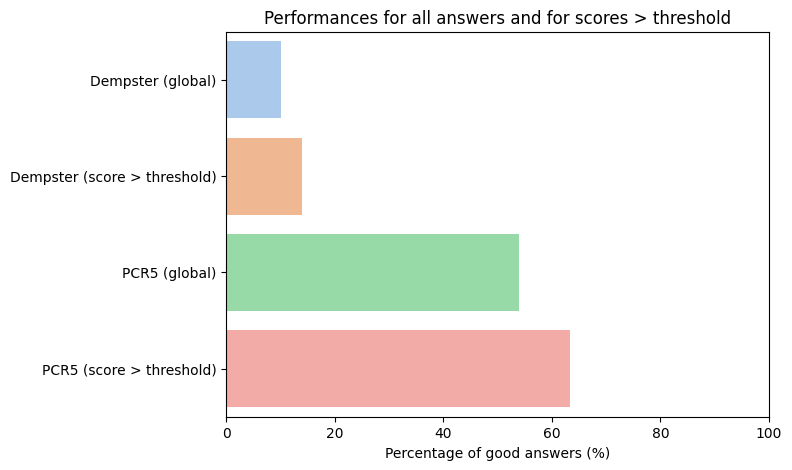

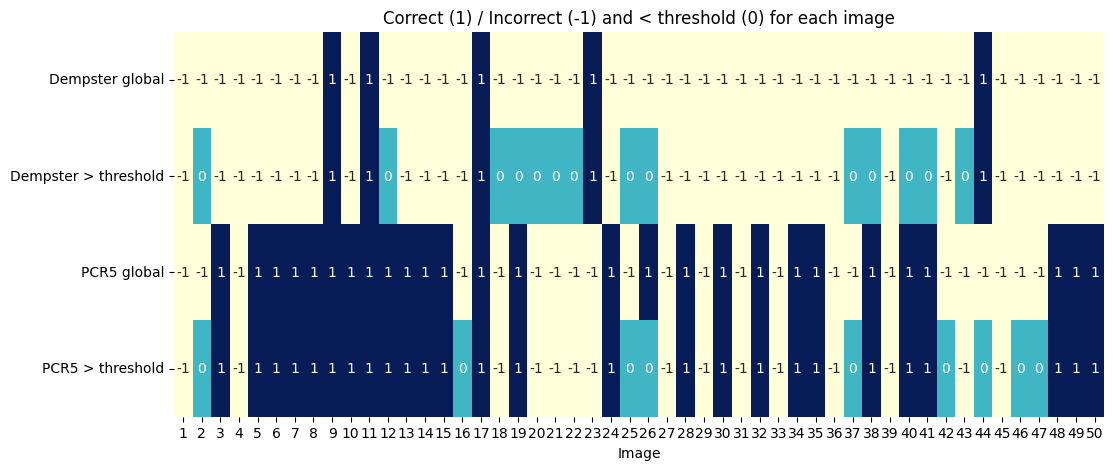

In [ ]:


def plot_perf_threshold(resultat_eval):
    """
    Plot the performance results with a bar chart and a heatmap.

    :param resultat_eval: Dictionary containing performance metrics for Dempster and PCR5 methods.
    """

    df = pd.DataFrame(resultat_eval["details"])

    # ===== BAR CHART GLOBAL + SUP THRESHOLD =====
    plt.figure(figsize=(7, 5))
    methods = [
        "Dempster (global)",
        "Dempster (score > threshold)",
        "PCR5 (global)",
        "PCR5 (score > threshold)"
    ]
    values = [
        resultat_eval["perf_dempster"],
        resultat_eval["perf_correct_sup_dempster"],
        resultat_eval["perf_pcr5"],
        resultat_eval["perf_correct_sup_pcr5"]
    ]
    sns.barplot(x=values, y=methods, palette="pastel")
    plt.xlim(0, 100)
    plt.xlabel("Percentage of good answers (%)")
    plt.title("Performances for all answers and for scores > threshold")
    plt.show()

    # ===== HEATMAP IMAGE BY IMAGE =====
    # 1 if correct, -1 else, and 0 if score < threshold
    plt.figure(figsize=(12, 5))



    heat_data = pd.DataFrame({
        'Image': df['image'],
        
        # === GLOBAL ===
        'Dempster global': df['correct_dempster'].apply(lambda x: 1 if x else -1),
        

        # === > THRESHOLD ===
        'Dempster > threshold': df.apply(
            lambda row: (
                1 if row['correct_dempster'] and row['score_dempster'] > THRESHOLD
                else (-1 if not row['correct_dempster'] and row['score_dempster'] > THRESHOLD
                    else 0)
            ), axis=1
        ),
        'PCR5 global': df['correct_pcr5'].apply(lambda x: 1 if x else -1),
        'PCR5 > threshold': df.apply(
            lambda row: (
                1 if row['correct_pcr5'] and row['score_pcr5'] > THRESHOLD
                else (-1 if not row['correct_pcr5'] and row['score_pcr5'] > THRESHOLD
                    else 0)
            ), axis=1
        )
    }).set_index('Image').T



    sns.heatmap(heat_data, annot=True, cmap="YlGnBu", cbar=False, fmt='d')
    plt.title(f"Correct (1) / Incorrect (-1) and < threshold (0) for each image")


resultat_eval1 = results(list_opinions=list_opinions_ref)
print_results(resultat_eval1)
plot_perf_threshold(resultat_eval1)




In [ ]:
def select_expert(NB_EXPERT,pond_list=[1,1,1,1,1],mode_selection='easy'or'strict'or'very_strict'):
    """
    Selects the best experts based on their confidence scores for each image.

    :param NB_EXPERT: Number of experts to select for each image.
    :param pond_list: List of weights for each criterion (default is [1,1,1,1,1]).
    :param mode_selection: 'easy', 'strict', or 'very_strict' to indicate the level of strictness in the criteria (default is 'easy').
    :return: List of selected experts for each image, where each entry is a list containing:
        [USER, confidence_score].
    """ 
    selected_experts=[]
    for i in range(len(list_img)):
        selected_experts_by_img = []
        for j in range(len(list_opinions_ref)):
            for k in range(len(list_opinions_ref[j])):
                if list_opinions_ref[j][k][IMG] == list_img[i]:
                    conf=confidence_calculation(list_opinions_ref[j][k], j, mode=mode_selection ,pond_list=pond_list, purpose='selection')
                    selected_experts_by_img.append([list_opinions_ref[j][k][USER],conf])
        selected_experts.append(sorted(selected_experts_by_img, key=lambda x: x[1], reverse=True)[0:NB_EXPERT])
        
    list_opinions_selected = []
    for i in range(len(list_opinions_ref)):
        list_opinions_selected.append([])
        for j in range(len(list_opinions_ref[i])):
            for img in range(len(list_img)):
                if list_opinions_ref[i][j][IMG] == list_img[img]:
                    for index in range(len(selected_experts[img])):
                        if list_opinions_ref[i][j][USER] == selected_experts[img][index][0]:

                            list_opinions_selected[i].append(list_opinions_ref[i][j])
                           
                            list_opinions_selected[i][-1][CERTAINTY] = float(list_opinions_ref[i][-1][CERTAINTY])
    return list_opinions_selected



opinions_selected30 = select_expert(NB_EXPERT=30, mode_selection='easy')
opinions_selected30_strict= select_expert(NB_EXPERT=30, mode_selection='strict')
opinions_selected30_very_strict= select_expert(NB_EXPERT=30, mode_selection='very_strict')

opinions_selected10 = select_expert(NB_EXPERT=10)
opinions_selected10_strict = select_expert(NB_EXPERT=10,mode_selection='strict')
opinions_selected10_very_strict = select_expert(NB_EXPERT=10,mode_selection='very_strict')


print_results(results(opinions_selected10))
print_results(results(adjustement(opinions_selected10, mode='easy')[1]))

print_results(results(opinions_selected10_strict))
print_results(results(adjustement(opinions_selected10_strict,mode='strict')[1]))
result3=results(opinions_selected10_very_strict)
print_results(result3)
print_results(results(adjustement(opinions_selected10_very_strict,mode='very_strict')[1]))


print_results(results(opinions_selected30))
print_results(results(opinions_selected30_strict))
print_results(results(opinions_selected30_very_strict))



Performance Dempster: 26.00%
Percentage sup threshold Dempster: 94.00%
Performance correct sup threshold Dempster: 25.53%
Performance correct inf threshold Dempster: 33.33%
Performance PCR5: 62.00%
Percentage sup threshold PCR5: 88.00%
Performance correct sup threshold PCR5: 65.91%
Performance correct inf threshold PCR5: 33.33%


Performance Dempster: 30.00%
Percentage sup threshold Dempster: 90.00%
Performance correct sup threshold Dempster: 31.11%
Performance correct inf threshold Dempster: 20.00%
Performance PCR5: 56.00%
Percentage sup threshold PCR5: 84.00%
Performance correct sup threshold PCR5: 61.90%
Performance correct inf threshold PCR5: 25.00%


Performance Dempster: 26.00%
Percentage sup threshold Dempster: 94.00%
Performance correct sup threshold Dempster: 25.53%
Performance correct inf threshold Dempster: 33.33%
Performance PCR5: 62.00%
Percentage sup threshold PCR5: 88.00%
Performance correct sup threshold PCR5: 65.91%
Performance correct inf threshold PCR5: 33.33%


Per

In [ ]:


def select_expert_randomly(NB_EXPERT):
    """
    Selects a random subset of experts for each image.

    :param NB_EXPERT: Number of experts to select for each image.
    :return: List of selected opinions for each image.
    """
    # Initialize the list to hold selected experts for each image
    selected_experts = []

    # Go through each image in the list of images
    for img in list_img:
        # Find all opinions for the current image
        opinions_for_img = []
        for j in range(len(list_opinions_ref)):
            for k in range(len(list_opinions_ref[j])):
                if list_opinions_ref[j][k][IMG] == img:
                    opinions_for_img.append(list_opinions_ref[j][k])

        # Select a random sample of experts for the current image
        selected_experts_by_img = random.sample(opinions_for_img, min(NB_EXPERT, len(opinions_for_img)))
        selected_experts.append(selected_experts_by_img)

    # Construct the list of selected opinions based on the randomly selected experts
    list_opinions_selected = []
    for i in range(len(list_opinions_ref)):
        list_opinions_selected.append([])
        for j in range(len(list_opinions_ref[i])):
            for img in range(len(list_img)):
                if list_opinions_ref[i][j][IMG] == list_img[img]:
                    for selected_opinion in selected_experts[img]:
                        if list_opinions_ref[i][j][USER] == selected_opinion[USER]:
                            list_opinions_selected[i].append(list_opinions_ref[i][j])

                            list_opinions_selected[i][-1][CERTAINTY] = float(list_opinions_selected[i][-1][CERTAINTY])
    return list_opinions_selected



result=results(select_expert_randomly(30))
print_results(result)
print_results(results(select_expert_randomly(10)))


Performance Dempster: 8.00%
Percentage sup threshold Dempster: 90.00%
Performance correct sup threshold Dempster: 8.89%
Performance correct inf threshold Dempster: 0.00%
Performance PCR5: 62.00%
Percentage sup threshold PCR5: 86.00%
Performance correct sup threshold PCR5: 67.44%
Performance correct inf threshold PCR5: 28.57%


Performance Dempster: 26.00%
Percentage sup threshold Dempster: 98.00%
Performance correct sup threshold Dempster: 26.53%
Performance correct inf threshold Dempster: 0.00%
Performance PCR5: 44.00%
Percentage sup threshold PCR5: 84.00%
Performance correct sup threshold PCR5: 50.00%
Performance correct inf threshold PCR5: 12.50%



In [ ]:


#THIS ROW NEEDS APPROXIMATELY 30 MINUTES TO EXECUTE

list_nb_expert=[45,40,35,30,25,20, 15, 10,9,8,7,6, 5,4, 3, 2, 1]
modes=['easy', 'strict', 'very_strict']

# Create a DataFrame to store the results
df_results = pd.DataFrame(columns=["Number of Experts","Mode",
                                    "Performance dempster", "Percentage > threshold dempster",
                                   "Performance correct > threshold dempster", "Performance correct < threshold dempster"
                                   "Performance PCR5", "Percentage > threshold pcr5",
                                   "Performance correct > threshold pcr5", "Performance correct < threshold pcr5"])

# Add the reference results for no selection
result_ref=results(list_opinions_ref)
new_row = pd.DataFrame([{
            "Number of Experts": 55,
            "Mode": 'No Selection',
            "Performance dempster": result_ref["perf_dempster"],
            "Percentage > threshold dempster": result_ref["percent_sup_dempster"],
            "Performance correct > threshold dempster": result_ref["perf_correct_sup_dempster"],
            "Performance correct < threshold dempster": result_ref["perf_correct_inf_dempster"],
            "Performance PCR5": result_ref["perf_pcr5"],
            "Percentage > threshold pcr5": result_ref["percent_sup_pcr5"],
            "Performance correct > threshold pcr5": result_ref["perf_correct_sup_pcr5"],
            "Performance correct < threshold pcr5": result_ref["perf_correct_inf_pcr5"]
        }])
df_results = pd.concat([df_results, new_row], ignore_index=True)

# Iterate over the number of experts and modes to compute results

for nb_expert in list_nb_expert:
    for mode in modes:
        expert_selection = select_expert(NB_EXPERT=nb_expert, mode_selection=mode)
        result = results(expert_selection)
        result_adjusted = results(adjustement(expert_selection, mode=mode)[1]   )
        # Store the results in the DataFrame
        new_row = pd.DataFrame([{
            "Number of Experts": nb_expert,
            "Mode": mode,
            "Performance dempster": result["perf_dempster"],
            "Percentage > threshold dempster": result["percent_sup_dempster"],
            "Performance correct > threshold dempster": result["perf_correct_sup_dempster"],
            "Performance correct < threshold dempster": result["perf_correct_inf_dempster"],
            "Performance PCR5": result["perf_pcr5"],
            "Percentage > threshold pcr5": result["percent_sup_pcr5"],
            "Performance correct > threshold pcr5": result["perf_correct_sup_pcr5"],
            "Performance correct < threshold pcr5": result["perf_correct_inf_pcr5"]
        }])
        df_results = pd.concat([df_results, new_row], ignore_index=True)
        # Store the adjusted results in the DataFrame
        new_row_adjusted = pd.DataFrame([{
            "Number of Experts": nb_expert,
            "Mode": "adjusted "+mode,
            "Performance dempster": result_adjusted["perf_dempster"],
            "Percentage > threshold dempster": result_adjusted["percent_sup_dempster"],
            "Performance correct > threshold dempster": result_adjusted["perf_correct_sup_dempster"],
            "Performance correct < threshold dempster": result_adjusted["perf_correct_inf_dempster"],
            "Performance PCR5": result_adjusted["perf_pcr5"],
            "Percentage > threshold pcr5": result_adjusted["percent_sup_pcr5"],
            "Performance correct > threshold pcr5": result_adjusted["perf_correct_sup_pcr5"],
            "Performance correct < threshold pcr5": result_adjusted["perf_correct_inf_pcr5"]
        }])
        df_results = pd.concat([df_results, new_row_adjusted], ignore_index=True)


def average_perf_random(NB_EXPERT,NB_TRY=100,mode='None'or'easy'or'strict'or'very_strict'):
    """
    Calculate the average performance of random selection of experts.

    :param NB_EXPERT: Number of experts to select for each random trial.
    :param NB_TRY: Number of random trials to perform (default is 100).
    :param mode: 'None', 'easy', 'strict', or 'very_strict' to indicate the level of adjustment (default is 'None').
    :return: A dictionary with average performance metrics.
    """
    performances = []
    for _ in range(NB_TRY):  # 100 random selections
        if mode == 'None':
            result = results(select_expert_randomly(NB_EXPERT))

        else:
            result = results(adjustement(select_expert_randomly(NB_EXPERT), mode=mode)[1])
        performances.append(result)
    
    avg_perf = {
        "perf_dempster": sum(p["perf_dempster"] for p in performances) / len(performances),
        "percent_sup_dempster": sum(p["percent_sup_dempster"] for p in performances) / len(performances),
        "perf_correct_sup_dempster": sum(p["perf_correct_sup_dempster"] for p in performances) / len(performances),
        "perf_correct_inf_dempster": sum(p["perf_correct_inf_dempster"] for p in performances) / len(performances),
        "perf_pcr5": sum(p["perf_pcr5"] for p in performances) / len(performances),
        "percent_sup_pcr5": sum(p["percent_sup_pcr5"] for p in performances) / len(performances),
        "perf_correct_sup_pcr5": sum(p["perf_correct_sup_pcr5"] for p in performances) / len(performances),
        "perf_correct_inf_pcr5": sum(p["perf_correct_inf_pcr5"] for p in performances) / len(performances)
    }
    
    return avg_perf


# Iterate over the number of experts and modes to compute average performances for random selection
for nb_expert in list_nb_expert:
    avg_perf = average_perf_random(nb_expert, NB_TRY=100, mode='None')
    new_row = pd.DataFrame([{
        "Number of Experts": nb_expert,
        "Mode": 'Random',
        "Performance dempster": avg_perf["perf_dempster"],
        "Percentage > threshold dempster": avg_perf["percent_sup_dempster"],
        "Performance correct > threshold dempster": avg_perf["perf_correct_sup_dempster"],
        "Performance correct < threshold dempster": avg_perf["perf_correct_inf_dempster"],
        "Performance PCR5": avg_perf["perf_pcr5"],
        "Percentage > threshold pcr5": avg_perf["percent_sup_pcr5"],
        "Performance correct > threshold pcr5": avg_perf["perf_correct_sup_pcr5"],
        "Performance correct < threshold pcr5": avg_perf["perf_correct_inf_pcr5"]
    }])
    df_results = pd.concat([df_results, new_row], ignore_index=True)



# Iterate over the number of experts and modes to compute average performances for random selection with adjustment
for mode in modes:
    for nb_expert in list_nb_expert:
        avg_perf = average_perf_random(nb_expert, NB_TRY=100, mode=mode)
        new_row = pd.DataFrame([{
            "Number of Experts": nb_expert,
            "Mode": 'Random adjusted '+mode,
            "Performance dempster": avg_perf["perf_dempster"],
            "Percentage > threshold dempster": avg_perf["percent_sup_dempster"],
            "Performance correct > threshold dempster": avg_perf["perf_correct_sup_dempster"],
            "Performance correct < threshold dempster": avg_perf["perf_correct_inf_dempster"],
            "Performance PCR5": avg_perf["perf_pcr5"],
            "Percentage > threshold pcr5": avg_perf["percent_sup_pcr5"],
            "Performance correct > threshold pcr5": avg_perf["perf_correct_sup_pcr5"],
            "Performance correct < threshold pcr5": avg_perf["perf_correct_inf_pcr5"]
        }])
        df_results = pd.concat([df_results, new_row], ignore_index=True)


#print(df_results)



C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_25056\217309709.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_row], ignore_index=True)


✅ Curves 'Dempster - easy' et 'Dempster - strict' are the same !
✅ Curves 'Dempster - easy' et 'Dempster - very_strict' are the same !
✅ Curves 'PCR5 - easy' et 'PCR5 - strict' are the same !
✅ Curves 'PCR5 - easy' et 'PCR5 - very_strict' are the same !
✅ Curves 'Dempster - strict' et 'Dempster - very_strict' are the same !
✅ Curves 'PCR5 - strict' et 'PCR5 - very_strict' are the same !


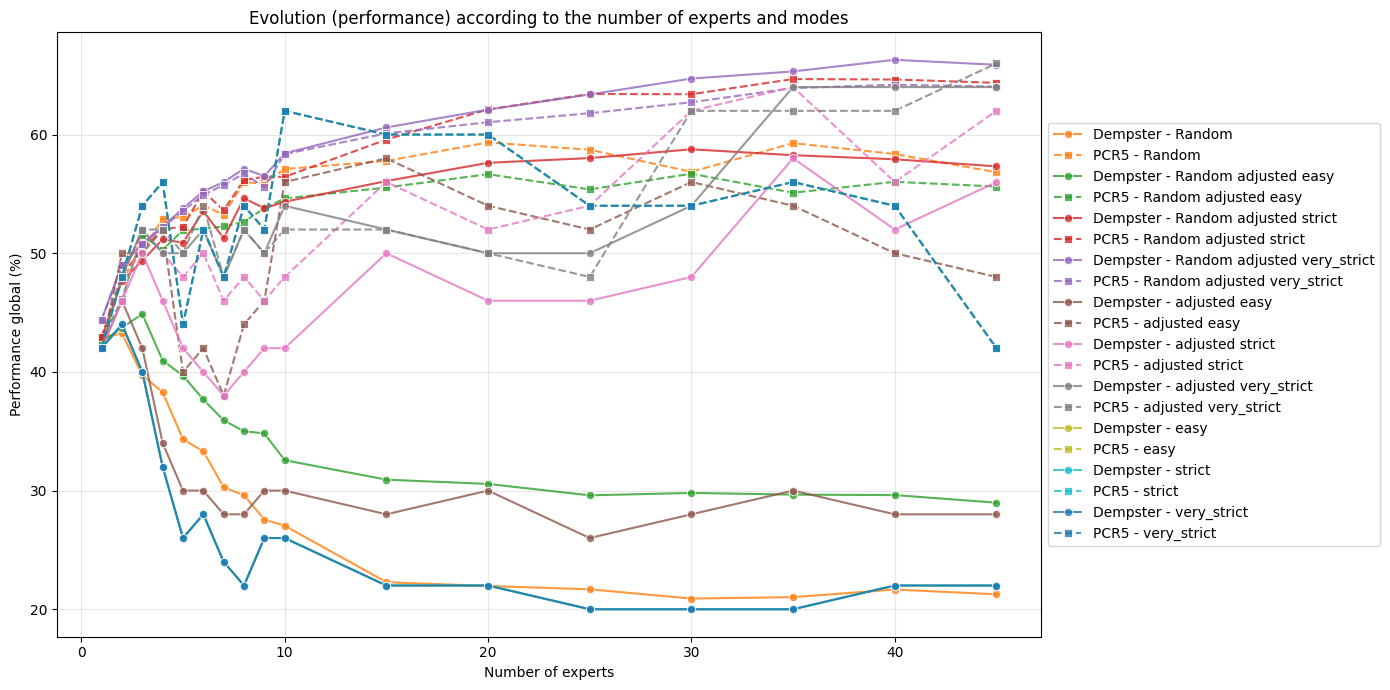

✅ Curves 'Dempster - easy' et 'Dempster - strict' are the same !
✅ Curves 'Dempster - easy' et 'Dempster - very_strict' are the same !
✅ Curves 'PCR5 - easy' et 'PCR5 - strict' are the same !
✅ Curves 'PCR5 - easy' et 'PCR5 - very_strict' are the same !
✅ Curves 'Dempster - strict' et 'Dempster - very_strict' are the same !
✅ Curves 'PCR5 - strict' et 'PCR5 - very_strict' are the same !


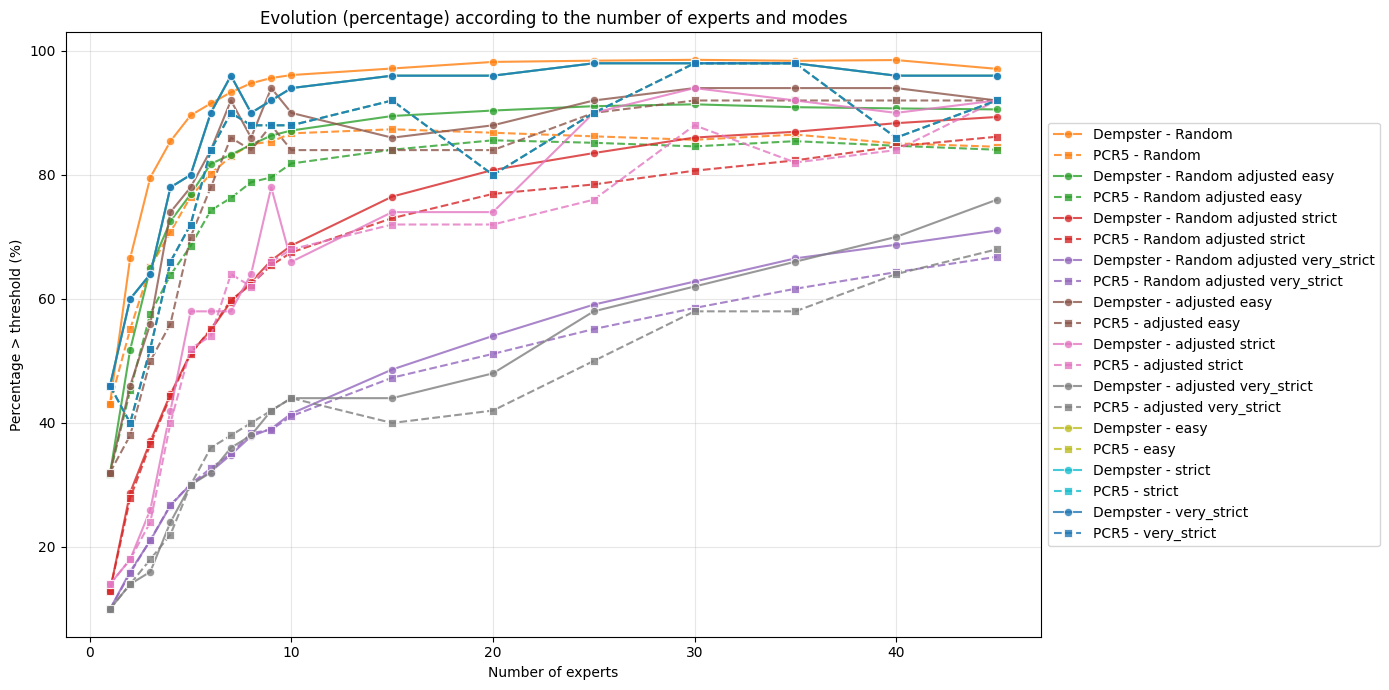

✅ Curves 'Dempster - easy' et 'Dempster - strict' are the same !
✅ Curves 'Dempster - easy' et 'Dempster - very_strict' are the same !
✅ Curves 'PCR5 - easy' et 'PCR5 - strict' are the same !
✅ Curves 'PCR5 - easy' et 'PCR5 - very_strict' are the same !
✅ Curves 'Dempster - strict' et 'Dempster - very_strict' are the same !
✅ Curves 'PCR5 - strict' et 'PCR5 - very_strict' are the same !


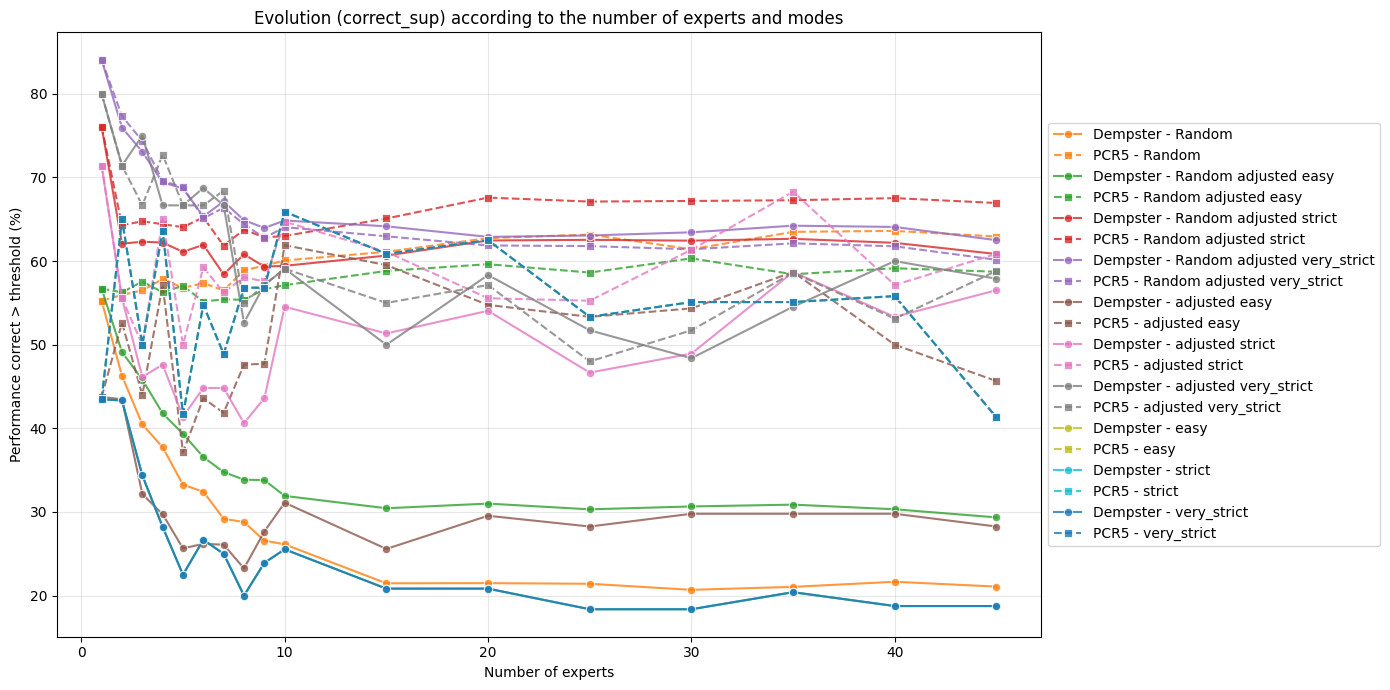

✅ Curves 'Dempster - easy' et 'Dempster - strict' are the same !
✅ Curves 'Dempster - easy' et 'Dempster - very_strict' are the same !
✅ Curves 'PCR5 - easy' et 'PCR5 - strict' are the same !
✅ Curves 'PCR5 - easy' et 'PCR5 - very_strict' are the same !
✅ Curves 'Dempster - strict' et 'Dempster - very_strict' are the same !
✅ Curves 'PCR5 - strict' et 'PCR5 - very_strict' are the same !


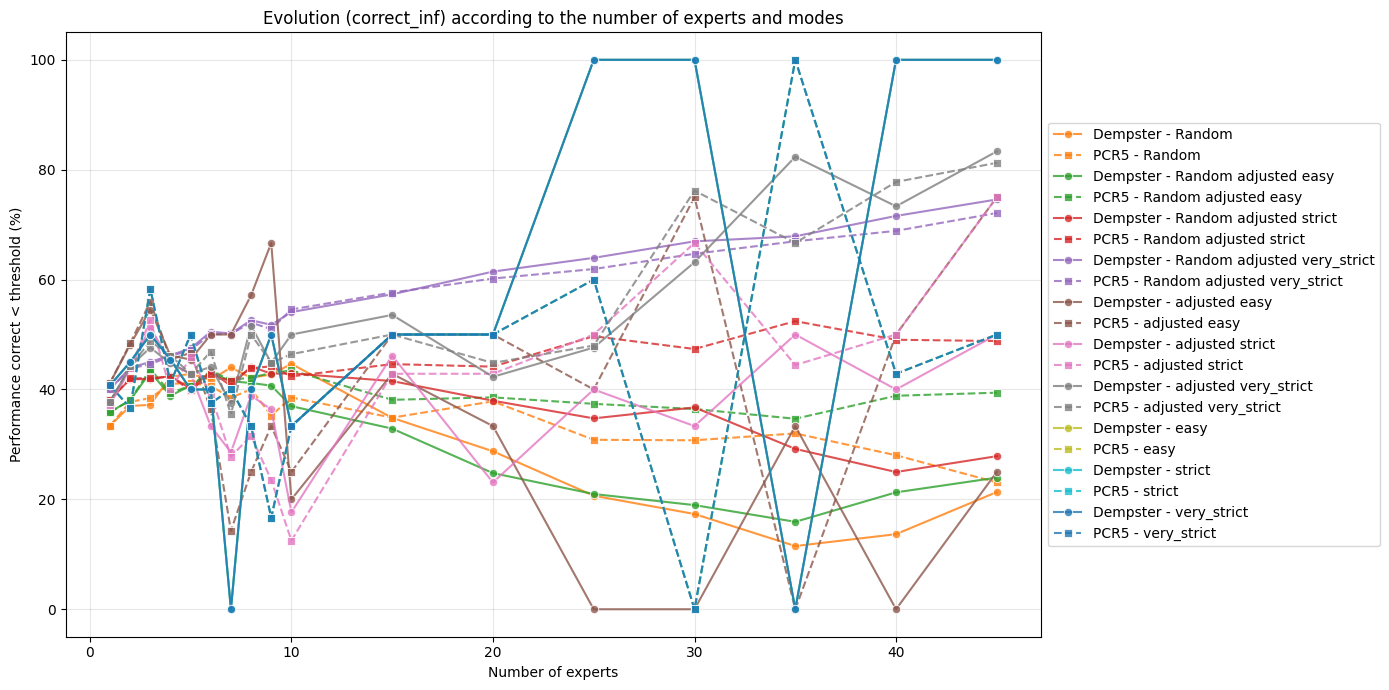

In [37]:
def plot_modes_vs_experts(df_results, mode_view="performance"or"percentage"or"correct_sup"or"correct_inf"):
    """
    Plot the performance metrics of different modes against the number of experts.

    :param mode_view:
        - "performance" (default)
        - "percentage"
        - "correct_sup"
        - "correct_inf"
    :param df_results: DataFrame containing the results with columns:
        - "Number of Experts"
        - "Mode"
        - "Performance dempster"
        - "Percentage > threshold dempster"
        - "Performance correct > threshold dempster"
        - "Performance correct < threshold dempster"
        - "Performance PCR5"
        - "Percentage > threshold pcr5"
        - "Performance correct > threshold pcr5"
        - "Performance correct < threshold pcr5"
    :return: None
    """

    # Mapping of mode_view to column names and y-labels
    metric_map = {
        "performance": (
            "Performance dempster", 
            "Performance PCR5",
            "Performance global (%)"
        ),
        "percentage": (
            "Percentage > threshold dempster", 
            "Percentage > threshold pcr5",
            "Percentage > threshold (%)"
        ),
        "correct_sup": (
            "Performance correct > threshold dempster", 
            "Performance correct > threshold pcr5",
            "Performance correct > threshold (%)"
        ),
        "correct_inf": (
            "Performance correct < threshold dempster", 
            "Performance correct < threshold pcr5",
            "Performance correct < threshold (%)"
        )
    }

    if mode_view not in metric_map:
        raise ValueError(f"mode_view must be in {list(metric_map.keys())}")

    col_dempster, col_pcr5, ylabel = metric_map[mode_view]

    df_results = df_results.sort_values(by=["Mode", "Number of Experts"])
    modes = df_results["Mode"].unique()

    plt.figure(figsize=(14, 7))
    palette = sns.color_palette("tab10", len(modes))

    # Store curves for comparison
    curves = {}

    for i, mode in enumerate(modes):
        subset = df_results[df_results["Mode"] == mode][["Number of Experts", col_dempster, col_pcr5]]

        if len(subset) < 2:
            continue

        # Sauvegarde pour comparaison
        curves[f"Dempster - {mode}"] = subset[["Number of Experts", col_dempster]].rename(
            columns={col_dempster: "Value"}
        ).reset_index(drop=True)

        curves[f"PCR5 - {mode}"] = subset[["Number of Experts", col_pcr5]].rename(
            columns={col_pcr5: "Value"}
        ).reset_index(drop=True)

        # Plotting the lines
        sns.lineplot(
            x="Number of Experts",
            y=col_dempster,
            data=subset,
            label=f"Dempster - {mode}",
            color=palette[i],
            linestyle="-",
            marker="o",
            alpha=0.8
        )
        sns.lineplot(
            x="Number of Experts",
            y=col_pcr5,
            data=subset,
            label=f"PCR5 - {mode}",
            color=palette[i],
            linestyle="--",
            marker="s",
            alpha=0.8
        )

    # Comparison of curves
    checked = set()
    for c1, df1 in curves.items():
        for c2, df2 in curves.items():
            if c1 != c2 and (c2, c1) not in checked:
                checked.add((c1, c2))
                if df1.equals(df2):
                    print(f"✅ Curves '{c1}' et '{c2}' are the same !")

    plt.xlabel("Number of experts")
    plt.ylabel(ylabel)
    plt.title(f"Evolution ({mode_view}) according to the number of experts and modes")
    plt.grid(True, alpha=0.3)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()

# Default view: Performance
plot_modes_vs_experts(df_results)

# Percentage of experts above threshold
plot_modes_vs_experts(df_results, mode_view="percentage")

# Percentage of correct answers above threshold
plot_modes_vs_experts(df_results, mode_view="correct_sup")

# Percentage of correct answers below threshold
plot_modes_vs_experts(df_results, mode_view="correct_inf")


✅ Curves 'Pcr5 - easy' et 'Pcr5 - strict' are the same between 1 et 10 experts.
✅ Curves 'Pcr5 - easy' et 'Pcr5 - very_strict' are the same between 1 et 10 experts.
✅ Curves 'Pcr5 - strict' et 'Pcr5 - very_strict' are the same between 1 et 10 experts.


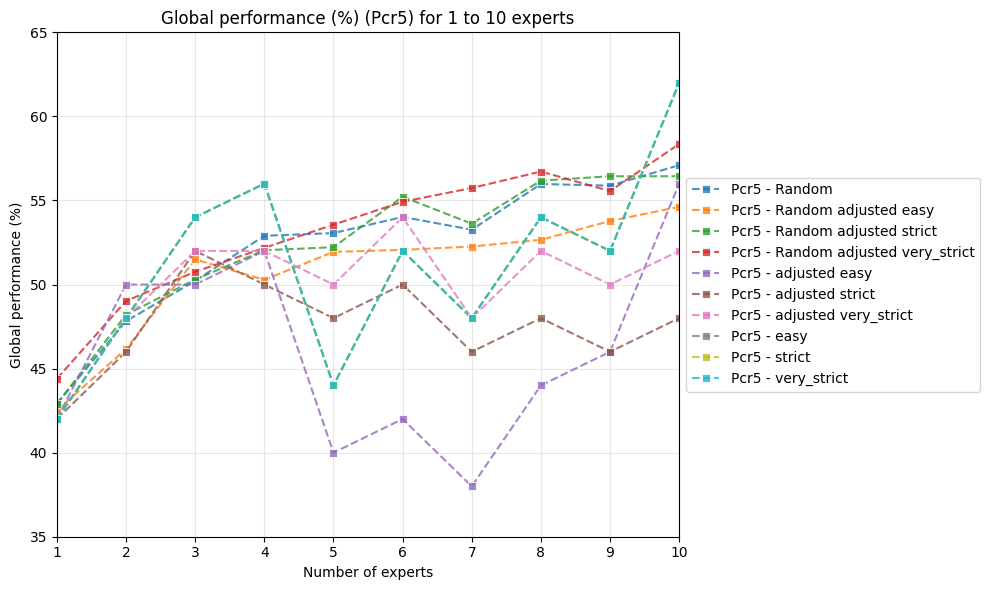

✅ Curves 'Pcr5 - easy' et 'Pcr5 - strict' are the same between 1 et 10 experts.
✅ Curves 'Pcr5 - easy' et 'Pcr5 - very_strict' are the same between 1 et 10 experts.
✅ Curves 'Pcr5 - strict' et 'Pcr5 - very_strict' are the same between 1 et 10 experts.


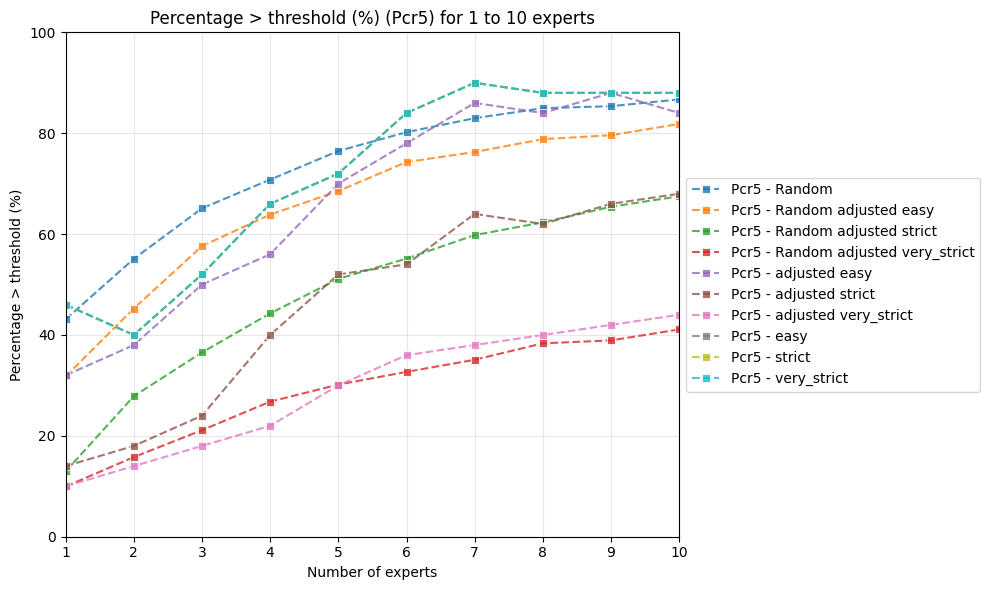

✅ Curves 'Dempster - easy' et 'Dempster - strict' are the same between 1 et 10 experts.
✅ Curves 'Dempster - easy' et 'Dempster - very_strict' are the same between 1 et 10 experts.
✅ Curves 'Dempster - strict' et 'Dempster - very_strict' are the same between 1 et 10 experts.


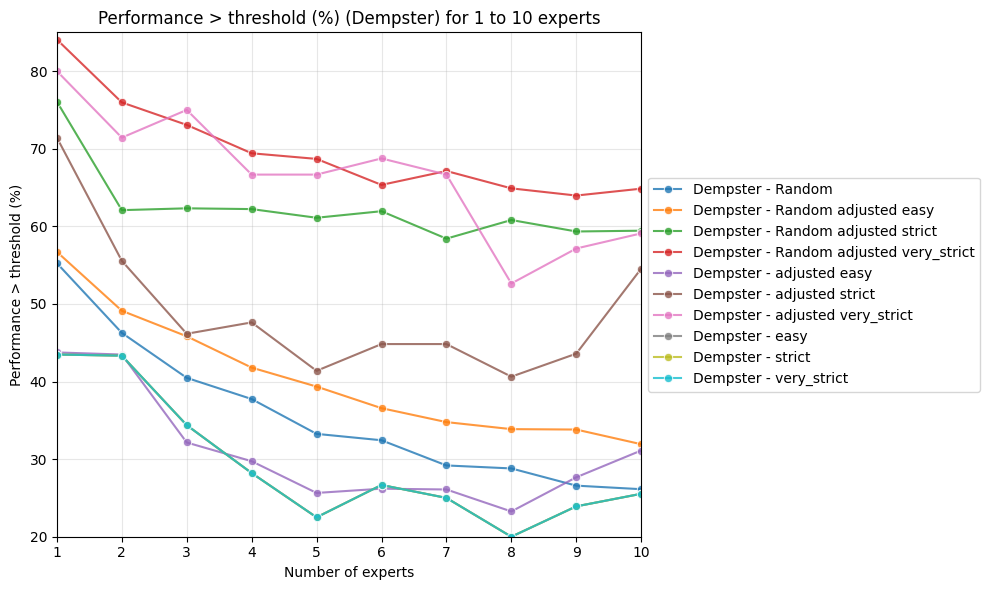

In [39]:
def plot_single_method_vs_experts_zoom(df_results, method="dempster"or"PCR5", 
                                       mode_view="performance"or"percentage"or"correct_sup"or"correct_inf",
                                       y_min=0, y_max=100, 
                                       x_min=0, x_max=50):
    """
    Plot the performance of a single method (Dempster or PCR5) against the number of experts, with zoom on a specific range.

    :param df_results: DataFrame containing the results with columns:
        - "Number of Experts"
        - "Mode"
        - "Performance dempster"
        - "Percentage > threshold dempster"
        - "Performance correct > threshold dempster"
        - "Performance correct < threshold dempster"
        - "Performance PCR5"
        - "Percentage > threshold pcr5"
        - "Performance correct > threshold pcr5"
        - "Performance correct < threshold pcr5"
    :param method: "dempster" or "PCR5" to select the method to plot.
    :param mode_view :
        - "performance" (default)
        - "percentage"
        - "correct_sup"
        - "correct_inf"
    :param y_min: Minimum y-axis value for zoom (default is 0).
    :param y_max: Maximum y-axis value for zoom (default is 100).
    :param x_min: Minimum x-axis value for zoom (default is 0).
    :param x_max: Maximum x-axis value for zoom (default is 50).
    :return: None
    """

    assert method in ["dempster", "PCR5"], "method must be 'dempster' or 'PCR5'."

    # Mapping of mode_view to column names and y-labels
    metric_map = {
        "performance": (
            "Performance dempster", 
            "Performance PCR5",
            "Global performance (%)"
        ),
        "percentage": (
            "Percentage > threshold dempster", 
            "Percentage > threshold pcr5",
            "Percentage > threshold (%)"
        ),
        "correct_sup": (
            "Performance correct > threshold dempster", 
            "Performance correct > threshold pcr5",
            "Performance > threshold (%)"
        ),
        "correct_inf": (
            "Performance correct < threshold dempster", 
            "Performance correct < threshold pcr5",
            "Performance < threshold (%)"
        )
    }

    if mode_view not in metric_map:
        raise ValueError(f"mode_view must be in {list(metric_map.keys())}")

    col_dempster, col_pcr5, ylabel = metric_map[mode_view]
    col_to_plot = col_dempster if method == "dempster" else col_pcr5

    # Choose the DataFrame subset based on the method and zoom range
    df_zoom = df_results[(df_results["Number of Experts"] >= x_min) &
                         (df_results["Number of Experts"] <= x_max)]

    df_zoom = df_zoom.sort_values(by=["Mode", "Number of Experts"])
    modes = df_zoom["Mode"].unique()

    plt.figure(figsize=(10, 6))
    palette = sns.color_palette("tab10", len(modes))

    curves = {}

    for i, mode in enumerate(modes):
        subset = df_zoom[df_zoom["Mode"] == mode][["Number of Experts", col_to_plot]]
        if len(subset) < 2:
            continue

        curves[f"{method.capitalize()} - {mode}"] = subset.rename(
            columns={col_to_plot: "Value"}
        ).reset_index(drop=True)

        sns.lineplot(
            x="Number of Experts",
            y=col_to_plot,
            data=subset,
            label=f"{method.capitalize()} - {mode}",
            color=palette[i],
            linestyle="-" if method == "dempster" else "--",
            marker="o" if method == "dempster" else "s",
            alpha=0.8
        )

    # Comparaison des courbes identiques
    checked = set()
    for c1, df1 in curves.items():
        for c2, df2 in curves.items():
            if c1 != c2 and (c2, c1) not in checked:
                checked.add((c1, c2))
                if df1.equals(df2):
                    print(f"✅ Curves '{c1}' et '{c2}' are the same between {x_min} et {x_max} experts.")

    plt.ylim(y_min, y_max)
    plt.xlim(x_min, x_max)
    plt.xlabel("Number of experts")
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} ({method.capitalize()}) for {x_min} to {x_max} experts")
    plt.grid(True, alpha=0.3)

    # ✅ Add legend outside the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()


# Performance (par défaut), zoom entre 1 et 10 experts, Dempster uniquement
plot_single_method_vs_experts_zoom(df_results, method="PCR5", x_min=1, x_max=10, y_min=35, y_max=65)

# Pourcentage > threshold, PCR5 uniquement
plot_single_method_vs_experts_zoom(df_results, method="PCR5", mode_view="percentage", x_min=1, x_max=10)

# Performance correcte > threshold pour Dempster
plot_single_method_vs_experts_zoom(df_results, method="dempster", mode_view="correct_sup", x_min=1, x_max=10, y_min=20, y_max=85)


Mode selection: easy
Zoom range: x_min=1, x_max=10, y_min=20, y_max=95
Number of experts selected: 10

Performance Dempster: 26.00%
Percentage sup threshold Dempster: 94.00%
Performance correct sup threshold Dempster: 25.53%
Performance correct inf threshold Dempster: 33.33%
Performance PCR5: 62.00%
Percentage sup threshold PCR5: 88.00%
Performance correct sup threshold PCR5: 65.91%
Performance correct inf threshold PCR5: 33.33%



C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_25056\541144299.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=methods, palette="pastel")


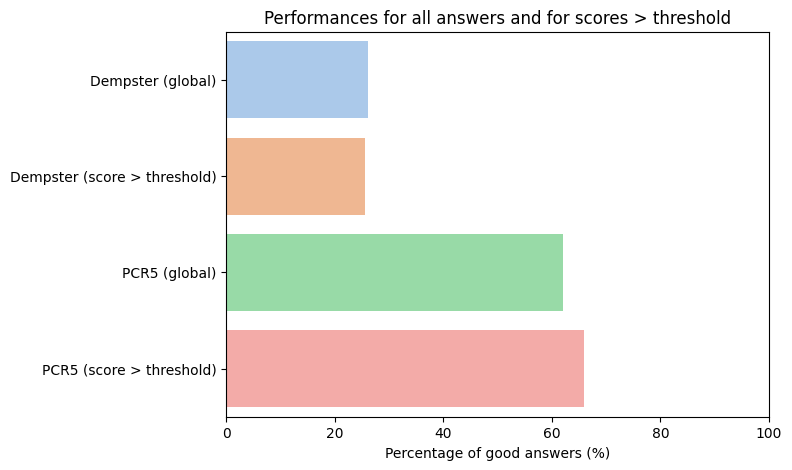

✅ Curves 'Dempster - easy' et 'Dempster - strict' are the same between 1 et 10 experts.
✅ Curves 'Dempster - easy' et 'Dempster - very_strict' are the same between 1 et 10 experts.
✅ Curves 'Dempster - strict' et 'Dempster - very_strict' are the same between 1 et 10 experts.


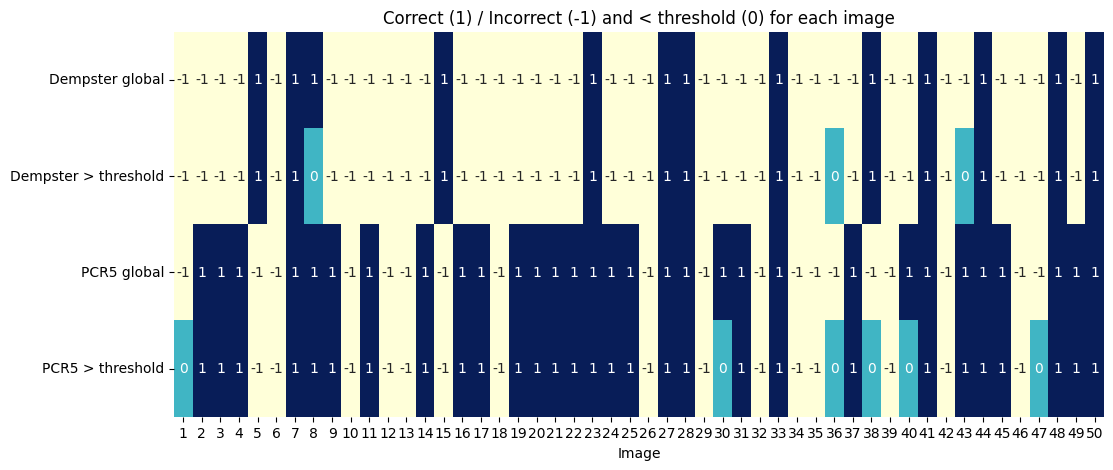

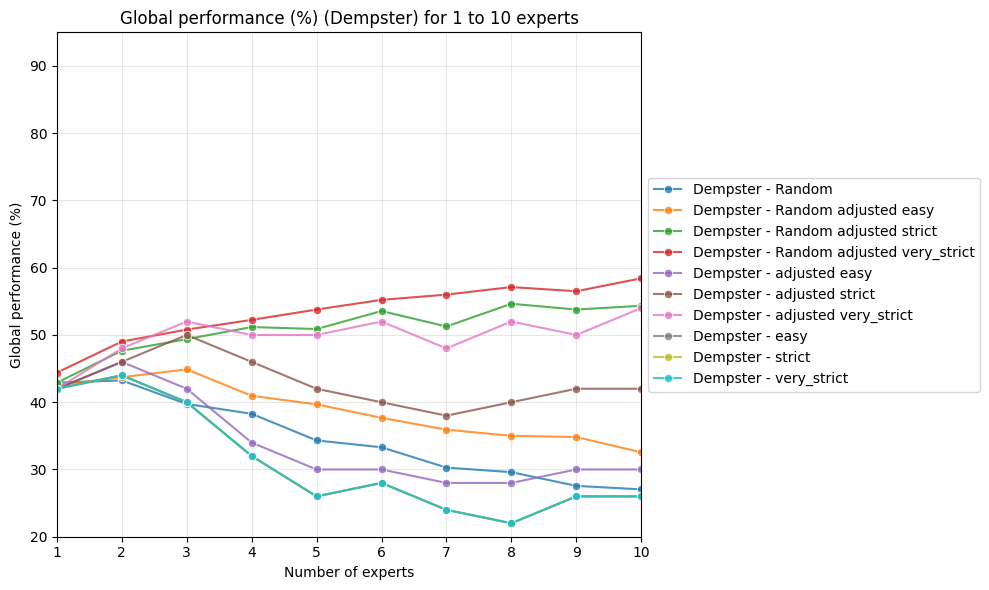

✅ Curves 'Pcr5 - easy' et 'Pcr5 - strict' are the same between 1 et 10 experts.
✅ Curves 'Pcr5 - easy' et 'Pcr5 - very_strict' are the same between 1 et 10 experts.
✅ Curves 'Pcr5 - strict' et 'Pcr5 - very_strict' are the same between 1 et 10 experts.


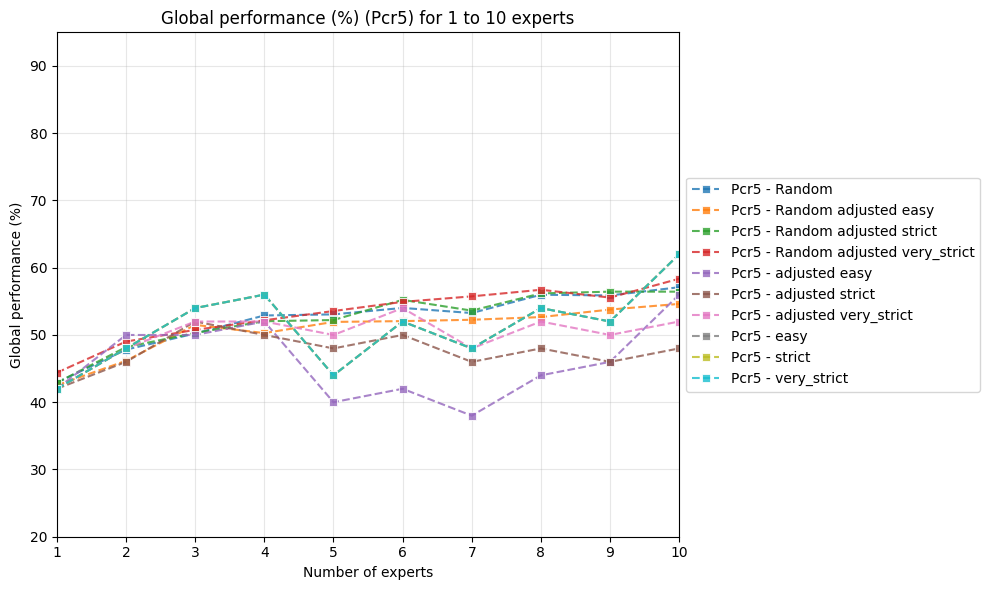

✅ Curves 'Dempster - easy' et 'Dempster - strict' are the same between 1 et 10 experts.
✅ Curves 'Dempster - easy' et 'Dempster - very_strict' are the same between 1 et 10 experts.
✅ Curves 'Dempster - strict' et 'Dempster - very_strict' are the same between 1 et 10 experts.


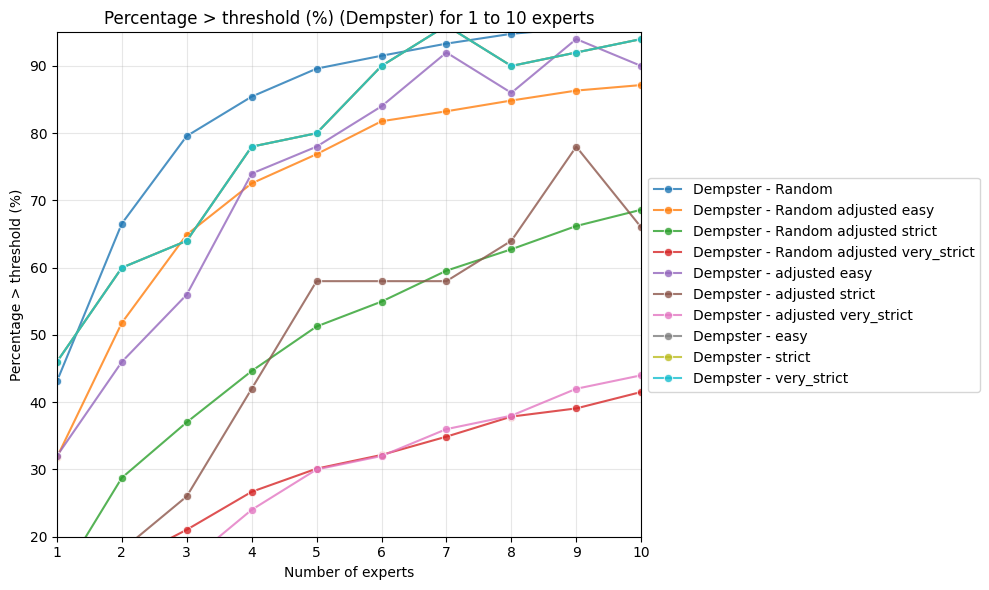

✅ Curves 'Pcr5 - easy' et 'Pcr5 - strict' are the same between 1 et 10 experts.
✅ Curves 'Pcr5 - easy' et 'Pcr5 - very_strict' are the same between 1 et 10 experts.
✅ Curves 'Pcr5 - strict' et 'Pcr5 - very_strict' are the same between 1 et 10 experts.


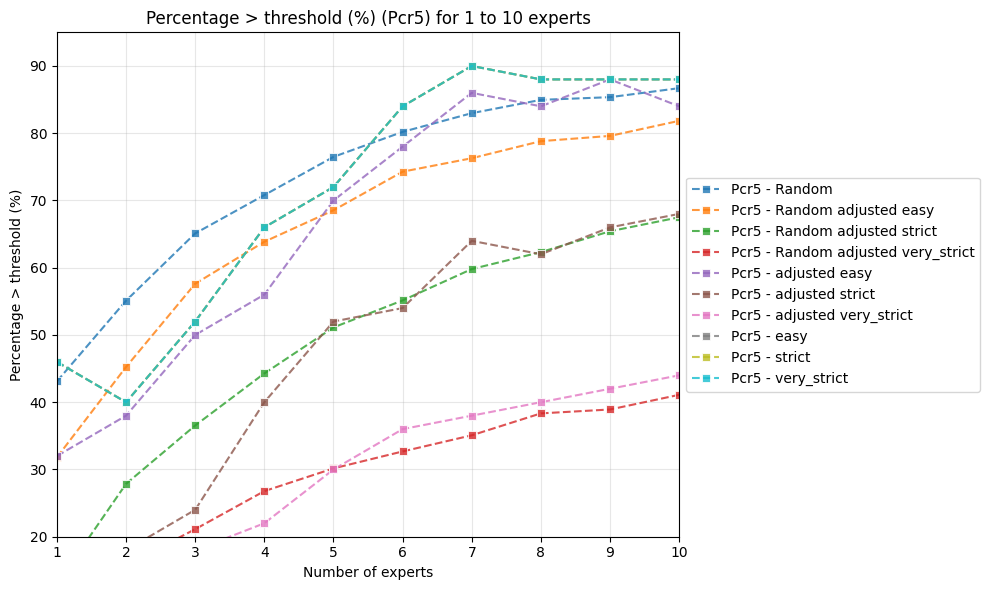

✅ Curves 'Dempster - easy' et 'Dempster - strict' are the same between 1 et 10 experts.
✅ Curves 'Dempster - easy' et 'Dempster - very_strict' are the same between 1 et 10 experts.
✅ Curves 'Dempster - strict' et 'Dempster - very_strict' are the same between 1 et 10 experts.


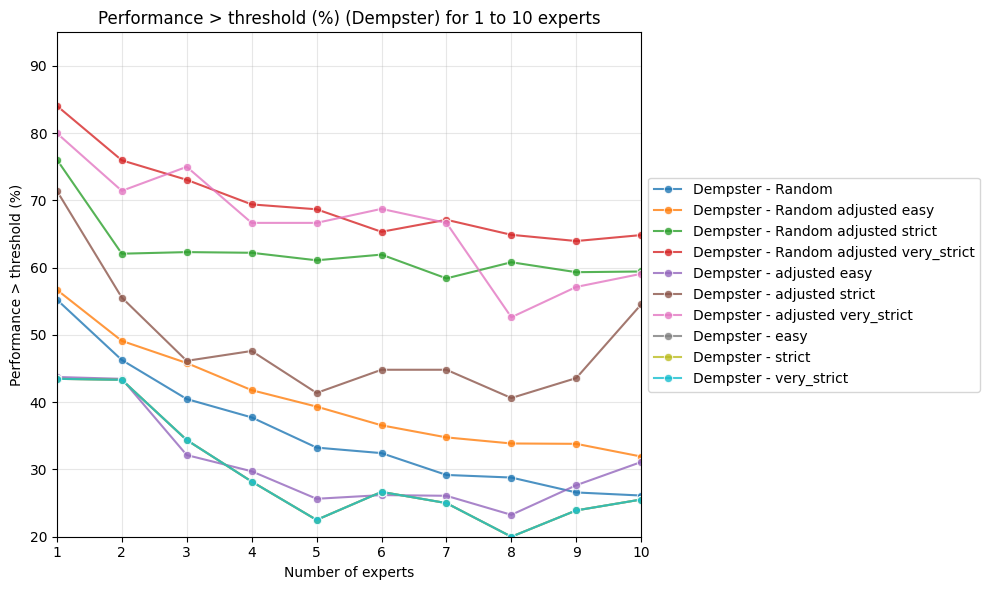

✅ Curves 'Pcr5 - easy' et 'Pcr5 - strict' are the same between 1 et 10 experts.
✅ Curves 'Pcr5 - easy' et 'Pcr5 - very_strict' are the same between 1 et 10 experts.
✅ Curves 'Pcr5 - strict' et 'Pcr5 - very_strict' are the same between 1 et 10 experts.


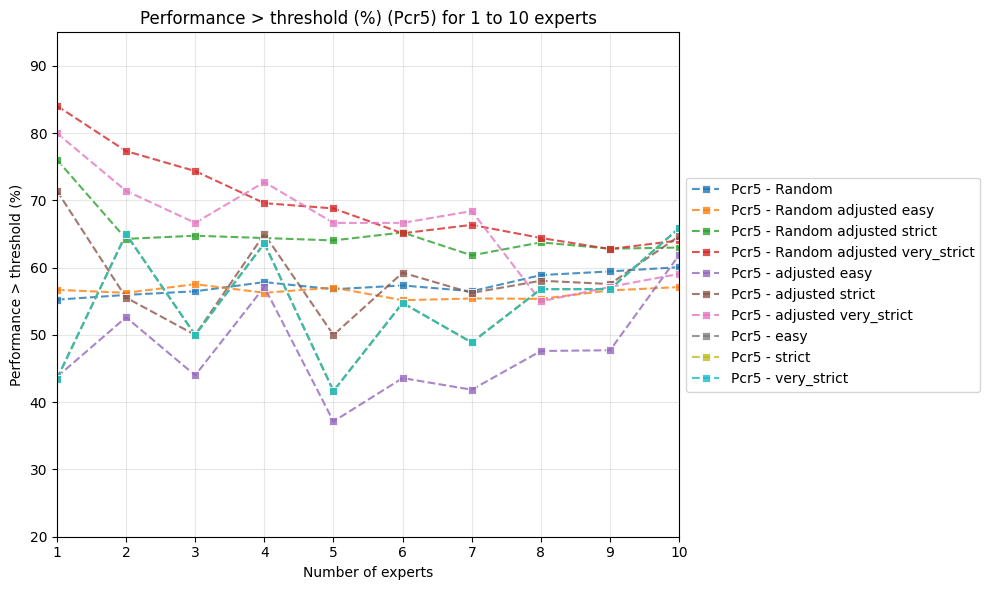

✅ Curves 'Dempster - easy' et 'Dempster - strict' are the same between 1 et 10 experts.
✅ Curves 'Dempster - easy' et 'Dempster - very_strict' are the same between 1 et 10 experts.
✅ Curves 'Dempster - strict' et 'Dempster - very_strict' are the same between 1 et 10 experts.


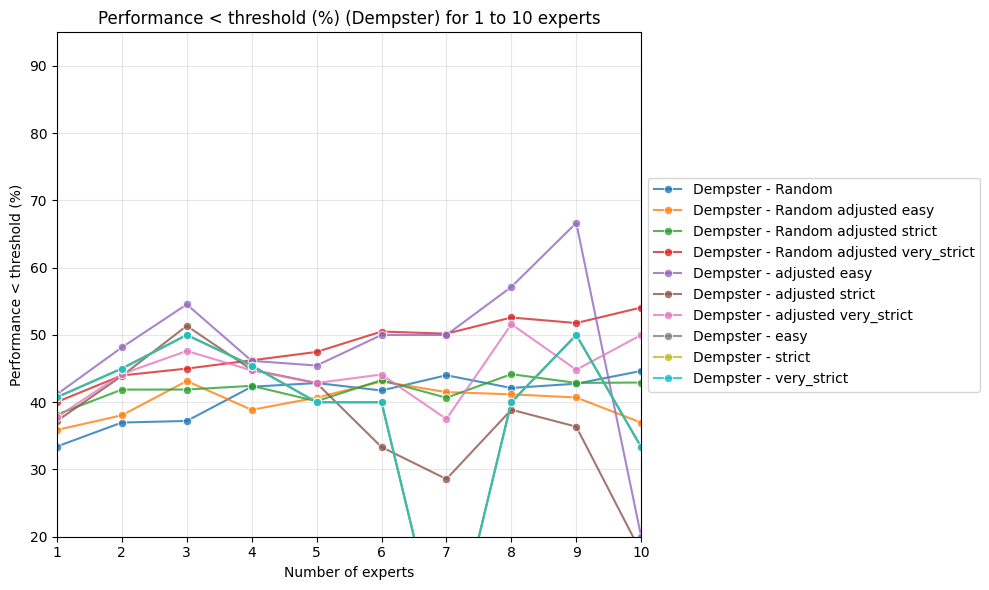

✅ Curves 'Pcr5 - easy' et 'Pcr5 - strict' are the same between 1 et 10 experts.
✅ Curves 'Pcr5 - easy' et 'Pcr5 - very_strict' are the same between 1 et 10 experts.
✅ Curves 'Pcr5 - strict' et 'Pcr5 - very_strict' are the same between 1 et 10 experts.


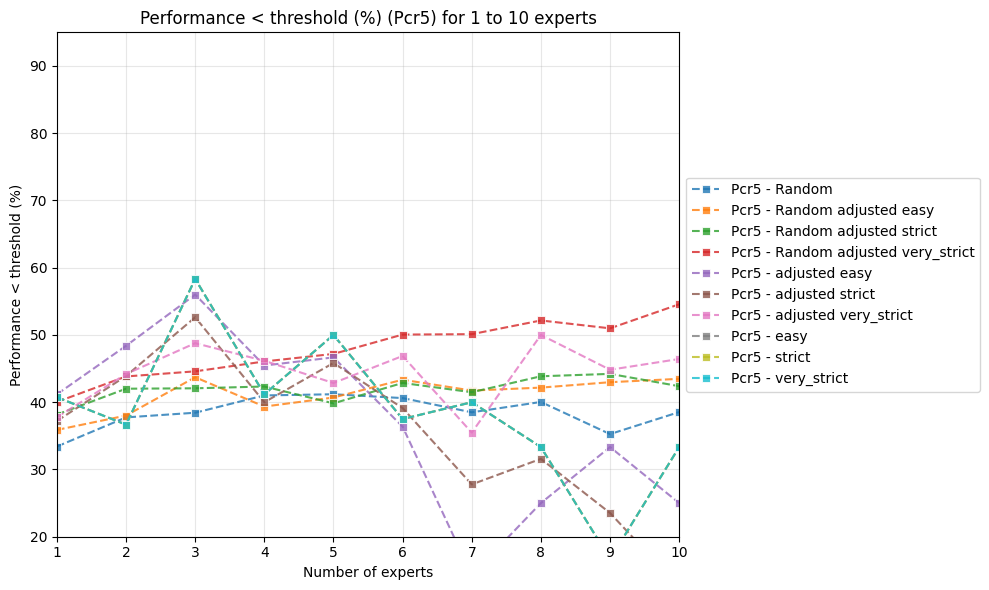

In [43]:


def plot_complete_analysis(df_results,mode_selection='easy'or'strict'or'very_strict',x_min=1, x_max=10,y_min=20, y_max=85,NB_EXPERT=10):
    """
    Plot the complete analysis of expert selection and performance evaluation.

    This function combines the performance evaluation, expert selection, and results visualization
    into a comprehensive analysis.

    :param df_results: DataFrame containing the results with columns:
        - "Number of Experts"
        - "Mode"
        - "Performance dempster"
        - "Percentage > threshold dempster"
        - "Performance correct > threshold dempster"
        - "Performance correct < threshold dempster"
        - "Performance PCR5"
        - "Percentage > threshold pcr5"
        - "Performance correct > threshold pcr5"
        - "Performance correct < threshold pcr5"    
    :param mode_selection: 'easy', 'strict', or 'very_strict' to indicate the level of strictness in the criteria (default is 'easy').
    :param x_min: Minimum x-axis value for zoom (default is 1).
    :param x_max: Maximum x-axis value for zoom (default is 10).
    :param y_min: Minimum y-axis value for zoom (default is 20).
    :param y_max: Maximum y-axis value for zoom (default is 85).
    :param NB_EXPERT: Number of experts to select for each image (default is 10).
    :return: None
    """

    print(f"Mode selection: {mode_selection}")
    print(f"Zoom range: x_min={x_min}, x_max={x_max}, y_min={y_min}, y_max={y_max}")
    print(f"Number of experts selected: {NB_EXPERT}")

    # Evaluate and print results for selected experts
    resultat_eval = results(select_expert(NB_EXPERT, mode_selection=mode_selection))
    print_results(resultat_eval)
    plot_perf_threshold(resultat_eval)

    for mode_view in ["performance", "percentage", "correct_sup", "correct_inf"]:
        # Plot single method performance with zoom
            plot_single_method_vs_experts_zoom(df_results, method="dempster", mode_view=mode_view, x_min=x_min, x_max=x_max, y_min=y_min, y_max=y_max)
            plot_single_method_vs_experts_zoom(df_results, method="PCR5", mode_view=mode_view, x_min=x_min, x_max=x_max, y_min=y_min, y_max=y_max)


plot_complete_analysis(df_results, mode_selection='easy', x_min=1, x_max=10, y_min=20, y_max=95, NB_EXPERT=10)

   